https://jadhav-pritish.medium.com/dynamic-product-pricing-d2c3a970cb95

https://github.com/ikatsov/tensor-house/blob/master/pricing/dynamic-pricing-thompson.ipynb

https://blog.griddynamics.com/dynamic-pricing-algorithms/

https://towardsdatascience.com/bayesian-price-optimization-with-pymc3-d1264beb38ee

In [1]:
import numpy as np

from typing import TypedDict, NamedTuple, List

from collections import defaultdict

In [2]:
theta_1 = 50

theta_2 = -7

In [3]:

# define the prices to be tested 
prices_to_test = np.arange(2.49, 5.99, 1)

# define the prior values for the alpha and beta that define a gamma distribution
# Feel free to change the values of alpha and beta and experiment with them. They are not set in stone. 
alpha_0 = 30.00     
beta_0 = 1.00

def sample_true_demand(price: float, product: str='cards') -> float:
    """
    np.poisson.random -> https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
    """
    demand = theta_1 + theta_2 * price
    
    return np.random.poisson(demand, 1)[0]


class priceParams(TypedDict):
    price: float
    alpha: float
    beta: float

# Build a list of priceParams for all the prices to be tested. 
p_lambdas: List[priceParams] = []
for price in prices_to_test:
    p_lambdas.append(
        priceParams(
            price=price, 
            alpha=alpha_0, 
            beta=beta_0
        )
    )
    
   
class OptimalPriceResult(NamedTuple):
    
    price: float
    price_index: int
        
def get_optimal_price(prices: List[float], demands: List[float]) -> OptimalPriceResult:
    """
    Identify the optimal prices. Note that this is a Greedy Decision.
    """
    index = np.argmax(prices * demands)
    return OptimalPriceResult(price_index = index, price = prices[index])

def sample_demands_from_model(p_lambdas: List[priceParams]) -> List[float]:
    """
    samples demands from the gamma models. 
    """
    return list(map(lambda v: np.random.gamma(v['alpha'], 1/v['beta']), p_lambdas))


price_counts = defaultdict(lambda: 0)

for t in range(200):

    # Sample demands from the model
    demands = sample_demands_from_model(p_lambdas)

    # pick the price that maximizes the revenue
    optimal_price_res = get_optimal_price(prices_to_test, demands)

    # increase the count for the price
    price_counts[optimal_price_res.price] += 1

    # offer the selected price and observe demand
    demand_t = sample_true_demand(optimal_price_res.price)

    # update model parameters/ Update our Belief. 
    v = p_lambdas[optimal_price_res.price_index]
    v['alpha'] += demand_t
    v['beta'] += 1


In [4]:
demands

[34.31118356514402, 26.181455430697802, 17.889572808556306, 12.867594496326769]

In [18]:
optimal_price_res

OptimalPriceResult(price=4.49, price_index=2)

In [19]:
price_counts

defaultdict(<function __main__.<lambda>()>,
            {5.49: 8, 4.49: 95, 3.49: 77, 2.49: 20})

In [5]:
v

{'price': 3.49, 'alpha': 3528.0, 'beta': 137.0}

In [6]:
p_lambdas

[{'price': 2.49, 'alpha': 867.0, 'beta': 26.0},
 {'price': 3.49, 'alpha': 3528.0, 'beta': 137.0},
 {'price': 4.49, 'alpha': 547.0, 'beta': 30.0},
 {'price': 5.49, 'alpha': 153.0, 'beta': 11.0}]

https://jadhavpritish.github.io/Leveraging%20Explore%20Exploit%20strategy%20for%20determining%20the%20optimal%20price%20for%20a%20product..html

In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from typing import NamedTuple, List, TypedDict
from collections import defaultdict
import ipywidgets as widgets
import scipy.stats as stats
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import HTML
#display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
#display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_96482/326664522.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(3.56, 25.017, '--bo', color = 'red')
/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_96482/326664522.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(3.56, 89.28, '--bo', color = 'red')


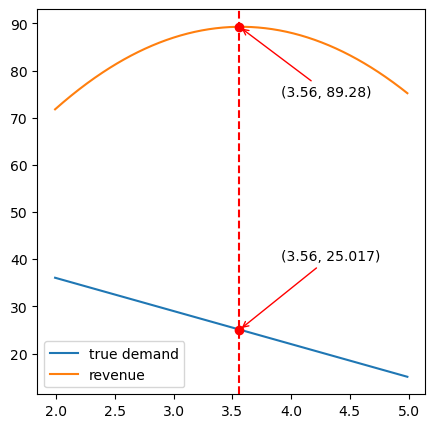

In [8]:
theta_1 = 50
theta_2 = -7

plot_prices = np.linspace(1.99, 4.99, 400)

# Visualize the true demand model 

true_demand = theta_1 + (theta_2 * plot_prices)

plt.figure(figsize = (5,5))
plt.plot(plot_prices, true_demand, label = "true demand")
plt.plot(plot_prices, plot_prices * true_demand, label = "revenue")
plt.axvline(x = 3.56, linestyle='--',color = 'r')

plt.plot(3.56, 25.017, '--bo', color = 'red')
# plt.annotate((3.56, 25.017), [3.56, 25.017])

plt.plot(3.56, 89.28, '--bo', color = 'red')
plt.annotate((3.56, 89.28), xy = [3.56, 89.28],
             xytext=(30, -50),
             textcoords = "offset points", 
             arrowprops=dict(arrowstyle="->", color='red'))
plt.annotate((3.56, 25.017), xy = [3.56, 25.017],
             xytext=(30, 50),
             textcoords = "offset points", 
             arrowprops=dict(arrowstyle="->", color='red'))

plt.legend()

In [9]:
print(true_demand[np.argmax(true_demand * plot_prices)])
print(plot_prices[np.argmax(true_demand * plot_prices)])

np.max(true_demand * plot_prices)

25.017368421052634
3.5689473684210524


89.28567119113573

In [10]:
# define the prices to be tested 

prices_to_test = np.arange(2.49, 5.99, 1)

# define the prior values for the alpha and beta that define a gamma distribution
alpha_0 = 30.00     
beta_0 = 1.00

def sample_true_demand(price: float, product: str='cards') -> float:
    """
    np.poisson.random -> https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
    """
    demand = theta_1 + theta_2 * price
    return np.random.poisson(demand, 1)[0]


class priceParams(TypedDict):
    price: float
    alpha: float
    beta: float

        
p_lambdas = []
for price in prices_to_test:
    p_lambdas.append(
        priceParams(
            price=price, 
            alpha=alpha_0, 
            beta=beta_0
        )
    )
    
   
class OptimalPriceResult(NamedTuple):
    
    price: float
    price_index: int
        
def get_optimal_price(prices: List[float], demands: List[float]) -> OptimalPriceResult:
    index = np.argmax(prices * demands)
    return OptimalPriceResult(price_index = index, price = prices[index])

def sample_demands_from_model(p_lambdas: List[priceParams]) -> List[float]:
    
    return list(map(lambda v: np.random.gamma(v['alpha'], 1/v['beta']), p_lambdas))

def plot_distributions(gamma_distributions: List[priceParams], iteration: int):
    
    x = np.arange(0, 50, 0.10)
    for dist in p_lambdas:
        y = stats.gamma.pdf(x, a=dist["alpha"], scale= 1/dist["beta"])
        plt.plot(x, y, label = dist["price"])
        plt.xlabel("demand")
        plt.ylabel("pdf")
    plt.title(f"PDFs after Iteration: {iteration}")
    plt.legend(loc="upper right")
    plt.show()

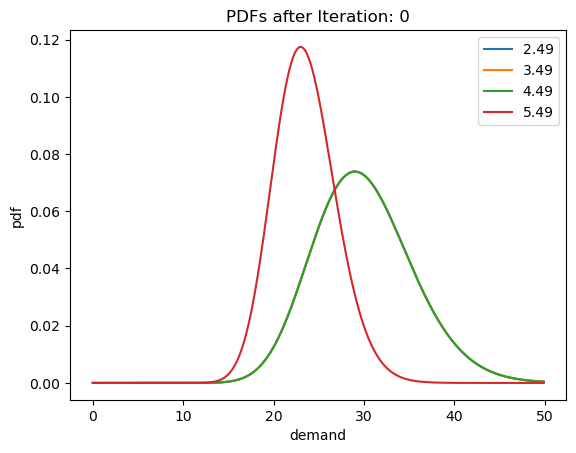

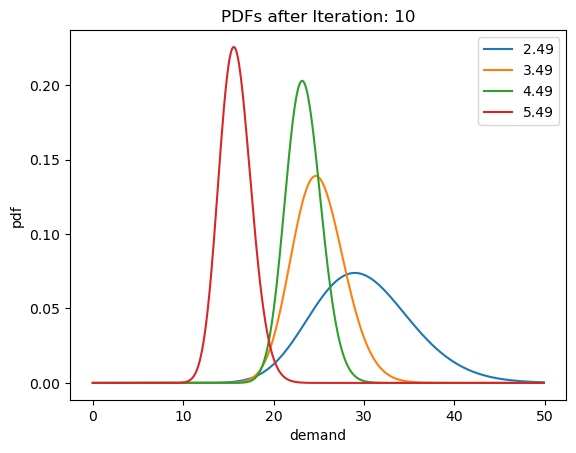

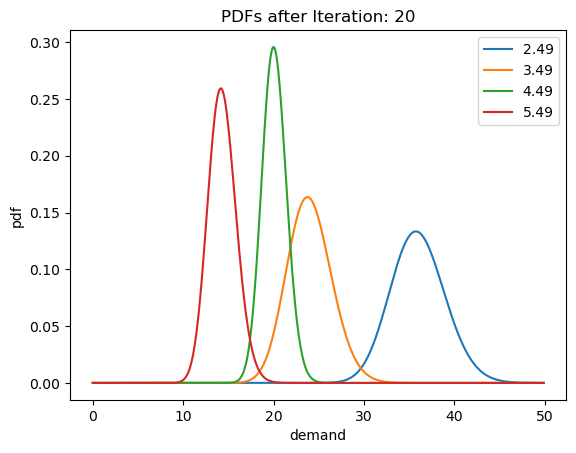

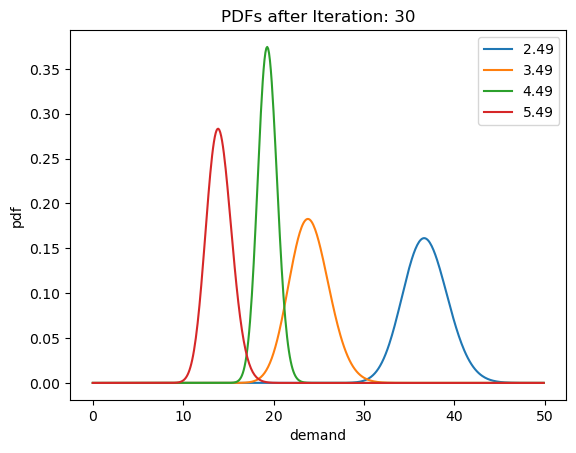

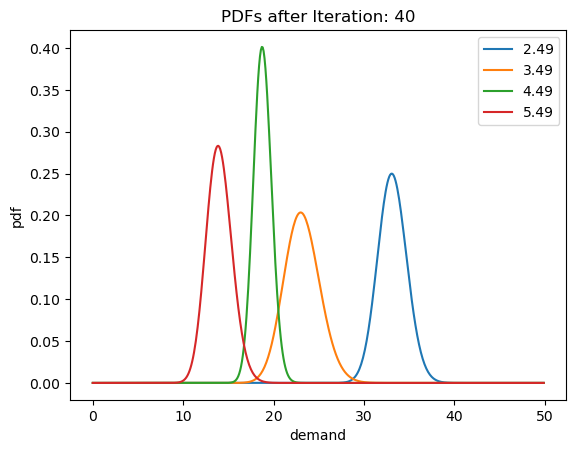

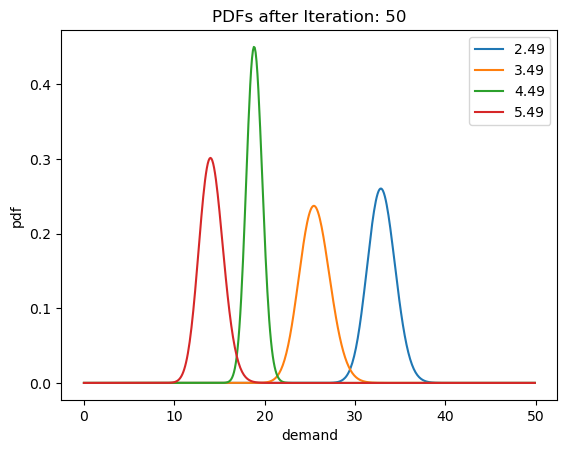

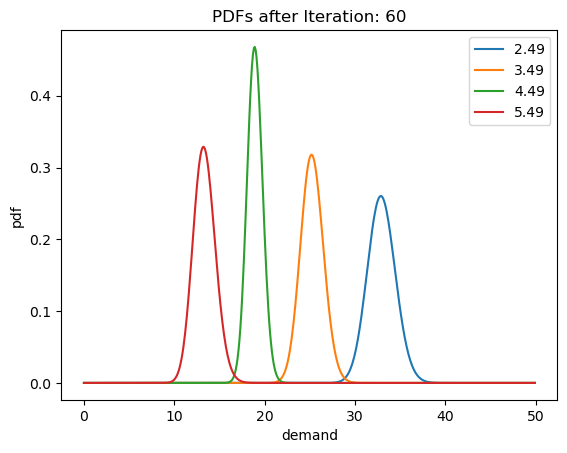

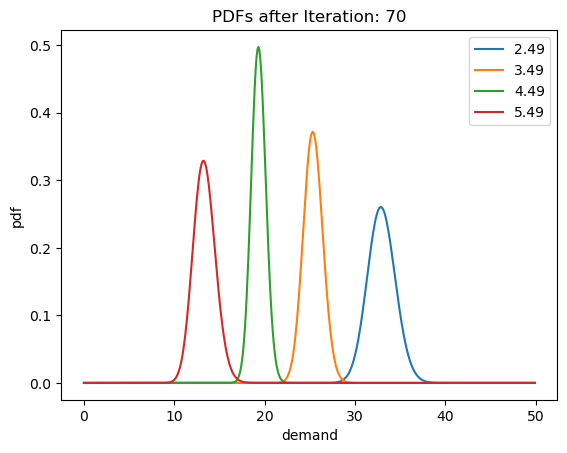

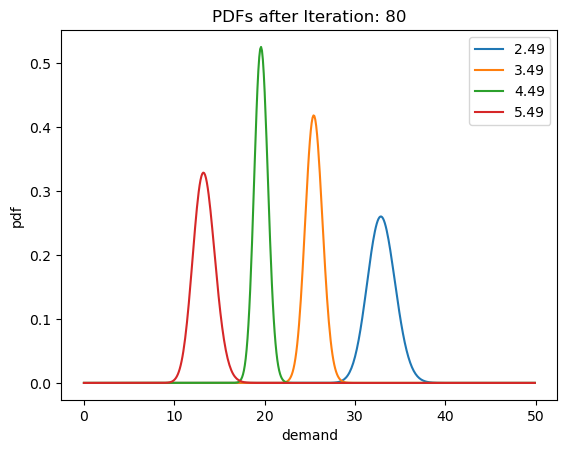

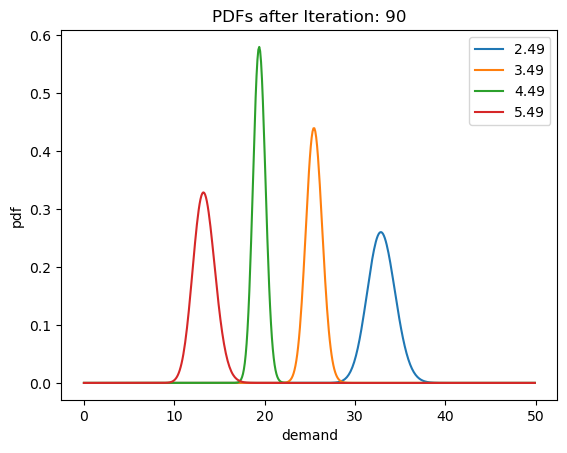

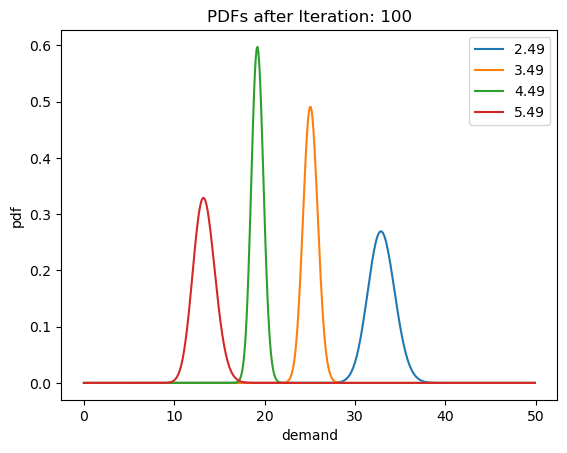

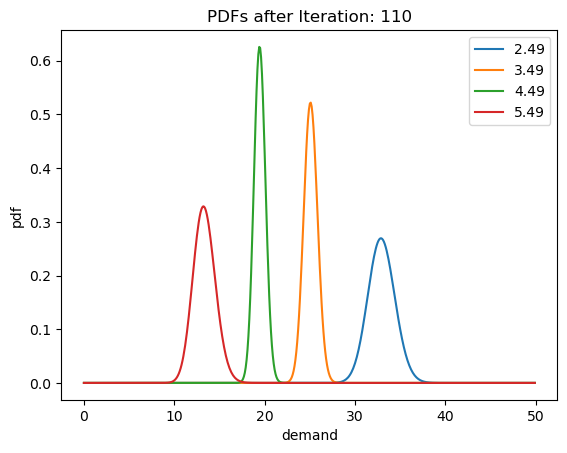

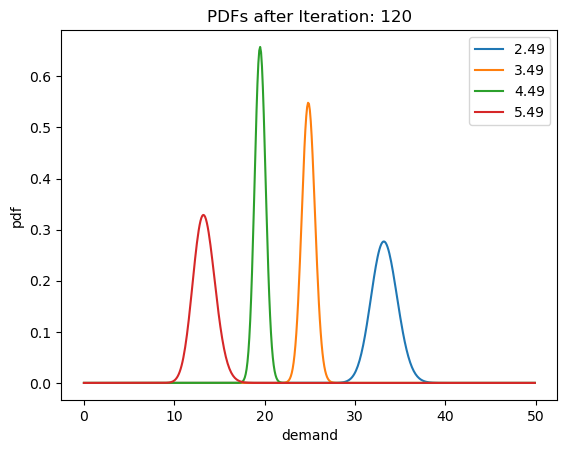

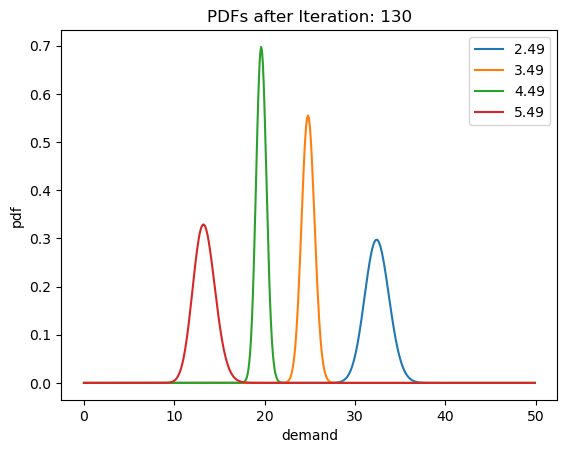

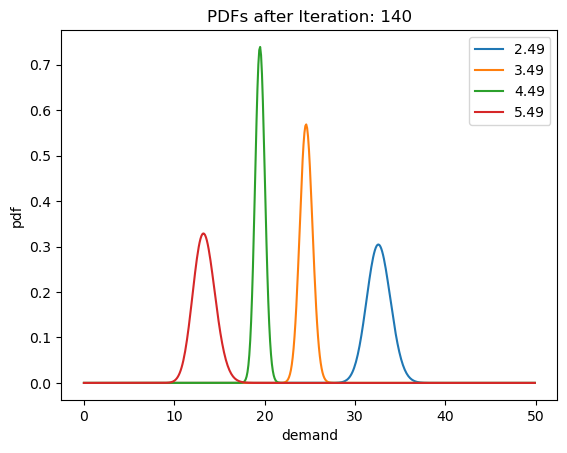

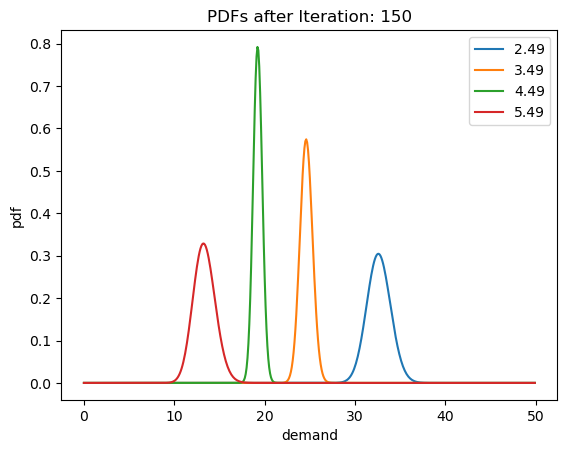

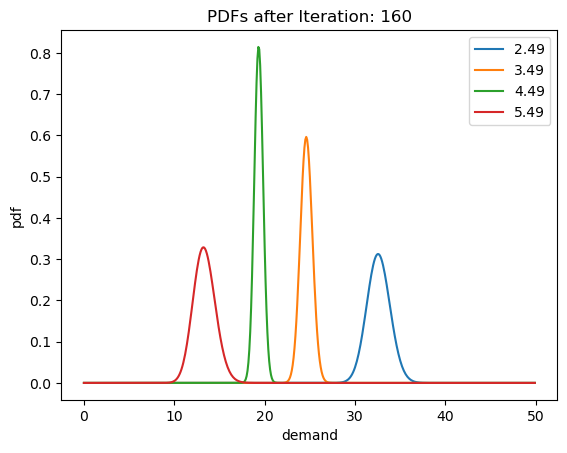

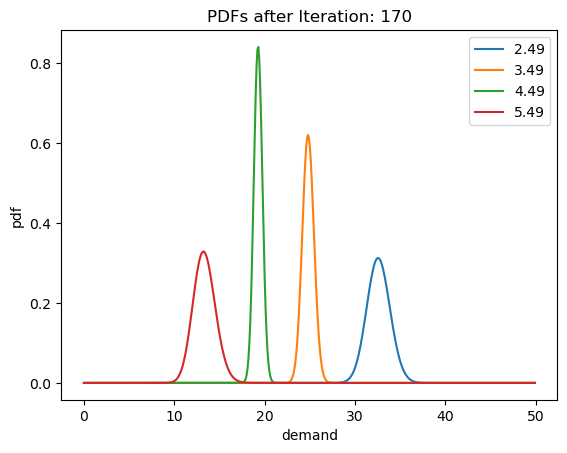

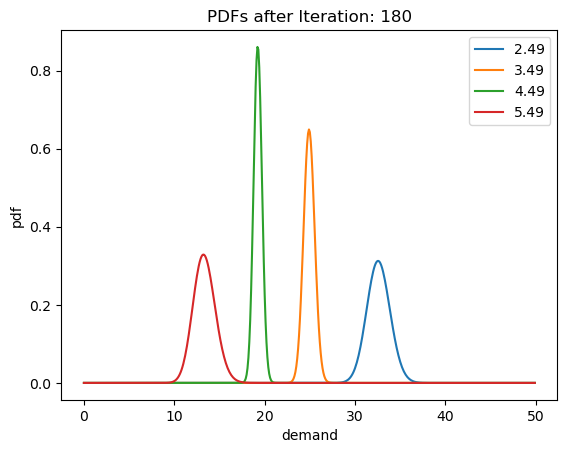

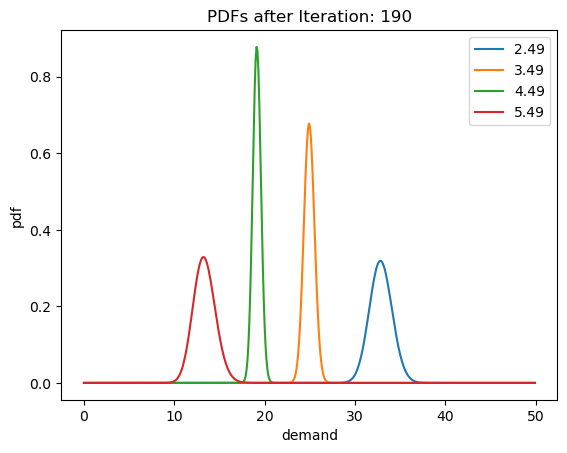

In [11]:
# Thompson sampling for solving the explore-exploit dilema. 


price_counts = defaultdict(lambda: 0)

for t in range(200):
    demands = sample_demands_from_model(p_lambdas)

    optimal_price_res = get_optimal_price(prices_to_test, demands)
    
    # increase the count for the price
    price_counts[optimal_price_res.price] += 1

    # offer the selected price and observe demand
    demand_t = sample_true_demand(optimal_price_res.price)

    # update model parameters
    v = p_lambdas[optimal_price_res.price_index]
    v['alpha'] += demand_t
    v['beta'] += 1
    
    if t%10 == 0:
        plot_distributions(p_lambdas, t)

https://jadhav-pritish.medium.com/dynamic-product-pricing-for-multiple-products-5e726fe6cb1

In [12]:
from dataclasses import dataclass
import pulp   


# Define constants 

# [1.99, 2.99, 3.99, 4.99]
prices_to_test = np.linspace(1.99, 4.99, 4)

# Prior Alpha and Beta params for Gamma Distribution. 
default_alpha = 30
default_beta = 1

# Slope and intercept for defining the linear model on true demand. 
# Note that the true demand is unobserved and we are defining these
# params in advance for simulating the real world responses. 
default_slope = -7
default_intercept = 50

# Define the number of products in a category
number_of_products = 5

# Define average category price
cp = 4

# Tolerance on average category price - 5%
tol = 0.05


class GammaParams(TypedDict):

    # params for modelling demand
    alpha: float
    beta: float


class ProductPriceMeta(TypedDict):
    price: float

    model_params: GammaParams


@dataclass
class Product:
    
    name: str
    price_meta: List[ProductPriceMeta]

    # params defining the true demand. 
    # Note that these params are unobserved and are used here for simulations purposes only.
    slope: float
    intercept: float
        

products = [
    Product(
        name=f"product_number_{index}",
        price_meta=[
            ProductPriceMeta(
                price=price,
                model_params=GammaParams(
                    alpha=default_alpha,
                    beta=default_beta,
                ),
            )
            for price in prices_to_test
        ],
        slope=default_slope,
        intercept=default_intercept,
    )
    for index in range(number_of_products)
]


In [13]:
products

[Product(name='product_number_0', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 3.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 4.99, 'model_params': {'alpha': 30, 'beta': 1}}], slope=-7, intercept=50),
 Product(name='product_number_1', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 3.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 4.99, 'model_params': {'alpha': 30, 'beta': 1}}], slope=-7, intercept=50),
 Product(name='product_number_2', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 3.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 4.99, 'model_params': {'alpha': 30, 'beta': 1}}], slope=-7, intercept=50),
 Product(name='product_number_3', price_meta=[{'price': 1.99, 'model_params'

In [14]:
def sample_demands_from_model(p_lambdas: List[priceParams]) -> List[float]:
    
    return list(map(lambda v: np.random.gamma(v['model_params']['alpha'], 1/v['model_params']['beta']), p_lambdas))

In [15]:

for i in range(500):

    # define decision variables for solving lin prog
    decision_variables = []

    # track estimated demands for products at all price points
    # Note that we are using a flat data structure for tracking demands but for later calculations,
    # the list is reshaped into a matrix of size K x P.
    estimated_demands = []

    for product_index, product in enumerate(products):
        estimated_demands.extend(sample_demands_from_model(product.price_meta))
        for price_index, price_meta in enumerate(product.price_meta):
            decision_variables.append(
                pulp.LpVariable(
                    f"x_{product_index}_{price_index}",
                    lowBound=0,
                    upBound=1,
                    cat="Integer",
                )
            )

    # Reshape decision variables and sampled demands into matrix of shape K x P
    decision_variables_mat = np.array(decision_variables).reshape(
        number_of_products, -1
    )
    estimated_demands_mat = np.array(estimated_demands).reshape(number_of_products, -1)

    # Define an Integer Linear Programming Problem
    dynamic_pricing_prob = pulp.LpProblem("MultiProductDynamicPricing", pulp.LpMaximize)

    # define a objective function
    # maximizing revenue = product_price * sampled_demand
    total_revenue = ""
    for value in (
        prices_to_test * estimated_demands_mat * decision_variables_mat
    ).flatten():
        total_revenue += value
    dynamic_pricing_prob += total_revenue

    # add constraints

    # constraint 1 - ensure that we select only one price
    for product_decision_variables in decision_variables_mat:
        price_selection_constraint = pulp.lpSum(product_decision_variables)
        dynamic_pricing_prob += price_selection_constraint == 1

    # constraint 2 - ensure that the average catalog price does not increase
    catalog_price_constraint = pulp.lpSum(
        (prices_to_test * decision_variables_mat).flatten()
    )
    dynamic_pricing_prob += (
        catalog_price_constraint <= cp * (1 + tol) * number_of_products
    )
    dynamic_pricing_prob += (
        catalog_price_constraint >= cp * (1 - tol) * number_of_products
    )

    display(dynamic_pricing_prob)

    optimization_result = dynamic_pricing_prob.solve()

    variable_name = []
    variable_value = []

    for decision_variable in dynamic_pricing_prob.variables():
        variable_name.append(decision_variable.name)
        variable_value.append(decision_variable.varValue)

    solution_df = pd.DataFrame({"index": variable_name, "value": variable_value})
    display(solution_df)

    # update beliefs

    decision_mat = solution_df.value.values.reshape(number_of_products, -1)

    selected_prices = (prices_to_test * decision_mat).sum(axis=1)

    display(selected_prices)

    for product_index, product in enumerate(products):

        selected_price = selected_prices[product_index]

        actual_demand = sample_true_demand(selected_price, product)
        
        # update beliefs
        model_params = list(
            filter(lambda d: d["price"] == selected_price, product.price_meta)
        )[0]["model_params"]

        model_params["alpha"] += actual_demand
        model_params["beta"] += 1


MultiProductDynamicPricing:
MAXIMIZE
67.99634056738118*x_0_0 + 81.06041070376789*x_0_1 + 89.43304378210223*x_0_2 + 165.70663126385887*x_0_3 + 45.612753511820046*x_1_0 + 89.41574016912158*x_1_1 + 130.77852869352452*x_1_2 + 184.1512996262025*x_1_3 + 52.616083930139716*x_2_0 + 78.5158070761413*x_2_1 + 149.1869005137207*x_2_2 + 199.10386079998798*x_2_3 + 47.34559904580163*x_3_0 + 81.59251141226775*x_3_1 + 96.84275142542839*x_3_2 + 178.5792527746268*x_3_3 + 49.797483345277996*x_4_0 + 106.72425546846614*x_4_1 + 113.38195310231713*x_4_2 + 178.776877255084*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1dd40581e4344474b1965edbfdc6dcf9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1dd40581e4344474b1965edbfdc6dcf9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 774.383 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -767.05 iterations 3
Cbc0038I Pa

index  value
0   x_0_0    1.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([1.99, 4.99, 3.99, 4.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
68.47245611896294*x_0_0 + 94.42637281405496*x_0_1 + 148.8778042760939*x_0_2 + 141.20241639035706*x_0_3 + 64.53739109615529*x_1_0 + 112.68427683406505*x_1_1 + 109.16690592771275*x_1_2 + 115.46866551266962*x_1_3 + 79.83137465176532*x_2_0 + 94.35007540132575*x_2_1 + 88.92486492088035*x_2_2 + 141.1988323618177*x_2_3 + 65.41077464346856*x_3_0 + 119.2252086823117*x_3_1 + 113.33995431702479*x_3_2 + 132.6046266158543*x_3_3 + 48.30107085263189*x_4_0 + 71.3158332537921*x_4_1 + 96.24980280039546*x_4_2 + 129.78169969662096*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e26de5a9d3034d12882e289767c376ee-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e26de5a9d3034d12882e289767c376ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 658.792 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -643.869 iterations 4
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 2.99, 4.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
73.54076603252143*x_0_0 + 76.39119723220293*x_0_1 + 100.13162042826904*x_0_2 + 158.67547640778645*x_0_3 + 80.30861930902611*x_1_0 + 93.26366507900907*x_1_1 + 120.7800784502115*x_1_2 + 129.30761256510095*x_1_3 + 51.82814485179023*x_2_0 + 98.86775692119679*x_2_1 + 103.34882963458789*x_2_2 + 104.17963719682108*x_2_3 + 57.63254217068851*x_3_0 + 77.36995531949435*x_3_1 + 97.1220906569979*x_3_2 + 124.6699852889834*x_3_3 + 55.06724833692448*x_4_0 + 81.5493552903383*x_4_1 + 112.76499948524207*x_4_2 + 96.19638641721512*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_

39: suminf.    0.10500 (2) obj. -652.47 iterations 0
Cbc0038I Pass  40: suminf.    0.10500 (2) obj. -652.47 iterations 0
Cbc0038I Pass  41: suminf.    0.10500 (2) obj. -652.47 iterations 0
Cbc0038I Pass  42: suminf.    0.10500 (2) obj. -652.47 iterations 0
Cbc0038I Pass  43: suminf.    0.10500 (2) obj. -652.47 iterations 0
Cbc0038I Pass  44: suminf.    0.10500 (2) obj. -652.47 iterations 0
Cbc0038I Pass  45: suminf.    0.95000 (2) obj. -658.792 iterations 1
Cbc0038I No solution found this major pass
Cbc0038I Before mini branch and bound, 18 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solution (0.01 seconds)
Cbc0038I After 0.01 seconds - Feasibility pump exiting with objective of -651.768 - took 0.00 seconds
Cbc0012I Integer solution of -651.76782 found by feasibility pump after 0 iterations and 0 nodes (0.01 seconds)
Cbc0001I Search completed - best objective -651.7678218509, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I Maximum depth

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.83674440653105*x_0_0 + 72.61310370733811*x_0_1 + 108.60251022470062*x_0_2 + 112.56516225339148*x_0_3 + 58.85900021548979*x_1_0 + 117.30051321029559*x_1_1 + 119.48249636455401*x_1_2 + 138.91655683891867*x_1_3 + 58.23172793221682*x_2_0 + 86.77567433071675*x_2_1 + 99.56195098822536*x_2_2 + 141.82056797713912*x_2_3 + 57.55787844564132*x_3_0 + 93.86932568876513*x_3_1 + 87.07096964323377*x_3_2 + 104.71240184385204*x_3_3 + 52.479179614468926*x_4_0 + 127.5762831297814*x_4_1 + 79.52504047336018*x_4_2 + 101.05324251751321*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f7e1249413ff4847852ec767f1aea9fd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f7e1249413ff4847852ec767f1aea9fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 616.478 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -606.696 iterations 3
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 4.99, 4.99, 2.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
61.76992749909625*x_0_0 + 105.65876674793823*x_0_1 + 90.43303172273357*x_0_2 + 69.10771550543151*x_0_3 + 47.4962597301189*x_1_0 + 74.00639393011224*x_1_1 + 127.56078977620608*x_1_2 + 95.06605411909679*x_1_3 + 78.55880336476379*x_2_0 + 106.95441196211432*x_2_1 + 87.82543327880715*x_2_2 + 132.02952123438192*x_2_3 + 56.964640578042314*x_3_0 + 106.17006317454117*x_3_1 + 118.94775228756697*x_3_2 + 114.95689762331187*x_3_3 + 74.44255735665635*x_4_0 + 101.20186124418535*x_4_1 + 100.3120373526238*x_4_2 + 116.78397021900929*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0eb85195e96441468524a11a8dcfc875-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0eb85195e96441468524a11a8dcfc875-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 600.981 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -600.981
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 4.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
78.93327299552904*x_0_0 + 87.63434405913026*x_0_1 + 85.1271155331478*x_0_2 + 72.36442186502397*x_0_3 + 58.0146307760949*x_1_0 + 86.06437801452641*x_1_1 + 100.65816246854024*x_1_2 + 113.47508082421322*x_1_3 + 59.79103209542399*x_2_0 + 134.21018236857375*x_2_1 + 120.31523020583937*x_2_2 + 70.30822557155551*x_2_3 + 46.92907773871306*x_3_0 + 92.80260201812143*x_3_1 + 116.0185096759679*x_3_2 + 96.65034210699163*x_3_3 + 71.39124118396917*x_4_0 + 116.46146553219111*x_4_1 + 80.81306222154122*x_4_2 + 90.80184000071102*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71780fe8e21a4e0189b71961ca0e89ed-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71780fe8e21a4e0189b71961ca0e89ed-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 564.654 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -563.695 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 4.99, 2.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
64.01552283390356*x_0_0 + 70.58155398909724*x_0_1 + 109.65897827457508*x_0_2 + 83.04586230728907*x_0_3 + 57.15813365460767*x_1_0 + 85.95753774230828*x_1_1 + 132.8835142546858*x_1_2 + 98.49251993585928*x_1_3 + 49.25766538347429*x_2_0 + 100.17944253697144*x_2_1 + 121.45511675654345*x_2_2 + 87.15914580627552*x_2_3 + 54.80818034509328*x_3_0 + 89.08457406852219*x_3_1 + 95.68906892865093*x_3_2 + 99.46319805336806*x_3_3 + 59.89592535203416*x_4_0 + 69.71260796872232*x_4_1 + 86.35057253846833*x_4_2 + 96.26242921538062*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6dd1b3bcf92541418a73c510fab7759b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6dd1b3bcf92541418a73c510fab7759b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 556.138 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Solution found of -555.949
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
72.15232234080575*x_0_0 + 117.99361930734281*x_0_1 + 91.92149721788311*x_0_2 + 77.43933393845768*x_0_3 + 78.64986882659923*x_1_0 + 84.42248386105511*x_1_1 + 98.42469040850597*x_1_2 + 100.65574738725132*x_1_3 + 49.35995781134463*x_2_0 + 103.88822191423154*x_2_1 + 89.03390189559057*x_2_2 + 97.50067655621038*x_2_3 + 76.25963473228863*x_3_0 + 97.87366848015714*x_3_1 + 80.97793584338653*x_3_2 + 114.1013525399274*x_3_3 + 57.05971107849966*x_4_0 + 99.6518102679861*x_4_1 + 120.43541071950857*x_4_2 + 69.09442143957813*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdd07d54898e49f09f157121a39bb112-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdd07d54898e49f09f157121a39bb112-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 557.074 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -557.074
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.39147502600508*x_0_0 + 85.93010593347087*x_0_1 + 92.29329511309233*x_0_2 + 94.46749088367946*x_0_3 + 54.759404591455066*x_1_0 + 79.16649221408548*x_1_1 + 93.76012928093495*x_1_2 + 80.1973953332629*x_1_3 + 59.67109546760398*x_2_0 + 93.13602553350157*x_2_1 + 103.09503831062939*x_2_2 + 108.84774936004533*x_2_3 + 64.94636412463639*x_3_0 + 107.18102880417634*x_3_1 + 84.96914281036896*x_3_2 + 109.17086724587854*x_3_3 + 60.16503616558888*x_4_0 + 89.9442102916468*x_4_1 + 95.88688723393972*x_4_2 + 98.9706245588627*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8bf1fa92af64539a20a5d33b8765710-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8bf1fa92af64539a20a5d33b8765710-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 501.162 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Solution found of -501.053
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 4.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.20348539231895*x_0_0 + 102.37405897509097*x_0_1 + 100.21063530342431*x_0_2 + 90.0533935513967*x_0_3 + 50.88995395166098*x_1_0 + 66.16222459991788*x_1_1 + 79.53805065604988*x_1_2 + 84.52310182223661*x_1_3 + 76.60978499889*x_2_0 + 95.69169296980864*x_2_1 + 93.31354307416613*x_2_2 + 83.23162518889302*x_2_3 + 84.06981632680328*x_3_0 + 95.59194097577351*x_3_1 + 109.15007371517844*x_3_2 + 111.12343036262327*x_3_3 + 47.326608652528485*x_4_0 + 79.87019048640194*x_4_1 + 105.41650611337393*x_4_2 + 80.5177292680593*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7e9619bf78584976b75561667d6fdd2e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7e9619bf78584976b75561667d6fdd2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 499.129 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -499.129
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.53448928852809*x_0_0 + 85.7210835479042*x_0_1 + 85.50873937679383*x_0_2 + 88.47912914694446*x_0_3 + 82.74854122077359*x_1_0 + 84.02635556282952*x_1_1 + 104.58614676069253*x_1_2 + 84.3261929055967*x_1_3 + 61.97138307194132*x_2_0 + 87.70713925331302*x_2_1 + 91.48936030610547*x_2_2 + 74.89640339688746*x_2_3 + 71.91008897016464*x_3_0 + 83.83351253501618*x_3_1 + 104.52168929206617*x_3_2 + 87.30042138555001*x_3_3 + 60.625749446838*x_4_0 + 83.45736609586845*x_4_1 + 105.84717580170492*x_4_2 + 73.41829746761395*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ff8a4489f984325a491f65d9926bee3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ff8a4489f984325a491f65d9926bee3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 494.924 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -494.924
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.35917534468034*x_0_0 + 83.65356850625905*x_0_1 + 80.55351168042884*x_0_2 + 100.45690325175485*x_0_3 + 59.307608491418634*x_1_0 + 70.47032898785623*x_1_1 + 94.25278040174709*x_1_2 + 87.0240304909615*x_1_3 + 58.25468169506271*x_2_0 + 96.03170954403886*x_2_1 + 99.311531424943*x_2_2 + 71.32305154036932*x_2_3 + 92.41808135394432*x_3_0 + 98.08768307730979*x_3_1 + 116.35356962355765*x_3_2 + 94.72181086252584*x_3_3 + 69.51162273623716*x_4_0 + 100.9474839265186*x_4_1 + 86.40797082367446*x_4_2 + 97.80308383618143*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1949f5413c48411eafd10c718db123e8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1949f5413c48411eafd10c718db123e8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 511.322 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -511.322
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
77.49665377531389*x_0_0 + 77.16344829959323*x_0_1 + 96.4403565945316*x_0_2 + 93.12559554584593*x_0_3 + 62.50955328354942*x_1_0 + 75.3889425416453*x_1_1 + 84.94844613576616*x_1_2 + 87.60511418221634*x_1_3 + 62.60411198395033*x_2_0 + 91.78222272117102*x_2_1 + 88.14086989325673*x_2_2 + 80.72102167781762*x_2_3 + 48.86154685927405*x_3_0 + 76.32043472568763*x_3_1 + 108.83795122091233*x_3_2 + 97.21187672047478*x_3_3 + 38.00029195061741*x_4_0 + 90.72108497613921*x_4_1 + 103.7902620498444*x_4_2 + 80.68131655481794*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae7af493757146f6b3ea3b9ab571c76c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae7af493757146f6b3ea3b9ab571c76c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 488.456 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -488.456
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.66337835765518*x_0_0 + 88.55244381966156*x_0_1 + 86.33766388826204*x_0_2 + 90.23114116601676*x_0_3 + 77.00849621456564*x_1_0 + 74.9989477151401*x_1_1 + 76.00182181499054*x_1_2 + 83.01564193026421*x_1_3 + 53.98562180425161*x_2_0 + 83.08778951541338*x_2_1 + 88.55172369090346*x_2_2 + 85.43674654330128*x_2_3 + 72.98611172211731*x_3_0 + 93.76437091021296*x_3_1 + 103.53644587822534*x_3_2 + 108.79155391479728*x_3_3 + 53.57582061739737*x_4_0 + 85.76188998159589*x_4_1 + 93.17938984297771*x_4_2 + 95.93653820176566*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f1a9b0346c6f46da8156fdd8baffb040-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f1a9b0346c6f46da8156fdd8baffb040-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 462.946 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.633333
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -453.51 iterations 2
Cbc0038

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.72665229068674*x_0_0 + 72.23712790532149*x_0_1 + 99.05899461348947*x_0_2 + 76.80082494117647*x_0_3 + 57.83365494473175*x_1_0 + 83.22362698958597*x_1_1 + 92.44008404385536*x_1_2 + 90.34373340384553*x_1_3 + 72.30267402304189*x_2_0 + 100.01780832204733*x_2_1 + 92.55986382674232*x_2_2 + 85.92768324834053*x_2_3 + 48.73922980848523*x_3_0 + 95.36791854067799*x_3_1 + 104.41073758024525*x_3_2 + 95.28747519142824*x_3_3 + 90.12324229158905*x_4_0 + 84.395159689962*x_4_1 + 99.04877846737381*x_4_2 + 88.12622862540897*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5f5bb12adf5848b9a78c6a0340f3bf13-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5f5bb12adf5848b9a78c6a0340f3bf13-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 494.872 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -494.624 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.875854306261*x_0_0 + 82.439453857226*x_0_1 + 107.1118216396072*x_0_2 + 86.280452673401*x_0_3 + 55.397635029296254*x_1_0 + 85.81754439158932*x_1_1 + 88.31916706867995*x_1_2 + 85.74604814706156*x_1_3 + 47.9373127858702*x_2_0 + 94.5700346776982*x_2_1 + 85.74464582937013*x_2_2 + 80.85280100805372*x_2_3 + 64.13559171384694*x_3_0 + 102.53486386845486*x_3_1 + 99.07525894180924*x_3_2 + 100.74875027947581*x_3_3 + 52.59103374225437*x_4_0 + 98.42774125782299*x_4_1 + 108.50946846931527*x_4_2 + 103.28985311646645*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b331bf1f2b344f393c5081908493fc8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b331bf1f2b344f393c5081908493fc8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 500.108 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -499.259
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.70881908532419*x_0_0 + 79.52610941237349*x_0_1 + 87.64382544838557*x_0_2 + 80.66347427330949*x_0_3 + 39.906528497125514*x_1_0 + 95.77490454094982*x_1_1 + 78.96119556836581*x_1_2 + 96.06118500466722*x_1_3 + 69.70247394592262*x_2_0 + 83.10309126111598*x_2_1 + 83.47524987611222*x_2_2 + 91.97246629141931*x_2_3 + 63.83842511545075*x_3_0 + 90.4372841354561*x_3_1 + 104.38157120895347*x_3_2 + 84.46343739339372*x_3_3 + 60.68309787304177*x_4_0 + 90.52965952935848*x_4_1 + 95.16600803123228*x_4_2 + 84.33916245354139*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e2433e4c4ff849aaab63d60114a018f0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e2433e4c4ff849aaab63d60114a018f0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 475.089 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -468.173 iterations 6
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.1763816228559*x_0_0 + 101.22662809175573*x_0_1 + 100.79986948988972*x_0_2 + 83.27016207534886*x_0_3 + 45.80263028744571*x_1_0 + 85.93039489536515*x_1_1 + 85.4062597872641*x_1_2 + 95.89233001017956*x_1_3 + 68.818621934232*x_2_0 + 90.45304926754467*x_2_1 + 90.39550036410974*x_2_2 + 102.34160375930311*x_2_3 + 66.81931670346052*x_3_0 + 92.78014408436619*x_3_1 + 110.39901774089941*x_3_2 + 99.28621235500097*x_3_3 + 40.59135867965594*x_4_0 + 89.17754408149047*x_4_1 + 88.45113770999897*x_4_2 + 100.28085482137645*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e63109b6763a41ae857e495c5a8242ae-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e63109b6763a41ae857e495c5a8242ae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 505.409 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -499.525 iterations 5
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 2.99, 4.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
79.44274969986334*x_0_0 + 77.51827391000934*x_0_1 + 101.37899118019432*x_0_2 + 81.70183458373123*x_0_3 + 70.83755254992528*x_1_0 + 94.82948344051913*x_1_1 + 81.49908730002764*x_1_2 + 86.13951735999136*x_1_3 + 44.447039292466336*x_2_0 + 97.52584993428778*x_2_1 + 75.38245414982471*x_2_2 + 76.17725590125033*x_2_3 + 67.38655832201106*x_3_0 + 105.11099336757835*x_3_1 + 105.82155812048104*x_3_2 + 102.36647188558081*x_3_3 + 85.34074864477697*x_4_0 + 95.85161406135327*x_4_1 + 91.68290620190763*x_4_2 + 76.76316272943177*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d994874c6465435aa37b3c09e41b402c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d994874c6465435aa37b3c09e41b402c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 487.566 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -487.566 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
57.86164659312377*x_0_0 + 78.94800234390107*x_0_1 + 99.3137271974663*x_0_2 + 99.30006691140748*x_0_3 + 59.75138064903459*x_1_0 + 95.02901926172484*x_1_1 + 75.82228895761565*x_1_2 + 72.64403914622747*x_1_3 + 65.26335483885728*x_2_0 + 93.73802658254705*x_2_1 + 77.087888257922*x_2_2 + 87.40531873757587*x_2_3 + 41.443944155521685*x_3_0 + 79.70836617051414*x_3_1 + 112.02264812302809*x_3_2 + 91.49598545035056*x_3_3 + 53.55593558697799*x_4_0 + 83.63884941384822*x_4_1 + 106.30531365152602*x_4_2 + 78.37763225620434*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/506e67c7914d4f93a42b09543d4bb44f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/506e67c7914d4f93a42b09543d4bb44f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 506.237 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -505.835 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.59803797927778*x_0_0 + 88.44280156605774*x_0_1 + 87.79852236840723*x_0_2 + 75.00140907377204*x_0_3 + 82.63237589148797*x_1_0 + 96.84059344320238*x_1_1 + 85.93216383905028*x_1_2 + 85.20489958386361*x_1_3 + 53.6270118776479*x_2_0 + 86.78106136606571*x_2_1 + 91.74007861111536*x_2_2 + 84.22638758418121*x_2_3 + 68.62297422522064*x_3_0 + 104.27620757738673*x_3_1 + 105.62971354512142*x_3_2 + 87.45712824533015*x_3_3 + 62.0228544365518*x_4_0 + 90.64972628774804*x_4_1 + 107.52381436900788*x_4_2 + 90.09065167101397*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ac08359f06e4a93bff1af1ee3cfb91a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ac08359f06e4a93bff1af1ee3cfb91a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 489.242 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -489.242 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.85761313205266*x_0_0 + 79.41749870797113*x_0_1 + 86.91434422292652*x_0_2 + 77.34918251001399*x_0_3 + 33.201142352218135*x_1_0 + 78.59425611696314*x_1_1 + 87.14188328745225*x_1_2 + 83.86203601356003*x_1_3 + 39.6813541859667*x_2_0 + 89.2642948592699*x_2_1 + 75.66656483225863*x_2_2 + 85.95562121055862*x_2_3 + 43.711837125680965*x_3_0 + 95.9355787350266*x_3_1 + 91.82526058624806*x_3_2 + 87.27421026508006*x_3_3 + 76.61689426981725*x_4_0 + 80.35716735235648*x_4_1 + 106.99717056395068*x_4_2 + 92.38557222600944*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7e7ee99e591b4e8c93d5b1bf4cc7582c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7e7ee99e591b4e8c93d5b1bf4cc7582c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 464.516 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -462.945
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.03460111821926*x_0_0 + 77.24055226586546*x_0_1 + 92.1848460958425*x_0_2 + 92.08149572540891*x_0_3 + 51.89079293710129*x_1_0 + 91.5765263898892*x_1_1 + 88.23749574829726*x_1_2 + 78.44581994172297*x_1_3 + 70.04166831637076*x_2_0 + 90.78723957062253*x_2_1 + 83.30843953566281*x_2_2 + 71.20018252787742*x_2_3 + 67.16897043753784*x_3_0 + 88.63014268512148*x_3_1 + 92.67901250874425*x_3_2 + 79.67149115316907*x_3_3 + 77.19994591309353*x_4_0 + 95.55799231003218*x_4_1 + 103.38628455235622*x_4_2 + 80.71083110646937*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f5c371574874aef8c3deb2e2a759536-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f5c371574874aef8c3deb2e2a759536-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 470.344 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -470.182 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.897350833869666*x_0_0 + 73.33488982208834*x_0_1 + 90.21267869570953*x_0_2 + 77.99255290105404*x_0_3 + 62.891636775554765*x_1_0 + 76.0581084060417*x_1_1 + 95.6446111627568*x_1_2 + 71.32077691122657*x_1_3 + 89.11405994552891*x_2_0 + 99.77942048262622*x_2_1 + 77.25950940256351*x_2_2 + 78.28166454890341*x_2_3 + 50.521612300728385*x_3_0 + 100.84444030626828*x_3_1 + 93.27094188987556*x_3_2 + 96.72175596753102*x_3_3 + 62.36659589552659*x_4_0 + 106.68713384844428*x_4_1 + 108.9103509627995*x_4_2 + 90.12878851033135*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0de558fb2917478587a6e90b9dac9f55-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0de558fb2917478587a6e90b9dac9f55-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 493.227 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -491.269
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.45618468355776*x_0_0 + 84.51200462407316*x_0_1 + 82.2936318346889*x_0_2 + 84.56479766343365*x_0_3 + 50.27128432550258*x_1_0 + 79.27050865818418*x_1_1 + 84.59154446451423*x_1_2 + 83.24174941661043*x_1_3 + 48.739491157163215*x_2_0 + 100.34680268257915*x_2_1 + 76.35943790800421*x_2_2 + 78.6077434281198*x_2_3 + 79.81494161310272*x_3_0 + 85.68239370724544*x_3_1 + 96.70246084916437*x_3_2 + 99.1630966945116*x_3_3 + 46.60598158054064*x_4_0 + 83.54492979433495*x_4_1 + 91.53878190269687*x_4_2 + 83.38893959774055*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0d55da88654b427a818e4affc2e76836-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0d55da88654b427a818e4affc2e76836-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 460.205 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -460.205
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.86769423547203*x_0_0 + 82.3356601592415*x_0_1 + 93.24560724616825*x_0_2 + 78.98016931926333*x_0_3 + 69.82114269952181*x_1_0 + 100.26645273615382*x_1_1 + 90.61317671225719*x_1_2 + 79.11312859228546*x_1_3 + 68.18050560045516*x_2_0 + 104.91725501388028*x_2_1 + 73.28892846835349*x_2_2 + 63.56368556813055*x_2_3 + 61.58392502358718*x_3_0 + 92.22523947623966*x_3_1 + 96.40057766332347*x_3_2 + 79.59533339138825*x_3_3 + 45.08920743154902*x_4_0 + 93.69651073179116*x_4_1 + 94.98997549025604*x_4_2 + 98.43670665891841*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/610b67e1b5a0434586aa559d1b58df30-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/610b67e1b5a0434586aa559d1b58df30-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 492.784 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -492.738 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
65.13793760714255*x_0_0 + 93.10471764984223*x_0_1 + 92.12826799221622*x_0_2 + 72.1917243683281*x_0_3 + 81.76254494210663*x_1_0 + 93.85118376930215*x_1_1 + 87.00941220879514*x_1_2 + 78.06658121969545*x_1_3 + 74.2227798621752*x_2_0 + 88.89412181278605*x_2_1 + 80.85898679310726*x_2_2 + 77.39221630216733*x_2_3 + 60.458223047082036*x_3_0 + 84.35431060147761*x_3_1 + 97.34763672088829*x_3_2 + 78.81881678591338*x_3_3 + 53.82494014029028*x_4_0 + 87.2509961297566*x_4_1 + 92.67087775775222*x_4_2 + 75.20953245031387*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5f1e616221434b8d83380ef62a65025e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5f1e616221434b8d83380ef62a65025e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 458.854 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -453.39
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.56238516323427*x_0_0 + 77.44822673352841*x_0_1 + 87.24452607552145*x_0_2 + 78.50696897384204*x_0_3 + 69.25215180232536*x_1_0 + 83.76881064485383*x_1_1 + 86.58464312771272*x_1_2 + 74.20452881464142*x_1_3 + 64.91856071331988*x_2_0 + 90.32901577060943*x_2_1 + 84.08071494052066*x_2_2 + 63.5037195613885*x_2_3 + 63.11326105411819*x_3_0 + 85.23567167351511*x_3_1 + 100.43988742304933*x_3_2 + 87.52441677264304*x_3_3 + 54.82362786468153*x_4_0 + 87.94320616754736*x_4_1 + 98.98385594707196*x_4_2 + 88.107340186028*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ec429e1da2d42da9932f56175a7b535-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ec429e1da2d42da9932f56175a7b535-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 463.27 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -462.911 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.51167612825696*x_0_0 + 87.61888093767698*x_0_1 + 95.55653901480052*x_0_2 + 79.30776633737857*x_0_3 + 70.02637036116717*x_1_0 + 87.58546337660982*x_1_1 + 83.55634675414966*x_1_2 + 75.95450159603013*x_1_3 + 73.86833069290066*x_2_0 + 93.24725049097992*x_2_1 + 82.39772064454952*x_2_2 + 78.65431222290478*x_2_3 + 45.4688046375455*x_3_0 + 94.04060630350286*x_3_1 + 95.29237563719533*x_3_2 + 71.00400203633612*x_3_3 + 60.60583347131651*x_4_0 + 95.11279201141453*x_4_1 + 95.80943886423944*x_4_2 + 78.04999292843694*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a9a4947cb8b4a3e8ca05e7ad4339f3c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a9a4947cb8b4a3e8ca05e7ad4339f3c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 463.097 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -463.097 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.37301229581286*x_0_0 + 83.90630111339682*x_0_1 + 88.42621668547426*x_0_2 + 75.78366142288348*x_0_3 + 55.011824585508066*x_1_0 + 79.47920448113379*x_1_1 + 76.06353837619858*x_1_2 + 80.31026625544531*x_1_3 + 58.525443504131914*x_2_0 + 103.47208602490684*x_2_1 + 73.37994807407006*x_2_2 + 76.60888947263457*x_2_3 + 48.29138897500096*x_3_0 + 94.36816077345024*x_3_1 + 93.2133278600189*x_3_2 + 75.57738594798528*x_3_3 + 67.17283016902638*x_4_0 + 98.79214774250205*x_4_1 + 97.99755295304846*x_4_2 + 83.88034806531877*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f899fef5efcf4eff93293444455ab03c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f899fef5efcf4eff93293444455ab03c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 464.517 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -464.105 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.06763654277057*x_0_0 + 81.84786735538313*x_0_1 + 85.9101756794266*x_0_2 + 83.13388903719851*x_0_3 + 70.1915371481149*x_1_0 + 81.57606274233459*x_1_1 + 82.47308958998029*x_1_2 + 73.27989405116472*x_1_3 + 52.111782510920264*x_2_0 + 91.89838856252766*x_2_1 + 97.95372228514594*x_2_2 + 71.09850147250629*x_2_3 + 50.75126074461039*x_3_0 + 109.47205085508885*x_3_1 + 94.78332777128924*x_3_2 + 97.28379560432334*x_3_3 + 57.70945235626622*x_4_0 + 96.34589724140774*x_4_1 + 94.8547603382191*x_4_2 + 100.51034350276667*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/735ffb4ebf314f4f81b6b6b08c785c61-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/735ffb4ebf314f4f81b6b6b08c785c61-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 476.319 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -476.319
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.82723490856408*x_0_0 + 87.45748141017619*x_0_1 + 88.40422160919623*x_0_2 + 87.98989169155304*x_0_3 + 58.237753877085055*x_1_0 + 85.06880577585292*x_1_1 + 87.79676099312017*x_1_2 + 80.49841080632768*x_1_3 + 44.841784351409906*x_2_0 + 103.56918244781681*x_2_1 + 90.79499533993929*x_2_2 + 76.69739248632052*x_2_3 + 70.62680515538557*x_3_0 + 96.01199064412631*x_3_1 + 97.30924257208808*x_3_2 + 82.40132217537663*x_3_3 + 53.04649202798398*x_4_0 + 84.58644244488951*x_4_1 + 95.48138772390014*x_4_2 + 75.25849437777553*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/48d3ad24a7a64537b028fbdb481e49e2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/48d3ad24a7a64537b028fbdb481e49e2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 472.54 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -471.889 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.27951297045989*x_0_0 + 84.53918215237029*x_0_1 + 86.8209787878878*x_0_2 + 71.43737367383312*x_0_3 + 35.66997711139501*x_1_0 + 103.95898170741948*x_1_1 + 87.3398704984162*x_1_2 + 76.4597767814937*x_1_3 + 39.92257409441594*x_2_0 + 87.52088580127047*x_2_1 + 98.49209073768633*x_2_2 + 74.99361939069928*x_2_3 + 49.474281205641994*x_3_0 + 102.59662711949727*x_3_1 + 95.14260350042059*x_3_2 + 82.66111525159549*x_3_3 + 70.46857389039498*x_4_0 + 90.40610309944466*x_4_1 + 96.1155768950621*x_4_2 + 81.57186825762386*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/47dde9f8292b4e30acfc94bd9c784d71-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/47dde9f8292b4e30acfc94bd9c784d71-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 479.906 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -479.843 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.01470863618084*x_0_0 + 85.40378621054602*x_0_1 + 93.18373172655193*x_0_2 + 83.74106163275938*x_0_3 + 46.69711405975221*x_1_0 + 92.82221508874818*x_1_1 + 87.73239603570553*x_1_2 + 79.14620660359883*x_1_3 + 75.87160217130315*x_2_0 + 102.99004292185919*x_2_1 + 96.49058936520633*x_2_2 + 81.48615504603866*x_2_3 + 57.06617073964329*x_3_0 + 107.36011695536236*x_3_1 + 89.30734467984999*x_3_2 + 91.0353138505083*x_3_3 + 63.53819919736354*x_4_0 + 82.57547648037098*x_4_1 + 104.8638954013306*x_4_2 + 71.64471225287438*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae36ad656e464c4abff93c443f01378c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae36ad656e464c4abff93c443f01378c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 489.223 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -489.223 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.63445012752062*x_0_0 + 77.0624355809215*x_0_1 + 84.04812893255766*x_0_2 + 70.83884961184783*x_0_3 + 75.90087424819849*x_1_0 + 98.21703594591692*x_1_1 + 90.22143518620712*x_1_2 + 69.40458823624658*x_1_3 + 52.43525959570928*x_2_0 + 95.25539213340534*x_2_1 + 92.20140570968289*x_2_2 + 70.09252654273322*x_2_3 + 62.380007322186785*x_3_0 + 94.03029400207582*x_3_1 + 94.8146441270112*x_3_2 + 74.16968881183155*x_3_3 + 58.05430697467012*x_4_0 + 80.71316674749063*x_4_1 + 94.95982763355387*x_4_2 + 71.96437311598065*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d11aaafd5f4b4210ab01bb5d02ba713c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d11aaafd5f4b4210ab01bb5d02ba713c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 463.841 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -463.521 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.13799600230631*x_0_0 + 78.38176932914665*x_0_1 + 87.87218022687446*x_0_2 + 77.36621198999288*x_0_3 + 54.39230710083514*x_1_0 + 91.23547488127765*x_1_1 + 95.98013018151164*x_1_2 + 75.00743622123602*x_1_3 + 52.44515661836831*x_2_0 + 101.87326140337919*x_2_1 + 87.8863792859839*x_2_2 + 71.41860625365162*x_2_3 + 50.87872785800397*x_3_0 + 91.39389917939005*x_3_1 + 96.46658309661923*x_3_2 + 91.51673344687926*x_3_3 + 63.08885331101217*x_4_0 + 96.6124904268319*x_4_1 + 100.31434937775528*x_4_2 + 84.64208463775569*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/848a1339fe7e413789cb1052823ccbf6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/848a1339fe7e413789cb1052823ccbf6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 482.259 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -481.745 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.37276932885838*x_0_0 + 90.9433109614493*x_0_1 + 90.48922812331402*x_0_2 + 72.8925400636601*x_0_3 + 57.74265733521692*x_1_0 + 85.47754182869438*x_1_1 + 85.49593620913102*x_1_2 + 84.07303263904649*x_1_3 + 64.13241183559613*x_2_0 + 92.51947291563225*x_2_1 + 79.85109990220758*x_2_2 + 76.2687317977855*x_2_3 + 51.45702569731512*x_3_0 + 86.90410755610104*x_3_1 + 95.02363856279685*x_3_2 + 88.13603099375165*x_3_3 + 68.2468508468117*x_4_0 + 96.31680421765287*x_4_1 + 94.60435207992798*x_4_2 + 86.44969618073699*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7af27c9a156e43a98089bef3c7381cb8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7af27c9a156e43a98089bef3c7381cb8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 458.337 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -458.016 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.82765410668917*x_0_0 + 92.23810629729526*x_0_1 + 92.22505047046724*x_0_2 + 60.06013166256888*x_0_3 + 54.98643870397784*x_1_0 + 85.30550009799826*x_1_1 + 82.3335291979443*x_1_2 + 79.66275477313714*x_1_3 + 55.11302733843425*x_2_0 + 100.44907310703793*x_2_1 + 87.0790106496493*x_2_2 + 81.27133559452817*x_2_3 + 37.098348760214314*x_3_0 + 101.04515975947467*x_3_1 + 96.21956370394254*x_3_2 + 85.3072859952027*x_3_3 + 73.5743604022385*x_4_0 + 83.75289520249517*x_4_1 + 98.08988304729243*x_4_2 + 74.02075423869009*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6594220d30e446749114ce80eb4c187f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6594220d30e446749114ce80eb4c187f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 471.231 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -471.078 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.17184483128611*x_0_0 + 78.46757495247418*x_0_1 + 81.63514499293686*x_0_2 + 90.82748022473501*x_0_3 + 49.34075079630852*x_1_0 + 94.13342799020674*x_1_1 + 82.95713030487036*x_1_2 + 76.83679466754144*x_1_3 + 48.605799724363514*x_2_0 + 94.18869588654965*x_2_1 + 100.47456538017592*x_2_2 + 79.20409401914496*x_2_3 + 58.35799099075396*x_3_0 + 87.10605046156938*x_3_1 + 93.61103600232562*x_3_2 + 99.2624838453424*x_3_3 + 69.87941977055696*x_4_0 + 82.4497991689037*x_4_1 + 95.70386396641152*x_4_2 + 77.28796800685757*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ee4551473c242cd9f5539f984add8e1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ee4551473c242cd9f5539f984add8e1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 480.402 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -480.402
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.11673368494462*x_0_0 + 79.416408343253*x_0_1 + 84.9487488855371*x_0_2 + 72.61330687482426*x_0_3 + 61.04134727982426*x_1_0 + 97.07027128786223*x_1_1 + 85.63620503964297*x_1_2 + 78.33131779299504*x_1_3 + 69.41265968055669*x_2_0 + 99.72147854379563*x_2_1 + 89.54808735303938*x_2_2 + 73.54165648912637*x_2_3 + 50.107042314204726*x_3_0 + 91.1420863997992*x_3_1 + 109.2491805190027*x_3_2 + 83.86407876119742*x_3_3 + 70.86124181186034*x_4_0 + 96.909549877168*x_4_1 + 91.75760808180428*x_4_2 + 75.13766697922863*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/102174fbde2b43159c27ac59cc7f8547-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/102174fbde2b43159c27ac59cc7f8547-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 472.909 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -464.008
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.58566050139516*x_0_0 + 82.97089987139334*x_0_1 + 89.73594929831472*x_0_2 + 65.22099958073105*x_0_3 + 46.7194496771094*x_1_0 + 90.49378025937044*x_1_1 + 93.50643145571259*x_1_2 + 80.29291677376692*x_1_3 + 81.88729402588766*x_2_0 + 98.98397142753738*x_2_1 + 89.70471604714045*x_2_2 + 78.0037299319254*x_2_3 + 52.7975110227765*x_3_0 + 89.52440638340777*x_3_1 + 96.30512493502039*x_3_2 + 80.90092244373828*x_3_3 + 50.46039594674096*x_4_0 + 96.06451798766496*x_4_1 + 98.08018321453491*x_4_2 + 66.96984774224332*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f25934fe411e4e048d6241b9fd885cf0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f25934fe411e4e048d6241b9fd885cf0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 476.148 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -476.087 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.36899258759344*x_0_0 + 72.8466439145731*x_0_1 + 98.24737665201575*x_0_2 + 69.71871851302465*x_0_3 + 64.40361463296868*x_1_0 + 88.15283781621078*x_1_1 + 92.49402062044243*x_1_2 + 78.46614937024594*x_1_3 + 58.26782295708692*x_2_0 + 88.00706829030656*x_2_1 + 86.32958289995817*x_2_2 + 79.49338879825827*x_2_3 + 52.6399036018806*x_3_0 + 89.61072475514521*x_3_1 + 95.87904197732217*x_3_2 + 95.33102797753347*x_3_3 + 37.11496933963144*x_4_0 + 82.78695701478516*x_4_1 + 98.78647824025086*x_4_2 + 75.02974734672121*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ce38377d745a455c826f0b3e2c8d9bd3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ce38377d745a455c826f0b3e2c8d9bd3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 473.387 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -473.201 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.38880039418046*x_0_0 + 89.93057448951933*x_0_1 + 92.39052943849796*x_0_2 + 77.01895911905012*x_0_3 + 65.48295802345602*x_1_0 + 83.92299695059192*x_1_1 + 82.60298901671177*x_1_2 + 77.28542568388029*x_1_3 + 65.65401134063858*x_2_0 + 99.7107058070512*x_2_1 + 80.13440646449511*x_2_2 + 74.30824294619173*x_2_3 + 52.68098705947277*x_3_0 + 90.73673849260496*x_3_1 + 98.39604199703406*x_3_2 + 89.84758973613553*x_3_3 + 67.27706654735059*x_4_0 + 88.44671895839332*x_4_1 + 89.35973450125677*x_4_2 + 76.33201467112237*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c62860a6bde345a389460fa3944b372e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c62860a6bde345a389460fa3944b372e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 462.194 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -461.825 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.51768467689105*x_0_0 + 82.70434435001263*x_0_1 + 89.15128477075564*x_0_2 + 75.06827827632314*x_0_3 + 68.46343933330749*x_1_0 + 90.67235140832088*x_1_1 + 83.94677932747071*x_1_2 + 81.416111823678*x_1_3 + 63.59421386123297*x_2_0 + 94.25960418522625*x_2_1 + 90.29615324455102*x_2_2 + 80.61692689390273*x_2_3 + 61.350410103077316*x_3_0 + 108.98654183562975*x_3_1 + 96.80918125649774*x_3_2 + 83.78961629096177*x_3_3 + 67.22309421029105*x_4_0 + 86.79230219124405*x_4_1 + 95.62629622106067*x_4_2 + 76.34451804766859*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fcd96989e1d74789bbbaaf2021ff0424-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fcd96989e1d74789bbbaaf2021ff0424-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 469.873 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -465.476
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.547487935759946*x_0_0 + 79.97405137562055*x_0_1 + 87.5584343592079*x_0_2 + 81.37496211067858*x_0_3 + 55.95745558438682*x_1_0 + 88.66473346351923*x_1_1 + 92.164038224635*x_1_2 + 80.40866714959974*x_1_3 + 39.903954897405775*x_2_0 + 97.60466004639133*x_2_1 + 84.40405296613987*x_2_2 + 81.23879291047336*x_2_3 + 64.3297722320449*x_3_0 + 92.68208100054802*x_3_1 + 99.76493834866098*x_3_2 + 83.36619658185951*x_3_3 + 58.28632145588967*x_4_0 + 96.69190097313535*x_4_1 + 96.13734450360002*x_4_2 + 77.96139003703077*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5f82ea4dcf044ab8b8167292c20e0e9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5f82ea4dcf044ab8b8167292c20e0e9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 472.92 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -472.82 iterations 1
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.864199034720805*x_0_0 + 79.53036959627856*x_0_1 + 90.4236227043042*x_0_2 + 76.17703814272183*x_0_3 + 73.48120204016924*x_1_0 + 89.40504613044699*x_1_1 + 84.42081986654095*x_1_2 + 75.76780689090747*x_1_3 + 43.113251317492924*x_2_0 + 101.76753973607158*x_2_1 + 77.03709501141363*x_2_2 + 76.18421083402289*x_2_3 + 56.1011985222815*x_3_0 + 102.843867183343*x_3_1 + 97.89644962151866*x_3_2 + 86.50631683047934*x_3_3 + 79.32948205099136*x_4_0 + 80.25352605555517*x_4_1 + 91.23714435796057*x_4_2 + 88.16456356693142*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1f5a777e869f464db6c11a5e992f11a6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1f5a777e869f464db6c11a5e992f11a6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 467.408 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -467.316 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
69.94630128941878*x_0_0 + 89.20345294850709*x_0_1 + 87.8369882023231*x_0_2 + 74.50531290920227*x_0_3 + 57.59569185385319*x_1_0 + 83.84498061753307*x_1_1 + 87.15018303066405*x_1_2 + 72.14701643922062*x_1_3 + 50.75943569838686*x_2_0 + 96.74043310171865*x_2_1 + 85.70736658724014*x_2_2 + 71.079257710515*x_2_3 + 51.14962870859841*x_3_0 + 87.62659466729097*x_3_1 + 98.08514015512125*x_3_2 + 78.42255938156575*x_3_3 + 54.23944835978023*x_4_0 + 95.68261334397191*x_4_1 + 94.80190782557287*x_4_2 + 84.9355985613568*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25b5bc3d9cbc486184799f938c292b22-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25b5bc3d9cbc486184799f938c292b22-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 464.121 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -463.973 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
60.56740976473629*x_0_0 + 76.42335577946011*x_0_1 + 89.1062429651545*x_0_2 + 75.4467528797508*x_0_3 + 49.81261072977405*x_1_0 + 94.4002859434468*x_1_1 + 97.7417665732635*x_1_2 + 78.85662712343719*x_1_3 + 48.147918462300574*x_2_0 + 91.28819257864313*x_2_1 + 78.96387414368046*x_2_2 + 78.98631403223209*x_2_3 + 74.26196915103787*x_3_0 + 87.79227692018692*x_3_1 + 95.04932305379329*x_3_2 + 83.13293015978283*x_3_3 + 52.722561616965145*x_4_0 + 92.30546423408353*x_4_1 + 92.75915310000113*x_4_2 + 102.31948915913004*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aa5e00422b134970a0211098975e2ff2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aa5e00422b134970a0211098975e2ff2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 475.505 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -475.505
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
72.77106236513694*x_0_0 + 81.6892225815752*x_0_1 + 91.11493306293085*x_0_2 + 80.04949674547086*x_0_3 + 64.61509281911354*x_1_0 + 89.70140006824823*x_1_1 + 88.13085052974519*x_1_2 + 72.67152613038127*x_1_3 + 62.75858554846931*x_2_0 + 88.61706986706797*x_2_1 + 90.14596126423314*x_2_2 + 72.30480105789697*x_2_3 + 57.507209795312335*x_3_0 + 96.01634661539417*x_3_1 + 97.00785167794017*x_3_2 + 82.44307192556293*x_3_3 + 63.12555058334481*x_4_0 + 94.35188279928268*x_4_1 + 89.00855197781709*x_4_2 + 88.1619230232419*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/be7724fa119a48949066842831ce76ba-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/be7724fa119a48949066842831ce76ba-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 460.597 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -460.597 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 2.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
63.89996552557285*x_0_0 + 93.9282452943879*x_0_1 + 90.81630311668569*x_0_2 + 80.26390322906654*x_0_3 + 49.338491316630645*x_1_0 + 83.1854550548581*x_1_1 + 83.10807045435847*x_1_2 + 80.50540393255098*x_1_3 + 76.30081515339039*x_2_0 + 96.69011609750974*x_2_1 + 84.68770062301405*x_2_2 + 75.24153605127536*x_2_3 + 60.563901951707564*x_3_0 + 95.72811038645457*x_3_1 + 96.13959431133279*x_3_2 + 71.81365383259246*x_3_3 + 48.572519007867854*x_4_0 + 100.9872040415378*x_4_1 + 94.11104884642987*x_4_2 + 85.17506122240127*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c1391f48fb9141c4b96ea200717a588d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c1391f48fb9141c4b96ea200717a588d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 464.795 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -464.602 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.91802980769796*x_0_0 + 86.69375739252516*x_0_1 + 85.796994687822*x_0_2 + 67.217514029602*x_0_3 + 70.88610792751038*x_1_0 + 89.44229784316842*x_1_1 + 94.57600365264207*x_1_2 + 81.41539882655408*x_1_3 + 63.34151107392818*x_2_0 + 95.63343734296956*x_2_1 + 86.22993106448398*x_2_2 + 81.36191551409318*x_2_3 + 53.791423558218575*x_3_0 + 96.8800483413856*x_3_1 + 87.45986305935834*x_3_2 + 73.37192095744946*x_3_3 + 59.694726016070405*x_4_0 + 94.7429558079372*x_4_1 + 93.37466229265645*x_4_2 + 82.2748651396867*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f448fc9dd72a4538b25bd99054fa8a41-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f448fc9dd72a4538b25bd99054fa8a41-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 458.769 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -451.99
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.92122355389439*x_0_0 + 91.11765856033927*x_0_1 + 91.40196746825744*x_0_2 + 66.41994713795657*x_0_3 + 64.73718839449711*x_1_0 + 96.52019427014206*x_1_1 + 85.45173542833926*x_1_2 + 75.84998174890035*x_1_3 + 59.92130440902634*x_2_0 + 94.86724616645094*x_2_1 + 71.51513348821103*x_2_2 + 88.72759724501354*x_2_3 + 51.349927391379474*x_3_0 + 93.92865050735685*x_3_1 + 93.41188437770417*x_3_2 + 81.68357305540661*x_3_3 + 34.858811094530175*x_4_0 + 94.45833815267726*x_4_1 + 92.77650491455164*x_4_2 + 77.87930703214913*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3b904c3b38b34d6fbfe22ea6933efb19-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3b904c3b38b34d6fbfe22ea6933efb19-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.754 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -462.838
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.1285053776438*x_0_0 + 84.4807024643146*x_0_1 + 92.63670826553142*x_0_2 + 63.52918789931034*x_0_3 + 59.103508747041005*x_1_0 + 85.29602035066127*x_1_1 + 80.92091109233503*x_1_2 + 65.57263230270344*x_1_3 + 47.53422987767765*x_2_0 + 98.89609675639649*x_2_1 + 91.09244903477338*x_2_2 + 71.77195706092638*x_2_3 + 56.536130419527616*x_3_0 + 91.06903841677376*x_3_1 + 94.14193043115479*x_3_2 + 84.50745298471453*x_3_3 + 60.4517129422143*x_4_0 + 90.93072509588119*x_4_1 + 90.6498517952269*x_4_2 + 83.83403909901867*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09aaf8ed186549fdb6648052d35ac164-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09aaf8ed186549fdb6648052d35ac164-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.905 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -456.567 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
60.11842192236963*x_0_0 + 81.83099828546725*x_0_1 + 92.87760687186426*x_0_2 + 74.27916650485987*x_0_3 + 65.22813222245487*x_1_0 + 84.86130488817979*x_1_1 + 86.35601713319816*x_1_2 + 78.42212673293879*x_1_3 + 47.44555519240537*x_2_0 + 95.73924634089452*x_2_1 + 95.7145939027966*x_2_2 + 78.72480418436578*x_2_3 + 74.955363345041*x_3_0 + 97.65969332434948*x_3_1 + 97.62135295683755*x_3_2 + 83.18681030621624*x_3_3 + 70.94473302726107*x_4_0 + 84.46171699617673*x_4_1 + 90.58547922935077*x_4_2 + 79.53438383552671*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc92be80211c413c8a53971732dfff60-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc92be80211c413c8a53971732dfff60-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 463.191 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -462.832 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.97318475340531*x_0_0 + 79.08531326844495*x_0_1 + 92.42001792202053*x_0_2 + 72.0500405806847*x_0_3 + 56.162753662439485*x_1_0 + 90.4356372117145*x_1_1 + 79.38404725165604*x_1_2 + 78.05075273831977*x_1_3 + 45.51125294999094*x_2_0 + 99.1973762707227*x_2_1 + 92.48640181323238*x_2_2 + 77.83831429976419*x_2_3 + 48.82694992327779*x_3_0 + 95.18506889451479*x_3_1 + 95.85123483370556*x_3_2 + 75.20492514020688*x_3_3 + 49.101897353035596*x_4_0 + 94.24954367692996*x_4_1 + 95.1649341340171*x_4_2 + 82.08311028184673*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e1a51db8843f44008407d49297455141-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e1a51db8843f44008407d49297455141-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 466.567 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -460.684
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

generator 0 (Probing) - 1 row cuts average 0.0 elements, 1 column cuts (1 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 7 (ZeroHalf) - 0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.06370753909057*x_0_0 + 86.88643298869661*x_0_1 + 87.1130018232023*x_0_2 + 75.95041986615394*x_0_3 + 57.474541935344156*x_1_0 + 87.96500900597589*x_1_1 + 85.04145025064356*x_1_2 + 79.13022042432247*x_1_3 + 53.48358102616806*x_2_0 + 91.48953635828391*x_2_1 + 88.64911162355362*x_2_2 + 69.2669896766813*x_2_3 + 62.143493352992024*x_3_0 + 96.4345839528477*x_3_1 + 91.56215211160229*x_3_2 + 76.6944075597827*x_3_3 + 44.43845982058193*x_4_0 + 92.47006228113993*x_4_1 + 92.21704136893807*x_4_2 + 78.26576201284169*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5622dc21d1db4b59a35ff7dff12bbfac-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5622dc21d1db4b59a35ff7dff12bbfac-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.212 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.962 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.78321412405923*x_0_0 + 93.311745056024*x_0_1 + 88.47541240359011*x_0_2 + 71.8308528779408*x_0_3 + 54.836737784519386*x_1_0 + 94.50116319612789*x_1_1 + 88.04336574010959*x_1_2 + 79.81012701421491*x_1_3 + 62.21147190461859*x_2_0 + 89.62322799072331*x_2_1 + 75.63238512795856*x_2_2 + 68.92831007301962*x_2_3 + 52.23109922897431*x_3_0 + 108.79738185563626*x_3_1 + 97.88178893873048*x_3_2 + 87.10237164872234*x_3_3 + 45.869498199583774*x_4_0 + 79.02091030599715*x_4_1 + 93.59826892097907*x_4_2 + 76.41873181278551*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b2eb4644b5d94f5aa8f1f0372acb500d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b2eb4644b5d94f5aa8f1f0372acb500d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 459.787 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -459.762 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.01015827553438*x_0_0 + 86.35660679686936*x_0_1 + 91.28373194136638*x_0_2 + 74.14510100662551*x_0_3 + 62.00257265003626*x_1_0 + 93.70655576409956*x_1_1 + 85.47596127693438*x_1_2 + 80.7924968870226*x_1_3 + 85.26806948943668*x_2_0 + 96.83176606659028*x_2_1 + 84.67763550648777*x_2_2 + 76.66727745611475*x_2_3 + 44.76004184373596*x_3_0 + 94.82379061569677*x_3_1 + 91.2110589370194*x_3_2 + 92.58137232935573*x_3_3 + 56.820024890054086*x_4_0 + 84.0231085843356*x_4_1 + 88.48471814383025*x_4_2 + 79.59446247924345*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ad061b2cae74489e8b1efe4ed463cf4a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ad061b2cae74489e8b1efe4ed463cf4a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 462.565 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -462.565 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.56421739750601*x_0_0 + 85.74924697893256*x_0_1 + 89.59177731109118*x_0_2 + 73.77497055049632*x_0_3 + 60.295555883182125*x_1_0 + 81.92760813206407*x_1_1 + 86.22755310137434*x_1_2 + 86.05513745406691*x_1_3 + 65.95041896173186*x_2_0 + 96.98785807642778*x_2_1 + 88.51642067870304*x_2_2 + 68.61067324885114*x_2_3 + 54.91205047910291*x_3_0 + 89.54663475424823*x_3_1 + 95.95069603275397*x_3_2 + 82.62533511160055*x_3_3 + 75.46520885568572*x_4_0 + 95.61743184032721*x_4_1 + 93.51647778973344*x_4_2 + 86.49628276896965*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/52ad4bfc88b84421bae8f391b09292a7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/52ad4bfc88b84421bae8f391b09292a7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 464.098 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -463.493 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.44856736840238*x_0_0 + 78.31039549324696*x_0_1 + 90.53603482964695*x_0_2 + 76.96104503735582*x_0_3 + 57.96608316446674*x_1_0 + 86.85337863129122*x_1_1 + 83.63277957323983*x_1_2 + 82.90299385418066*x_1_3 + 58.90842155747881*x_2_0 + 90.55000310297012*x_2_1 + 83.13930949769012*x_2_2 + 79.95769108556338*x_2_3 + 48.99873715894719*x_3_0 + 91.1996894016071*x_3_1 + 91.8717772452751*x_3_2 + 87.22582921593256*x_3_3 + 60.43544404515785*x_4_0 + 84.89313289243111*x_4_1 + 94.14973514721714*x_4_2 + 92.66784489645462*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8038a400c0544560944c3c731637e052-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8038a400c0544560944c3c731637e052-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.38 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -452.38 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.37620767878926*x_0_0 + 77.24306126437179*x_0_1 + 89.11196655970498*x_0_2 + 68.49006605927666*x_0_3 + 71.96428539923043*x_1_0 + 81.93341934162851*x_1_1 + 86.75993113930569*x_1_2 + 78.37323098523075*x_1_3 + 73.28312043675233*x_2_0 + 95.6316691766911*x_2_1 + 83.14447530270442*x_2_2 + 75.27755652604274*x_2_3 + 56.919169699793656*x_3_0 + 101.1401317511607*x_3_1 + 90.62673431338686*x_3_2 + 86.53897234257492*x_3_3 + 53.20722254732427*x_4_0 + 94.32205709759394*x_4_1 + 95.53094016734484*x_4_2 + 86.7416469729021*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2ac4e7bdccb9441aa9649374d1c1c145-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2ac4e7bdccb9441aa9649374d1c1c145-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 460.509 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -453.573
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.86729196705241*x_0_0 + 80.03765819450642*x_0_1 + 87.99950716108918*x_0_2 + 67.97586573390197*x_0_3 + 60.60069841836877*x_1_0 + 89.33536288884997*x_1_1 + 86.43828072959533*x_1_2 + 81.60200568407427*x_1_3 + 36.59237103449746*x_2_0 + 96.22324742341209*x_2_1 + 86.35236723157936*x_2_2 + 67.69411102524556*x_2_3 + 68.23936192585171*x_3_0 + 89.5445464820861*x_3_1 + 91.46903654151424*x_3_2 + 79.93445508902684*x_3_3 + 50.405404269197454*x_4_0 + 104.28387687383704*x_4_1 + 91.7055629947803*x_4_2 + 80.01947819084339*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/62c7459485744c94a620c74ba4c53566-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/62c7459485744c94a620c74ba4c53566-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 461.084 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -460.864 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
74.92325940500668*x_0_0 + 79.35329998578906*x_0_1 + 87.21655245087089*x_0_2 + 79.35734444455755*x_0_3 + 50.18986359985819*x_1_0 + 90.26154832499567*x_1_1 + 87.27573816733249*x_1_2 + 77.23869436954769*x_1_3 + 52.97087979350969*x_2_0 + 92.9198012488204*x_2_1 + 81.95959976973715*x_2_2 + 70.1342212353052*x_2_3 + 45.604319424787704*x_3_0 + 93.6581780801313*x_3_1 + 86.111035729519*x_3_2 + 83.14256722630105*x_3_3 + 74.03513747096548*x_4_0 + 101.94930662418867*x_4_1 + 91.65998457530814*x_4_2 + 88.89071588509432*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac53431fe64942daac91bd1ace22c6a6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac53431fe64942daac91bd1ace22c6a6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.178 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.934 iterations 3
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
66.99795603600295*x_0_0 + 87.15742341485056*x_0_1 + 92.57221741832*x_0_2 + 67.19625855060772*x_0_3 + 59.14467104573942*x_1_0 + 84.79108104294637*x_1_1 + 91.16742948462489*x_1_2 + 82.41594479406886*x_1_3 + 57.42611007078105*x_2_0 + 90.2911935178902*x_2_1 + 78.928985301044*x_2_2 + 68.93754445836746*x_2_3 + 55.72697939687898*x_3_0 + 91.37501956730308*x_3_1 + 90.89005859949378*x_3_2 + 72.81923909749457*x_3_3 + 50.70824183225492*x_4_0 + 94.62791836212784*x_4_1 + 93.27997566008011*x_4_2 + 88.22053427379376*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b6d93aedb2c14cf3820db0a09f1dd076-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b6d93aedb2c14cf3820db0a09f1dd076-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 457.948 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -457.667 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
60.583985663215444*x_0_0 + 94.44955519540176*x_0_1 + 91.76265226548456*x_0_2 + 64.78374542286032*x_0_3 + 50.52792735297225*x_1_0 + 83.49282250145788*x_1_1 + 82.90594968144153*x_1_2 + 80.633080775382*x_1_3 + 57.89113631733247*x_2_0 + 99.18944003274787*x_2_1 + 85.0591394482805*x_2_2 + 75.44091667999794*x_2_3 + 54.77448868586029*x_3_0 + 90.9521519519481*x_3_1 + 91.01571394008698*x_3_2 + 81.64426615116723*x_3_3 + 81.89600916333309*x_4_0 + 103.6989782368463*x_4_1 + 91.32831747382903*x_4_2 + 87.27882531238252*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dda64195a8ae4632aaa027f88f4072fc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dda64195a8ae4632aaa027f88f4072fc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.889 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -465.706 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
72.90951123739596*x_0_0 + 82.85215975953561*x_0_1 + 90.43290197014134*x_0_2 + 71.63774212449954*x_0_3 + 47.8541488104731*x_1_0 + 88.02290733158094*x_1_1 + 91.87717350002059*x_1_2 + 83.41417439323898*x_1_3 + 80.67250663139711*x_2_0 + 91.73120897757076*x_2_1 + 72.66044746952313*x_2_2 + 72.82725951126992*x_2_3 + 55.2137015448102*x_3_0 + 82.60154558282862*x_3_1 + 87.60181392977998*x_3_2 + 85.11971595014859*x_3_3 + 54.15393619454947*x_4_0 + 95.91502193329114*x_4_1 + 90.54433620891756*x_4_2 + 80.2640940826275*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de59044bdf184d0191cf74f3e66d217a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de59044bdf184d0191cf74f3e66d217a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 454.807 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -454.603 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
86.91543981386083*x_0_0 + 90.10984449593161*x_0_1 + 94.48202276622398*x_0_2 + 76.41068172910394*x_0_3 + 53.14677313710808*x_1_0 + 95.42814892936045*x_1_1 + 85.45658270375013*x_1_2 + 77.51133501988643*x_1_3 + 76.37928947691405*x_2_0 + 89.12023068977476*x_2_1 + 77.37192813410917*x_2_2 + 81.56306622518372*x_2_3 + 67.38253649488357*x_3_0 + 93.83670609744046*x_3_1 + 92.6304641748737*x_3_2 + 81.74240083342899*x_3_3 + 52.889811426712946*x_4_0 + 96.83271366231665*x_4_1 + 89.45361953990455*x_4_2 + 74.8728739085427*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d41b5319e3f414c8b29c16dcba7ecc1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d41b5319e3f414c8b29c16dcba7ecc1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 460.567 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -460.488 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.047785487076744*x_0_0 + 84.59833231199575*x_0_1 + 87.760240639436*x_0_2 + 79.80809781219631*x_0_3 + 54.66353382770964*x_1_0 + 86.9489984210322*x_1_1 + 83.68860484532658*x_1_2 + 80.57856059178489*x_1_3 + 72.48693178141016*x_2_0 + 92.73434286725434*x_2_1 + 87.64231002042075*x_2_2 + 76.5511821225174*x_2_3 + 57.3069528742448*x_3_0 + 94.11063425616561*x_3_1 + 90.8777964075507*x_3_2 + 89.58795847604414*x_3_3 + 56.63961202259801*x_4_0 + 101.68058177639358*x_4_1 + 90.34638305459497*x_4_2 + 79.05381770524467*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/01ae33f36a5a431aaf8bd200c9c245de-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/01ae33f36a5a431aaf8bd200c9c245de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.368 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -452.342
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
68.06952682457208*x_0_0 + 85.39998853540467*x_0_1 + 87.14168376621383*x_0_2 + 72.05254498520749*x_0_3 + 61.66601143217796*x_1_0 + 89.92047009784335*x_1_1 + 87.91330299191566*x_1_2 + 78.39445935720701*x_1_3 + 72.59676887548943*x_2_0 + 93.83170565537009*x_2_1 + 78.89514399251226*x_2_2 + 82.90724362074165*x_2_3 + 59.574682266478796*x_3_0 + 90.78852868031954*x_3_1 + 90.81954642647817*x_3_2 + 86.07201402084607*x_3_3 + 52.146450334027094*x_4_0 + 106.32664233903435*x_4_1 + 92.997593537988*x_4_2 + 76.13441418035292*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/543909419910404081d0a4d4f44e6fc3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/543909419910404081d0a4d4f44e6fc3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 461.012 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -461.012 iterations 3
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
65.25898459996644*x_0_0 + 93.77281251301591*x_0_1 + 89.39969947735536*x_0_2 + 71.15535474170846*x_0_3 + 58.617547327619675*x_1_0 + 88.81340348666681*x_1_1 + 85.42115763548432*x_1_2 + 76.3219099771873*x_1_3 + 51.36227594821915*x_2_0 + 93.36388245957185*x_2_1 + 81.91811423934739*x_2_2 + 71.6026676805495*x_2_3 + 48.89497329816054*x_3_0 + 81.10791699302077*x_3_1 + 87.36154653593866*x_3_2 + 85.36810502610653*x_3_3 + 69.0574924821383*x_4_0 + 91.40154638825007*x_4_1 + 93.16344881587308*x_4_2 + 76.41501227875906*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bf9069e60ad425f8ad9b2ebe1004167-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bf9069e60ad425f8ad9b2ebe1004167-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.871 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.545 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.6754208799954*x_0_0 + 87.66488171773305*x_0_1 + 87.51798837312647*x_0_2 + 61.59505378463294*x_0_3 + 56.44800880461759*x_1_0 + 90.56366972686418*x_1_1 + 85.29030637910361*x_1_2 + 78.94930426623668*x_1_3 + 57.82938539281725*x_2_0 + 93.65774536946434*x_2_1 + 84.43655009780986*x_2_2 + 75.57530304918546*x_2_3 + 49.64399291911295*x_3_0 + 103.55886564638665*x_3_1 + 90.14808838598185*x_3_2 + 82.54509106405438*x_3_3 + 46.847173484375965*x_4_0 + 101.63059336279936*x_4_1 + 92.25684475482045*x_4_2 + 79.52741808926567*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7fa70c4f4c184c00adff2c02efbc144a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7fa70c4f4c184c00adff2c02efbc144a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.821 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -447.232
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 4.99, 2.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
66.55679333343015*x_0_0 + 80.12290474075134*x_0_1 + 87.40377654564645*x_0_2 + 72.55361964650513*x_0_3 + 54.656742031080384*x_1_0 + 84.33657899076525*x_1_1 + 84.61261958784333*x_1_2 + 79.1981983095756*x_1_3 + 58.57159939983378*x_2_0 + 93.19461952626935*x_2_1 + 87.35697320422152*x_2_2 + 73.18509826894004*x_2_3 + 73.15966265855776*x_3_0 + 93.67846674881436*x_3_1 + 88.6056443505438*x_3_2 + 82.19946298134873*x_3_3 + 58.23975739161821*x_4_0 + 94.49310195865705*x_4_1 + 88.86688395767978*x_4_2 + 76.92473561489794*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4a518a71b37241d19c19b9258d839210-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4a518a71b37241d19c19b9258d839210-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.614 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.395 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.5807104200638*x_0_0 + 78.86865196472361*x_0_1 + 88.2461402091227*x_0_2 + 64.56448294945561*x_0_3 + 63.28002212019365*x_1_0 + 81.91777928233347*x_1_1 + 84.16049387364988*x_1_2 + 76.62254915177212*x_1_3 + 37.90752237962642*x_2_0 + 91.03867528104745*x_2_1 + 82.0442340831129*x_2_2 + 74.66994907003983*x_2_3 + 64.4578289805402*x_3_0 + 97.31513638987818*x_3_1 + 90.66704306223504*x_3_2 + 81.62915611662736*x_3_3 + 62.775031108786926*x_4_0 + 95.2180652226727*x_4_1 + 92.44847247107846*x_4_2 + 82.38576661363483*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b067a49cc44d461a82d5431eabe6c35d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b067a49cc44d461a82d5431eabe6c35d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.184 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.152 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.73457288511861*x_0_0 + 82.81265819092314*x_0_1 + 93.5010120584392*x_0_2 + 71.12976695045676*x_0_3 + 68.56787940510236*x_1_0 + 85.44354286911671*x_1_1 + 90.02929304941199*x_1_2 + 82.50641939652047*x_1_3 + 60.97655299534603*x_2_0 + 88.89205844830173*x_2_1 + 93.34411874707564*x_2_2 + 71.83500715573119*x_2_3 + 77.96762044676403*x_3_0 + 86.22953895653383*x_3_1 + 91.88477668864394*x_3_2 + 80.35876671739089*x_3_3 + 54.21419458082959*x_4_0 + 89.66011333244766*x_4_1 + 89.03219004492918*x_4_2 + 82.96676245736202*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f1aac0fc37a457795e85c6c32f2e41e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f1aac0fc37a457795e85c6c32f2e41e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 458.388 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -458.252 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.18779176198257*x_0_0 + 91.6900918044539*x_0_1 + 90.68485223002241*x_0_2 + 76.54829157472948*x_0_3 + 74.73067346099594*x_1_0 + 84.40528933587876*x_1_1 + 80.70632902042442*x_1_2 + 77.4945652894312*x_1_3 + 47.06337335871516*x_2_0 + 93.49300745062504*x_2_1 + 87.29775948272822*x_2_2 + 76.87633055803104*x_2_3 + 76.51774381638297*x_3_0 + 90.49471665165451*x_3_1 + 91.37337148782954*x_3_2 + 78.78683828958796*x_3_3 + 61.52165611822135*x_4_0 + 89.60521812227644*x_4_1 + 95.54850297871516*x_4_2 + 89.60749116289571*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/616147a8b2f34df990a8acf11f079fbe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/616147a8b2f34df990a8acf11f079fbe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.877 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -448.594
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.4829044360256*x_0_0 + 73.70339495456186*x_0_1 + 86.95844275637087*x_0_2 + 76.05350214564753*x_0_3 + 59.27231890733786*x_1_0 + 82.8779199681292*x_1_1 + 92.14891841978837*x_1_2 + 82.88686071914286*x_1_3 + 51.77385301032034*x_2_0 + 92.0013420315634*x_2_1 + 80.99939720418035*x_2_2 + 67.53873912159337*x_2_3 + 52.25399454122116*x_3_0 + 84.45560430763764*x_3_1 + 91.77666321625347*x_3_2 + 80.21866273397345*x_3_3 + 75.4346654673203*x_4_0 + 94.5819643848243*x_4_1 + 92.92068373833627*x_4_2 + 82.84553998652547*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/64010af37dde47dda2d2601d238d48e5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/64010af37dde47dda2d2601d238d48e5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.343 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -455.194 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.9687193163523*x_0_0 + 77.94921070511162*x_0_1 + 94.44521949116557*x_0_2 + 62.70550064022511*x_0_3 + 55.02018951100784*x_1_0 + 81.44389631444952*x_1_1 + 82.11741453932689*x_1_2 + 80.63354635811623*x_1_3 + 61.811152957680655*x_2_0 + 90.583773143512*x_2_1 + 89.48921710513822*x_2_2 + 73.2120972846836*x_2_3 + 71.01671786508635*x_3_0 + 90.07058932724387*x_3_1 + 87.96861926618915*x_3_2 + 76.52066363465302*x_3_3 + 68.51768911001271*x_4_0 + 96.57351759686472*x_4_1 + 91.77525263744174*x_4_2 + 83.54098578533737*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8325708dd55948a6846948a817c2324d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8325708dd55948a6846948a817c2324d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.107 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.873 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
74.83597142522649*x_0_0 + 88.09173211607481*x_0_1 + 92.22534150129745*x_0_2 + 65.53281699937791*x_0_3 + 59.40622502435131*x_1_0 + 83.28625648963038*x_1_1 + 91.64605279700152*x_1_2 + 82.45542570489377*x_1_3 + 57.19960248351359*x_2_0 + 87.99660137790163*x_2_1 + 87.8106153505027*x_2_2 + 75.46976249904286*x_2_3 + 61.087609024024395*x_3_0 + 89.43459532830914*x_3_1 + 90.95440013086807*x_3_2 + 79.22132310122541*x_3_3 + 56.31219593568197*x_4_0 + 93.48883727037604*x_4_1 + 91.00141783330005*x_4_2 + 81.10426548698162*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/87eab32bf2a64de2a7fb8815d3066476-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/87eab32bf2a64de2a7fb8815d3066476-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.001 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -455.816 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.30586332253591*x_0_0 + 81.05898661335485*x_0_1 + 88.52478097336663*x_0_2 + 68.04410912771536*x_0_3 + 71.50914314566141*x_1_0 + 80.19941521894307*x_1_1 + 85.07246643959517*x_1_2 + 78.33894787543167*x_1_3 + 46.99639271582972*x_2_0 + 91.06661287240014*x_2_1 + 83.1587058494275*x_2_2 + 68.44231900263944*x_2_3 + 61.294820321985085*x_3_0 + 96.01833185247763*x_3_1 + 89.45974289843977*x_3_2 + 82.73625838642394*x_3_3 + 52.56856044884591*x_4_0 + 93.47267899346993*x_4_1 + 88.73367639493503*x_4_2 + 75.39863996257795*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d0f3426ed0741348735a9c6987794a5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d0f3426ed0741348735a9c6987794a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.521 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.292 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.91400537210185*x_0_0 + 76.75237218553515*x_0_1 + 87.72863636716889*x_0_2 + 69.86948385349909*x_0_3 + 48.070980849949336*x_1_0 + 91.17044198722212*x_1_1 + 83.28317041374187*x_1_2 + 84.77473933045766*x_1_3 + 73.22679114212832*x_2_0 + 86.90454873061832*x_2_1 + 97.72599249763255*x_2_2 + 83.21109069904607*x_2_3 + 74.98531398738415*x_3_0 + 102.11402808153197*x_3_1 + 93.841362343381*x_3_2 + 77.38530019539517*x_3_3 + 43.938649336968886*x_4_0 + 87.10988611483145*x_4_1 + 93.4714694100868*x_4_2 + 89.1272895549687*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ee5cca334bf144e2856f721b468dddf9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ee5cca334bf144e2856f721b468dddf9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 468.853 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -465.815
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.871867623155936*x_0_0 + 85.76406741541088*x_0_1 + 92.33088813722527*x_0_2 + 72.78838668380406*x_0_3 + 67.08869189967663*x_1_0 + 87.38374107184931*x_1_1 + 87.26270955461149*x_1_2 + 76.28532156141608*x_1_3 + 70.86729646355924*x_2_0 + 85.24833453320366*x_2_1 + 88.78585019432397*x_2_2 + 66.07206350646362*x_2_3 + 51.969571952257134*x_3_0 + 97.20681354821953*x_3_1 + 86.6435178987864*x_3_2 + 80.20842444502898*x_3_3 + 57.854904376148404*x_4_0 + 94.27828883670902*x_4_1 + 89.50573958591096*x_4_2 + 70.77311843773917*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dd8818dd2c1427e860044f65db26b43-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dd8818dd2c1427e860044f65db26b43-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 454.667 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -454.667 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.04257254763004*x_0_0 + 93.92919245818362*x_0_1 + 90.36236359010222*x_0_2 + 74.08493050544918*x_0_3 + 65.31572052253885*x_1_0 + 82.7133708055303*x_1_1 + 88.98776995531945*x_1_2 + 80.77315465643329*x_1_3 + 42.731851384965935*x_2_0 + 93.9270162393541*x_2_1 + 87.97112075996773*x_2_2 + 69.60894493071237*x_2_3 + 59.599316129407775*x_3_0 + 92.10012325245552*x_3_1 + 90.04139306184693*x_3_2 + 84.37239096400577*x_3_3 + 61.84604638924504*x_4_0 + 89.11288036867865*x_4_1 + 87.37489008297366*x_4_2 + 81.72082867863001*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46cf014943284d60ab8922400a49a108-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46cf014943284d60ab8922400a49a108-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.411 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.085 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
53.91474897026643*x_0_0 + 88.73645969534762*x_0_1 + 93.63485637984562*x_0_2 + 75.85558658018623*x_0_3 + 47.884313926726264*x_1_0 + 88.10555788225113*x_1_1 + 85.65325366066634*x_1_2 + 78.25227826744442*x_1_3 + 69.96751839124163*x_2_0 + 87.6500104828598*x_2_1 + 84.05182349107295*x_2_2 + 77.69755098539723*x_2_3 + 56.882412477388044*x_3_0 + 89.54078196282579*x_3_1 + 89.44357164040098*x_3_2 + 69.74693069861222*x_3_3 + 64.72115419179097*x_4_0 + 102.73257657113699*x_4_1 + 92.84768664622973*x_4_2 + 87.32303996963812*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c69a47ecf32642bf9d21290dfba6709a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c69a47ecf32642bf9d21290dfba6709a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.198 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -455.131 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
67.7882236058158*x_0_0 + 76.92044230445391*x_0_1 + 91.08119419989406*x_0_2 + 67.55801044444833*x_0_3 + 65.5856564475652*x_1_0 + 85.66802825523983*x_1_1 + 92.5992012213141*x_1_2 + 78.2524471575376*x_1_3 + 45.0199252436038*x_2_0 + 91.02384740623673*x_2_1 + 80.39580988575861*x_2_2 + 74.12060114992616*x_2_3 + 71.71363599982082*x_3_0 + 92.70039018625955*x_3_1 + 93.6217126767988*x_3_2 + 77.47105223134626*x_3_3 + 79.15515195539932*x_4_0 + 89.9171764884171*x_4_1 + 90.03388702332595*x_4_2 + 78.50757174052566*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a52f2385bc0e4d95b8ad9d5d331d9a72-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a52f2385bc0e4d95b8ad9d5d331d9a72-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 457.937 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -457.937 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.72114326432482*x_0_0 + 79.10001830610993*x_0_1 + 92.35069039775551*x_0_2 + 64.78402940402957*x_0_3 + 55.116899029313366*x_1_0 + 86.65535914685317*x_1_1 + 84.2211557628974*x_1_2 + 85.02691432470401*x_1_3 + 63.21850717262317*x_2_0 + 91.10021648091698*x_2_1 + 82.16974858189627*x_2_2 + 71.09297093861893*x_2_3 + 48.32467994428351*x_3_0 + 87.58639515165763*x_3_1 + 94.25161301444338*x_3_2 + 78.62376080063798*x_3_3 + 54.94947942970851*x_4_0 + 87.17808950966901*x_4_1 + 92.4210331849089*x_4_2 + 81.91960741713531*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/03769cc8c1414245b27bdb087f17baef-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/03769cc8c1414245b27bdb087f17baef-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.924 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -455.15
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.52959923826697*x_0_0 + 91.41609356293877*x_0_1 + 88.57356178941961*x_0_2 + 69.8684867581323*x_0_3 + 56.08392854218344*x_1_0 + 82.1005701321942*x_1_1 + 88.58292123285992*x_1_2 + 79.46977044513089*x_1_3 + 63.571502749909875*x_2_0 + 91.1550593350073*x_2_1 + 86.01901473596833*x_2_2 + 70.65873851870958*x_2_3 + 56.86982771316187*x_3_0 + 85.43176348604041*x_3_1 + 89.59289051769169*x_3_2 + 85.78142065868468*x_3_3 + 63.54648095493313*x_4_0 + 90.089840814225*x_4_1 + 92.56033462373111*x_4_2 + 82.77984999597459*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54338ab2c511473583429e5555fc683b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54338ab2c511473583429e5555fc683b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.274 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.952 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.331760294000766*x_0_0 + 76.58454271915907*x_0_1 + 89.00459194919347*x_0_2 + 70.53624639427981*x_0_3 + 61.018396910796156*x_1_0 + 85.38181865856404*x_1_1 + 89.30455699027881*x_1_2 + 80.27622849430419*x_1_3 + 53.77589269027849*x_2_0 + 94.72256202384966*x_2_1 + 76.0156040923546*x_2_2 + 66.28533829635641*x_2_3 + 67.28389902124378*x_3_0 + 87.39598692338538*x_3_1 + 89.61849996371731*x_3_2 + 82.74760828873113*x_3_3 + 50.473908771602275*x_4_0 + 92.04868332307095*x_4_1 + 88.30760959728714*x_4_2 + 77.40058962474131*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b82885a46e0479e984f24d475b5abae-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b82885a46e0479e984f24d475b5abae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.614 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.247 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.262808188961806*x_0_0 + 73.29247087017043*x_0_1 + 90.39569467437964*x_0_2 + 72.79565685209037*x_0_3 + 51.62049548965219*x_1_0 + 90.40358492559477*x_1_1 + 84.55182350718874*x_1_2 + 79.85328790690433*x_1_3 + 55.25622297725532*x_2_0 + 96.77642570881068*x_2_1 + 85.64802571669914*x_2_2 + 66.49383551198254*x_2_3 + 55.5701455733569*x_3_0 + 84.1121394563465*x_3_1 + 95.47883068979579*x_3_2 + 76.02052975512716*x_3_3 + 63.18048972158763*x_4_0 + 96.52843873910878*x_4_1 + 90.76777124455124*x_4_2 + 83.17355615434393*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e685fb176d604d8490c6e4a49b8bef78-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e685fb176d604d8490c6e4a49b8bef78-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 458.745 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -458.276 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.853483619058*x_0_0 + 79.94317532061733*x_0_1 + 85.10261740614524*x_0_2 + 64.568273118651*x_0_3 + 58.72423871326907*x_1_0 + 84.33530569710648*x_1_1 + 94.1471390241547*x_1_2 + 80.46521432862014*x_1_3 + 58.889780702637935*x_2_0 + 92.35197554572487*x_2_1 + 82.28528317456059*x_2_2 + 74.44890056288584*x_2_3 + 43.97314554219108*x_3_0 + 91.72314440009384*x_3_1 + 88.870958462239*x_3_2 + 78.59146069942658*x_3_3 + 45.83073424724524*x_4_0 + 96.86368480220048*x_4_1 + 91.09311012821803*x_4_2 + 92.58550869861405*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aa10b940fd8d42399d1888c0f6bc0aca-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aa10b940fd8d42399d1888c0f6bc0aca-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.768 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -455.582 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
67.76790188998233*x_0_0 + 87.70280834518479*x_0_1 + 86.28786387156995*x_0_2 + 75.53078091495361*x_0_3 + 70.08429519392054*x_1_0 + 93.35467145578181*x_1_1 + 91.64087799386292*x_1_2 + 73.76848576385567*x_1_3 + 51.632375445330204*x_2_0 + 90.68997605113594*x_2_1 + 79.2267108191221*x_2_2 + 81.4761369794948*x_2_3 + 59.039459219563774*x_3_0 + 87.9993568837668*x_3_1 + 91.3193899294065*x_3_2 + 81.31347135305529*x_3_3 + 37.36385792597947*x_4_0 + 94.81732862436336*x_4_1 + 87.62208919809974*x_4_2 + 87.10467850793437*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/871b70613c514d278be8209b9852d336-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/871b70613c514d278be8209b9852d336-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.706 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -447.043
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
60.94650761154985*x_0_0 + 93.61707386502714*x_0_1 + 90.19358447902351*x_0_2 + 78.64197046630983*x_0_3 + 50.428844890614045*x_1_0 + 77.70628082975524*x_1_1 + 89.58347044963207*x_1_2 + 76.67363799239298*x_1_3 + 50.32680723148446*x_2_0 + 91.72860973550986*x_2_1 + 89.63251344667867*x_2_2 + 70.80024963234737*x_2_3 + 58.39418539050572*x_3_0 + 89.14877411614351*x_3_1 + 92.65426488311581*x_3_2 + 82.8694630084929*x_3_3 + 45.58616765640778*x_4_0 + 94.27669987156422*x_4_1 + 93.57423487012503*x_4_2 + 78.09288186051708*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f981d0b205ab4b42b37f4925c4b23062-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f981d0b205ab4b42b37f4925c4b23062-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 458.89 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -458.687 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.40675788065472*x_0_0 + 101.24786225401772*x_0_1 + 94.29609532737346*x_0_2 + 79.15445640722622*x_0_3 + 52.7800815586829*x_1_0 + 88.71465501501427*x_1_1 + 86.30311317103916*x_1_2 + 81.66564570162163*x_1_3 + 74.6595612538143*x_2_0 + 91.87678179901627*x_2_1 + 84.59574625039097*x_2_2 + 74.48074478049388*x_2_3 + 66.15565698176943*x_3_0 + 94.23248422913561*x_3_1 + 91.58278340048722*x_3_2 + 82.15513478907944*x_3_3 + 57.984444468016896*x_4_0 + 88.78165752353969*x_4_1 + 90.21853253498739*x_4_2 + 84.71633605520418*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/caeefa791c964d3e82a179284411f5d7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/caeefa791c964d3e82a179284411f5d7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.316 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -456.157 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 4.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
65.52119976135711*x_0_0 + 89.32761460556374*x_0_1 + 89.46897722591508*x_0_2 + 76.29079381340978*x_0_3 + 55.173371783706656*x_1_0 + 90.35082391610887*x_1_1 + 90.55028198977746*x_1_2 + 83.81410296410814*x_1_3 + 58.837745365731735*x_2_0 + 91.03630687237064*x_2_1 + 82.4687491312001*x_2_2 + 70.73365488945753*x_2_3 + 62.631258565610175*x_3_0 + 85.76166846457895*x_3_1 + 91.62365895512849*x_3_2 + 79.68822948320044*x_3_3 + 64.35687664710892*x_4_0 + 99.0613148254208*x_4_1 + 88.95121189739868*x_4_2 + 89.21377265057687*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/07208e451119483c8dcb13189df50782-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/07208e451119483c8dcb13189df50782-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.571 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -451.893
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
70.0438478715257*x_0_0 + 86.42322672990629*x_0_1 + 90.55077895257489*x_0_2 + 81.12743680027465*x_0_3 + 55.26985315684931*x_1_0 + 80.92706196787992*x_1_1 + 89.94513220376406*x_1_2 + 77.79737112251753*x_1_3 + 65.85040413190035*x_2_0 + 86.32884084946959*x_2_1 + 87.79452315450156*x_2_2 + 76.47176852884355*x_2_3 + 65.60412539383941*x_3_0 + 92.76080780920317*x_3_1 + 87.63679451761304*x_3_2 + 79.99260171625431*x_3_3 + 73.86287475278452*x_4_0 + 87.58227918509498*x_4_1 + 88.35229611943501*x_4_2 + 84.0730293989288*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4e9c696bb414b0399fa3c22bd1d2055-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4e9c696bb414b0399fa3c22bd1d2055-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.19 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.084 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
71.06234370557594*x_0_0 + 89.6213635057796*x_0_1 + 89.91991889914661*x_0_2 + 67.69712176014369*x_0_3 + 42.93299500216389*x_1_0 + 88.45531595558796*x_1_1 + 85.7888904236883*x_1_2 + 80.56759292520167*x_1_3 + 69.48140742249211*x_2_0 + 89.21219523120243*x_2_1 + 79.54086362284784*x_2_2 + 67.62895578027482*x_2_3 + 55.45920981395722*x_3_0 + 80.74217604610817*x_3_1 + 86.77840356054506*x_3_2 + 81.80360671933786*x_3_3 + 55.99088121898669*x_4_0 + 96.25876222060678*x_4_1 + 89.85904305543023*x_4_2 + 83.06574799831695*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/97cef31b2e824191b1d6f1b5a9dfad11-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/97cef31b2e824191b1d6f1b5a9dfad11-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.722 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.444 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
58.2332656852834*x_0_0 + 83.25890653773627*x_0_1 + 89.57115888351832*x_0_2 + 70.25580109812906*x_0_3 + 59.38124740518109*x_1_0 + 86.53589927054041*x_1_1 + 84.60236818039908*x_1_2 + 78.2418173312168*x_1_3 + 72.80747928106548*x_2_0 + 89.00392955715984*x_2_1 + 90.48043097346297*x_2_2 + 83.75235252462475*x_2_3 + 49.825486441407406*x_3_0 + 88.57141287515907*x_3_1 + 89.5637421114691*x_3_2 + 82.22170987534153*x_3_3 + 35.913055230934646*x_4_0 + 94.38650719449737*x_4_1 + 91.10168808930136*x_4_2 + 82.40041570571633*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2027dbbb857e49a3a4f72f8a7ffbeb3d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2027dbbb857e49a3a4f72f8a7ffbeb3d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.44 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.305 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.7142080649293*x_0_0 + 90.38754169315567*x_0_1 + 90.62699039512087*x_0_2 + 74.9437257710302*x_0_3 + 50.033996066359535*x_1_0 + 85.48730861410563*x_1_1 + 88.93521968298123*x_1_2 + 73.50299509221556*x_1_3 + 55.854961083590176*x_2_0 + 93.33947756199542*x_2_1 + 83.0361522350529*x_2_2 + 68.45563785023832*x_2_3 + 70.76322187984707*x_3_0 + 86.0876551452669*x_3_1 + 86.6087114572891*x_3_2 + 80.13587145280401*x_3_3 + 61.90332881465229*x_4_0 + 92.39388266904412*x_4_1 + 90.21454160379467*x_4_2 + 87.29659055171905*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f86d0685bbc48258ff64818995ba4e0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f86d0685bbc48258ff64818995ba4e0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.579 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.103 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
67.53427816617476*x_0_0 + 91.70476169260105*x_0_1 + 89.75792204737166*x_0_2 + 70.16918743819254*x_0_3 + 62.89637385875399*x_1_0 + 86.94492251293785*x_1_1 + 83.52991702012642*x_1_2 + 81.50821299842715*x_1_3 + 50.57884340622889*x_2_0 + 91.634190200346*x_2_1 + 87.18709016253614*x_2_2 + 73.67661250805367*x_2_3 + 52.02018534346648*x_3_0 + 85.84215780472476*x_3_1 + 92.39391541248087*x_3_2 + 82.95966601782722*x_3_3 + 66.29695286728372*x_4_0 + 100.63294882585161*x_4_1 + 91.63904348238559*x_4_2 + 80.4982451547887*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cfaa6d48f3bf4dbfb4629ee12efdc70d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cfaa6d48f3bf4dbfb4629ee12efdc70d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.705 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -455.478 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
60.88818660940469*x_0_0 + 86.83606057498103*x_0_1 + 89.376562960826*x_0_2 + 77.00542009411173*x_0_3 + 45.37370736093044*x_1_0 + 88.37125552000626*x_1_1 + 87.1244534953107*x_1_2 + 87.57360199450147*x_1_3 + 54.20553788632085*x_2_0 + 87.59710503505865*x_2_1 + 79.96587187653468*x_2_2 + 75.18252071620648*x_2_3 + 43.512009852114495*x_3_0 + 90.0918614952225*x_3_1 + 89.4659882548774*x_3_2 + 82.88425712698515*x_3_3 + 57.176264828060525*x_4_0 + 92.54587299065275*x_4_1 + 85.50688240867413*x_4_2 + 78.48283865023242*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fd59a876e4be4602a20fb389b24cb14e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fd59a876e4be4602a20fb389b24cb14e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.249 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.249 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
60.166287339350106*x_0_0 + 107.12767887560486*x_0_1 + 88.94585958040179*x_0_2 + 74.19959369952255*x_0_3 + 67.16183343909896*x_1_0 + 82.86860009170074*x_1_1 + 83.56096353462159*x_1_2 + 75.73406111020326*x_1_3 + 39.620640480309994*x_2_0 + 96.6392760380851*x_2_1 + 83.72479386990183*x_2_2 + 79.27849481271213*x_2_3 + 69.07672283371116*x_3_0 + 89.60598242668073*x_3_1 + 87.31797487894744*x_3_2 + 85.17321448392211*x_3_3 + 85.73324212650589*x_4_0 + 101.25566831008565*x_4_1 + 88.44218363221844*x_4_2 + 76.80672618717165*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3d137ce36b5437c882f09ad094c6db8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3d137ce36b5437c882f09ad094c6db8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.496 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -465.496 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
58.47249237476767*x_0_0 + 89.22693363280295*x_0_1 + 88.39559359534827*x_0_2 + 73.83428848994335*x_0_3 + 57.337436123476266*x_1_0 + 83.29594760396247*x_1_1 + 84.32751932332656*x_1_2 + 77.23009258113098*x_1_3 + 58.23781697788563*x_2_0 + 90.59463748570927*x_2_1 + 79.71628012127564*x_2_2 + 70.60882938354472*x_2_3 + 52.8572620891823*x_3_0 + 93.98628988608358*x_3_1 + 88.29753653482132*x_3_2 + 81.3510787840419*x_3_3 + 58.42331682498786*x_4_0 + 93.00339200809049*x_4_1 + 88.55741336673118*x_4_2 + 80.06851914068852*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/72e8ad7d75024338a4f88407e909a588-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/72e8ad7d75024338a4f88407e909a588-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.825 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.673 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.47183625031055*x_0_0 + 78.31092056516184*x_0_1 + 86.66539356856816*x_0_2 + 73.83755579293494*x_0_3 + 37.553232854106504*x_1_0 + 87.28117804017282*x_1_1 + 88.56192527281634*x_1_2 + 84.30332896905672*x_1_3 + 70.84194518512544*x_2_0 + 88.4637859034679*x_2_1 + 82.2090759742682*x_2_2 + 72.94305546681572*x_2_3 + 59.58838977358838*x_3_0 + 93.93010151438766*x_3_1 + 88.5367642408319*x_3_2 + 81.0624764846271*x_3_3 + 38.39618447503067*x_4_0 + 89.42448542888813*x_4_1 + 89.17271456903153*x_4_2 + 82.66118725074492*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/211d1e10b9494498b0de1c4baafb0efe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/211d1e10b9494498b0de1c4baafb0efe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.266 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.214 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.71399091096883*x_0_0 + 85.40172826785503*x_0_1 + 85.97915946541823*x_0_2 + 76.61035233284498*x_0_3 + 54.548038205814656*x_1_0 + 91.67499451370992*x_1_1 + 89.22387309903979*x_1_2 + 76.34780345320179*x_1_3 + 53.87453686213833*x_2_0 + 89.92660429016266*x_2_1 + 87.40399263571625*x_2_2 + 76.0186363779126*x_2_3 + 66.94414143791933*x_3_0 + 93.73969780266026*x_3_1 + 90.24915928390568*x_3_2 + 76.88425846186236*x_3_3 + 71.29720335027747*x_4_0 + 95.25773145045446*x_4_1 + 90.41159902426935*x_4_2 + 80.95004531939291*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4f3bba3207a4b9a95fb9a29ede91128-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4f3bba3207a4b9a95fb9a29ede91128-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.872 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.756 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.00218258553437*x_0_0 + 89.44561560664545*x_0_1 + 90.46037522060456*x_0_2 + 66.88512352128237*x_0_3 + 54.6283230111819*x_1_0 + 90.60793077707261*x_1_1 + 84.46333009100837*x_1_2 + 79.20871129828458*x_1_3 + 74.7490542647868*x_2_0 + 93.39472765284093*x_2_1 + 83.35498895988488*x_2_2 + 76.99269797977502*x_2_3 + 72.15998943252671*x_3_0 + 95.48831316630302*x_3_1 + 87.41074291251786*x_3_2 + 80.09711072705483*x_3_3 + 65.10256147995479*x_4_0 + 91.16007805323163*x_4_1 + 90.94626192693705*x_4_2 + 69.58250816998991*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/05a887d74eac4ebe9bb14cc61dd4e644-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/05a887d74eac4ebe9bb14cc61dd4e644-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.114 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.114 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.272326805282766*x_0_0 + 85.79829773513562*x_0_1 + 90.46882428691545*x_0_2 + 71.26038288457967*x_0_3 + 61.384418636802536*x_1_0 + 95.6906147455077*x_1_1 + 84.42422492099514*x_1_2 + 81.38214160820294*x_1_3 + 71.77380806406403*x_2_0 + 90.37038780323147*x_2_1 + 84.59754200565803*x_2_2 + 74.12926498530128*x_2_3 + 50.38625213259927*x_3_0 + 91.36243379298067*x_3_1 + 85.22875960282943*x_3_2 + 85.98913248137465*x_3_3 + 47.67394319928596*x_4_0 + 99.32375634651518*x_4_1 + 92.25809941504357*x_4_2 + 80.1554789307831*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bf2128e687194e519f6247d0a2864048-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bf2128e687194e519f6247d0a2864048-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.717 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -455.712 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.670033075687115*x_0_0 + 82.16016804533534*x_0_1 + 88.16256339758381*x_0_2 + 69.07284409157228*x_0_3 + 60.43891335251705*x_1_0 + 90.05447547101927*x_1_1 + 88.17345061209001*x_1_2 + 80.50703955503823*x_1_3 + 59.24717009686536*x_2_0 + 89.49454469247694*x_2_1 + 85.75559653642541*x_2_2 + 89.02014899540683*x_2_3 + 67.3473546544609*x_3_0 + 85.54423483524104*x_3_1 + 86.01982054133451*x_3_2 + 87.78640236689662*x_3_3 + 70.5966524233673*x_4_0 + 96.84790094020555*x_4_1 + 91.04157144434942*x_4_2 + 78.59072954867759*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6940215c73284ef9b565c7e2d0c9f6ee-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6940215c73284ef9b565c7e2d0c9f6ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.097 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -451.871
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
61.83513268382457*x_0_0 + 89.9966113541963*x_0_1 + 89.02643894382165*x_0_2 + 71.63970926659724*x_0_3 + 76.64908886307568*x_1_0 + 82.10532936347482*x_1_1 + 89.9768249484541*x_1_2 + 80.90322542964738*x_1_3 + 49.98527976563652*x_2_0 + 92.25148280117662*x_2_1 + 76.80389342731041*x_2_2 + 73.7289696858057*x_2_3 + 57.2611345199452*x_3_0 + 95.68859703457166*x_3_1 + 88.86260471257432*x_3_2 + 71.55376235398099*x_3_3 + 56.97075397984977*x_4_0 + 92.34417655493614*x_4_1 + 92.18718771442134*x_4_2 + 71.46103242029787*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4fdc0c08cd224e2e86ac06fcb0f57c5f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4fdc0c08cd224e2e86ac06fcb0f57c5f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.851 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.841 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.689091906446*x_0_0 + 77.36725970350973*x_0_1 + 89.50983708395505*x_0_2 + 66.127991877736*x_0_3 + 73.30483327053808*x_1_0 + 84.10474910346487*x_1_1 + 85.88379204400835*x_1_2 + 78.45332575117102*x_1_3 + 52.650407980695725*x_2_0 + 86.21435991157111*x_2_1 + 79.34020028845045*x_2_2 + 72.20743498935711*x_2_3 + 42.073571615890536*x_3_0 + 88.14743544025791*x_3_1 + 87.52570553305772*x_3_2 + 76.28586550424069*x_3_3 + 59.23786577697692*x_4_0 + 99.5638095983407*x_4_1 + 89.6088775211527*x_4_2 + 84.22149142707411*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b5cd39952bb43febaaa2204cb12b644-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b5cd39952bb43febaaa2204cb12b644-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.467 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.44 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
50.61059051499335*x_0_0 + 77.08015962557923*x_0_1 + 90.14895204843256*x_0_2 + 71.84283040660891*x_0_3 + 57.06048523270905*x_1_0 + 86.62024890805084*x_1_1 + 88.7355061693669*x_1_2 + 79.38402265627667*x_1_3 + 80.16614046029208*x_2_0 + 92.2549829550979*x_2_1 + 84.1860079267696*x_2_2 + 69.53866441825147*x_2_3 + 57.928687231388416*x_3_0 + 81.63860912729086*x_3_1 + 87.50361432740378*x_3_2 + 80.93695185750887*x_3_3 + 54.310562342224635*x_4_0 + 92.19065228574011*x_4_1 + 90.91887562034287*x_4_2 + 80.9863229273726*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/edf6237ed3134611856aa85245ea6b23-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/edf6237ed3134611856aa85245ea6b23-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.234 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.994 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.24075274553126*x_0_0 + 92.59215455162938*x_0_1 + 89.87382376946674*x_0_2 + 64.82591685113032*x_0_3 + 65.53208731347995*x_1_0 + 91.22339994026012*x_1_1 + 89.7319293717846*x_1_2 + 77.84678752120463*x_1_3 + 79.3049314309528*x_2_0 + 87.79539431556996*x_2_1 + 91.34198677326036*x_2_2 + 84.97849574945953*x_2_3 + 59.464568950801834*x_3_0 + 99.26489932899088*x_3_1 + 90.28033986733824*x_3_2 + 79.02206805302826*x_3_3 + 56.64046365594585*x_4_0 + 91.88764235481176*x_4_1 + 86.55919115834244*x_4_2 + 81.7715921564684*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c1b813bee8349cb9f5fcc5a132ba60a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c1b813bee8349cb9f5fcc5a132ba60a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.789 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -451.984
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
60.67538861018631*x_0_0 + 88.01193480267985*x_0_1 + 91.50969076674592*x_0_2 + 79.42677561775828*x_0_3 + 55.24584136964185*x_1_0 + 82.0416616031858*x_1_1 + 88.08086128032845*x_1_2 + 76.36668420123384*x_1_3 + 44.685084341591036*x_2_0 + 92.95929630704191*x_2_1 + 83.80392941344785*x_2_2 + 76.23545694064524*x_2_3 + 53.680081685693594*x_3_0 + 94.85601816673667*x_3_1 + 89.4015244771569*x_3_2 + 78.96175825946065*x_3_3 + 54.75619709068647*x_4_0 + 97.8989397699908*x_4_1 + 89.538011206538*x_4_2 + 78.28658296793473*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/557d123a697d43a190d6bb325b18feae-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/557d123a697d43a190d6bb325b18feae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.071 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.071 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
66.39311084036797*x_0_0 + 95.09365269463494*x_0_1 + 87.33123817556239*x_0_2 + 72.65248944667768*x_0_3 + 51.074955353093486*x_1_0 + 89.08045286091696*x_1_1 + 81.87430779965258*x_1_2 + 76.78651249621566*x_1_3 + 60.10805580518373*x_2_0 + 89.85718113832615*x_2_1 + 81.17420686503345*x_2_2 + 73.00023406607411*x_2_3 + 49.383683164032455*x_3_0 + 79.19694819860169*x_3_1 + 87.8354910483411*x_3_2 + 81.77934769207931*x_3_3 + 67.98594667865139*x_4_0 + 92.7084373267028*x_4_1 + 92.28070313085038*x_4_2 + 81.96824193206496*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/05571a01be1c4f389bf391b17c8b43bc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/05571a01be1c4f389bf391b17c8b43bc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.637 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -435.797
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.71333818390779*x_0_0 + 91.27543921905101*x_0_1 + 87.81964269410672*x_0_2 + 69.50266379231032*x_0_3 + 54.3335399823144*x_1_0 + 85.59993901854904*x_1_1 + 84.98929079127483*x_1_2 + 77.69158312722539*x_1_3 + 63.380959690057445*x_2_0 + 89.8840097019758*x_2_1 + 81.81503989955439*x_2_2 + 77.46430933623245*x_2_3 + 68.16446160971222*x_3_0 + 94.87628558171373*x_3_1 + 91.51769374416021*x_3_2 + 78.19152185377085*x_3_3 + 86.08822125931147*x_4_0 + 96.82461986816146*x_4_1 + 89.79287533952551*x_4_2 + 78.84665298016722*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5b98ab9440934ae09301b6ba5438e67a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5b98ab9440934ae09301b6ba5438e67a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.515 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -438.616
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
70.43071083663236*x_0_0 + 78.42975326171235*x_0_1 + 89.33433667769224*x_0_2 + 70.76144649283124*x_0_3 + 62.241099143899845*x_1_0 + 92.29402806451688*x_1_1 + 89.77394377658496*x_1_2 + 75.10355399072915*x_1_3 + 54.09364077311158*x_2_0 + 89.32087289580532*x_2_1 + 79.52736936199368*x_2_2 + 70.39687971215677*x_2_3 + 66.69971471852445*x_3_0 + 92.64342188290006*x_3_1 + 88.43807426283142*x_3_2 + 80.8769301349098*x_3_3 + 71.03582978889702*x_4_0 + 95.02099057963572*x_4_1 + 88.22056767163035*x_4_2 + 78.92629071947607*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6f7ee6139d814fbe8e309132be4a344e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6f7ee6139d814fbe8e309132be4a344e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.71 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.615 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.063507407807*x_0_0 + 87.89045337606962*x_0_1 + 89.3872704606734*x_0_2 + 64.42085069358451*x_0_3 + 69.70986158034384*x_1_0 + 86.8231599362188*x_1_1 + 85.58354351566578*x_1_2 + 76.73981830851193*x_1_3 + 53.73831778726112*x_2_0 + 89.73611217338829*x_2_1 + 88.078456980211*x_2_2 + 69.89010309286878*x_2_3 + 80.6418604056357*x_3_0 + 90.6625839256189*x_3_1 + 95.13937936700903*x_3_2 + 80.8362665239044*x_3_3 + 47.850046140938744*x_4_0 + 92.49992087629161*x_4_1 + 90.99461200729887*x_4_2 + 78.86442838456858*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1186540dc6cd4c9cbe40fcd847e5ccdf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1186540dc6cd4c9cbe40fcd847e5ccdf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.758 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.345 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.68128651634222*x_0_0 + 78.94700524438362*x_0_1 + 88.99992920228061*x_0_2 + 70.44645662691566*x_0_3 + 47.02764625181934*x_1_0 + 86.02192955185359*x_1_1 + 84.90017214639478*x_1_2 + 77.59535800195255*x_1_3 + 55.25575163700233*x_2_0 + 94.24853284370084*x_2_1 + 81.82662491948166*x_2_2 + 70.31832144353109*x_2_3 + 64.07658525715894*x_3_0 + 90.55508063310438*x_3_1 + 90.73013192953108*x_3_2 + 85.63217634275867*x_3_3 + 47.228776874951976*x_4_0 + 94.05733426530952*x_4_1 + 91.37234091578452*x_4_2 + 86.87406952764078*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4d9e22603f746479ddc1a26ff37b797-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4d9e22603f746479ddc1a26ff37b797-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.026 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.653 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
65.17550683233803*x_0_0 + 96.33202943731217*x_0_1 + 92.71753293641379*x_0_2 + 70.20492460723224*x_0_3 + 75.16155159766386*x_1_0 + 95.1636989211312*x_1_1 + 87.94771879522553*x_1_2 + 80.67738818249202*x_1_3 + 47.373052161386454*x_2_0 + 90.80905186158238*x_2_1 + 87.69056206610466*x_2_2 + 71.31255881023232*x_2_3 + 50.428081738374516*x_3_0 + 93.58708160961156*x_3_1 + 90.09931329793885*x_3_2 + 83.99114758339361*x_3_3 + 81.69280815733637*x_4_0 + 97.47043446679173*x_4_1 + 90.99321967190309*x_4_2 + 79.73792743572042*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/06c328c57fe6417fa2dd1d3a69504951-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/06c328c57fe6417fa2dd1d3a69504951-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.71 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -456.671 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.6357613722064*x_0_0 + 95.98323613320612*x_0_1 + 88.8561638982262*x_0_2 + 62.541799776283874*x_0_3 + 57.0473166215708*x_1_0 + 81.4060446810924*x_1_1 + 90.40235358869087*x_1_2 + 78.03502567407494*x_1_3 + 65.97816085114951*x_2_0 + 87.59021045031061*x_2_1 + 84.93041116562618*x_2_2 + 76.08589914704518*x_2_3 + 41.45353676597935*x_3_0 + 97.11590640549126*x_3_1 + 92.55006299054794*x_3_2 + 80.58954531773463*x_3_3 + 50.40733384609575*x_4_0 + 93.6119328451542*x_4_1 + 89.3817753750176*x_4_2 + 82.59888534699249*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/59981c0e3baa4b4885f4c6d248cdf984-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/59981c0e3baa4b4885f4c6d248cdf984-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.909 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -452.412 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
69.23610272683732*x_0_0 + 93.19547669230866*x_0_1 + 86.51665199377004*x_0_2 + 73.21519484830308*x_0_3 + 57.029506110228276*x_1_0 + 84.06094836657623*x_1_1 + 86.67318690464413*x_1_2 + 77.97267408224148*x_1_3 + 60.635237468349594*x_2_0 + 91.04560177965213*x_2_1 + 86.24206494549583*x_2_2 + 77.03506114208663*x_2_3 + 70.56951566230993*x_3_0 + 88.22088376817051*x_3_1 + 91.25472067002988*x_3_2 + 78.88059592435619*x_3_3 + 76.01671330826719*x_4_0 + 96.40483490748537*x_4_1 + 92.88645221954081*x_4_2 + 82.66164979577125*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc1aadff29e04478bd2de880607ea817-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc1aadff29e04478bd2de880607ea817-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.918 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.752 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.04657238754247*x_0_0 + 94.12315896053596*x_0_1 + 89.22534400458723*x_0_2 + 66.10406040903192*x_0_3 + 47.87717288100621*x_1_0 + 91.97165858390777*x_1_1 + 86.49162130199427*x_1_2 + 81.14146414404011*x_1_3 + 52.85824555820345*x_2_0 + 90.36203529214936*x_2_1 + 82.0144592819397*x_2_2 + 73.56870895026724*x_2_3 + 52.887125232148605*x_3_0 + 85.68266412243602*x_3_1 + 86.66296494388592*x_3_2 + 83.99886295393392*x_3_3 + 74.55007192240028*x_4_0 + 93.13574498190397*x_4_1 + 88.94460099528267*x_4_2 + 77.88334683393586*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/04800a6b06d644ae877782baa18296dd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/04800a6b06d644ae877782baa18296dd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.232 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.232 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.02700705052187*x_0_0 + 84.49683020854773*x_0_1 + 88.33501595986645*x_0_2 + 66.48406414484153*x_0_3 + 74.77069895958778*x_1_0 + 95.12658305661616*x_1_1 + 88.52648105202448*x_1_2 + 78.06640913432369*x_1_3 + 61.421477568541704*x_2_0 + 88.31585965121533*x_2_1 + 81.79837228788342*x_2_2 + 73.20208857485787*x_2_3 + 65.65912115370224*x_3_0 + 98.24177754849785*x_3_1 + 87.88598124210453*x_3_2 + 78.85113737114754*x_3_3 + 51.51534509886564*x_4_0 + 97.24218679224832*x_4_1 + 88.67961396277741*x_4_2 + 86.6694201053875*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96c5396e893e4a098be58d928ecc2252-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96c5396e893e4a098be58d928ecc2252-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.841 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.686 iterations 6
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
56.97285770225439*x_0_0 + 95.56234284068925*x_0_1 + 82.53657430921591*x_0_2 + 70.2608792099044*x_0_3 + 54.76945517062875*x_1_0 + 90.55705604701231*x_1_1 + 88.00524398846413*x_1_2 + 80.84792235817802*x_1_3 + 53.841471422144316*x_2_0 + 90.63637967391897*x_2_1 + 83.91525887567462*x_2_2 + 78.34591212810254*x_2_3 + 57.474283138557745*x_3_0 + 91.97232514148487*x_3_1 + 93.47149385102914*x_3_2 + 75.68845805265774*x_3_3 + 70.19954458995015*x_4_0 + 99.98935846698122*x_4_1 + 91.31008677114536*x_4_2 + 77.2053788307105*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e0252c8bea28475facdf3a5b01ce91ed-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e0252c8bea28475facdf3a5b01ce91ed-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.016 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -454.742 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([2.99, 4.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
70.57820823237736*x_0_0 + 88.28178530869543*x_0_1 + 90.46186290526863*x_0_2 + 63.49574749664272*x_0_3 + 65.9971595067183*x_1_0 + 84.15974175510186*x_1_1 + 87.44212265329135*x_1_2 + 77.16841645234467*x_1_3 + 76.13929595350443*x_2_0 + 88.8151911971509*x_2_1 + 86.7467283749955*x_2_2 + 70.1366262789074*x_2_3 + 64.37295558245913*x_3_0 + 89.23511538384291*x_3_1 + 94.0540447042827*x_3_2 + 83.7889504452302*x_3_3 + 44.519740130582484*x_4_0 + 90.84408794688994*x_4_1 + 90.43808599358852*x_4_2 + 86.81770680759746*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ad60c9675fa843339f76575dda096fef-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ad60c9675fa843339f76575dda096fef-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.108 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.744 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.374034578140886*x_0_0 + 89.91792236666998*x_0_1 + 88.39226370939505*x_0_2 + 67.8295993677347*x_0_3 + 60.30366664826978*x_1_0 + 86.49808651777956*x_1_1 + 89.23495611804005*x_1_2 + 79.79655508938424*x_1_3 + 78.29880512878847*x_2_0 + 88.97793186738026*x_2_1 + 81.51990533945329*x_2_2 + 76.49341766224029*x_2_3 + 80.80913239131915*x_3_0 + 97.53315677666929*x_3_1 + 86.73644259111508*x_3_2 + 78.18340236935799*x_3_3 + 52.27650539809767*x_4_0 + 93.10766778797378*x_4_1 + 89.25048605136946*x_4_2 + 84.78718660219972*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/deaa348357344ca2b85e07c3221f3dd7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/deaa348357344ca2b85e07c3221f3dd7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.613 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.442 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.93306963757668*x_0_0 + 88.88730571870818*x_0_1 + 88.61720357009793*x_0_2 + 71.38718127312032*x_0_3 + 75.20106500202198*x_1_0 + 83.2319785209128*x_1_1 + 89.93421681707983*x_1_2 + 79.57889522573221*x_1_3 + 42.44598112074184*x_2_0 + 89.15386153714805*x_2_1 + 85.27480092838555*x_2_2 + 65.06826767268659*x_2_3 + 58.37511315376332*x_3_0 + 90.5794557104483*x_3_1 + 87.68218353052482*x_3_2 + 81.84862773600953*x_3_3 + 45.59426325432606*x_4_0 + 93.76422325690389*x_4_1 + 91.21284453063434*x_4_2 + 80.70460860569048*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ed18d29c94bd4242b321083309aeba32-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ed18d29c94bd4242b321083309aeba32-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.406 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.998 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
83.61018780294228*x_0_0 + 101.03393036211874*x_0_1 + 85.2337960801372*x_0_2 + 77.6734047830363*x_0_3 + 54.02530539304035*x_1_0 + 82.13571809950635*x_1_1 + 85.84770040602264*x_1_2 + 83.70822261540903*x_1_3 + 54.33812907960602*x_2_0 + 88.57257497043871*x_2_1 + 84.82580745189925*x_2_2 + 79.2989553275781*x_2_3 + 56.36700232229999*x_3_0 + 82.55884896504956*x_3_1 + 88.21639443497011*x_3_2 + 77.41047819481209*x_3_3 + 52.371189268188054*x_4_0 + 96.37114679181195*x_4_1 + 89.11594613081749*x_4_2 + 80.69405643958135*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8c001bdf26746b6a89fd9f258fa94fc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8c001bdf26746b6a89fd9f258fa94fc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.879 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -453.571 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([2.99, 4.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
75.57482482138795*x_0_0 + 91.27515736362999*x_0_1 + 84.82703924330107*x_0_2 + 78.88922253005126*x_0_3 + 61.534237178389105*x_1_0 + 85.49695818822727*x_1_1 + 82.08067784602824*x_1_2 + 77.55450954874448*x_1_3 + 68.72056184315802*x_2_0 + 93.08955273071545*x_2_1 + 81.96135407950405*x_2_2 + 78.85235079524303*x_2_3 + 57.46433004926704*x_3_0 + 83.94778603833677*x_3_1 + 93.71193893230142*x_3_2 + 78.17661617357*x_3_3 + 68.35332083651868*x_4_0 + 99.16622406202467*x_4_1 + 90.06032557797722*x_4_2 + 84.47243286791334*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/351aa7eda3d740298d456d0a9ca2fb8f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/351aa7eda3d740298d456d0a9ca2fb8f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.295 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -442.411
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 4.99, 2.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
62.528603225928926*x_0_0 + 85.22251740309896*x_0_1 + 89.30501884723812*x_0_2 + 83.82395462204458*x_0_3 + 38.151098301006904*x_1_0 + 90.7884975939353*x_1_1 + 82.4877288291144*x_1_2 + 79.39296919589172*x_1_3 + 67.09554977267935*x_2_0 + 88.7549467164172*x_2_1 + 81.80969237186247*x_2_2 + 70.11648477056966*x_2_3 + 45.75806730626809*x_3_0 + 76.10640330699812*x_3_1 + 87.1298716026106*x_3_2 + 78.25113768685432*x_3_3 + 54.041130447631915*x_4_0 + 90.82385182243235*x_4_1 + 90.63170838184736*x_4_2 + 84.46782372675135*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f487d807d8c543f393e58ae1d065123f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f487d807d8c543f393e58ae1d065123f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.844 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.844 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.7308446916105*x_0_0 + 92.5242299723*x_0_1 + 87.28616126804842*x_0_2 + 73.55839140886783*x_0_3 + 48.48881094100683*x_1_0 + 81.49585717000956*x_1_1 + 88.20040608110675*x_1_2 + 71.32993467297848*x_1_3 + 69.0172372174353*x_2_0 + 89.32809121220572*x_2_1 + 83.10805109014233*x_2_2 + 66.97573685578017*x_2_3 + 56.23493629480994*x_3_0 + 97.8981348275009*x_3_1 + 91.60069581092868*x_3_2 + 80.5847473747329*x_3_3 + 77.60326989684287*x_4_0 + 91.87020615751814*x_4_1 + 88.9707216701024*x_4_2 + 83.5946396451651*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_4_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/821166cd0ca142b0b2c7f12e90e006a5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/821166cd0ca142b0b2c7f12e90e006a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.996 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.875 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.25670489445447*x_0_0 + 88.25325266376272*x_0_1 + 91.8053595469664*x_0_2 + 75.95891396403904*x_0_3 + 66.75141207648149*x_1_0 + 84.2116472420133*x_1_1 + 88.0689855043123*x_1_2 + 75.04840174239285*x_1_3 + 68.53214357349187*x_2_0 + 94.47761197383193*x_2_1 + 80.47509781663713*x_2_2 + 73.7832794051077*x_2_3 + 53.20578479117673*x_3_0 + 93.61733738153156*x_3_1 + 85.82326964974895*x_3_2 + 74.07970680171627*x_3_3 + 54.9795019589609*x_4_0 + 85.9811529529289*x_4_1 + 87.52797249925594*x_4_2 + 84.61511081452306*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/962c840cd758441a9ecf1e58997dcede-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/962c840cd758441a9ecf1e58997dcede-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.195 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -452.096 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
59.21732908681789*x_0_0 + 90.69362130514301*x_0_1 + 89.25161882239404*x_0_2 + 71.36445167530017*x_0_3 + 44.03288317168576*x_1_0 + 86.69692406320137*x_1_1 + 81.05106983005356*x_1_2 + 74.5003522484653*x_1_3 + 64.39518568001577*x_2_0 + 88.86917515102037*x_2_1 + 89.92132624526684*x_2_2 + 80.13497858342923*x_2_3 + 45.688696297561606*x_3_0 + 95.5826002137124*x_3_1 + 88.13806822926624*x_3_2 + 77.13298721199563*x_3_3 + 54.74479420707663*x_4_0 + 88.22593483300632*x_4_1 + 90.6264073985022*x_4_2 + 75.34685900884325*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/989fa4f5513f4ed1a397824e6f365cb7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/989fa4f5513f4ed1a397824e6f365cb7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.105 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.972 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.56533841549494*x_0_0 + 87.97864507370595*x_0_1 + 91.52962596948356*x_0_2 + 70.85645638196482*x_0_3 + 55.275098138722534*x_1_0 + 90.8994493749632*x_1_1 + 86.52688156644263*x_1_2 + 73.52517088466779*x_1_3 + 56.33521514635802*x_2_0 + 88.3345474067475*x_2_1 + 86.92311798539717*x_2_2 + 68.14853955742794*x_2_3 + 54.1846766519936*x_3_0 + 93.67916348775779*x_3_1 + 87.82263658259518*x_3_2 + 80.4636219350791*x_3_3 + 61.650153811904204*x_4_0 + 94.65724788310386*x_4_1 + 88.8230667034128*x_4_2 + 79.89275741150807*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fdc479299dbe4e338b1b2c49e7187a19-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fdc479299dbe4e338b1b2c49e7187a19-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.189 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.151 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.58429205309417*x_0_0 + 87.76749878218205*x_0_1 + 86.11315459444268*x_0_2 + 71.20129126940238*x_0_3 + 70.58920090363922*x_1_0 + 86.05500199585012*x_1_1 + 87.49398428581196*x_1_2 + 78.21220590934162*x_1_3 + 63.85997500818328*x_2_0 + 86.60716452115705*x_2_1 + 83.07222547906166*x_2_2 + 79.0937809676454*x_2_3 + 70.46800875571859*x_3_0 + 86.83927368883796*x_3_1 + 92.76751181295855*x_3_2 + 74.11212616007543*x_3_3 + 63.091128778332006*x_4_0 + 93.86534522274486*x_4_1 + 87.3596716324134*x_4_2 + 75.38637013605069*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e645d7291bec4e4c8a36232fded12a17-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e645d7291bec4e4c8a36232fded12a17-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.113 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.85 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
72.84734250969781*x_0_0 + 90.68562203837128*x_0_1 + 88.88392087226327*x_0_2 + 73.11881507672013*x_0_3 + 58.28738618016092*x_1_0 + 83.38227848439888*x_1_1 + 84.38489862095068*x_1_2 + 74.2571932177521*x_1_3 + 67.4394898098706*x_2_0 + 91.23230066720534*x_2_1 + 82.98604466623028*x_2_2 + 77.79879843342613*x_2_3 + 72.4287759581418*x_3_0 + 85.66995484832363*x_3_1 + 92.59365502949994*x_3_2 + 84.02264799733253*x_3_3 + 66.92764417633146*x_4_0 + 100.14429107710677*x_4_1 + 88.49859343436624*x_4_2 + 78.15856248147809*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dd6c1aad45b44d6883e9cacceb1ecdaa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dd6c1aad45b44d6883e9cacceb1ecdaa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.186 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -443.806
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
77.12690129093332*x_0_0 + 88.01447473251866*x_0_1 + 88.12316894086851*x_0_2 + 76.2348724032874*x_0_3 + 82.39964400408883*x_1_0 + 86.97180369021764*x_1_1 + 89.96821324616849*x_1_2 + 79.87295534252316*x_1_3 + 65.37191881415293*x_2_0 + 90.81368214718653*x_2_1 + 85.92393405888232*x_2_2 + 75.04946911792017*x_2_3 + 66.72779865941925*x_3_0 + 92.39461787320337*x_3_1 + 87.89151982390563*x_3_2 + 74.76122807638822*x_3_3 + 81.95587147342437*x_4_0 + 94.34772800966178*x_4_1 + 87.5210765368421*x_4_2 + 83.53949558795689*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46feb19a106a48c3b86b41b7586732ab-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46feb19a106a48c3b86b41b7586732ab-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.984 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.984 iterations 3
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
74.94048238688163*x_0_0 + 91.4625408730178*x_0_1 + 87.61974117206016*x_0_2 + 65.96814562566354*x_0_3 + 41.611454738166124*x_1_0 + 85.4952214000402*x_1_1 + 87.82421712168725*x_1_2 + 78.20297116291597*x_1_3 + 59.179829754402476*x_2_0 + 91.6651002016374*x_2_1 + 90.08873967424184*x_2_2 + 75.64672533378337*x_2_3 + 53.14487832670848*x_3_0 + 97.65940549725084*x_3_1 + 87.16474414792474*x_3_2 + 78.29387589263705*x_3_3 + 68.1020060087868*x_4_0 + 94.5783739868616*x_4_1 + 89.26039216447718*x_4_2 + 79.26365638197655*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af93b09b0dcf44088b210bb150693646-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af93b09b0dcf44088b210bb150693646-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.971 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.968 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.38003336688604*x_0_0 + 98.52347395697822*x_0_1 + 88.30034940812025*x_0_2 + 83.24216770461479*x_0_3 + 60.33812384233319*x_1_0 + 89.35497277170188*x_1_1 + 86.05043596496259*x_1_2 + 79.75017808479224*x_1_3 + 48.4190655459747*x_2_0 + 88.79464558598671*x_2_1 + 84.09803487804624*x_2_2 + 71.20424645448357*x_2_3 + 53.26092193124415*x_3_0 + 97.01065613482653*x_3_1 + 92.51365660141308*x_3_2 + 78.84260839037533*x_3_3 + 48.80644252449471*x_4_0 + 94.1541761721672*x_4_1 + 89.20112493945459*x_4_2 + 83.51040510135857*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/473c7775b1ce48188eebd94b7dea5996-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/473c7775b1ce48188eebd94b7dea5996-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.102 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.005 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
59.649578903875316*x_0_0 + 95.91254278200864*x_0_1 + 87.11506465323384*x_0_2 + 64.59211784249335*x_0_3 + 63.232063581196094*x_1_0 + 87.30244899045628*x_1_1 + 86.28702654539642*x_1_2 + 74.61723878274493*x_1_3 + 63.110943519809815*x_2_0 + 86.07811795948585*x_2_1 + 84.35840167412648*x_2_2 + 76.14551589641773*x_2_3 + 62.044674342112536*x_3_0 + 93.93755579147081*x_3_1 + 86.40997580350017*x_3_2 + 80.26889655182136*x_3_3 + 63.69129967556278*x_4_0 + 95.85967074256105*x_4_1 + 86.17215902474477*x_4_2 + 88.45903072169888*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/44fa68ec91c04c7caefeaa441472a701-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/44fa68ec91c04c7caefeaa441472a701-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.613 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.613 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
72.95846953771743*x_0_0 + 82.54454405600596*x_0_1 + 87.4218856350923*x_0_2 + 65.37171862515717*x_0_3 + 53.04330809351481*x_1_0 + 88.20569300718543*x_1_1 + 90.02702044461931*x_1_2 + 73.75484084601737*x_1_3 + 51.29680124545766*x_2_0 + 85.06399684510467*x_2_1 + 88.0608663646574*x_2_2 + 68.05136791450859*x_2_3 + 53.749810231472736*x_3_0 + 88.64570131222364*x_3_1 + 89.43881978747473*x_3_2 + 85.0684081265695*x_3_3 + 59.54055629590069*x_4_0 + 93.73039539629416*x_4_1 + 88.87314387843745*x_4_2 + 82.8952201752127*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a85da31273074bec91c8d2b1d7d694cf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a85da31273074bec91c8d2b1d7d694cf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.46 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.408 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
56.33742046553539*x_0_0 + 94.135920828382*x_0_1 + 85.71000821709501*x_0_2 + 71.18012103037971*x_0_3 + 73.01357393446756*x_1_0 + 78.88392993770374*x_1_1 + 84.95075328345075*x_1_2 + 73.42574115868206*x_1_3 + 50.181543706434596*x_2_0 + 90.15166115793888*x_2_1 + 86.30454000383313*x_2_2 + 76.37588360315584*x_2_3 + 54.04137401139532*x_3_0 + 93.84109802305044*x_3_1 + 90.39253265477655*x_3_2 + 85.30146000553835*x_3_3 + 69.18915670247999*x_4_0 + 96.08318388044998*x_4_1 + 87.38277228786097*x_4_2 + 79.46175884792517*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4528b265c5b04241b5e43ad90322ad8c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4528b265c5b04241b5e43ad90322ad8c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.36 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.202 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
66.69203608379814*x_0_0 + 89.65301262817445*x_0_1 + 86.12374240453431*x_0_2 + 76.23254463823241*x_0_3 + 75.72996422550146*x_1_0 + 80.80981818780158*x_1_1 + 86.81370396925477*x_1_2 + 77.81840448746729*x_1_3 + 66.7859433557042*x_2_0 + 91.8184355971354*x_2_1 + 87.97313347080019*x_2_2 + 75.93034093642322*x_2_3 + 101.58213175931232*x_3_0 + 89.79016996124085*x_3_1 + 90.02203363214302*x_3_2 + 76.81795512556529*x_3_3 + 61.194982241508484*x_4_0 + 93.85954509988899*x_4_1 + 87.83499172591728*x_4_2 + 71.77274169085693*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbaa1fedcd5e43d49ba67c57637fb543-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbaa1fedcd5e43d49ba67c57637fb543-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.491 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.24 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.30541631041905*x_0_0 + 91.74739823416313*x_0_1 + 86.3450453834661*x_0_2 + 70.73538074370335*x_0_3 + 47.452552036046065*x_1_0 + 84.86634253357002*x_1_1 + 89.59510959956958*x_1_2 + 75.5017888681727*x_1_3 + 47.63869906697235*x_2_0 + 93.56111537093196*x_2_1 + 87.18143672611019*x_2_2 + 73.39901140249287*x_2_3 + 61.02726645413004*x_3_0 + 91.26705166257801*x_3_1 + 91.59417712486307*x_3_2 + 79.74956935880262*x_3_3 + 70.77283908615497*x_4_0 + 95.45764241057245*x_4_1 + 88.74187972149825*x_4_2 + 85.68173226560128*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/abca91afa5f24fdb8d39ccecf653f49c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/abca91afa5f24fdb8d39ccecf653f49c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.909 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.675 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
83.23215907909474*x_0_0 + 90.57455541306096*x_0_1 + 86.17918333719902*x_0_2 + 70.79860491273337*x_0_3 + 63.9861246172804*x_1_0 + 84.46107448068332*x_1_1 + 89.93811411519027*x_1_2 + 76.15082991095102*x_1_3 + 63.00782170726645*x_2_0 + 88.2280546389651*x_2_1 + 87.13663090183064*x_2_2 + 74.11846249042641*x_2_3 + 65.32378787551173*x_3_0 + 94.31968397470146*x_3_1 + 92.8569232602992*x_3_2 + 80.23223898759429*x_3_3 + 53.22428312173488*x_4_0 + 93.54604513314223*x_4_1 + 88.64012029754126*x_4_2 + 82.51929182472952*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4fcb4f4763b47069eeed88fa3125a1b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4fcb4f4763b47069eeed88fa3125a1b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.412 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.381 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.09052453827837*x_0_0 + 98.82863315713246*x_0_1 + 86.56628544228874*x_0_2 + 71.31060847848221*x_0_3 + 63.3064236810612*x_1_0 + 84.33613588252797*x_1_1 + 84.04693390585999*x_1_2 + 76.30770260169454*x_1_3 + 62.76956078673677*x_2_0 + 86.32278927811846*x_2_1 + 91.30998734342734*x_2_2 + 74.56578031484142*x_2_3 + 56.533692466500504*x_3_0 + 95.11788063822483*x_3_1 + 91.06912409579182*x_3_2 + 73.43276615084078*x_3_3 + 71.80426943043491*x_4_0 + 94.67369958780613*x_4_1 + 88.46968604783861*x_4_2 + 80.34343064577882*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/016a82b0a12c4524ac0477978a8e31fe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/016a82b0a12c4524ac0477978a8e31fe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.337 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -453.036 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.38941707954692*x_0_0 + 89.79160459139273*x_0_1 + 85.93355292108885*x_0_2 + 72.44812228260342*x_0_3 + 41.39347435959424*x_1_0 + 78.85176711463407*x_1_1 + 90.91680149214375*x_1_2 + 74.07603393747016*x_1_3 + 58.15487173165953*x_2_0 + 84.04185093149695*x_2_1 + 84.32109226678612*x_2_2 + 77.64544575988187*x_2_3 + 60.43547359847617*x_3_0 + 96.17077328331004*x_3_1 + 90.26733662787281*x_3_2 + 73.94054374087511*x_3_3 + 60.847377821268886*x_4_0 + 96.7672470784791*x_4_1 + 89.36653253947989*x_4_2 + 79.89615455894774*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09a307c5bb0d45e78e497e135e29d65c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09a307c5bb0d45e78e497e135e29d65c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.872 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.784 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
59.060762355932624*x_0_0 + 90.82318533571626*x_0_1 + 86.82771228768254*x_0_2 + 78.8607869607625*x_0_3 + 49.41990244006197*x_1_0 + 83.79954782282236*x_1_1 + 87.08850045807736*x_1_2 + 79.15867772285871*x_1_3 + 55.98764655904209*x_2_0 + 91.15767997411804*x_2_1 + 89.72970645965744*x_2_2 + 73.21603935000583*x_2_3 + 58.151535689129304*x_3_0 + 95.19330210995955*x_3_1 + 90.0887055142836*x_3_2 + 78.63523027847828*x_3_3 + 57.80128372153893*x_4_0 + 92.97932997689364*x_4_1 + 89.62696899988076*x_4_2 + 79.9957949555015*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ae791a2523c47758a9bce1e88518fa8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ae791a2523c47758a9bce1e88518fa8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.211 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.052 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.18224184937724*x_0_0 + 94.85078328862063*x_0_1 + 88.3366352565021*x_0_2 + 73.96060174527128*x_0_3 + 53.255600826928365*x_1_0 + 91.64175195735834*x_1_1 + 87.47533751850494*x_1_2 + 79.42217376070434*x_1_3 + 55.82645462026597*x_2_0 + 89.47486756299223*x_2_1 + 85.27147800899458*x_2_2 + 78.03864031415787*x_2_3 + 73.24140823779582*x_3_0 + 94.34601381413357*x_3_1 + 89.84261346726727*x_3_2 + 79.33239334016952*x_3_3 + 60.499580297602556*x_4_0 + 88.92096872998519*x_4_1 + 88.34096294309411*x_4_2 + 83.51852794090831*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5febcd0ec9e34d66a72d4880050ff7c6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5febcd0ec9e34d66a72d4880050ff7c6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.54 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.259 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
73.79255169272325*x_0_0 + 89.82474439171209*x_0_1 + 87.53831728445702*x_0_2 + 69.04719782610083*x_0_3 + 64.46533368165224*x_1_0 + 81.8511583289066*x_1_1 + 88.46832688522609*x_1_2 + 76.84235980404615*x_1_3 + 66.12296061652127*x_2_0 + 91.47952397499309*x_2_1 + 88.23860361935859*x_2_2 + 75.69966175198155*x_2_3 + 62.13629898159412*x_3_0 + 86.25396155217544*x_3_1 + 86.90164432201632*x_3_2 + 76.17452210001277*x_3_3 + 53.61899211345042*x_4_0 + 91.57107543927872*x_4_1 + 92.6341984817312*x_4_2 + 89.325292321818*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/86bcf38e37804510a3c1ff3fbb539bf9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/86bcf38e37804510a3c1ff3fbb539bf9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.86 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.628 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.41508709316467*x_0_0 + 97.72404432722512*x_0_1 + 86.9777567046874*x_0_2 + 83.71509453182601*x_0_3 + 82.52124968295976*x_1_0 + 81.79490530410109*x_1_1 + 85.96363623210931*x_1_2 + 73.23202994495703*x_1_3 + 52.36897753574224*x_2_0 + 89.55151221638276*x_2_1 + 89.71686624377902*x_2_2 + 69.12511543563734*x_2_3 + 45.6543012305206*x_3_0 + 96.15598651577668*x_3_1 + 89.34136836700283*x_3_2 + 80.27099514074469*x_3_3 + 58.78841826780885*x_4_0 + 97.07051359756686*x_4_1 + 87.76522789337923*x_4_2 + 76.60261737006104*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af94c692ab9b426c9404deeed994ef7b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af94c692ab9b426c9404deeed994ef7b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.462 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -445.807
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
57.83844021635139*x_0_0 + 95.33992356320793*x_0_1 + 84.83334051482008*x_0_2 + 72.65948916391179*x_0_3 + 52.44821929506302*x_1_0 + 83.17803921109221*x_1_1 + 87.49506681603624*x_1_2 + 75.6174867520364*x_1_3 + 76.36633388046047*x_2_0 + 89.54464805083934*x_2_1 + 89.45499410339133*x_2_2 + 76.53792381049706*x_2_3 + 37.795723516949096*x_3_0 + 89.97583718047576*x_3_1 + 90.29797154180173*x_3_2 + 80.63594507282458*x_3_3 + 71.1217570873642*x_4_0 + 96.79516663418667*x_4_1 + 89.69804370803958*x_4_2 + 80.32049181772004*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c0ed0c8a4ddc45d284e72ebe1c541686-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c0ed0c8a4ddc45d284e72ebe1c541686-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.817 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.719 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
67.66519614986974*x_0_0 + 93.57102851815415*x_0_1 + 89.63763200775277*x_0_2 + 76.15803779090668*x_0_3 + 42.831342839771565*x_1_0 + 78.53541968449981*x_1_1 + 86.66549866622529*x_1_2 + 74.91628481802623*x_1_3 + 54.77895674444707*x_2_0 + 92.15932268747608*x_2_1 + 86.07941633331419*x_2_2 + 75.42504012267541*x_2_3 + 80.17457532281054*x_3_0 + 92.66895360932213*x_3_1 + 95.37146774268045*x_3_2 + 83.5357692751586*x_3_3 + 48.3381303221933*x_4_0 + 97.62766688004677*x_4_1 + 88.77368778921453*x_4_2 + 81.71095347954693*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c393af6f9bf74d8abd8b748ce5d4916d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c393af6f9bf74d8abd8b748ce5d4916d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 454.984 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -454.984 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

0 seconds)
FlowCover was tried 6 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 6 times and created 33 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                446.52770254
Enumerated nodes:               0
Total iterations:               25
Time (CPU seconds):             0.01
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.81647933881776*x_0_0 + 97.05135020641836*x_0_1 + 87.29803699741643*x_0_2 + 66.64194441827482*x_0_3 + 54.54870499196096*x_1_0 + 82.9119060666639*x_1_1 + 85.67370862142813*x_1_2 + 79.36834491993915*x_1_3 + 67.90021185225783*x_2_0 + 88.36383243224367*x_2_1 + 84.62429006188975*x_2_2 + 73.03645295168083*x_2_3 + 54.5914950851024*x_3_0 + 85.90631240817827*x_3_1 + 90.41817483043397*x_3_2 + 75.53331544062497*x_3_3 + 57.005184515488814*x_4_0 + 90.6742283292096*x_4_1 + 93.8792355013937*x_4_2 + 78.0578184662583*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09472557a73f49ff885f2da4cf7e1513-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09472557a73f49ff885f2da4cf7e1513-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.331 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.887 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.29005552663119*x_0_0 + 100.05005962733094*x_0_1 + 87.97848409026523*x_0_2 + 72.78486287190871*x_0_3 + 57.274659999654006*x_1_0 + 81.3967473275104*x_1_1 + 85.65316400644252*x_1_2 + 76.86774685351001*x_1_3 + 68.8253293537276*x_2_0 + 89.52161924295055*x_2_1 + 85.72855373572314*x_2_2 + 79.7956217239005*x_2_3 + 61.190406747228174*x_3_0 + 94.44360132675742*x_3_1 + 89.64750801568498*x_3_2 + 78.67694019773923*x_3_3 + 46.181877175568985*x_4_0 + 93.60829477938728*x_4_1 + 89.87608394020442*x_4_2 + 80.48903634569753*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b90ea031a4cc4ccb9aee02552d83ecfd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b90ea031a4cc4ccb9aee02552d83ecfd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.659 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.274 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.53274035205235*x_0_0 + 89.92769393865346*x_0_1 + 86.86088539117183*x_0_2 + 66.41004696286527*x_0_3 + 56.63646904119098*x_1_0 + 85.24141198917869*x_1_1 + 86.191630183804*x_1_2 + 72.91080090729787*x_1_3 + 36.97975093913863*x_2_0 + 90.43421889570567*x_2_1 + 86.87970890271158*x_2_2 + 71.30184624673704*x_2_3 + 66.19055731871762*x_3_0 + 87.87728053521859*x_3_1 + 89.84831436184668*x_3_2 + 81.72619227068495*x_3_3 + 61.59869099534845*x_4_0 + 92.44227901083164*x_4_1 + 88.06941414219251*x_4_2 + 82.98939586643806*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/47f7f2b04aea433e8d90bd959413e3f2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/47f7f2b04aea433e8d90bd959413e3f2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.004 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.986 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.78132728989539*x_0_0 + 89.94779031435581*x_0_1 + 88.53364347634538*x_0_2 + 62.6781722300253*x_0_3 + 43.82232714873354*x_1_0 + 80.80555611102318*x_1_1 + 90.00470983675446*x_1_2 + 72.8863312875616*x_1_3 + 56.522252191157946*x_2_0 + 90.27251686860355*x_2_1 + 85.01482201043329*x_2_2 + 75.41856385413713*x_2_3 + 43.99194183323369*x_3_0 + 84.45511354321597*x_3_1 + 87.49518931916894*x_3_2 + 77.08914900818456*x_3_3 + 77.40098852915361*x_4_0 + 93.47423667238849*x_4_1 + 87.92588790722353*x_4_2 + 79.88130414113304*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6434c1b4bb7d4696aa16aa821a7f565c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6434c1b4bb7d4696aa16aa821a7f565c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.245 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.183 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.634699012903155*x_0_0 + 96.25815713290878*x_0_1 + 89.01947924805305*x_0_2 + 69.95591364686739*x_0_3 + 53.69020454676599*x_1_0 + 90.01184039238754*x_1_1 + 87.35181501134633*x_1_2 + 75.07170426688187*x_1_3 + 74.72328565566471*x_2_0 + 89.65016430377818*x_2_1 + 83.42299468931692*x_2_2 + 73.3309607199904*x_2_3 + 59.462720706815574*x_3_0 + 92.75667591584003*x_3_1 + 91.80343659229828*x_3_2 + 80.4942337556593*x_3_3 + 48.73287798206654*x_4_0 + 95.61404523628485*x_4_1 + 87.0476771081048*x_4_2 + 81.19374632870542*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/73e05de8f7ee4029a265ec01f71c33fa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/73e05de8f7ee4029a265ec01f71c33fa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.88 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -440.03
Cbc0038I Before mini branch and bound, 18 int

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.07411216879436*x_0_0 + 88.68350458331588*x_0_1 + 89.66415975587563*x_0_2 + 72.87236754295797*x_0_3 + 45.67960839827915*x_1_0 + 88.05337730087774*x_1_1 + 87.44433573134606*x_1_2 + 74.83394744441564*x_1_3 + 60.621030330545*x_2_0 + 88.41023247659122*x_2_1 + 85.74484042527429*x_2_2 + 74.43301108989664*x_2_3 + 42.695573479967905*x_3_0 + 95.6504538626502*x_3_1 + 89.88487692806821*x_3_2 + 84.82437388932468*x_3_3 + 63.88212929174324*x_4_0 + 92.56303595441831*x_4_1 + 87.43795581343477*x_4_2 + 82.98372013242971*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9abb4ff8cc3e4be8bfcb3ed4fc199a7b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9abb4ff8cc3e4be8bfcb3ed4fc199a7b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.038 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -441.488
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
65.48407170669745*x_0_0 + 91.08215227995889*x_0_1 + 87.84806719923189*x_0_2 + 67.52381794412659*x_0_3 + 65.70306959715347*x_1_0 + 87.64378584113759*x_1_1 + 89.428420509293*x_1_2 + 79.26440089933449*x_1_3 + 61.69743264333339*x_2_0 + 90.6256792131695*x_2_1 + 78.93311759915458*x_2_2 + 70.62360069508787*x_2_3 + 65.05873814896438*x_3_0 + 94.54980329910047*x_3_1 + 92.20725924610022*x_3_2 + 78.38660145562423*x_3_3 + 45.892961943766984*x_4_0 + 94.6898436960464*x_4_1 + 87.32607671102905*x_4_2 + 81.74767471077574*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bbafe86f3bf4c46b983a3c664ecff4b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bbafe86f3bf4c46b983a3c664ecff4b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.005 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -441.857
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
72.62713708874676*x_0_0 + 96.07456912046023*x_0_1 + 86.10998981340764*x_0_2 + 73.55386342692731*x_0_3 + 61.18340953477413*x_1_0 + 76.11731779642369*x_1_1 + 90.85339638933577*x_1_2 + 77.39364493758558*x_1_3 + 42.74291195007226*x_2_0 + 89.42099331041165*x_2_1 + 83.88210754031248*x_2_2 + 69.70991985547577*x_2_3 + 48.487162393644574*x_3_0 + 79.81187957725645*x_3_1 + 91.63062771361095*x_3_2 + 85.46566847679335*x_3_3 + 62.252637163695226*x_4_0 + 94.46993040544592*x_4_1 + 87.22170566366029*x_4_2 + 78.72498078553139*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c503f91cdaf04a21a5478ec24ee93d80-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c503f91cdaf04a21a5478ec24ee93d80-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.383 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.183 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
81.72498297066757*x_0_0 + 94.08473046204188*x_0_1 + 87.39718027894166*x_0_2 + 72.44453673394298*x_0_3 + 68.5724071401709*x_1_0 + 89.10150961167562*x_1_1 + 86.34771072840017*x_1_2 + 76.7735811935965*x_1_3 + 56.66058455276877*x_2_0 + 93.62996777246556*x_2_1 + 90.60343530217823*x_2_2 + 72.92683160523272*x_2_3 + 72.45383364779411*x_3_0 + 84.38369925658284*x_3_1 + 88.52023586626244*x_3_2 + 81.42361159459709*x_3_3 + 70.02861605644307*x_4_0 + 95.27881798158195*x_4_1 + 86.99262626434613*x_4_2 + 80.1210339931746*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e65236f6f7aa4487961d5efeda4f3080-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e65236f6f7aa4487961d5efeda4f3080-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.793 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.768 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
58.433427429317796*x_0_0 + 98.54977427184241*x_0_1 + 86.28961277043034*x_0_2 + 69.57316479927637*x_0_3 + 81.13433115905258*x_1_0 + 85.4137757180486*x_1_1 + 87.15495804592832*x_1_2 + 69.628748475781*x_1_3 + 80.66609068130742*x_2_0 + 92.15785415320677*x_2_1 + 83.94183521424792*x_2_2 + 72.66236577529754*x_2_3 + 42.795126672199046*x_3_0 + 83.32745164331483*x_3_1 + 90.00313269490809*x_3_2 + 73.07493485612211*x_3_3 + 57.18362723905239*x_4_0 + 89.86947063158539*x_4_1 + 85.76454641346773*x_4_2 + 78.9710712166332*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fd5ace405f504aebbe6092b4af26b85b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fd5ace405f504aebbe6092b4af26b85b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.426 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.349 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
56.92555155036564*x_0_0 + 92.6378820897125*x_0_1 + 85.68471400147176*x_0_2 + 72.82138471551497*x_0_3 + 64.24874710937289*x_1_0 + 90.32336706939255*x_1_1 + 87.15538683281585*x_1_2 + 72.00979738372766*x_1_3 + 68.40994783641356*x_2_0 + 87.75060259896104*x_2_1 + 84.7699558997781*x_2_2 + 77.5772735810652*x_2_3 + 57.9327969313114*x_3_0 + 90.51697614819132*x_3_1 + 86.31753688466993*x_3_2 + 78.44316797872354*x_3_3 + 55.69567365066047*x_4_0 + 94.38865508375655*x_4_1 + 87.29288418485315*x_4_2 + 79.17114628180323*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4bf03247c7e440f9a75705d257bc0392-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4bf03247c7e440f9a75705d257bc0392-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.961 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.936 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.10730107032667*x_0_0 + 92.38492513922381*x_0_1 + 87.99736875065553*x_0_2 + 72.12714547884069*x_0_3 + 71.56468419189382*x_1_0 + 85.16705172445731*x_1_1 + 87.78042529674248*x_1_2 + 70.96816810279873*x_1_3 + 55.16375522926082*x_2_0 + 88.88905449365129*x_2_1 + 85.28895475354896*x_2_2 + 79.448414411723*x_2_3 + 49.37026786089825*x_3_0 + 102.10829835010321*x_3_1 + 88.83572482207393*x_3_2 + 82.30226082100111*x_3_3 + 82.94887122473028*x_4_0 + 88.62262848140826*x_4_1 + 88.03037184356431*x_4_2 + 78.49123141048699*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8608d03c2145463c9ae9dbd8e490da6b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8608d03c2145463c9ae9dbd8e490da6b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.913 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.71 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.1387027072819*x_0_0 + 91.36408511882588*x_0_1 + 88.7163655204881*x_0_2 + 73.85108832962466*x_0_3 + 48.92991909007719*x_1_0 + 84.06298627808968*x_1_1 + 87.87232702774078*x_1_2 + 76.66347035159372*x_1_3 + 34.71049728250844*x_2_0 + 89.89670209421273*x_2_1 + 86.91535072619295*x_2_2 + 72.94511836579373*x_2_3 + 73.29842263235602*x_3_0 + 91.10171471016959*x_3_1 + 91.58880626221253*x_3_2 + 82.08963344369464*x_3_3 + 48.86699695858974*x_4_0 + 96.78729709510742*x_4_1 + 86.64436993887432*x_4_2 + 74.999133602458*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ade7b28ac9204e49a637658a9f0c620d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ade7b28ac9204e49a637658a9f0c620d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.405 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.335 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
59.43739477495145*x_0_0 + 87.84107890217128*x_0_1 + 83.95900644365659*x_0_2 + 70.57476598285241*x_0_3 + 39.199404882753136*x_1_0 + 83.92333557688085*x_1_1 + 86.12429759548252*x_1_2 + 75.84074258768571*x_1_3 + 62.044390715780786*x_2_0 + 92.81224434848998*x_2_1 + 85.99781680366229*x_2_2 + 71.22063771675312*x_2_3 + 50.638110754508006*x_3_0 + 96.67089088962841*x_3_1 + 86.79584219176763*x_3_2 + 75.22311604839405*x_3_3 + 76.40434244134175*x_4_0 + 88.63640966534192*x_4_1 + 88.39507285008888*x_4_2 + 79.08961533668484*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/03e0ffcb8ff44833a051ac38b70afb39-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/03e0ffcb8ff44833a051ac38b70afb39-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.682 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.611 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
58.558738632445746*x_0_0 + 88.77288034284*x_0_1 + 87.21114891362802*x_0_2 + 66.35603831353338*x_0_3 + 53.12562170328403*x_1_0 + 83.80577909373216*x_1_1 + 84.20134454418745*x_1_2 + 76.19612759050402*x_1_3 + 47.7722782928031*x_2_0 + 90.13507792339092*x_2_1 + 88.87451175328883*x_2_2 + 73.98839451277892*x_2_3 + 54.513489294574235*x_3_0 + 86.45971048688425*x_3_1 + 90.43579876522108*x_3_2 + 75.69365042269557*x_3_3 + 63.43504653051075*x_4_0 + 93.23545020623868*x_4_1 + 88.6599534705712*x_4_2 + 76.35333056959368*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e0d57d50e3f041228002689a2c780625-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e0d57d50e3f041228002689a2c780625-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.729 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.536 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.55328878963936*x_0_0 + 96.03348325352982*x_0_1 + 88.93676566296166*x_0_2 + 76.0001842248783*x_0_3 + 62.192551332954665*x_1_0 + 87.3685897070788*x_1_1 + 88.54973196499975*x_1_2 + 77.28144991731394*x_1_3 + 53.00989133771988*x_2_0 + 88.95986314733445*x_2_1 + 86.84072667463992*x_2_2 + 69.41089737701287*x_2_3 + 55.156763078143264*x_3_0 + 86.99667661679412*x_3_1 + 94.31752308415192*x_3_2 + 73.8024189329236*x_3_3 + 48.24237172225485*x_4_0 + 95.60042194606699*x_4_1 + 87.67370335098589*x_4_2 + 76.69299378326376*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b24d9f28bd5c4422aa79c8eed30e42f5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b24d9f28bd5c4422aa79c8eed30e42f5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.849 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -453.772 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.06914570396542*x_0_0 + 91.1017896835104*x_0_1 + 86.33520189673662*x_0_2 + 69.19412427785687*x_0_3 + 59.47038924022488*x_1_0 + 84.2840826691501*x_1_1 + 87.09714004553562*x_1_2 + 76.16389786972944*x_1_3 + 44.403637399579075*x_2_0 + 92.03927497828809*x_2_1 + 83.43127169821027*x_2_2 + 75.27467900627104*x_2_3 + 49.933308483524684*x_3_0 + 84.60126379205695*x_3_1 + 88.84330184317804*x_3_2 + 82.66747209746322*x_3_3 + 46.10355913259777*x_4_0 + 95.9431207522724*x_4_1 + 86.9125359492452*x_4_2 + 79.47089758520444*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af32eeda9ac34d68bb9168aff22ad86f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af32eeda9ac34d68bb9168aff22ad86f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.67 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.663 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

nd created 3 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 3 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 3 times and created 12 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                435.47420649
Enumerated nodes:               0
Total iterations:               8
Time (CPU seconds):             0.01
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
57.76433685275124*x_0_0 + 95.45818182036135*x_0_1 + 86.42034634902538*x_0_2 + 64.32360290819416*x_0_3 + 39.238704444495994*x_1_0 + 82.83131623921668*x_1_1 + 87.6224866441937*x_1_2 + 76.38855200662726*x_1_3 + 57.987092673120365*x_2_0 + 92.95034075836051*x_2_1 + 86.6598936196349*x_2_2 + 80.47327860480033*x_2_3 + 55.86003720135456*x_3_0 + 84.93679912531688*x_3_1 + 88.45834718642448*x_3_2 + 79.0592453185398*x_3_3 + 62.42441804862282*x_4_0 + 89.71796612660606*x_4_1 + 91.85915105192828*x_4_2 + 79.4781973925568*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b96d0ac003b74265816d328e3bab41a8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b96d0ac003b74265816d328e3bab41a8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.798 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -443.871
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.60317829124875*x_0_0 + 89.86659630976362*x_0_1 + 89.73698616504126*x_0_2 + 75.1862806078941*x_0_3 + 66.09055081647035*x_1_0 + 95.38321690393332*x_1_1 + 87.58138838254658*x_1_2 + 78.64680324506182*x_1_3 + 53.905747958714464*x_2_0 + 90.87364744517974*x_2_1 + 85.93873371420132*x_2_2 + 71.59042393612356*x_2_3 + 70.0451656792767*x_3_0 + 91.7932084180585*x_3_1 + 90.52130632469986*x_3_2 + 78.61038839351353*x_3_3 + 46.036765141174854*x_4_0 + 95.33796902219972*x_4_1 + 86.62858948279376*x_4_2 + 83.59349510854534*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c45aee66c9804f9aa2e2e3a08771b859-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c45aee66c9804f9aa2e2e3a08771b859-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.752 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -445.174
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 2.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
55.123436157291714*x_0_0 + 86.78741241953112*x_0_1 + 90.15654703662673*x_0_2 + 69.66778806772534*x_0_3 + 71.42533694986982*x_1_0 + 84.32308673982108*x_1_1 + 89.02331351458926*x_1_2 + 72.99267220518122*x_1_3 + 60.550705347586664*x_2_0 + 88.25056018573335*x_2_1 + 88.11861400122939*x_2_2 + 78.79131787702157*x_2_3 + 57.33942123894397*x_3_0 + 92.78068646302236*x_3_1 + 91.69151154383114*x_3_2 + 80.3145087918566*x_3_3 + 61.30723908987649*x_4_0 + 90.20056082043595*x_4_1 + 86.86592411901124*x_4_2 + 76.96018855824151*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aaa93bead3c647abaab14e16f86ccf32-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aaa93bead3c647abaab14e16f86ccf32-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.024 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.86 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.20695450595305*x_0_0 + 94.25824440881858*x_0_1 + 85.01023462016327*x_0_2 + 75.05209204920332*x_0_3 + 49.53458596963408*x_1_0 + 89.19483348826971*x_1_1 + 88.5845335920302*x_1_2 + 73.27089434839523*x_1_3 + 71.5883154070927*x_2_0 + 87.95404877110812*x_2_1 + 87.50916958782675*x_2_2 + 71.92182607605844*x_2_3 + 88.26428313709404*x_3_0 + 88.6342702773262*x_3_1 + 88.45126650611944*x_3_2 + 75.63250461365567*x_3_3 + 56.989018937790924*x_4_0 + 92.9963666172256*x_4_1 + 87.20651081182469*x_4_2 + 80.00849444026345*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6872825fe7dc4dba953bfe4c4271d261-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6872825fe7dc4dba953bfe4c4271d261-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.65 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.53 iterations 2
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
72.60775621001272*x_0_0 + 89.89663630871284*x_0_1 + 84.2595874442924*x_0_2 + 70.39527710869386*x_0_3 + 78.17792793424834*x_1_0 + 79.32370779370474*x_1_1 + 92.04927393913268*x_1_2 + 78.96193222407214*x_1_3 + 58.117994083362554*x_2_0 + 91.71363614317576*x_2_1 + 82.96065950596973*x_2_2 + 70.33710433453248*x_2_3 + 66.02861930591985*x_3_0 + 90.9309811861514*x_3_1 + 90.74583757100667*x_3_2 + 78.84566591072273*x_3_3 + 74.05258067093914*x_4_0 + 89.7535251312417*x_4_1 + 88.52152295903755*x_4_2 + 79.53052686256909*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ad9fe21ddebc46a2a2df4f6086b549fd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ad9fe21ddebc46a2a2df4f6086b549fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.852 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.755 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.77668451502203*x_0_0 + 94.84369162127417*x_0_1 + 87.91130218526749*x_0_2 + 73.77139529709551*x_0_3 + 90.17881481661769*x_1_0 + 85.12730180935544*x_1_1 + 86.42926807388103*x_1_2 + 74.55077760596868*x_1_3 + 36.537347580347884*x_2_0 + 88.4146149524319*x_2_1 + 84.41078648032013*x_2_2 + 74.39970653566716*x_2_3 + 75.58134656975419*x_3_0 + 90.07569482268221*x_3_1 + 91.7093686803488*x_3_2 + 77.423210537942*x_3_3 + 50.26927839752725*x_4_0 + 89.29768392507756*x_4_1 + 86.79043947550856*x_4_2 + 75.55165967975391*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/693ec83c4a1b47b0a317148d7a86456c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/693ec83c4a1b47b0a317148d7a86456c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.837 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.657 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.44940760305458*x_0_0 + 96.58931616951645*x_0_1 + 84.68443133813463*x_0_2 + 68.17027827573318*x_0_3 + 48.058631282747264*x_1_0 + 88.1979737808063*x_1_1 + 90.25869323723204*x_1_2 + 68.86660285323313*x_1_3 + 48.019272956032715*x_2_0 + 86.73205946041354*x_2_1 + 85.17018521079633*x_2_2 + 67.18557505076937*x_2_3 + 46.2395646530351*x_3_0 + 93.76948723804827*x_3_1 + 91.05411431096125*x_3_2 + 78.41352676267869*x_3_3 + 65.61247239079263*x_4_0 + 90.44139168309849*x_4_1 + 82.42435240622092*x_4_2 + 73.33779932427748*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aef2ea5821b044619a0316cf65e20403-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aef2ea5821b044619a0316cf65e20403-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.042 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.786 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

38I Pass  11: suminf.    1.46188 (4) obj. -437.273 iterations 1
Cbc0038I Pass  12: suminf.    0.94996 (4) obj. -437.273 iterations 1
Cbc0038I Pass  13: suminf.    0.05000 (2) obj. -444.786 iterations 3
Cbc0038I Pass  14: suminf.    0.57872 (2) obj. -437.273 iterations 2
Cbc0038I Pass  15: suminf.    0.61850 (2) obj. -437.273 iterations 1
Cbc0038I Pass  16: suminf.    0.57966 (4) obj. -437.273 iterations 1
Cbc0038I Pass  17: suminf.    0.57966 (4) obj. -437.273 iterations 0
Cbc0038I Pass  18: suminf.    0.57966 (4) obj. -437.273 iterations 0
Cbc0038I Pass  19: suminf.    0.57966 (4) obj. -437.273 iterations 0
Cbc0038I Pass  20: suminf.    0.57966 (4) obj. -437.273 iterations 1
Cbc0038I Pass  21: suminf.    0.57966 (4) obj. -437.273 iterations 1
Cbc0038I Pass  22: suminf.    1.00000 (3) obj. -437.273 iterations 2
Cbc0038I Pass  23: suminf.    1.00000 (3) obj. -437.273 iterations 0
Cbc0038I Pass  24: suminf.    0.10000 (2) obj. -440.977 iterations 1
Cbc0038I Pass  25: suminf.    0.05000 (

array([2.99, 3.99, 3.99, 3.99, 4.99])

changed objective from -445.04233 to -436.41011 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 0 row cuts average 0.0 elements, 1 column cuts (1 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 1 row cuts average 10.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 2 (Knapsack) - 1 row cuts average 6.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 2 row cuts average 6.0 elements, 0 column cuts (0 active)  in 0.000 secon

MultiProductDynamicPricing:
MAXIMIZE
63.36645420145636*x_0_0 + 93.5576327885527*x_0_1 + 87.50012209089445*x_0_2 + 73.68909652274694*x_0_3 + 60.454986156471065*x_1_0 + 83.4572572712408*x_1_1 + 87.75270042050731*x_1_2 + 77.73006796459693*x_1_3 + 70.33752417116503*x_2_0 + 87.34135495823813*x_2_1 + 83.71688027903721*x_2_2 + 71.61599745069772*x_2_3 + 55.38986389624927*x_3_0 + 94.78603988778809*x_3_1 + 88.03229103941113*x_3_2 + 85.07980975826746*x_3_3 + 71.34564786039282*x_4_0 + 93.615708854383*x_4_1 + 87.73502604836719*x_4_2 + 79.34137499098678*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38864668234944c1ab34b80292c960b7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38864668234944c1ab34b80292c960b7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.429 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.226 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.96067857718741*x_0_0 + 89.24889243457456*x_0_1 + 87.75096415200835*x_0_2 + 70.91169670848059*x_0_3 + 50.208039601270364*x_1_0 + 76.41070277689313*x_1_1 + 91.22412706150236*x_1_2 + 77.53516259037706*x_1_3 + 53.44148148221029*x_2_0 + 89.93249778386522*x_2_1 + 89.55556978575066*x_2_2 + 70.53811202624654*x_2_3 + 54.095472401214764*x_3_0 + 81.13600571950079*x_3_1 + 93.41276287284559*x_3_2 + 82.98749020600627*x_3_3 + 52.833353179678184*x_4_0 + 95.99124162305986*x_4_1 + 89.88800614459603*x_4_2 + 81.9396261020292*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae1b1ff286ec4a4c89924fbe07af1502-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae1b1ff286ec4a4c89924fbe07af1502-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 457.63 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -457.583 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.75388549425078*x_0_0 + 100.94729243373811*x_0_1 + 86.69033881952464*x_0_2 + 72.47130920679224*x_0_3 + 57.20269620025704*x_1_0 + 73.83432964925886*x_1_1 + 88.73868427092953*x_1_2 + 73.26123897975457*x_1_3 + 58.131792593323695*x_2_0 + 93.39119361378121*x_2_1 + 86.74311995635763*x_2_2 + 68.35599785832802*x_2_3 + 38.83474519908326*x_3_0 + 84.07173617152719*x_3_1 + 87.87212439643326*x_3_2 + 82.05046415101972*x_3_3 + 57.88747375210953*x_4_0 + 89.88076854788996*x_4_1 + 84.65403086150536*x_4_2 + 73.10307754771462*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/572687c7d53a4bb19147c61aa0ee6d97-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/572687c7d53a4bb19147c61aa0ee6d97-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.449 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.156 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

ed objective from -449.44926 to -443.13359 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 1 row cuts average 5.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 1 row cuts average 4.0 elements, 0 column cuts (0 active)  in 0.000 secon

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.77951449315655*x_0_0 + 93.8312331974469*x_0_1 + 87.27117410566905*x_0_2 + 73.64014011127992*x_0_3 + 59.82439244477619*x_1_0 + 79.84280659401892*x_1_1 + 88.22653217648674*x_1_2 + 77.44935888098404*x_1_3 + 51.26813057367585*x_2_0 + 86.34632146685121*x_2_1 + 86.21820918921834*x_2_2 + 79.71757912200498*x_2_3 + 68.61491683208357*x_3_0 + 92.42613204781271*x_3_1 + 91.43202402748041*x_3_2 + 79.28035591255419*x_3_3 + 55.859345514013846*x_4_0 + 86.71502958896792*x_4_1 + 90.01271343318133*x_4_2 + 72.23411097384768*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3380d97916b46fda039247c7ca5e255-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3380d97916b46fda039247c7ca5e255-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.396 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.216 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.15366871442662*x_0_0 + 90.514091857717*x_0_1 + 87.70124734180412*x_0_2 + 73.88084812663051*x_0_3 + 53.93820135217582*x_1_0 + 88.60106179859396*x_1_1 + 87.3083962387202*x_1_2 + 74.90597208704581*x_1_3 + 44.52907049682002*x_2_0 + 88.19479581254572*x_2_1 + 83.9939058615422*x_2_2 + 69.17142528865719*x_2_3 + 45.04281364569605*x_3_0 + 86.3835069830004*x_3_1 + 90.10488802647912*x_3_2 + 79.13176485958707*x_3_3 + 68.39059063934117*x_4_0 + 90.05903249931738*x_4_1 + 86.97084193776182*x_4_2 + 73.78492834277905*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f12092552f46436ea43001cfa87d086b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f12092552f46436ea43001cfa87d086b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.07 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.805 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.65698673760125*x_0_0 + 92.55577683567158*x_0_1 + 87.94956681467751*x_0_2 + 78.71102628350981*x_0_3 + 66.29551211219896*x_1_0 + 88.20304212260842*x_1_1 + 89.08226334793689*x_1_2 + 74.9072820751106*x_1_3 + 42.138845365108565*x_2_0 + 89.3964501796253*x_2_1 + 89.85991663423418*x_2_2 + 68.88744433943992*x_2_3 + 51.131602011855726*x_3_0 + 91.26080140237046*x_3_1 + 92.41067614233425*x_3_2 + 76.84569883109863*x_3_3 + 58.12608260829553*x_4_0 + 90.45362256827823*x_4_1 + 91.06613699132727*x_4_2 + 72.67116133313853*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5feb581af89e4438a64a48783d46b1ed-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5feb581af89e4438a64a48783d46b1ed-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 454.744 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -454.629 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

es
Cbc0014I Cut generator 0 (Probing) - 1 row cuts average 0.0 elements, 1 column cuts (1 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.09076740497561*x_0_0 + 98.46859793897902*x_0_1 + 86.01166965650859*x_0_2 + 68.77868655246799*x_0_3 + 68.71913645568222*x_1_0 + 88.94692592834421*x_1_1 + 86.25253739022865*x_1_2 + 78.35529641264593*x_1_3 + 49.147524840764476*x_2_0 + 85.09699696317043*x_2_1 + 87.14433464412242*x_2_2 + 69.4711502457106*x_2_3 + 58.908666167437524*x_3_0 + 88.24600891342868*x_3_1 + 91.88522690233818*x_3_2 + 80.4001767665988*x_3_3 + 69.57967287599935*x_4_0 + 94.04469958263576*x_4_1 + 87.42296347161744*x_4_2 + 70.74997817047739*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7791488f1d3348bea9b68e5c58bb4cf5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7791488f1d3348bea9b68e5c58bb4cf5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.779 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.431 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.93388992584078*x_0_0 + 90.2867796091701*x_0_1 + 86.10090556130775*x_0_2 + 76.73293415249202*x_0_3 + 51.47031164768395*x_1_0 + 90.15908393919202*x_1_1 + 89.38636266380207*x_1_2 + 75.79973719872484*x_1_3 + 55.483044727322486*x_2_0 + 87.00735832421911*x_2_1 + 84.37721301596882*x_2_2 + 68.58742013777042*x_2_3 + 52.17266069365882*x_3_0 + 85.50255651209065*x_3_1 + 88.88684971054583*x_3_2 + 78.5726376445023*x_3_3 + 48.97040953347662*x_4_0 + 94.07313684769031*x_4_1 + 88.67193009349093*x_4_2 + 73.95211515999964*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5d209423d9114fd89e144b355617f6f6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5d209423d9114fd89e144b355617f6f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.554 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.321 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.452934895020704*x_0_0 + 96.69832863379679*x_0_1 + 85.21045854255318*x_0_2 + 69.86212931775157*x_0_3 + 71.49256922164082*x_1_0 + 94.42078265858906*x_1_1 + 83.45273286576248*x_1_2 + 73.24447812922698*x_1_3 + 63.10469061370946*x_2_0 + 87.7894936744688*x_2_1 + 85.18786788455708*x_2_2 + 71.47275877273167*x_2_3 + 59.627696827625506*x_3_0 + 90.86631051184679*x_3_1 + 89.88780265402002*x_3_2 + 81.59951343881168*x_3_3 + 45.34718971091176*x_4_0 + 96.25922856866534*x_4_1 + 93.6721500365963*x_4_2 + 71.45214759102056*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e8d4c1087a8c46239f929e3890d393d5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e8d4c1087a8c46239f929e3890d393d5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.049 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.049 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

pump after 0 iterations and 0 nodes (0.01 seconds)
Cbc0038I Full problem 6 rows 20 columns, reduced to 2 rows 3 columns
Cbc0006I The LP relaxation is infeasible or too expensive
Cbc0031I 3 added rows had average density of 12.333333
Cbc0013I At root node, 3 cuts changed objective from -451.04924 to -440.99401 in 3 passes
Cbc0014I Cut generator 0 (Probing) - 1 row cuts average 0.0 elements, 2 column cuts (2 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 2 row cuts average 13.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 2 (Knapsack) - 2 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 2 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new freq

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
85.19835196008272*x_0_0 + 88.32827373165742*x_0_1 + 86.61921509948627*x_0_2 + 79.0509607436279*x_0_3 + 58.46771380873276*x_1_0 + 83.73858702483653*x_1_1 + 89.38406720356073*x_1_2 + 77.13418540330066*x_1_3 + 46.582236348611644*x_2_0 + 89.0770858401346*x_2_1 + 84.72544452052183*x_2_2 + 78.02825577380617*x_2_3 + 56.76099110819025*x_3_0 + 88.03114631627273*x_3_1 + 86.8060124126438*x_3_2 + 81.41675914888827*x_3_3 + 54.12525835124001*x_4_0 + 100.17843911786942*x_4_1 + 88.42993433542942*x_4_2 + 79.39604389965356*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dcd4c92ab30c47b4a1d3dc0e361091b8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dcd4c92ab30c47b4a1d3dc0e361091b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.444 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.194 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
62.654281573358865*x_0_0 + 87.1447040285396*x_0_1 + 87.52637794456527*x_0_2 + 68.59859166555933*x_0_3 + 68.30033181387893*x_1_0 + 81.27171275505265*x_1_1 + 88.8148751650765*x_1_2 + 75.33785356362758*x_1_3 + 51.29288637004198*x_2_0 + 90.15791987309858*x_2_1 + 87.46002359455059*x_2_2 + 76.78738467353122*x_2_3 + 49.87744016798354*x_3_0 + 88.94687428805832*x_3_1 + 89.57608398000599*x_3_2 + 83.7605298388443*x_3_3 + 62.65689369709866*x_4_0 + 87.9845997114545*x_4_1 + 88.26048631761275*x_4_2 + 73.8514375901898*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d28acd9f03046089eeac96209a7a715-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d28acd9f03046089eeac96209a7a715-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.201 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.001 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.60535813203915*x_0_0 + 88.28809100572263*x_0_1 + 87.42200957878602*x_0_2 + 74.19509471800703*x_0_3 + 62.4492519244209*x_1_0 + 87.88788157138309*x_1_1 + 88.39666711800736*x_1_2 + 77.78091735009122*x_1_3 + 65.64028784663017*x_2_0 + 92.09403282296384*x_2_1 + 89.0493711301099*x_2_2 + 74.43143269326768*x_2_3 + 82.55257296989582*x_3_0 + 94.11818953737831*x_3_1 + 89.82539936799463*x_3_2 + 76.26632888116241*x_3_3 + 58.7357462162767*x_4_0 + 91.68914644483115*x_4_1 + 89.91725213359783*x_4_2 + 72.02580181292409*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5df9dc73fd74f0985fd76198d99573d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5df9dc73fd74f0985fd76198d99573d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.689 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.457 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

f which 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                444.61069933
Enumerated nodes:               0
Total iterations:               0
Time (CPU seconds):             0.00
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.15361880185057*x_0_0 + 96.23232208045668*x_0_1 + 88.84775420323164*x_0_2 + 70.98154341450969*x_0_3 + 66.43577006489495*x_1_0 + 87.545090439053*x_1_1 + 91.54818708385729*x_1_2 + 75.48089087624723*x_1_3 + 46.39985824355586*x_2_0 + 89.53497688343904*x_2_1 + 84.18463037564567*x_2_2 + 71.49917038659945*x_2_3 + 65.04468763753185*x_3_0 + 87.21195080293325*x_3_1 + 89.84575689705761*x_3_2 + 80.48505200796846*x_3_3 + 54.219434798125874*x_4_0 + 88.53877828714897*x_4_1 + 88.31047014978257*x_4_2 + 71.06038046039761*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b4be82f6813a4ae4818e0867ca4844ee-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b4be82f6813a4ae4818e0867ca4844ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.752 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.49 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.62463718958895*x_0_0 + 89.7957725600932*x_0_1 + 89.70106172997956*x_0_2 + 80.33897051419034*x_0_3 + 58.52889186904105*x_1_0 + 86.58687778061883*x_1_1 + 91.32361180447913*x_1_2 + 78.38709659186043*x_1_3 + 61.56306124034614*x_2_0 + 91.22487417757618*x_2_1 + 84.60734848532202*x_2_2 + 75.97260052495123*x_2_3 + 61.995340642887555*x_3_0 + 89.65254907381792*x_3_1 + 87.43051185763689*x_3_2 + 78.69902675735933*x_3_3 + 82.82038701567627*x_4_0 + 88.90844318951925*x_4_1 + 87.67736287645214*x_4_2 + 75.40869282981623*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7727d4ffc4914e1fb9ee110c590d18e1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7727d4ffc4914e1fb9ee110c590d18e1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.027 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.976 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.6571566502752*x_0_0 + 90.4439069654167*x_0_1 + 88.04460909043732*x_0_2 + 71.27119107148364*x_0_3 + 67.19470955187498*x_1_0 + 90.87476787545506*x_1_1 + 85.0223766602878*x_1_2 + 75.1248197365338*x_1_3 + 49.851784541513105*x_2_0 + 86.0481989429837*x_2_1 + 89.12400645307318*x_2_2 + 71.44226153853683*x_2_3 + 65.13405594316193*x_3_0 + 92.6463862719371*x_3_1 + 91.59126375407124*x_3_2 + 78.99418069330878*x_3_3 + 58.85362394304359*x_4_0 + 92.38077719335818*x_4_1 + 86.62316574303735*x_4_2 + 74.01637914751608*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c73ede66ac7b4b4fac80774d8cd48319-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c73ede66ac7b4b4fac80774d8cd48319-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.965 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.864 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.25518533159192*x_0_0 + 87.74097441886752*x_0_1 + 86.48825194409913*x_0_2 + 74.77186855783015*x_0_3 + 76.29195487407631*x_1_0 + 83.90354491251118*x_1_1 + 87.82401286889584*x_1_2 + 73.18634308852825*x_1_3 + 62.53102736089154*x_2_0 + 89.4219479345782*x_2_1 + 88.34648647252895*x_2_2 + 71.5464721559778*x_2_3 + 66.4640953192236*x_3_0 + 87.28462714066869*x_3_1 + 91.01421061730608*x_3_2 + 81.20954334926927*x_3_3 + 41.92617751440073*x_4_0 + 91.00701132389183*x_4_1 + 87.71832640500558*x_4_2 + 75.93820819256756*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/249f051c90cf450a8f9d4305811e1862-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/249f051c90cf450a8f9d4305811e1862-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.516 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.303 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.27827054412981*x_0_0 + 90.58957038338015*x_0_1 + 87.01127972247494*x_0_2 + 67.38204837152665*x_0_3 + 57.65400940636969*x_1_0 + 85.62550534953712*x_1_1 + 87.2887792725266*x_1_2 + 76.12667674313363*x_1_3 + 61.73383224255937*x_2_0 + 90.05400326982333*x_2_1 + 86.52285569095916*x_2_2 + 65.18700686098292*x_2_3 + 82.21822712192169*x_3_0 + 95.59757464928681*x_3_1 + 93.47170526923244*x_3_2 + 79.21359437271342*x_3_3 + 65.72803679878025*x_4_0 + 96.35589063977982*x_4_1 + 89.62730028467529*x_4_2 + 72.26667989013795*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/64721e0b75a74cd18f985662f0a923f1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/64721e0b75a74cd18f985662f0a923f1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.314 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.048 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.37227776972325*x_0_0 + 90.29152611472914*x_0_1 + 87.63400291597222*x_0_2 + 81.74297888633535*x_0_3 + 64.05445430252381*x_1_0 + 87.03150544848272*x_1_1 + 90.6979970568502*x_1_2 + 76.18673347495985*x_1_3 + 51.580083196900574*x_2_0 + 86.957412044095*x_2_1 + 83.63078884675299*x_2_2 + 76.53332398411628*x_2_3 + 71.27230541060851*x_3_0 + 87.61155876967919*x_3_1 + 86.9710366046702*x_3_2 + 76.12427144897009*x_3_3 + 48.348756788880394*x_4_0 + 92.94128778973904*x_4_1 + 88.28826398788382*x_4_2 + 74.38202133653519*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc40c86176534706b5dd84d7908a5dc5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc40c86176534706b5dd84d7908a5dc5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.642 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.411 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.13515087613398*x_0_0 + 91.11187249008822*x_0_1 + 88.28237836223217*x_0_2 + 73.2966571925061*x_0_3 + 43.51210922163*x_1_0 + 88.2515782698129*x_1_1 + 90.78847934067669*x_1_2 + 75.10951248676454*x_1_3 + 60.51917602091468*x_2_0 + 90.10954697901651*x_2_1 + 89.62983605403984*x_2_2 + 73.4353895557681*x_2_3 + 69.01892952523544*x_3_0 + 88.48244564454608*x_3_1 + 88.58376159080933*x_3_2 + 75.21985659393603*x_3_3 + 55.517256489970926*x_4_0 + 93.25508126502577*x_4_1 + 87.55815662238615*x_4_2 + 70.8767333552544*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a157a0667874c1d8004c1586e17faff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a157a0667874c1d8004c1586e17faff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.255 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.98 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.59410541180105*x_0_0 + 87.70327577056183*x_0_1 + 84.88870706537047*x_0_2 + 80.78704579711213*x_0_3 + 57.44447278113662*x_1_0 + 86.43313754320005*x_1_1 + 89.72046593505539*x_1_2 + 72.20619808807653*x_1_3 + 49.78883337364026*x_2_0 + 90.84549427426307*x_2_1 + 87.40049871026392*x_2_2 + 71.1844360820069*x_2_3 + 76.22681656853057*x_3_0 + 89.1121721886149*x_3_1 + 88.67858829069439*x_3_2 + 76.86929112156983*x_3_3 + 38.38349124935907*x_4_0 + 92.74234597172074*x_4_1 + 87.19147372627039*x_4_2 + 69.3539673894556*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/993297c8fe604e9b8afc0bc8572344c7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/993297c8fe604e9b8afc0bc8572344c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.226 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.846 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
74.33676832140144*x_0_0 + 92.13104185377529*x_0_1 + 87.00854959623771*x_0_2 + 82.23694737621064*x_0_3 + 66.8956530176719*x_1_0 + 79.97495093234794*x_1_1 + 89.47975508079129*x_1_2 + 72.08945984434665*x_1_3 + 60.867077415093526*x_2_0 + 91.44163285074856*x_2_1 + 85.77411496195667*x_2_2 + 74.79340821714493*x_2_3 + 60.9270761025939*x_3_0 + 93.14538241234314*x_3_1 + 89.96724269611042*x_3_2 + 79.62602356021941*x_3_3 + 67.41752048201174*x_4_0 + 98.39371674553297*x_4_1 + 89.97413940827944*x_4_2 + 73.73994724266008*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/93c87bb0823b4b6b890d1f2b6427fac9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/93c87bb0823b4b6b890d1f2b6427fac9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.236 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.103 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
64.42617966380097*x_0_0 + 95.27179237452323*x_0_1 + 87.73462375732295*x_0_2 + 73.89189177276903*x_0_3 + 51.51107529621848*x_1_0 + 88.22933518696799*x_1_1 + 88.39726488016433*x_1_2 + 75.90890260009762*x_1_3 + 43.20521096128176*x_2_0 + 88.61783531508274*x_2_1 + 87.81614141547057*x_2_2 + 73.66461946311529*x_2_3 + 52.524596737006*x_3_0 + 91.71671444494895*x_3_1 + 89.17182303098988*x_3_2 + 74.49920657115995*x_3_3 + 67.81180772045205*x_4_0 + 92.0634711354639*x_4_1 + 86.63811143624186*x_4_2 + 70.16853425828509*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b9f4140eafa410dbb19899d1d46146d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b9f4140eafa410dbb19899d1d46146d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.918 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.761 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
45.52385761093886*x_0_0 + 88.34303494471268*x_0_1 + 88.45067198791347*x_0_2 + 74.6818799608738*x_0_3 + 64.99235536213558*x_1_0 + 88.27332319365394*x_1_1 + 87.82572888812652*x_1_2 + 74.18597595937115*x_1_3 + 45.30343185515242*x_2_0 + 91.18957610900831*x_2_1 + 81.13422632828562*x_2_2 + 72.32379678224562*x_2_3 + 60.95605570047171*x_3_0 + 90.40568489543762*x_3_1 + 89.74442144803047*x_3_2 + 78.76924649314873*x_3_3 + 55.21779371691907*x_4_0 + 92.99659329405145*x_4_1 + 88.48480775722035*x_4_2 + 71.28575662271437*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1357086587094e99907dcf6ebae23179-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1357086587094e99907dcf6ebae23179-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.224 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.224 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.767003326811064*x_0_0 + 92.99848980260438*x_0_1 + 88.36553121040411*x_0_2 + 71.84943767096897*x_0_3 + 56.90361344984193*x_1_0 + 87.02059260830458*x_1_1 + 88.93889760223328*x_1_2 + 77.30943730579283*x_1_3 + 54.07703331484313*x_2_0 + 90.55593252594777*x_2_1 + 87.11808905017806*x_2_2 + 75.86413514742462*x_2_3 + 53.85578929126889*x_3_0 + 90.38011189907498*x_3_1 + 88.81509140219693*x_3_2 + 80.79560254371489*x_3_3 + 61.33734097403035*x_4_0 + 94.91029643772505*x_4_1 + 85.91173475662139*x_4_2 + 75.80974038840513*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5eb4b3fcd7db41179f067fe183fcbf98-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5eb4b3fcd7db41179f067fe183fcbf98-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.747 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.67 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
74.65177261365376*x_0_0 + 90.97935521300806*x_0_1 + 85.74215230114255*x_0_2 + 66.99838012086411*x_0_3 + 45.45878840564609*x_1_0 + 89.42841888320186*x_1_1 + 89.49922730698363*x_1_2 + 74.48463717409795*x_1_3 + 68.31722167366956*x_2_0 + 89.9891236354989*x_2_1 + 89.06535951266379*x_2_2 + 80.92987901180209*x_2_3 + 56.69180680748497*x_3_0 + 87.20220156813903*x_3_1 + 88.04711759482923*x_3_2 + 78.11567051036944*x_3_3 + 34.23948470316853*x_4_0 + 93.50382386800037*x_4_1 + 87.12116554719164*x_4_2 + 77.1035969032929*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c198660a328499cb9526980c568986d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c198660a328499cb9526980c568986d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.539 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.448 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.58786355982338*x_0_0 + 87.02604066844953*x_0_1 + 85.80243753324041*x_0_2 + 85.59683594891764*x_0_3 + 70.33959945855413*x_1_0 + 81.67793814857396*x_1_1 + 92.96385755892157*x_1_2 + 75.10574264801805*x_1_3 + 51.654251105951694*x_2_0 + 88.94654688513229*x_2_1 + 82.23777131047126*x_2_2 + 75.25103518313843*x_2_3 + 60.828860506512605*x_3_0 + 88.30203964284816*x_3_1 + 88.61987109805693*x_3_2 + 78.9825668366604*x_3_3 + 84.25326144358372*x_4_0 + 92.9428670183569*x_4_1 + 88.35434088338097*x_4_2 + 72.98495619383479*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/074c737880334e998275c97143b6b264-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/074c737880334e998275c97143b6b264-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.841 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.728 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.17454212271907*x_0_0 + 91.41374036782018*x_0_1 + 88.12997681048607*x_0_2 + 72.87771737150919*x_0_3 + 48.22023026369139*x_1_0 + 81.85850158677803*x_1_1 + 88.1140961116996*x_1_2 + 76.76584994892347*x_1_3 + 47.787093495633634*x_2_0 + 92.00239672094725*x_2_1 + 86.24042341133807*x_2_2 + 75.68048568946739*x_2_3 + 52.29703801577369*x_3_0 + 89.90191841756628*x_3_1 + 91.1080910038472*x_3_2 + 83.22166637282663*x_3_3 + 59.09154595633215*x_4_0 + 87.29822538967366*x_4_1 + 85.90462550081135*x_4_2 + 76.8861980454638*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/451f0b20286b4e2b921b6cf51c35f6ea-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/451f0b20286b4e2b921b6cf51c35f6ea-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.971 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.851 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.66931742664778*x_0_0 + 91.29005321534574*x_0_1 + 88.5904899181117*x_0_2 + 78.99454295507175*x_0_3 + 61.11365329863334*x_1_0 + 86.86256422092089*x_1_1 + 90.00520931082728*x_1_2 + 74.70361486578666*x_1_3 + 57.50237598830181*x_2_0 + 90.70069187904589*x_2_1 + 86.07988635130478*x_2_2 + 78.74246037310697*x_2_3 + 59.13543729776855*x_3_0 + 87.90513935146413*x_3_1 + 87.22616571863445*x_3_2 + 77.99399963160718*x_3_3 + 62.963045136386626*x_4_0 + 90.31323728672434*x_4_1 + 91.25622099225325*x_4_2 + 81.33499256145198*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d43cf7db24634be283d17ad2be816df0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d43cf7db24634be283d17ad2be816df0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.548 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.48 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.616157232209716*x_0_0 + 85.68905467454191*x_0_1 + 89.06955115169602*x_0_2 + 77.70532404639611*x_0_3 + 60.76333935539404*x_1_0 + 87.35197743494716*x_1_1 + 91.41579369932518*x_1_2 + 76.60936043916762*x_1_3 + 65.10485301840278*x_2_0 + 91.85871043347217*x_2_1 + 85.02151838486884*x_2_2 + 70.3171533597756*x_2_3 + 66.12268648197758*x_3_0 + 94.41953523584813*x_3_1 + 89.80843891633388*x_3_2 + 79.50911590041942*x_3_3 + 60.53089928519759*x_4_0 + 84.46613834815528*x_4_1 + 89.06889685100752*x_4_2 + 77.21200961243473*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5848180cf5f4b81b0029406331b04f2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5848180cf5f4b81b0029406331b04f2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.88 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.683 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.01296727433722*x_0_0 + 92.27523096322543*x_0_1 + 85.76023287588963*x_0_2 + 67.32442143964776*x_0_3 + 55.48958881657497*x_1_0 + 92.88276642999972*x_1_1 + 87.15304022195102*x_1_2 + 77.14598624425317*x_1_3 + 40.55177539386536*x_2_0 + 87.62906414568525*x_2_1 + 84.52026797882849*x_2_2 + 74.40424147319987*x_2_3 + 52.66717578659839*x_3_0 + 89.43959634992825*x_3_1 + 86.0340814932588*x_3_2 + 80.157120254956*x_3_3 + 53.22092080497732*x_4_0 + 92.43168602113641*x_4_1 + 86.95760143889945*x_4_2 + 77.92802566397867*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0b33bd23dd524553a977c9baa81b7d33-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0b33bd23dd524553a977c9baa81b7d33-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.646 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -436.316 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.7412889235152*x_0_0 + 89.69361433013412*x_0_1 + 86.31429869048786*x_0_2 + 76.45142151916598*x_0_3 + 58.30345864805212*x_1_0 + 84.18023848071614*x_1_1 + 89.44752573471932*x_1_2 + 74.9735499466957*x_1_3 + 41.01913004559109*x_2_0 + 92.85444140058964*x_2_1 + 84.70581457470365*x_2_2 + 74.83324366422836*x_2_3 + 76.08822997289921*x_3_0 + 88.08714592166045*x_3_1 + 90.2793226632344*x_3_2 + 77.87267060692407*x_3_3 + 62.24857999419505*x_4_0 + 89.40643424339417*x_4_1 + 90.55795837776685*x_4_2 + 83.3063205616211*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4fb0b954a84a4a89ae2c24841957ba06-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4fb0b954a84a4a89ae2c24841957ba06-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.091 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.003 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

changed objective from -449.09096 to -442.20191 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 0 row cuts average 0.0 elements, 1 column cuts (1 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 1 row cuts average 10.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 2 (Knapsack) - 1 row cuts average 6.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 2 row cuts average 6.0 elements, 0 column cuts (0 active)  in 0.000 secon

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
60.58523552184535*x_0_0 + 93.26298506593487*x_0_1 + 91.62443687720332*x_0_2 + 69.25579973244035*x_0_3 + 61.342449577378204*x_1_0 + 78.13878450813343*x_1_1 + 87.92365376886148*x_1_2 + 75.96080808650984*x_1_3 + 66.11969126466651*x_2_0 + 89.21846768854196*x_2_1 + 83.7191749008428*x_2_2 + 75.1420241910889*x_2_3 + 56.66530800488828*x_3_0 + 86.76329949616718*x_3_1 + 90.16330270589106*x_3_2 + 76.47126836664219*x_3_3 + 43.01981967262522*x_4_0 + 95.48723128485213*x_4_1 + 89.26194636743898*x_4_2 + 76.90721027167238*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                442.20190905
Enumerated nodes:               0
Total iterations:               0
Time (CPU seconds):             0.00
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/22377b9f731f4d6c88cc6b7060640f4e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/22377b9f731f4d6c88cc6b7060640f4e-pulp.sol (default strategy 1)
At line 2 NAME          M

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
85.9884200994403*x_0_0 + 91.72676027493331*x_0_1 + 87.66662870464528*x_0_2 + 70.99490903307127*x_0_3 + 38.06369777983196*x_1_0 + 83.6189289841215*x_1_1 + 86.63389988892031*x_1_2 + 79.6269628130043*x_1_3 + 50.77649658217273*x_2_0 + 87.7726602152568*x_2_1 + 85.3064387511795*x_2_2 + 76.54891435482668*x_2_3 + 62.381177354872214*x_3_0 + 87.32909972019267*x_3_1 + 88.33855812979697*x_3_2 + 78.9272109296959*x_3_3 + 56.80679393383775*x_4_0 + 90.48659622217505*x_4_1 + 92.70763074935729*x_4_2 + 76.47436712303737*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c2bb871df9354c90a192c92a434e10fd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c2bb871df9354c90a192c92a434e10fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.51 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.195 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.26844873738834*x_0_0 + 88.6644097949828*x_0_1 + 89.27210708588612*x_0_2 + 67.05869933870915*x_0_3 + 65.86433232834266*x_1_0 + 82.19792263389465*x_1_1 + 89.66543192176867*x_1_2 + 73.17704992198907*x_1_3 + 52.23998664115361*x_2_0 + 90.98854187233724*x_2_1 + 84.71863521833798*x_2_2 + 74.33395956854534*x_2_3 + 69.29236167400298*x_3_0 + 87.30184396570165*x_3_1 + 90.89592517172474*x_3_2 + 76.65894273276052*x_3_3 + 54.300086196821916*x_4_0 + 91.61552192225452*x_4_1 + 88.6409529047458*x_4_2 + 72.78932056525227*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/877b662567e0401d84d65d7c764f554a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/877b662567e0401d84d65d7c764f554a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.149 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.047 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.58807504911373*x_0_0 + 90.88810342862509*x_0_1 + 87.42133597707496*x_0_2 + 65.7722098680385*x_0_3 + 66.25898276273635*x_1_0 + 88.83542801116423*x_1_1 + 88.64062768030406*x_1_2 + 70.32034899589313*x_1_3 + 49.24535390762985*x_2_0 + 91.97702206862498*x_2_1 + 85.29106768950922*x_2_2 + 76.97519263829935*x_2_3 + 52.130265711682995*x_3_0 + 86.75028876860826*x_3_1 + 88.35429769983176*x_3_2 + 79.980452075814*x_3_3 + 64.81799821822338*x_4_0 + 89.67532143235346*x_4_1 + 90.05771823724793*x_4_2 + 73.7814590106581*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fe1db191acab4a3f8e636f8adfb35f17-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fe1db191acab4a3f8e636f8adfb35f17-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.117 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.076 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.0124265640305*x_0_0 + 87.27182783109326*x_0_1 + 86.92114864395506*x_0_2 + 71.07336395519708*x_0_3 + 46.46107802816193*x_1_0 + 89.15194597426363*x_1_1 + 87.86064947495049*x_1_2 + 73.0812760463887*x_1_3 + 66.2674418685423*x_2_0 + 89.09551867512985*x_2_1 + 88.54824361904943*x_2_2 + 76.21784932006065*x_2_3 + 59.57212194150779*x_3_0 + 90.45251101987051*x_3_1 + 88.98088498112587*x_3_2 + 80.13704687722938*x_3_3 + 63.73947052013388*x_4_0 + 98.36620119867361*x_4_1 + 88.5333827245154*x_4_2 + 75.7146276835147*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8c899a713a7245a3b250fc94c51565dd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8c899a713a7245a3b250fc94c51565dd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.235 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.111 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
53.690457737290856*x_0_0 + 87.5858937443605*x_0_1 + 87.16962938792024*x_0_2 + 73.72506999727763*x_0_3 + 57.680927464700616*x_1_0 + 85.5844825783584*x_1_1 + 91.08446179974288*x_1_2 + 75.45631898103277*x_1_3 + 64.19446060986748*x_2_0 + 87.40075949257957*x_2_1 + 85.31523579395927*x_2_2 + 70.57618438656453*x_2_3 + 75.633855887093*x_3_0 + 92.69122514789478*x_3_1 + 88.48762519988763*x_3_2 + 77.68759916649329*x_3_3 + 56.3559571271045*x_4_0 + 90.57664179425103*x_4_1 + 87.74765157473432*x_4_2 + 72.75956681349818*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0bc9aabc83a24ce78f95a0afe1a94753-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0bc9aabc83a24ce78f95a0afe1a94753-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.798 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.633 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.96050471459797*x_0_0 + 86.70416562871951*x_0_1 + 87.33141199197274*x_0_2 + 74.2615093698026*x_0_3 + 58.167057676974274*x_1_0 + 81.89595247704906*x_1_1 + 87.88727867072252*x_1_2 + 78.68150510373749*x_1_3 + 62.19685493200597*x_2_0 + 87.98177019113342*x_2_1 + 86.15143111432948*x_2_2 + 68.51440893779015*x_2_3 + 60.759438767079864*x_3_0 + 93.68047841117759*x_3_1 + 87.671596439253*x_3_2 + 79.76078183075423*x_3_3 + 47.307664316803745*x_4_0 + 92.73089727436*x_4_1 + 89.1209459969228*x_4_2 + 77.78568939528044*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/18989b93a4d543fe9a9b7573df048335-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/18989b93a4d543fe9a9b7573df048335-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.871 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.824 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

s changed objective from -443.8711 to -438.16266 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 1 (Gomory) - 1 row cuts average 10.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 2 (Knapsack) - 1 row cuts average 6.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 1 row cuts average 6.0 elements, 0 column cuts (0 active)  in 0.000 s

array([3.99, 3.99, 3.99, 3.99, 3.99])

econds - new frequency is -100
Cbc0001I Search completed - best objective -438.16266421319, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I Maximum depth 0, 8 variables fixed on reduced cost
Cuts at root node changed objective from -443.871 to -438.163
Probing was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 1 times and created 1 cuts of whi

MultiProductDynamicPricing:
MAXIMIZE
63.45746179564348*x_0_0 + 86.76863722332334*x_0_1 + 89.24541911499446*x_0_2 + 68.46000705124499*x_0_3 + 61.107994637337924*x_1_0 + 85.75999581712168*x_1_1 + 91.10693077619831*x_1_2 + 75.89850395630332*x_1_3 + 66.76105750418198*x_2_0 + 89.0328952203941*x_2_1 + 85.38247804781561*x_2_2 + 79.16919952380661*x_2_3 + 64.76682839403506*x_3_0 + 90.2830657235571*x_3_1 + 90.55368427605839*x_3_2 + 84.22758423431753*x_3_3 + 55.92506674230672*x_4_0 + 86.38115603864188*x_4_1 + 89.7574013348728*x_4_2 + 76.07551319700023*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/392e309ad3924292ad955ea4f024a503-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/392e309ad3924292ad955ea4f024a503-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.514 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.45 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.96071851800703*x_0_0 + 88.73078398765075*x_0_1 + 92.09416055507434*x_0_2 + 67.65557480405974*x_0_3 + 66.264609867962*x_1_0 + 87.37327524136217*x_1_1 + 88.80701480776403*x_1_2 + 77.81820442288745*x_1_3 + 62.948542177832536*x_2_0 + 88.54441625686434*x_2_1 + 85.09483958718599*x_2_2 + 67.09633998074709*x_2_3 + 55.34786971858553*x_3_0 + 84.73539510290117*x_3_1 + 88.51249185716556*x_3_2 + 80.46864120204182*x_3_3 + 55.11353102186424*x_4_0 + 95.6240908630165*x_4_1 + 90.9415124720898*x_4_2 + 69.44233284603084*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c3649b7f1205405f85ade670c4b36cfc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c3649b7f1205405f85ade670c4b36cfc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.898 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.478 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.57096458058787*x_0_0 + 89.35051953457308*x_0_1 + 91.44280046393543*x_0_2 + 79.24235630078859*x_0_3 + 70.32835606886447*x_1_0 + 91.9758793548332*x_1_1 + 87.41176976939238*x_1_2 + 74.21723814378409*x_1_3 + 44.623365186238665*x_2_0 + 87.70373113936638*x_2_1 + 87.20264381603907*x_2_2 + 76.59517357744076*x_2_3 + 68.79733567188303*x_3_0 + 86.47077036079718*x_3_1 + 89.92149734255227*x_3_2 + 78.89052989823216*x_3_3 + 48.05205552856654*x_4_0 + 88.40170697031809*x_4_1 + 90.46464296057721*x_4_2 + 70.50449464468329*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5cf3d768d86c4c8e8673ab3392619054-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5cf3d768d86c4c8e8673ab3392619054-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.779 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.563 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.64016625763847*x_0_0 + 92.56505047041459*x_0_1 + 87.51075817839829*x_0_2 + 81.33376142499755*x_0_3 + 64.4441046664936*x_1_0 + 87.61912818587317*x_1_1 + 89.78661544035211*x_1_2 + 71.03411110374485*x_1_3 + 57.80233409168692*x_2_0 + 92.41134362169136*x_2_1 + 85.95369866072221*x_2_2 + 76.12872098892666*x_2_3 + 57.67480715856586*x_3_0 + 86.49592847843985*x_3_1 + 87.38491478366*x_3_2 + 77.72539754409686*x_3_3 + 62.07114891587169*x_4_0 + 92.40647950511324*x_4_1 + 88.17473675583119*x_4_2 + 69.74346812966819*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/05f3d1f74b414d10a68c6156f9a4b3b5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/05f3d1f74b414d10a68c6156f9a4b3b5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.96 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.861 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.30447981531108*x_0_0 + 91.98846011195849*x_0_1 + 89.25597219034846*x_0_2 + 66.7736539628829*x_0_3 + 63.07231031162881*x_1_0 + 84.35094224477723*x_1_1 + 88.51164976405285*x_1_2 + 75.96663010697651*x_1_3 + 62.438585007950145*x_2_0 + 90.38045281232569*x_2_1 + 86.5695137025019*x_2_2 + 68.66807690779903*x_2_3 + 50.46644084161035*x_3_0 + 86.49545118623269*x_3_1 + 90.42432141909393*x_3_2 + 82.35167241047351*x_3_3 + 66.22447615729878*x_4_0 + 91.12220468885866*x_4_1 + 91.06638551911342*x_4_2 + 77.38338821063402*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5909b2ae716c4d108172868de6a70daf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5909b2ae716c4d108172868de6a70daf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.448 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.096 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.80435263414161*x_0_0 + 93.33485402534399*x_0_1 + 85.7255130308943*x_0_2 + 70.81014480846407*x_0_3 + 44.18489335343942*x_1_0 + 86.22194933961862*x_1_1 + 87.34039069293368*x_1_2 + 70.73042494007693*x_1_3 + 78.801739219841*x_2_0 + 91.97905184783932*x_2_1 + 86.48794722542917*x_2_2 + 74.47604561480631*x_2_3 + 64.42538993908846*x_3_0 + 95.79046725116855*x_3_1 + 92.18283208645776*x_3_2 + 83.67025193746895*x_3_3 + 57.388875046590954*x_4_0 + 91.60096213376626*x_4_1 + 88.57187497601774*x_4_2 + 77.57389275166878*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/391eb509d98d47bdb690f1425e49e8fa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/391eb509d98d47bdb690f1425e49e8fa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.537 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.355 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.59437027124472*x_0_0 + 89.6457215586299*x_0_1 + 89.49341457526096*x_0_2 + 68.54664647657701*x_0_3 + 67.44186989158788*x_1_0 + 88.73973758447717*x_1_1 + 89.10581129379756*x_1_2 + 72.11549882637091*x_1_3 + 55.503517298423716*x_2_0 + 90.91865814484242*x_2_1 + 85.37012576954731*x_2_2 + 76.78128328270152*x_2_3 + 54.65543253004814*x_3_0 + 82.65287028259465*x_3_1 + 88.53197186926441*x_3_2 + 77.71850678538348*x_3_3 + 55.10692121170685*x_4_0 + 89.93142924623449*x_4_1 + 88.70597962239215*x_4_2 + 75.44555069827018*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5775c25ad99845bebf1fe74a54bc5c0e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5775c25ad99845bebf1fe74a54bc5c0e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.478 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.402 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.26932439907705*x_0_0 + 89.20269719293898*x_0_1 + 86.82772499658674*x_0_2 + 74.14562513272615*x_0_3 + 40.65410673648053*x_1_0 + 88.02599898870847*x_1_1 + 88.05127138147715*x_1_2 + 79.3318577285748*x_1_3 + 47.7927965842285*x_2_0 + 90.37869267050603*x_2_1 + 83.96709015242674*x_2_2 + 78.35074973143207*x_2_3 + 47.281982489783864*x_3_0 + 90.85561131752956*x_3_1 + 89.90904742771171*x_3_2 + 79.36676842753754*x_3_3 + 46.23732155867235*x_4_0 + 91.150158667955*x_4_1 + 87.5880350001061*x_4_2 + 73.40076401978538*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/df63f075fd104f578e4bea9c486af982-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/df63f075fd104f578e4bea9c486af982-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.454 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.454 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.8919186171977*x_0_0 + 89.53638888268117*x_0_1 + 88.30333653671164*x_0_2 + 68.27877731197758*x_0_3 + 43.64090543997266*x_1_0 + 83.0495299033512*x_1_1 + 89.80210514561816*x_1_2 + 74.85271693107597*x_1_3 + 77.01869676881965*x_2_0 + 87.71503860723584*x_2_1 + 87.17977410447884*x_2_2 + 70.78397091413116*x_2_3 + 59.286935418885356*x_3_0 + 89.5757099699198*x_3_1 + 90.41347693578473*x_3_2 + 84.35055813146442*x_3_3 + 51.391401630149055*x_4_0 + 92.01067739265892*x_4_1 + 88.26016530477054*x_4_2 + 71.61108451799655*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/641e803431ec4fb1baf3da2a57192fe5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/641e803431ec4fb1baf3da2a57192fe5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.522 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.199 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.99813739538354*x_0_0 + 91.33961419867573*x_0_1 + 89.12350568869515*x_0_2 + 79.02485045726003*x_0_3 + 57.60776591090299*x_1_0 + 87.41199699426227*x_1_1 + 87.16582821405443*x_1_2 + 75.20297231616811*x_1_3 + 69.5818951271839*x_2_0 + 85.9386083195856*x_2_1 + 87.17641752208101*x_2_2 + 75.60382758835895*x_2_3 + 42.327189386037276*x_3_0 + 95.20102244443606*x_3_1 + 88.53976214353744*x_3_2 + 76.93780292856235*x_3_3 + 56.827911519671666*x_4_0 + 94.61476926892993*x_4_1 + 89.31364287609894*x_4_2 + 72.75837205809721*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4a7e843728bd49d9bcb04aebc294281c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4a7e843728bd49d9bcb04aebc294281c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.647 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.524 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.88670396532071*x_0_0 + 89.03424604101254*x_0_1 + 85.93482860455623*x_0_2 + 69.90650825554077*x_0_3 + 64.83828447599457*x_1_0 + 83.37460209592089*x_1_1 + 86.93706123568501*x_1_2 + 72.56101656222275*x_1_3 + 64.77908600191681*x_2_0 + 90.91321342326209*x_2_1 + 84.38065574523642*x_2_2 + 74.96437546391735*x_2_3 + 66.3854775147045*x_3_0 + 94.35272233654182*x_3_1 + 89.937107271685*x_3_2 + 78.41805312237554*x_3_3 + 55.38570413871489*x_4_0 + 93.71815373375948*x_4_1 + 89.9845064797363*x_4_2 + 77.19280400278112*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d262fc593e384c04a41352a5394955d3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d262fc593e384c04a41352a5394955d3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.38 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.308 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.07336252964394*x_0_0 + 84.55273085632695*x_0_1 + 86.29530012101925*x_0_2 + 73.27097031332578*x_0_3 + 50.939198336410946*x_1_0 + 81.22326093048159*x_1_1 + 89.78566349495644*x_1_2 + 76.25026189758677*x_1_3 + 64.32890759643846*x_2_0 + 87.97123559816424*x_2_1 + 88.13310737442437*x_2_2 + 73.43307174981807*x_2_3 + 50.689947528113436*x_3_0 + 92.59353294168181*x_3_1 + 89.19130240428542*x_3_2 + 76.59158929897264*x_3_3 + 54.0985919796164*x_4_0 + 89.62550133992791*x_4_1 + 88.42748047063529*x_4_2 + 77.04717206193983*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/be644d19018340ff9ef2d0a6daa45c45-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/be644d19018340ff9ef2d0a6daa45c45-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.065 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.835 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.60353473991788*x_0_0 + 88.8636100836757*x_0_1 + 89.02367039335273*x_0_2 + 80.82482940851106*x_0_3 + 72.70276787574754*x_1_0 + 95.56188027565292*x_1_1 + 88.4318386772684*x_1_2 + 74.51723635420316*x_1_3 + 58.98055878987031*x_2_0 + 90.52309207449773*x_2_1 + 84.78073617992601*x_2_2 + 70.04664757636804*x_2_3 + 66.56792984357998*x_3_0 + 92.07016973982186*x_3_1 + 87.37523793011776*x_3_2 + 77.82644369722856*x_3_3 + 50.466822609352214*x_4_0 + 95.40088111506381*x_4_1 + 88.05826627548277*x_4_2 + 71.92182303234594*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71e3d029827347af8a6cffc76387fb09-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71e3d029827347af8a6cffc76387fb09-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.645 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.425 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.95531428747632*x_0_0 + 89.20851259630498*x_0_1 + 88.19677194732822*x_0_2 + 69.48406517866214*x_0_3 + 50.90344723704169*x_1_0 + 94.65750743102211*x_1_1 + 88.274359820986*x_1_2 + 81.4162613496963*x_1_3 + 57.15552322615556*x_2_0 + 85.21959907241136*x_2_1 + 84.04984232420334*x_2_2 + 75.80340149717344*x_2_3 + 53.87574643346191*x_3_0 + 87.87671976908146*x_3_1 + 91.40476207119059*x_3_2 + 78.09410704741583*x_3_3 + 69.62566571111213*x_4_0 + 89.11273637295227*x_4_1 + 91.03522865801513*x_4_2 + 74.88127782122649*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/343707f01ff442b9b637d61ec76b8ab7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/343707f01ff442b9b637d61ec76b8ab7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.025 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.013 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.81908212848172*x_0_0 + 88.9961287775021*x_0_1 + 85.87539845341256*x_0_2 + 72.82379047397957*x_0_3 + 61.404901968221075*x_1_0 + 87.06538270459086*x_1_1 + 88.45421441447039*x_1_2 + 79.51778510811083*x_1_3 + 60.16952527946462*x_2_0 + 89.3331382470941*x_2_1 + 85.56014589445637*x_2_2 + 77.07737057730209*x_2_3 + 54.82782052289148*x_3_0 + 92.82227811670617*x_3_1 + 89.35927399994526*x_3_2 + 80.32646784132521*x_3_3 + 52.52290322635554*x_4_0 + 88.68399274622269*x_4_1 + 90.45701543967287*x_4_2 + 79.7729698285205*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a076c87d0fac419491256d83749d3a46-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a076c87d0fac419491256d83749d3a46-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.29 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.173 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.42599703800225*x_0_0 + 89.12963411683144*x_0_1 + 88.01994015434985*x_0_2 + 66.93069044874414*x_0_3 + 68.3323023519866*x_1_0 + 89.30707012349146*x_1_1 + 90.11352817667597*x_1_2 + 74.41882054835327*x_1_3 + 71.51718532645316*x_2_0 + 89.9255715016418*x_2_1 + 85.83326747282987*x_2_2 + 75.65489625822605*x_2_3 + 73.40002126194457*x_3_0 + 88.62126976963354*x_3_1 + 91.06048473640995*x_3_2 + 75.42544097971374*x_3_3 + 43.702895189872486*x_4_0 + 90.07698933679237*x_4_1 + 89.46930738861884*x_4_2 + 74.00140636897339*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e677a1f512f24162934b899c291e681e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e677a1f512f24162934b899c291e681e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.384 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.232 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.19115317517756*x_0_0 + 90.92910553207007*x_0_1 + 88.57522630118017*x_0_2 + 77.81759778623449*x_0_3 + 84.84766971570089*x_1_0 + 95.13311061421365*x_1_1 + 87.60118905319122*x_1_2 + 72.75238659811737*x_1_3 + 57.72293087313826*x_2_0 + 86.77663420459528*x_2_1 + 83.34420218182855*x_2_2 + 75.48390235280536*x_2_3 + 76.23873724716273*x_3_0 + 86.5244448334542*x_3_1 + 90.97398320656826*x_3_2 + 81.00739780242142*x_3_3 + 59.943195047060975*x_4_0 + 94.98683506460465*x_4_1 + 90.50020678971495*x_4_2 + 71.85376025533853*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a9da987f24f5468894c5cf4ebbe3c33c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a9da987f24f5468894c5cf4ebbe3c33c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.15 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.967 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.05902060701989*x_0_0 + 88.00156902317084*x_0_1 + 90.1070791254614*x_0_2 + 81.4354463104106*x_0_3 + 59.48337849929589*x_1_0 + 80.67692016482317*x_1_1 + 92.72903737107129*x_1_2 + 77.33162747207912*x_1_3 + 67.47347854297402*x_2_0 + 89.13728673688767*x_2_1 + 87.60531278191668*x_2_2 + 78.23511493282682*x_2_3 + 64.54152243548319*x_3_0 + 85.71562019299371*x_3_1 + 87.12202330653213*x_3_2 + 81.73609530455701*x_3_3 + 42.27679879607263*x_4_0 + 93.09334991962686*x_4_1 + 86.88796713300896*x_4_2 + 73.82696181060075*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4728271c5909439b8a69e7fa9a428be9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4728271c5909439b8a69e7fa9a428be9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.388 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.175 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
92.19984688025029*x_0_0 + 86.85850066744081*x_0_1 + 88.41870384152288*x_0_2 + 73.60933886797018*x_0_3 + 48.23183160045573*x_1_0 + 88.52053796508538*x_1_1 + 88.51752669461945*x_1_2 + 73.87619099718648*x_1_3 + 50.60477840188908*x_2_0 + 88.7451298224979*x_2_1 + 85.36102046766948*x_2_2 + 75.22869538595013*x_2_3 + 55.68044846017942*x_3_0 + 86.36728334801167*x_3_1 + 90.01511019155994*x_3_2 + 80.67280826589092*x_3_3 + 65.91877916405264*x_4_0 + 89.61081653865645*x_4_1 + 89.15522210380949*x_4_2 + 68.19138439082643*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/82eb36f59cf542a2858bab96bcd2829b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/82eb36f59cf542a2858bab96bcd2829b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.682 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.514 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.72475630862393*x_0_0 + 86.69731110841435*x_0_1 + 87.49870915124919*x_0_2 + 77.39376940234357*x_0_3 + 62.850074752024405*x_1_0 + 82.30179817919479*x_1_1 + 88.63306559254227*x_1_2 + 72.77733494903607*x_1_3 + 60.463147458867*x_2_0 + 88.32332321818365*x_2_1 + 86.93891138677803*x_2_2 + 73.63326128273263*x_2_3 + 64.5408828956159*x_3_0 + 92.02280745508239*x_3_1 + 87.79543120500735*x_3_2 + 78.00426816828138*x_3_3 + 58.73476727491653*x_4_0 + 86.2382690701138*x_4_1 + 88.99729346961091*x_4_2 + 74.94682015334425*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/57ce6ea619b144f9803d6a833a6db77c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/57ce6ea619b144f9803d6a833a6db77c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.879 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.74 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.77721545201848*x_0_0 + 87.98909893676732*x_0_1 + 89.19354451974294*x_0_2 + 62.00727675896178*x_0_3 + 61.040778180169234*x_1_0 + 82.6504161585382*x_1_1 + 89.53190568272336*x_1_2 + 73.86849659319037*x_1_3 + 51.66623672946353*x_2_0 + 88.37529697765659*x_2_1 + 86.1643955239001*x_2_2 + 75.2069622964134*x_2_3 + 52.5979402906729*x_3_0 + 90.14897866095123*x_3_1 + 93.24658134008257*x_3_2 + 77.59528278687202*x_3_3 + 70.76394904328775*x_4_0 + 88.30958058134068*x_4_1 + 86.71329455548715*x_4_2 + 74.06475968999659*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fe2fff5a19f44e82af3747876d2c87f8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fe2fff5a19f44e82af3747876d2c87f8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.95 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.731 iterations 5
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.61538352244578*x_0_0 + 91.27335852111099*x_0_1 + 89.6625038950212*x_0_2 + 74.18218092917208*x_0_3 + 77.1850379661203*x_1_0 + 86.16300075196528*x_1_1 + 89.1735848987381*x_1_2 + 73.72891441235328*x_1_3 + 54.584559521176715*x_2_0 + 90.92409777717734*x_2_1 + 86.40853619270317*x_2_2 + 70.51539927774189*x_2_3 + 83.82048072311369*x_3_0 + 98.02998688353571*x_3_1 + 92.54256184473473*x_3_2 + 81.46795222020822*x_3_3 + 75.15734957005931*x_4_0 + 90.18901311632625*x_4_1 + 87.95505694459379*x_4_2 + 73.43113740325342*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a206f9cfefa940f9a1c7cc9b30014e99-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a206f9cfefa940f9a1c7cc9b30014e99-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.955 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.816 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.54873803713487*x_0_0 + 96.49468399154325*x_0_1 + 90.37945014368395*x_0_2 + 66.92744378262812*x_0_3 + 38.405818238184*x_1_0 + 83.6956613465594*x_1_1 + 89.53237265926893*x_1_2 + 78.91860817668284*x_1_3 + 47.44199067767881*x_2_0 + 90.59091168397234*x_2_1 + 89.54283678935536*x_2_2 + 77.85852566014235*x_2_3 + 77.22556851745323*x_3_0 + 89.22969852323297*x_3_1 + 89.75144593395869*x_3_2 + 82.20491634075857*x_3_3 + 77.85660494606543*x_4_0 + 93.50527377761534*x_4_1 + 88.42062516114508*x_4_2 + 74.96645449146315*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49a7c100706d45b4a0a4894393536ec5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49a7c100706d45b4a0a4894393536ec5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.436 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -453.003 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.7806450456018*x_0_0 + 87.04175696525128*x_0_1 + 87.73888824696444*x_0_2 + 74.76128096279425*x_0_3 + 53.31828834679077*x_1_0 + 91.3934846256826*x_1_1 + 87.5964153089838*x_1_2 + 72.81442483708616*x_1_3 + 66.35469594792015*x_2_0 + 90.38415563342448*x_2_1 + 85.63741465301402*x_2_2 + 71.21712285008581*x_2_3 + 55.05726205940846*x_3_0 + 86.13967122004017*x_3_1 + 87.25428434005126*x_3_2 + 79.63949783328982*x_3_3 + 72.29782017642712*x_4_0 + 89.7221407502737*x_4_1 + 88.00807139009729*x_4_2 + 75.71860703044932*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdd9d39d41bd4f74b89a5e791934a6ee-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdd9d39d41bd4f74b89a5e791934a6ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.744 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.503 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.6848094189005*x_0_0 + 92.71974570940928*x_0_1 + 88.04763597832269*x_0_2 + 71.99185195072198*x_0_3 + 42.8391096846554*x_1_0 + 83.12587733056806*x_1_1 + 89.60186910930918*x_1_2 + 76.84435947131182*x_1_3 + 58.83110277159653*x_2_0 + 88.1843717944952*x_2_1 + 84.20309777697838*x_2_2 + 74.37062060761568*x_2_3 + 65.29846164875141*x_3_0 + 90.21608383199718*x_3_1 + 90.11976663768147*x_3_2 + 80.91309876824695*x_3_3 + 50.62447210614306*x_4_0 + 89.73107435344168*x_4_1 + 89.57399504777258*x_4_2 + 72.30317911704176*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2ab9647fbafa46eebf688e23fe9e6be7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2ab9647fbafa46eebf688e23fe9e6be7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.985 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.7 iterations 1
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.49710264189206*x_0_0 + 90.05442944243828*x_0_1 + 86.94716930181237*x_0_2 + 67.69819245277094*x_0_3 + 66.51881075460336*x_1_0 + 87.3690944996151*x_1_1 + 88.72335584025647*x_1_2 + 78.78811537165605*x_1_3 + 70.25376242633287*x_2_0 + 91.1347130102265*x_2_1 + 87.1596760362097*x_2_2 + 73.89973222681468*x_2_3 + 54.2105520097575*x_3_0 + 83.67659119651974*x_3_1 + 89.46726292838201*x_3_2 + 76.94171528286094*x_3_3 + 59.21796743856704*x_4_0 + 93.42120840485457*x_4_1 + 90.38785022302933*x_4_2 + 76.61826413869525*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c879a3a53ca4088a21720a302a61be0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c879a3a53ca4088a21720a302a61be0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.462 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.229 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.30738683018009*x_0_0 + 89.80146488059128*x_0_1 + 91.1918133301954*x_0_2 + 71.04874856344168*x_0_3 + 63.27718360473842*x_1_0 + 79.45686359198662*x_1_1 + 88.73933563359586*x_1_2 + 78.22901943465581*x_1_3 + 71.41780662803524*x_2_0 + 93.05557178868494*x_2_1 + 85.0767838851601*x_2_2 + 72.26968728255447*x_2_3 + 64.65714608921752*x_3_0 + 85.50375266850381*x_3_1 + 89.0276232827923*x_3_2 + 77.24147820016252*x_3_3 + 55.78657254017732*x_4_0 + 87.51852960249622*x_4_1 + 88.745217537872*x_4_2 + 73.59179063384246*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/706c939d23c241e09bd0c36d7852930f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/706c939d23c241e09bd0c36d7852930f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.361 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.24 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.48991654137674*x_0_0 + 91.92077795003445*x_0_1 + 85.94158976331326*x_0_2 + 72.48212085254967*x_0_3 + 48.34519219390332*x_1_0 + 94.58199869618646*x_1_1 + 89.2899557599652*x_1_2 + 74.83581997963748*x_1_3 + 68.4061916993227*x_2_0 + 85.97901776844985*x_2_1 + 88.27874089128565*x_2_2 + 76.64710993900633*x_2_3 + 55.94468293189281*x_3_0 + 95.39551110168308*x_3_1 + 90.59048491854047*x_3_2 + 78.02654553248476*x_3_3 + 54.555170798269494*x_4_0 + 92.00704582540952*x_4_1 + 89.41797302041437*x_4_2 + 73.78126536189299*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/92fd41d0e38944b1b90fedacb1caa36d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/92fd41d0e38944b1b90fedacb1caa36d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.199 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.012 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.86391576867261*x_0_0 + 88.21981904157603*x_0_1 + 85.53188131648653*x_0_2 + 67.4858572187283*x_0_3 + 75.62551694244208*x_1_0 + 81.78918160778333*x_1_1 + 89.45298518120681*x_1_2 + 76.42458560427885*x_1_3 + 56.63410978085028*x_2_0 + 89.66831037205017*x_2_1 + 85.50440682776917*x_2_2 + 75.73344186340395*x_2_3 + 40.01283166792235*x_3_0 + 90.84081248296931*x_3_1 + 90.0035408090742*x_3_2 + 77.02270063215188*x_3_3 + 50.30084532312408*x_4_0 + 87.40183622554831*x_4_1 + 89.2529686687396*x_4_2 + 72.48113600566212*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f71d63f0991419a8b9121f142ffc1d4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f71d63f0991419a8b9121f142ffc1d4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.701 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.561 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.50904165361305*x_0_0 + 90.76156541509991*x_0_1 + 87.47704467972754*x_0_2 + 72.89612094660181*x_0_3 + 56.434695503939565*x_1_0 + 82.4531541858586*x_1_1 + 88.81581540213698*x_1_2 + 73.52883097703246*x_1_3 + 61.284868629653*x_2_0 + 90.14630162951953*x_2_1 + 83.38482053179195*x_2_2 + 77.58944581275901*x_2_3 + 28.25631576456214*x_3_0 + 93.87057403947705*x_3_1 + 90.85660338775014*x_3_2 + 79.22377128738226*x_3_3 + 69.1325075468387*x_4_0 + 93.00603428374693*x_4_1 + 87.59637454435486*x_4_2 + 75.17764338206763*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/885321815dc045859afdf855c62180c8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/885321815dc045859afdf855c62180c8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.578 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.578 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.37017293598021*x_0_0 + 87.28774473813017*x_0_1 + 90.84608102880689*x_0_2 + 67.89752890405681*x_0_3 + 46.046759745041285*x_1_0 + 91.30222068139325*x_1_1 + 86.40189510786529*x_1_2 + 73.30793005280118*x_1_3 + 69.77829608349131*x_2_0 + 90.42859245142203*x_2_1 + 89.06750413580403*x_2_2 + 71.34502832707706*x_2_3 + 55.089119368914886*x_3_0 + 88.99797788718068*x_3_1 + 89.1747007577976*x_3_2 + 78.1882120355596*x_3_3 + 54.288769727323015*x_4_0 + 94.00076514621938*x_4_1 + 88.89584275585894*x_4_2 + 73.55826462062005*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7000c892517e4d5eb0e11aacb2594fdc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7000c892517e4d5eb0e11aacb2594fdc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.236 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.98 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.51852111029339*x_0_0 + 88.72515506010761*x_0_1 + 88.40875345864734*x_0_2 + 63.341991973375656*x_0_3 + 57.95326472697654*x_1_0 + 85.53869361284954*x_1_1 + 85.88852372312104*x_1_2 + 75.07757326268228*x_1_3 + 43.29568965029553*x_2_0 + 87.6679001115307*x_2_1 + 86.59377344885063*x_2_2 + 73.12841029035523*x_2_3 + 57.02252654165541*x_3_0 + 93.29753371669884*x_3_1 + 89.68729242310994*x_3_2 + 78.092049362549*x_3_3 + 53.54592283341501*x_4_0 + 90.01627103065894*x_4_1 + 89.4002915782802*x_4_2 + 68.92883858535372*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f005695dc04b4edd9e4846cf8e7cdd3b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f005695dc04b4edd9e4846cf8e7cdd3b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.408 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.209 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.88787412114265*x_0_0 + 89.78517637415844*x_0_1 + 87.42757686693008*x_0_2 + 67.73866609358669*x_0_3 + 58.302392292957705*x_1_0 + 84.20204001098864*x_1_1 + 88.18802992412517*x_1_2 + 72.06674288736076*x_1_3 + 61.39388649509086*x_2_0 + 90.19527346332737*x_2_1 + 86.37975442872056*x_2_2 + 73.05666709861698*x_2_3 + 51.73842316917598*x_3_0 + 86.32919522822154*x_3_1 + 90.30655589209452*x_3_2 + 76.9843067598954*x_3_3 + 66.20277460593948*x_4_0 + 90.99944221901337*x_4_1 + 87.51637150986619*x_4_2 + 74.11346564643031*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbd79c90baf041b396c1a33816174e22-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbd79c90baf041b396c1a33816174e22-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.443 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.205 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.07667923629153*x_0_0 + 90.79749512625244*x_0_1 + 88.58544582890453*x_0_2 + 67.67482107201324*x_0_3 + 66.39036682567301*x_1_0 + 87.17305777447767*x_1_1 + 88.74679793141527*x_1_2 + 70.86240687426337*x_1_3 + 46.65853041537467*x_2_0 + 88.26419298717965*x_2_1 + 88.81907092216127*x_2_2 + 75.6620063053001*x_2_3 + 78.64462017413653*x_3_0 + 88.17225635874905*x_3_1 + 87.87609044483438*x_3_2 + 78.45150443065516*x_3_3 + 55.79783190249299*x_4_0 + 91.00882871284814*x_4_1 + 91.60177718082679*x_4_2 + 77.30883388366757*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6d2516e470644522ac775afe2653370b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6d2516e470644522ac775afe2653370b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.731 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.263 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.64781542161197*x_0_0 + 89.3270147287497*x_0_1 + 86.70051591290901*x_0_2 + 69.75317254712516*x_0_3 + 50.944244358593586*x_1_0 + 89.10907936710505*x_1_1 + 89.5159389845781*x_1_2 + 74.07576635522054*x_1_3 + 56.64249165677848*x_2_0 + 90.62149234611739*x_2_1 + 86.30891837457662*x_2_2 + 76.41069334607882*x_2_3 + 58.189850546077935*x_3_0 + 87.94948969493922*x_3_1 + 92.03790971900251*x_3_2 + 83.42257331700227*x_3_3 + 71.03233087023908*x_4_0 + 86.35258642690121*x_4_1 + 88.82105063032212*x_4_2 + 77.10836675025759*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cdec2d40d34446a59aec4c7945c2084d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cdec2d40d34446a59aec4c7945c2084d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.481 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.342 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.28851984838028*x_0_0 + 89.53313758243334*x_0_1 + 89.32141336173676*x_0_2 + 72.11057639171558*x_0_3 + 81.50378747129855*x_1_0 + 84.71689810586155*x_1_1 + 85.73454512559154*x_1_2 + 75.96424704757115*x_1_3 + 64.57950532642057*x_2_0 + 89.97285760994536*x_2_1 + 87.51739855834128*x_2_2 + 73.42163709597412*x_2_3 + 88.67519523077169*x_3_0 + 86.65547632439298*x_3_1 + 90.61838472592292*x_3_2 + 80.97223199672489*x_3_3 + 61.92331560994913*x_4_0 + 88.91317033627587*x_4_1 + 88.66407511837599*x_4_2 + 73.12147017846016*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3799a4a7bfe14f768eb00b9bb6e6e5e7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3799a4a7bfe14f768eb00b9bb6e6e5e7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.189 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.897 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.21595963836188*x_0_0 + 84.0908571060779*x_0_1 + 88.50039922485448*x_0_2 + 71.32999341155693*x_0_3 + 48.32401501623*x_1_0 + 88.36932760933155*x_1_1 + 85.59919247427106*x_1_2 + 73.48768339652928*x_1_3 + 48.856023208777*x_2_0 + 85.89402713867757*x_2_1 + 84.15540912362417*x_2_2 + 74.97586791465889*x_2_3 + 51.762868779182455*x_3_0 + 88.00016756762123*x_3_1 + 89.23987814193502*x_3_2 + 81.94874825133031*x_3_3 + 60.07897917030741*x_4_0 + 94.87186763200398*x_4_1 + 88.51661432169038*x_4_2 + 75.2980594225516*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bc63dc7a3c2042a1b1c917e8a905cf2f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bc63dc7a3c2042a1b1c917e8a905cf2f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.049 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.877 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.42893792188991*x_0_0 + 92.46678359896741*x_0_1 + 88.5986998094247*x_0_2 + 75.69398015284173*x_0_3 + 46.61673815188523*x_1_0 + 84.3657598670571*x_1_1 + 87.60400777090372*x_1_2 + 76.00903126604656*x_1_3 + 39.04331991266064*x_2_0 + 87.75503805541615*x_2_1 + 86.55699268332108*x_2_2 + 72.70385106010205*x_2_3 + 54.16118322993238*x_3_0 + 89.71611736956017*x_3_1 + 90.76889000706161*x_3_2 + 76.1980982180067*x_3_3 + 67.13917082980421*x_4_0 + 92.46776249613902*x_4_1 + 88.84389317682026*x_4_2 + 75.37337777362642*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7683f7db0da64b0dafc8bdf1a1e7cb10-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7683f7db0da64b0dafc8bdf1a1e7cb10-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.047 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.821 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.439149228631365*x_0_0 + 90.06720678927161*x_0_1 + 88.55100042109741*x_0_2 + 66.70115932115301*x_0_3 + 51.385163078541424*x_1_0 + 78.80764235715954*x_1_1 + 86.06547907186587*x_1_2 + 78.70447431491458*x_1_3 + 61.0012763162139*x_2_0 + 90.1653947076843*x_2_1 + 85.88918010743082*x_2_2 + 76.73489008446944*x_2_3 + 52.881971959399536*x_3_0 + 91.1470121601362*x_3_1 + 87.49748731879004*x_3_2 + 81.66279009648729*x_3_3 + 48.781472059791874*x_4_0 + 92.64991714243894*x_4_1 + 89.58140419581817*x_4_2 + 73.48901749335424*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/602ae7bfbf684a6ab2f802e2c7424c83-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/602ae7bfbf684a6ab2f802e2c7424c83-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.647 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.525 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.96975696274542*x_0_0 + 88.76922064768713*x_0_1 + 88.29726645049766*x_0_2 + 76.02439102375467*x_0_3 + 68.79886000924202*x_1_0 + 91.34287916022853*x_1_1 + 88.56609374452489*x_1_2 + 71.1088470022801*x_1_3 + 51.96191857044182*x_2_0 + 92.56726900685209*x_2_1 + 87.5323706983521*x_2_2 + 72.79594610891691*x_2_3 + 42.91360648890598*x_3_0 + 88.24097656394814*x_3_1 + 91.11121854148162*x_3_2 + 84.81080003660959*x_3_3 + 73.58432432230926*x_4_0 + 87.20884590719638*x_4_1 + 90.39073743833883*x_4_2 + 78.27171032770818*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f1f59e0e63b740f9a82410e32bde9917-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f1f59e0e63b740f9a82410e32bde9917-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.681 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.438 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.02065019293531*x_0_0 + 91.20360780148211*x_0_1 + 88.61169102006339*x_0_2 + 65.28222115524184*x_0_3 + 60.26709116159619*x_1_0 + 91.88087413461663*x_1_1 + 89.33236913394862*x_1_2 + 76.26567667803826*x_1_3 + 59.12338672328003*x_2_0 + 87.96984570475323*x_2_1 + 85.77941243760141*x_2_2 + 70.71647474216859*x_2_3 + 50.44048893745251*x_3_0 + 86.7531024163788*x_3_1 + 90.50181706891455*x_3_2 + 78.9353364087493*x_3_3 + 68.52403909328649*x_4_0 + 90.20720798649461*x_4_1 + 89.77423807021195*x_4_2 + 74.28123620523591*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1cddd3c828d240e1b69b89b817ce477a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1cddd3c828d240e1b69b89b817ce477a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.462 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.943 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.20887841756084*x_0_0 + 90.40873671896026*x_0_1 + 86.56800844517588*x_0_2 + 70.49096682497641*x_0_3 + 56.6872816558992*x_1_0 + 92.12366861037282*x_1_1 + 89.89114698102361*x_1_2 + 78.58198848489316*x_1_3 + 45.59540041268254*x_2_0 + 90.18871775834978*x_2_1 + 90.40196633857333*x_2_2 + 78.5285056338445*x_2_3 + 50.77796010892411*x_3_0 + 90.87955451700608*x_3_1 + 90.15026976762249*x_3_2 + 75.37085511119325*x_3_3 + 45.985021105759415*x_4_0 + 93.68298289235388*x_4_1 + 87.71607642752477*x_4_2 + 69.86971951333656*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/951591c76fe74ebbbe0fefdcc0b68a79-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/951591c76fe74ebbbe0fefdcc0b68a79-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.396 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.099 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.07782248713298*x_0_0 + 89.04847208929226*x_0_1 + 87.72834904517721*x_0_2 + 74.62408067849051*x_0_3 + 47.472819904695235*x_1_0 + 92.18731934298927*x_1_1 + 86.48011143632677*x_1_2 + 72.78873573037137*x_1_3 + 84.66095259968331*x_2_0 + 89.87171709905854*x_2_1 + 85.4429263390523*x_2_2 + 72.81820983839164*x_2_3 + 44.33575811418818*x_3_0 + 90.91773516998084*x_3_1 + 88.97485058440961*x_3_2 + 77.24880958791134*x_3_3 + 52.058915349331365*x_4_0 + 93.36504298369718*x_4_1 + 91.76071558396592*x_4_2 + 72.04838389414263*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3eea364d18344fc08889deddbf9d82c7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3eea364d18344fc08889deddbf9d82c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.809 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.609 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.43653035178411*x_0_0 + 89.94971186077817*x_0_1 + 88.91417453580831*x_0_2 + 70.79423093075215*x_0_3 + 50.592354636001005*x_1_0 + 83.4758785958365*x_1_1 + 87.0998482075178*x_1_2 + 79.57151865035509*x_1_3 + 53.18611075770131*x_2_0 + 88.27077441726377*x_2_1 + 86.30321556859901*x_2_2 + 76.43607050927238*x_2_3 + 59.33851613273583*x_3_0 + 91.48099728725288*x_3_1 + 90.51861389088987*x_3_2 + 78.67679908643082*x_3_3 + 61.78844328484738*x_4_0 + 96.10933266127576*x_4_1 + 88.22249678029547*x_4_2 + 74.62344403833384*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b182c7252c9c4514a163beeea40e6160-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b182c7252c9c4514a163beeea40e6160-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.569 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.408 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
56.59883191593784*x_0_0 + 86.19925761455109*x_0_1 + 89.94972549444768*x_0_2 + 73.40745951263017*x_0_3 + 65.62504371024174*x_1_0 + 90.08282207493447*x_1_1 + 87.44043564748313*x_1_2 + 74.02100884750708*x_1_3 + 77.0077261994831*x_2_0 + 88.86185005266893*x_2_1 + 88.17921631263972*x_2_2 + 75.09142127331772*x_2_3 + 60.162981383649495*x_3_0 + 87.12739235091612*x_3_1 + 87.09270334900825*x_3_2 + 79.64582201657824*x_3_3 + 71.9329356261892*x_4_0 + 89.20905709944334*x_4_1 + 90.85484100925262*x_4_2 + 78.5111080626756*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4ccb793d6fac43a1b3504289c651cb41-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4ccb793d6fac43a1b3504289c651cb41-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.027 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.758 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.25686027091521*x_0_0 + 89.60517125325157*x_0_1 + 88.24927910194583*x_0_2 + 76.27734994634649*x_0_3 + 57.72285186740755*x_1_0 + 85.05773188238882*x_1_1 + 86.55381535873859*x_1_2 + 75.98418502155081*x_1_3 + 60.721429625328796*x_2_0 + 89.40867493269789*x_2_1 + 86.34959358108713*x_2_2 + 74.42916909307937*x_2_3 + 54.68013264134376*x_3_0 + 88.13967761425582*x_3_1 + 88.18030448541867*x_3_2 + 80.30954895705217*x_3_3 + 80.4746198160652*x_4_0 + 90.05395409028183*x_4_1 + 88.98968319266658*x_4_2 + 73.99765710702954*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ab046b5dac9e4c9d8fa29cb05e2a415d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ab046b5dac9e4c9d8fa29cb05e2a415d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.229 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.007 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.09546857090534*x_0_0 + 90.44921089133953*x_0_1 + 88.89873817201882*x_0_2 + 66.69208676346659*x_0_3 + 72.435100771549*x_1_0 + 87.94688030052815*x_1_1 + 87.58188584806673*x_1_2 + 77.239245380024*x_1_3 + 70.41986471420202*x_2_0 + 91.89419885801819*x_2_1 + 88.46308545838583*x_2_2 + 74.90298885354696*x_2_3 + 76.93985844193124*x_3_0 + 87.69942735210851*x_3_1 + 89.02708938095614*x_3_2 + 82.3253562017753*x_3_3 + 46.46554470975997*x_4_0 + 96.67877072041215*x_4_1 + 87.73824186790492*x_4_2 + 78.82042659349656*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1ea33648e6a64b61a6340f63280850cb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1ea33648e6a64b61a6340f63280850cb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.314 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.203 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
66.99913827410256*x_0_0 + 93.8222417973041*x_0_1 + 88.10980144576597*x_0_2 + 70.01082407327836*x_0_3 + 59.07334882539536*x_1_0 + 80.7010685919104*x_1_1 + 88.1897254976009*x_1_2 + 75.5752290781483*x_1_3 + 69.25906057981413*x_2_0 + 86.23642602478097*x_2_1 + 87.98802222076844*x_2_2 + 76.60058979418098*x_2_3 + 61.57901767962397*x_3_0 + 88.59354571783118*x_3_1 + 90.11515076086819*x_3_2 + 82.70587970701965*x_3_3 + 69.00860788575433*x_4_0 + 92.70347245424439*x_4_1 + 89.71479053292192*x_4_2 + 77.47948768338561*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c257151e3b4448b6bbbd2c8f881ec330-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c257151e3b4448b6bbbd2c8f881ec330-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.544 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.235 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.34335694053793*x_0_0 + 90.39725608323376*x_0_1 + 89.88636691333774*x_0_2 + 76.37771135188578*x_0_3 + 50.60741089384038*x_1_0 + 86.93882441078023*x_1_1 + 89.38614581508972*x_1_2 + 75.06344576564074*x_1_3 + 60.67053625983173*x_2_0 + 88.28611024722404*x_2_1 + 85.87754890045603*x_2_2 + 80.45939046863323*x_2_3 + 58.72059904981762*x_3_0 + 85.6313902927716*x_3_1 + 88.96309537314448*x_3_2 + 82.59059060511524*x_3_3 + 59.984114135211044*x_4_0 + 88.10922475838797*x_4_1 + 86.43804556001159*x_4_2 + 76.10765883490124*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a6ba32df7f6043ebb9ff84ea48957369-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a6ba32df7f6043ebb9ff84ea48957369-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.839 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.764 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.88158394178917*x_0_0 + 88.96783101487985*x_0_1 + 88.54099800792551*x_0_2 + 75.23540859721662*x_0_3 + 59.23990375940374*x_1_0 + 84.28068560221959*x_1_1 + 86.37318670341497*x_1_2 + 74.66847131663081*x_1_3 + 42.303853348252595*x_2_0 + 90.52247968419722*x_2_1 + 87.75908084385765*x_2_2 + 73.91533714912127*x_2_3 + 38.95939796293797*x_3_0 + 89.27390684666268*x_3_1 + 89.34182963259603*x_3_2 + 82.16066169602159*x_3_3 + 52.03898398576477*x_4_0 + 92.2480215482863*x_4_1 + 87.22086915418109*x_4_2 + 74.69519558181614*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9647a90050664a6e9341acc314a9976a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9647a90050664a6e9341acc314a9976a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.012 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.824 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.290209836604475*x_0_0 + 86.18390238370324*x_0_1 + 87.86440387949641*x_0_2 + 67.31130843413435*x_0_3 + 62.9075568785388*x_1_0 + 81.05714399278888*x_1_1 + 89.01584345906934*x_1_2 + 81.847636811405*x_1_3 + 38.51255671228444*x_2_0 + 90.30173848686937*x_2_1 + 87.96131994799408*x_2_2 + 73.97074428497609*x_2_3 + 44.81247852504977*x_3_0 + 87.09841520812309*x_3_1 + 90.50060033382604*x_3_2 + 76.14075810034164*x_3_3 + 54.89798501751749*x_4_0 + 88.55945248714497*x_4_1 + 89.0848685274596*x_4_2 + 77.93210927196412*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7366e7fc5cb84344a5ed0796e5a1c214-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7366e7fc5cb84344a5ed0796e5a1c214-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.65 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.359 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.889436420012316*x_0_0 + 88.1711596414056*x_0_1 + 87.40435053181128*x_0_2 + 81.12771371936616*x_0_3 + 48.44845859012381*x_1_0 + 83.84353837649209*x_1_1 + 85.094872085483*x_1_2 + 73.77404446201541*x_1_3 + 43.711847602802656*x_2_0 + 89.89502464475581*x_2_1 + 86.22736269198282*x_2_2 + 81.12690807326675*x_2_3 + 60.16256999999646*x_3_0 + 97.63333026457497*x_3_1 + 89.41707627454393*x_3_2 + 79.94786603186941*x_3_3 + 61.32615315428442*x_4_0 + 88.53808287313636*x_4_1 + 87.81472171780644*x_4_2 + 79.8475038799811*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f6c51bdccc244c9d82a796d9932adbf1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f6c51bdccc244c9d82a796d9932adbf1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.92 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.733 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.23126940903026*x_0_0 + 88.02253463052598*x_0_1 + 88.31557879695282*x_0_2 + 67.88045549021396*x_0_3 + 64.9764820723442*x_1_0 + 88.85904489002094*x_1_1 + 86.58476910666721*x_1_2 + 77.57995319103098*x_1_3 + 74.15272421481504*x_2_0 + 88.22463859690261*x_2_1 + 87.5272669040932*x_2_2 + 73.49455607052937*x_2_3 + 57.587146784257065*x_3_0 + 88.29367084497734*x_3_1 + 90.63758172481894*x_3_2 + 81.36344274097056*x_3_3 + 72.08833213101964*x_4_0 + 91.20858150721259*x_4_1 + 90.34568005393982*x_4_2 + 73.79367210328076*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/286589920c404994896f7990ac173932-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/286589920c404994896f7990ac173932-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.571 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.403 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.49296945357666*x_0_0 + 94.64479083192813*x_0_1 + 87.97760933841946*x_0_2 + 72.6666856365765*x_0_3 + 46.43599652535971*x_1_0 + 92.82090403694816*x_1_1 + 86.49638205058923*x_1_2 + 72.68345005253887*x_1_3 + 61.58719331047589*x_2_0 + 86.22338262263911*x_2_1 + 88.9850767160155*x_2_2 + 75.47165578991891*x_2_3 + 73.00716690773437*x_3_0 + 88.35295889877021*x_3_1 + 90.67467907848692*x_3_2 + 78.53937555659141*x_3_3 + 54.547124511993104*x_4_0 + 91.19040627713285*x_4_1 + 88.51387511405667*x_4_2 + 75.74637086904256*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2086f48b51054757b89956a14207dd4a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2086f48b51054757b89956a14207dd4a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.981 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.765 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.11616733838176*x_0_0 + 97.04896327740983*x_0_1 + 85.8598302806187*x_0_2 + 68.5875760896903*x_0_3 + 64.78496631713647*x_1_0 + 87.37409434553949*x_1_1 + 88.40741308920964*x_1_2 + 79.69891379803182*x_1_3 + 61.415921430914196*x_2_0 + 90.42692935912412*x_2_1 + 85.55217589229282*x_2_2 + 70.65528224851035*x_2_3 + 36.81445199929359*x_3_0 + 89.5900164808232*x_3_1 + 88.32739673471154*x_3_2 + 79.91946237700093*x_3_3 + 77.32721606545351*x_4_0 + 94.23880265076954*x_4_1 + 90.11527792057741*x_4_2 + 76.55542835392185*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/daeef5b0a4a14807ac6d86f6bc8912c6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/daeef5b0a4a14807ac6d86f6bc8912c6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.031 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.74 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.88653691657642*x_0_0 + 86.30422772306996*x_0_1 + 89.7030305017248*x_0_2 + 67.29645726803096*x_0_3 + 56.46264863781264*x_1_0 + 92.17010829605105*x_1_1 + 89.06354397041123*x_1_2 + 72.54107004169873*x_1_3 + 55.01534529329826*x_2_0 + 89.3815719713798*x_2_1 + 87.85205065818751*x_2_2 + 75.14735512027231*x_2_3 + 41.24050048347263*x_3_0 + 85.04109946797847*x_3_1 + 89.30624789177482*x_3_2 + 84.52216304998407*x_3_3 + 70.5698991362549*x_4_0 + 84.19886334016665*x_4_1 + 87.75400266544106*x_4_2 + 76.28334620862007*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/257569d312aa4293854ee779d999e778-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/257569d312aa4293854ee779d999e778-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.63 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.295 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.86978466212425*x_0_0 + 91.83311264765739*x_0_1 + 88.30904395308055*x_0_2 + 72.03515669495293*x_0_3 + 76.61582375791852*x_1_0 + 85.964081469735*x_1_1 + 87.78736682811619*x_1_2 + 71.69273335560835*x_1_3 + 71.69900818701782*x_2_0 + 91.73736725226713*x_2_1 + 86.40061011056699*x_2_2 + 74.49211668584901*x_2_3 + 64.82909029316525*x_3_0 + 90.97096567095191*x_3_1 + 89.276044039261*x_3_2 + 78.24385695040921*x_3_3 + 37.95448951732247*x_4_0 + 91.78550170362219*x_4_1 + 88.32718238351265*x_4_2 + 77.12408066505627*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13eaf6d9de7c4f2ca2e178d283d09c37-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13eaf6d9de7c4f2ca2e178d283d09c37-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.17 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.006 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.7989084659449*x_0_0 + 87.36557781719335*x_0_1 + 86.69984158723443*x_0_2 + 67.27331188723203*x_0_3 + 50.61864369895842*x_1_0 + 84.49959169496906*x_1_1 + 86.73665131544685*x_1_2 + 76.31046966624197*x_1_3 + 47.25473497809727*x_2_0 + 89.38395472133593*x_2_1 + 87.1426655032825*x_2_2 + 74.76860040122946*x_2_3 + 52.453208445216774*x_3_0 + 84.5272782404562*x_3_1 + 89.98955955040165*x_3_2 + 79.51794046932166*x_3_3 + 55.08551360126398*x_4_0 + 93.36551914460385*x_4_1 + 88.35111170079271*x_4_2 + 74.36634892118977*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0cccaa50e3a646a0a2d7245c1e7376c7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0cccaa50e3a646a0a2d7245c1e7376c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.684 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.459 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.93085827068852*x_0_0 + 91.93582457271845*x_0_1 + 87.77623969964964*x_0_2 + 72.86975502342806*x_0_3 + 44.51574882459585*x_1_0 + 77.79774838357002*x_1_1 + 88.41991314250312*x_1_2 + 77.22257666260113*x_1_3 + 54.64968943142713*x_2_0 + 87.62281296792568*x_2_1 + 88.41955985059248*x_2_2 + 74.2266293503109*x_2_3 + 41.66126438327479*x_3_0 + 87.27942990259007*x_3_1 + 89.0847883983514*x_3_2 + 80.97776070218555*x_3_3 + 64.5376513816691*x_4_0 + 91.79458239869899*x_4_1 + 89.52348363283936*x_4_2 + 77.72433012553967*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d124773e072455984460db84c4eb508-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d124773e072455984460db84c4eb508-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.176 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.907 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.08494786933879*x_0_0 + 88.57379409960318*x_0_1 + 87.24942084832408*x_0_2 + 72.19601088515248*x_0_3 + 40.46578683631753*x_1_0 + 85.74872748143603*x_1_1 + 88.04974480544801*x_1_2 + 76.58958839943297*x_1_3 + 66.6410012916783*x_2_0 + 89.20320655403405*x_2_1 + 87.90512438022897*x_2_2 + 74.812664103256*x_2_3 + 47.258309311534774*x_3_0 + 89.03448006689219*x_3_1 + 89.98271911920328*x_3_2 + 86.47180825315732*x_3_3 + 72.29854116695363*x_4_0 + 88.54313275857369*x_4_1 + 89.8296075717771*x_4_2 + 70.36261179816448*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f1af46ee2c34e0aaadf59b0e472ae92-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f1af46ee2c34e0aaadf59b0e472ae92-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.275 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.932 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.69726206945947*x_0_0 + 91.73270381381074*x_0_1 + 89.02347881585803*x_0_2 + 71.83166432408437*x_0_3 + 67.40796010851447*x_1_0 + 82.64922820598258*x_1_1 + 87.109366210107*x_1_2 + 78.57965353034955*x_1_3 + 52.93212456719786*x_2_0 + 88.99757523536915*x_2_1 + 88.47192320123722*x_2_2 + 76.28675712259405*x_2_3 + 54.54595860843979*x_3_0 + 93.0783209192516*x_3_1 + 88.00785988994771*x_3_2 + 84.2888114578106*x_3_3 + 55.62821635142157*x_4_0 + 90.80386984743394*x_4_1 + 87.68921015752811*x_4_2 + 74.18654267657264*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5aa0ae5a3a964c96b62bb2c44b638595-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5aa0ae5a3a964c96b62bb2c44b638595-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.153 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.153 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.71729108329377*x_0_0 + 96.01168404491833*x_0_1 + 89.79835938118498*x_0_2 + 68.77474032681886*x_0_3 + 51.78208739874315*x_1_0 + 78.66994283283744*x_1_1 + 86.69265011466668*x_1_2 + 74.69969954647982*x_1_3 + 61.30094831535581*x_2_0 + 89.6702629363336*x_2_1 + 87.88588674704853*x_2_2 + 71.05887150680928*x_2_3 + 61.570674373945614*x_3_0 + 95.84760408693475*x_3_1 + 89.65431956410622*x_3_2 + 75.99776194993727*x_3_3 + 51.87451490853685*x_4_0 + 91.98617721608633*x_4_1 + 90.66111985922167*x_4_2 + 77.61750434434131*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7eabd1629c834754befb4fed9b7b34e9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7eabd1629c834754befb4fed9b7b34e9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.595 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.225 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
85.09686580365572*x_0_0 + 88.87831566668764*x_0_1 + 87.0582436462746*x_0_2 + 71.33415299678411*x_0_3 + 71.08059044684705*x_1_0 + 82.68928717969717*x_1_1 + 89.31522321308523*x_1_2 + 79.65382995473028*x_1_3 + 39.9986176757399*x_2_0 + 89.41740268215119*x_2_1 + 89.52165939387004*x_2_2 + 78.64094245592386*x_2_3 + 65.31928901377377*x_3_0 + 87.1426054692237*x_3_1 + 90.01978531194416*x_3_2 + 77.92342143946752*x_3_3 + 53.93116354377419*x_4_0 + 93.548595732382*x_4_1 + 89.53475856022744*x_4_2 + 74.39036693507995*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c2878aaa51f411cac84eba454504403-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c2878aaa51f411cac84eba454504403-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.263 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.985 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.7643160825808*x_0_0 + 92.08121627308392*x_0_1 + 87.58896530350809*x_0_2 + 69.53341800956093*x_0_3 + 49.220716652542215*x_1_0 + 87.54247935991128*x_1_1 + 86.40758066583645*x_1_2 + 75.20075385709237*x_1_3 + 43.187114111463295*x_2_0 + 88.33440152692043*x_2_1 + 88.49228342103609*x_2_2 + 73.02753976871314*x_2_3 + 57.010132246185286*x_3_0 + 90.5419545791481*x_3_1 + 90.71292901180115*x_3_2 + 77.47312626828723*x_3_3 + 56.209828995991934*x_4_0 + 92.69215395585802*x_4_1 + 89.62559546932245*x_4_2 + 76.04629184469*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2838b0e03a514855859905783be91210-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2838b0e03a514855859905783be91210-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.095 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.756 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.073561145207*x_0_0 + 88.85065908885508*x_0_1 + 85.89482163409043*x_0_2 + 77.67437374650171*x_0_3 + 61.3891627434901*x_1_0 + 79.7008983859917*x_1_1 + 90.89612609933394*x_1_2 + 75.63720559574828*x_1_3 + 73.72576073034188*x_2_0 + 90.61891171256177*x_2_1 + 88.64801498054547*x_2_2 + 75.294063487069*x_2_3 + 65.14115530874453*x_3_0 + 92.30676468216922*x_3_1 + 90.3984495129686*x_3_2 + 76.49454521407063*x_3_3 + 61.175820347346125*x_4_0 + 92.28578998313439*x_4_1 + 91.71985913415118*x_4_2 + 78.2786246917324*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/70e3b250abbb4e37a11ac10b1ab667b0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/70e3b250abbb4e37a11ac10b1ab667b0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.365 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.234 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.73982060745412*x_0_0 + 89.77478412382926*x_0_1 + 88.39933192374637*x_0_2 + 79.044442058866*x_0_3 + 59.80001506176006*x_1_0 + 90.7168988481517*x_1_1 + 87.95659080113725*x_1_2 + 73.9041055055988*x_1_3 + 69.20537838239957*x_2_0 + 90.72529209822511*x_2_1 + 87.66579156587704*x_2_2 + 68.11502936566758*x_2_3 + 74.81245194678755*x_3_0 + 85.1686835240128*x_3_1 + 89.87418066007625*x_3_2 + 78.50061619492146*x_3_3 + 76.70945851064792*x_4_0 + 87.04986981818185*x_4_1 + 88.52587961569058*x_4_2 + 75.97287280123341*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8a9c4178aad04eb68e309060f11f1442-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8a9c4178aad04eb68e309060f11f1442-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.328 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.916 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.30595422472538*x_0_0 + 87.47928555235244*x_0_1 + 88.44064414681816*x_0_2 + 64.65144452749475*x_0_3 + 66.0680592326845*x_1_0 + 80.79272717731993*x_1_1 + 87.02465536918196*x_1_2 + 75.23559402098851*x_1_3 + 55.93426893675569*x_2_0 + 89.40226768515281*x_2_1 + 85.96394917742961*x_2_2 + 75.64439483785287*x_2_3 + 53.74576459670773*x_3_0 + 90.8807210661465*x_3_1 + 88.70116424030333*x_3_2 + 80.82099713399496*x_3_3 + 65.65266357211176*x_4_0 + 90.86825223269484*x_4_1 + 87.79838944543211*x_4_2 + 73.13283927953621*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ca2253ef087b47a4b57ecc2763751e10-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ca2253ef087b47a4b57ecc2763751e10-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.195 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.023 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.47498364967689*x_0_0 + 87.24301708217202*x_0_1 + 87.50601095936992*x_0_2 + 69.05140532020533*x_0_3 + 55.498843920316496*x_1_0 + 91.64861301382453*x_1_1 + 91.4059982881737*x_1_2 + 70.59834551087883*x_1_3 + 67.78598822645168*x_2_0 + 88.88126247956141*x_2_1 + 89.18163789152298*x_2_2 + 72.94824329239552*x_2_3 + 54.746660017229466*x_3_0 + 79.84434269293831*x_3_1 + 88.95056775413882*x_3_2 + 80.59755864184974*x_3_3 + 58.4156999602765*x_4_0 + 93.3899964107904*x_4_1 + 88.04958465921924*x_4_2 + 73.06422566179465*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4072d4176f234895955d8a0fb87767f9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4072d4176f234895955d8a0fb87767f9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.167 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.926 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.1421551270027*x_0_0 + 90.46397458067248*x_0_1 + 86.2280841221912*x_0_2 + 69.21999556904433*x_0_3 + 77.19793796937006*x_1_0 + 91.88130663913094*x_1_1 + 87.28685142791392*x_1_2 + 69.13056259331002*x_1_3 + 35.36832257644948*x_2_0 + 91.98715551991744*x_2_1 + 86.16390962053305*x_2_2 + 68.40064532026118*x_2_3 + 47.46442604473913*x_3_0 + 84.70260250288977*x_3_1 + 89.94107539314436*x_3_2 + 81.65523469201644*x_3_3 + 55.32277196506283*x_4_0 + 86.83373015721779*x_4_1 + 90.987499405851*x_4_2 + 77.90630125016533*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25a1e2da118d4a53b299175b6702f8a5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25a1e2da118d4a53b299175b6702f8a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.14 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.841 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.06772985698348*x_0_0 + 89.99511870208983*x_0_1 + 86.8988686155555*x_0_2 + 68.77617996230005*x_0_3 + 54.22921203560931*x_1_0 + 86.25793285665652*x_1_1 + 89.58641032373309*x_1_2 + 72.92910402482933*x_1_3 + 66.99683043176933*x_2_0 + 89.2552224853437*x_2_1 + 84.51845609166456*x_2_2 + 73.57684415729203*x_2_3 + 51.436844395164975*x_3_0 + 94.23405740890277*x_3_1 + 89.68446125035433*x_3_2 + 81.3457632587184*x_3_3 + 68.58158153005647*x_4_0 + 91.67014716494148*x_4_1 + 88.07154712757844*x_4_2 + 71.12641660440079*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/acfed7f4003d4250a9b4bcf9f2092f22-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/acfed7f4003d4250a9b4bcf9f2092f22-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.26 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.105 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
85.01357751349579*x_0_0 + 85.34352032081591*x_0_1 + 88.44932952512225*x_0_2 + 65.94103291705922*x_0_3 + 84.21118903953686*x_1_0 + 91.56564860585618*x_1_1 + 88.96385049514011*x_1_2 + 77.08632640554849*x_1_3 + 38.19461052313809*x_2_0 + 85.55439779829864*x_2_1 + 84.45863520215313*x_2_2 + 67.37792150180444*x_2_3 + 52.11191863213325*x_3_0 + 91.9022947850844*x_3_1 + 89.20973659994645*x_3_2 + 84.69542364631647*x_3_3 + 51.21604424031034*x_4_0 + 88.61081894356556*x_4_1 + 89.52097692072515*x_4_2 + 74.4231477456384*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecac487580714b5db20c7150197e70de-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecac487580714b5db20c7150197e70de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.16 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.115 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.02559998355459*x_0_0 + 95.84284785849631*x_0_1 + 86.42031188310375*x_0_2 + 70.32271024503416*x_0_3 + 93.46031091373305*x_1_0 + 89.60654388200541*x_1_1 + 85.27208123778654*x_1_2 + 75.25607470062435*x_1_3 + 50.10388536354351*x_2_0 + 90.29340677210607*x_2_1 + 88.21499477506819*x_2_2 + 72.781994021804*x_2_3 + 76.4959675452375*x_3_0 + 84.66812423938757*x_3_1 + 87.2451532835813*x_3_2 + 83.76048979932474*x_3_3 + 78.99588370342695*x_4_0 + 91.52514483133794*x_4_1 + 88.70147944348683*x_4_2 + 74.54197257274723*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8bc8581115fb494ebeef59df0663e5d1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8bc8581115fb494ebeef59df0663e5d1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.91 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.768 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.24337779077624*x_0_0 + 87.52579159219579*x_0_1 + 88.06479002819725*x_0_2 + 77.31064654755613*x_0_3 + 78.76833384163844*x_1_0 + 83.43163591772277*x_1_1 + 90.46847041001514*x_1_2 + 77.45302393424255*x_1_3 + 57.49365124912756*x_2_0 + 87.95438579054202*x_2_1 + 88.76912159215065*x_2_2 + 84.8057927667823*x_2_3 + 52.06534475676741*x_3_0 + 88.08018657830515*x_3_1 + 88.89988927186337*x_3_2 + 78.44926914143511*x_3_3 + 72.89480534853759*x_4_0 + 88.82819755186506*x_4_1 + 88.19267849520347*x_4_2 + 76.33879840427612*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d235533a928477f8fd49a4807975d09-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d235533a928477f8fd49a4807975d09-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.999 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.718 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.33288178975536*x_0_0 + 94.25207572963582*x_0_1 + 88.42651659000201*x_0_2 + 74.37819102991128*x_0_3 + 45.582047300786684*x_1_0 + 87.99174348380642*x_1_1 + 88.520922576012*x_1_2 + 71.95144362031863*x_1_3 + 59.54265555628403*x_2_0 + 91.56469670872218*x_2_1 + 88.00899244085059*x_2_2 + 70.1843068615594*x_2_3 + 63.14445128747559*x_3_0 + 93.06654960628292*x_3_1 + 89.53487024018705*x_3_2 + 75.31115819321732*x_3_3 + 48.23708984396689*x_4_0 + 92.16199736523072*x_4_1 + 88.36616465162172*x_4_2 + 81.37765173682153*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/485d0917ad944769b2edd547a0714d47-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/485d0917ad944769b2edd547a0714d47-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.392 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.186 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.3831686666095*x_0_0 + 92.6412991619882*x_0_1 + 89.66708186337861*x_0_2 + 76.17521726726267*x_0_3 + 67.91763143558028*x_1_0 + 91.51346739811113*x_1_1 + 87.55305806496683*x_1_2 + 68.15374432382819*x_1_3 + 65.62466713234123*x_2_0 + 92.08005799367912*x_2_1 + 88.81115020162356*x_2_2 + 78.96199328483065*x_2_3 + 50.624121981738114*x_3_0 + 85.71366805731647*x_3_1 + 88.11204451794988*x_3_2 + 80.63582566870258*x_3_3 + 62.025407943753486*x_4_0 + 91.620120912455*x_4_1 + 89.4706533941079*x_4_2 + 75.24600856547342*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e227dcd022b457783479af3ae5fdab1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e227dcd022b457783479af3ae5fdab1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.376 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.99 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

new frequency is -100
Cbc0001I Search completed - best objective -443.61398804203, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I Maximum depth 0, 9 variables fixed on reduced cost
Cuts at root node changed objective from -447.376 to -443.614
Probing was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 1 times and created 1 cuts of which 0 were

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.24833592526584*x_0_0 + 92.93575961290331*x_0_1 + 90.14508640094039*x_0_2 + 76.29931902131051*x_0_3 + 41.40653949283041*x_1_0 + 85.91345595877146*x_1_1 + 88.64364547911404*x_1_2 + 73.58288914897115*x_1_3 + 62.16465832747471*x_2_0 + 88.20334871033344*x_2_1 + 88.13642729521075*x_2_2 + 71.64396103927679*x_2_3 + 89.28263477233365*x_3_0 + 90.73611806720305*x_3_1 + 87.95840030476232*x_3_2 + 81.0202420287248*x_3_3 + 64.62332967105881*x_4_0 + 91.79180738314882*x_4_1 + 89.70578931777185*x_4_2 + 78.01677566172715*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb65e44fbd1640818b1b4328fb7cd03b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb65e44fbd1640818b1b4328fb7cd03b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.24 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.964 iterations 5
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.84754594438215*x_0_0 + 93.97560587951067*x_0_1 + 89.4664805402051*x_0_2 + 70.90466547237965*x_0_3 + 67.11794299146936*x_1_0 + 84.05349479786508*x_1_1 + 88.61153793424003*x_1_2 + 75.00197522910152*x_1_3 + 48.99287020505999*x_2_0 + 88.5854186197978*x_2_1 + 87.82619065878421*x_2_2 + 71.05584353433761*x_2_3 + 70.15113517277443*x_3_0 + 88.68521654474922*x_3_1 + 90.06575068552314*x_3_2 + 76.33792930805099*x_3_3 + 77.33871361736172*x_4_0 + 92.81884457211892*x_4_1 + 88.84834371881453*x_4_2 + 77.26038042760769*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/39ce487b97a1490383ce74395784851a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/39ce487b97a1490383ce74395784851a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.102 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.751 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.62362489770175*x_0_0 + 90.94692647690309*x_0_1 + 87.2777004540647*x_0_2 + 68.5662208245953*x_0_3 + 42.42590025641963*x_1_0 + 93.43949465612069*x_1_1 + 88.6260780822722*x_1_2 + 71.05763649309239*x_1_3 + 38.748541416689065*x_2_0 + 90.12412833323938*x_2_1 + 89.13699698072553*x_2_2 + 74.33035076645237*x_2_3 + 59.01010946398809*x_3_0 + 93.77201984446063*x_3_1 + 87.88737636847824*x_3_2 + 77.3876153431065*x_3_3 + 58.81726485871598*x_4_0 + 89.15036077794221*x_4_1 + 90.3460121599866*x_4_2 + 78.39756742750319*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c17d41825fb479c8dacc0b2b7340b12-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c17d41825fb479c8dacc0b2b7340b12-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.865 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.749 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

obj. -446.76 iterations 2
Cbc0038I Pass  26: suminf.    0.10000 (2) obj. -446.76 iterations 0
Cbc0038I Pass  27: suminf.    0.19000 (2) obj. -443.833 iterations 4
Cbc0038I Pass  28: suminf.    0.05000 (2) obj. -448.749 iterations 3
Cbc0038I Pass  29: suminf.    0.65008 (2) obj. -443.833 iterations 2
Cbc0038I Pass  30: suminf.    0.95000 (2) obj. -444.226 iterations 3
Cbc0038I Pass  31: suminf.    0.90203 (2) obj. -443.833 iterations 2
Cbc0038I No solution found this major pass
Cbc0038I Before mini branch and bound, 13 integers at bound fixed and 0 continuous
Cbc0038I Full problem 6 rows 20 columns, reduced to 2 rows 5 columns
Cbc0038I Mini branch and bound did not improve solution (0.00 seconds)
Cbc0038I After 0.00 seconds - Feasibility pump exiting with objective of -443.274 - took 0.00 seconds
Cbc0012I Integer solution of -443.27416 found by feasibility pump after 0 iterations and 0 nodes (0.00 seconds)
Cbc0031I 2 added rows had average density of 5
Cbc0013I At root node, 3 cuts chan

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.888666716142836*x_0_0 + 90.11555285019766*x_0_1 + 89.53608096573996*x_0_2 + 72.91258318692802*x_0_3 + 49.15812013150106*x_1_0 + 85.02964452062565*x_1_1 + 89.58858067713409*x_1_2 + 74.8862860059681*x_1_3 + 74.60716641471564*x_2_0 + 89.67590281904472*x_2_1 + 87.7555079745222*x_2_2 + 76.15891601323334*x_2_3 + 65.96688680812379*x_3_0 + 84.03748259486001*x_3_1 + 87.93766952996273*x_3_2 + 77.96406159670218*x_3_3 + 38.84083278008816*x_4_0 + 89.92367619538265*x_4_1 + 87.74626401301357*x_4_2 + 78.06078018845281*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b8a3884b22134fc6bf03dbe3583d339a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b8a3884b22134fc6bf03dbe3583d339a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.633 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.445 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.38048966854747*x_0_0 + 89.71529375477937*x_0_1 + 87.33934827663036*x_0_2 + 71.41442887519457*x_0_3 + 55.461835306832945*x_1_0 + 84.21887728534207*x_1_1 + 90.09299755954461*x_1_2 + 72.2508545194569*x_1_3 + 37.17666299770124*x_2_0 + 86.81698417245948*x_2_1 + 89.29384726945014*x_2_2 + 70.618920537414*x_2_3 + 67.05448310000467*x_3_0 + 89.20458425173733*x_3_1 + 89.10236361688852*x_3_2 + 78.65695695154626*x_3_3 + 58.44830296520952*x_4_0 + 91.87411247973047*x_4_1 + 89.85916099004078*x_4_2 + 78.72499974775852*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f3b859a31f14d7699f0c755f1c5f40b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f3b859a31f14d7699f0c755f1c5f40b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.945 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.606 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.45378066453922*x_0_0 + 88.12259401557843*x_0_1 + 85.55697316396969*x_0_2 + 65.81927073161147*x_0_3 + 54.100982146226855*x_1_0 + 83.821089714974*x_1_1 + 88.91228171101685*x_1_2 + 71.20348514108214*x_1_3 + 57.99941382669874*x_2_0 + 89.53354084765785*x_2_1 + 88.9263517159895*x_2_2 + 74.78088605399154*x_2_3 + 63.627344839820395*x_3_0 + 89.71711970086204*x_3_1 + 88.07904428808223*x_3_2 + 83.50054547112161*x_3_3 + 72.68721336368856*x_4_0 + 87.05193347764707*x_4_1 + 88.31722072247184*x_4_2 + 77.32278817746635*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bf476dccd0da44809246ff24dcb25f38-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bf476dccd0da44809246ff24dcb25f38-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.229 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.8 iterations 3
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

ch 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                439.79187160
Enumerated nodes:               0
Total iterations:               0
Time (CPU seconds):             0.00
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.60602147642063*x_0_0 + 89.50644395644464*x_0_1 + 88.45494890609105*x_0_2 + 71.47499255678106*x_0_3 + 76.21132175930114*x_1_0 + 91.94394616211191*x_1_1 + 89.54307303416878*x_1_2 + 70.91785320831313*x_1_3 + 57.064725934427145*x_2_0 + 87.21737697741486*x_2_1 + 87.61427060962257*x_2_2 + 73.29236801756097*x_2_3 + 60.455151678897906*x_3_0 + 86.2420600680938*x_3_1 + 89.65103314671032*x_3_2 + 78.99519287073096*x_3_3 + 46.83994277911028*x_4_0 + 92.88478671232211*x_4_1 + 88.27753611739402*x_4_2 + 76.42589782842839*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5ef6a4a468ea4f6aa81d2577f7f0ba63-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5ef6a4a468ea4f6aa81d2577f7f0ba63-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.918 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.737 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.992096167512486*x_0_0 + 90.7126136544631*x_0_1 + 86.26193110623858*x_0_2 + 67.39366052321462*x_0_3 + 78.5895172442169*x_1_0 + 90.62263631731498*x_1_1 + 89.28344933501982*x_1_2 + 80.34353773173082*x_1_3 + 55.13936700644503*x_2_0 + 92.49475258380905*x_2_1 + 89.64114663796497*x_2_2 + 76.8797617495871*x_2_3 + 55.48443186645843*x_3_0 + 90.48643229689814*x_3_1 + 89.5396480473485*x_3_2 + 84.68574164127327*x_3_3 + 66.16367179653467*x_4_0 + 97.46349404651356*x_4_1 + 87.96667677070468*x_4_2 + 78.76576596487483*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e1f9320ad3354c4da2157525d476d460-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e1f9320ad3354c4da2157525d476d460-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.947 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.722 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
67.74524184540346*x_0_0 + 91.33720113037523*x_0_1 + 87.0017588619253*x_0_2 + 72.54206246374707*x_0_3 + 61.33900973597347*x_1_0 + 78.3734514238887*x_1_1 + 87.78661937734935*x_1_2 + 76.46188852054887*x_1_3 + 70.61244469871976*x_2_0 + 87.24437310649293*x_2_1 + 89.70892722728878*x_2_2 + 77.14918210547306*x_2_3 + 52.438503973865586*x_3_0 + 89.32320904655872*x_3_1 + 87.91515264542345*x_3_2 + 79.6469556894449*x_3_3 + 47.1887877455493*x_4_0 + 93.0834888632297*x_4_1 + 89.07536601269018*x_4_2 + 71.91197692658845*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0c3dbb45402c4ab19396871a2f82a12a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0c3dbb45402c4ab19396871a2f82a12a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.606 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.353 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.670209084801314*x_0_0 + 90.37281489605382*x_0_1 + 89.15122530153259*x_0_2 + 82.53839679468174*x_0_3 + 70.97445134424558*x_1_0 + 88.87994104350494*x_1_1 + 88.25839341230285*x_1_2 + 76.7453003366871*x_1_3 + 50.02811292257957*x_2_0 + 89.43235664585251*x_2_1 + 87.80007103127411*x_2_2 + 70.79005738665603*x_2_3 + 41.9726218610479*x_3_0 + 88.21258819238729*x_3_1 + 88.89533266704461*x_3_2 + 83.40152324482192*x_3_3 + 62.273171332224855*x_4_0 + 90.43043447809798*x_4_1 + 87.85553298310067*x_4_2 + 76.41521135682204*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0970639601f42c59ae99bbb6a49bcc4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0970639601f42c59ae99bbb6a49bcc4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.407 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.185 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.72520943068214*x_0_0 + 84.52409052323897*x_0_1 + 87.60804330326384*x_0_2 + 78.9327520838381*x_0_3 + 50.87580850987959*x_1_0 + 87.89057166406987*x_1_1 + 88.3789056760743*x_1_2 + 73.9631893650517*x_1_3 + 75.92284051873371*x_2_0 + 87.99981552680165*x_2_1 + 88.47367897670016*x_2_2 + 67.08796135324319*x_2_3 + 58.38100766655573*x_3_0 + 86.45013154953071*x_3_1 + 89.30735106234326*x_3_2 + 79.17741848953105*x_3_3 + 50.323986809681486*x_4_0 + 92.45721555078762*x_4_1 + 88.9131440795056*x_4_2 + 78.87038871244428*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d86b4a286c4243cea9ece648d46d35f8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d86b4a286c4243cea9ece648d46d35f8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.048 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.886 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.38965649553269*x_0_0 + 89.66990846951052*x_0_1 + 86.88087748498259*x_0_2 + 75.66314890125905*x_0_3 + 80.80151979648414*x_1_0 + 83.17535734514007*x_1_1 + 89.43742347309767*x_1_2 + 73.7282904135599*x_1_3 + 71.15549808322403*x_2_0 + 87.95716847753167*x_2_1 + 88.70930411446479*x_2_2 + 75.77399401474584*x_2_3 + 72.94121432750448*x_3_0 + 82.50043841611848*x_3_1 + 87.55234075713713*x_3_2 + 80.56758693002342*x_3_3 + 69.68163017430807*x_4_0 + 86.91249853766215*x_4_1 + 88.74597480726305*x_4_2 + 72.43365986947123*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/008759a490984144808326c64866e7d7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/008759a490984144808326c64866e7d7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.976 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.765 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.570174421913066*x_0_0 + 91.59463376367708*x_0_1 + 84.89851742836058*x_0_2 + 68.02634568244137*x_0_3 + 53.42554370992872*x_1_0 + 80.81294532762429*x_1_1 + 89.67892279012362*x_1_2 + 74.97453577745016*x_1_3 + 83.57621705596075*x_2_0 + 89.3564040803586*x_2_1 + 88.05804711077054*x_2_2 + 66.60723456569009*x_2_3 + 52.80565430163056*x_3_0 + 86.41044499119587*x_3_1 + 89.0030249165801*x_3_2 + 73.22211532060383*x_3_3 + 57.3454411350368*x_4_0 + 85.91990066958941*x_4_1 + 89.07182876563802*x_4_2 + 75.04655949056685*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/880ccbd056c94581aed8dd3eeacc1579-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/880ccbd056c94581aed8dd3eeacc1579-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.072 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.817 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.56398870528108*x_0_0 + 92.1756752999326*x_0_1 + 86.34486704779026*x_0_2 + 63.03111725052428*x_0_3 + 76.11758921467047*x_1_0 + 86.54960380323493*x_1_1 + 90.83333001520465*x_1_2 + 78.31755479015793*x_1_3 + 57.622921516328255*x_2_0 + 90.78562218901115*x_2_1 + 87.2008241931004*x_2_2 + 75.42673051036306*x_2_3 + 59.38590378958927*x_3_0 + 81.68769078917211*x_3_1 + 87.99938336512858*x_3_2 + 77.2473201971245*x_3_3 + 59.50684909268986*x_4_0 + 93.56668223679576*x_4_1 + 88.70428685612427*x_4_2 + 70.60723987664203*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/11e488d8a6204003b68403f0ff01bf79-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/11e488d8a6204003b68403f0ff01bf79-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.622 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.185 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

2) obj. -441.637 iterations 2
Cbc0038I Pass  26: suminf.    0.68130 (4) obj. -441.637 iterations 3
Cbc0038I Pass  27: suminf.    0.68130 (4) obj. -441.637 iterations 0
Cbc0038I Pass  28: suminf.    0.10000 (2) obj. -446.622 iterations 2
Cbc0038I Pass  29: suminf.    0.19000 (2) obj. -441.637 iterations 2
Cbc0038I Pass  30: suminf.    0.56377 (2) obj. -441.637 iterations 2
Cbc0038I Pass  31: suminf.    0.10000 (2) obj. -444.13 iterations 2
Cbc0038I No solution found this major pass
Cbc0038I Before mini branch and bound, 12 integers at bound fixed and 0 continuous
Cbc0038I Full problem 6 rows 20 columns, reduced to 1 rows 4 columns
Cbc0038I Mini branch and bound did not improve solution (0.00 seconds)
Cbc0038I After 0.00 seconds - Feasibility pump exiting with objective of -441.083 - took 0.00 seconds
Cbc0012I Integer solution of -441.08269 found by feasibility pump after 0 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 4
Cbc0013I At root node, 3 cuts 

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.78904213460553*x_0_0 + 95.2180548850441*x_0_1 + 87.67937198033512*x_0_2 + 73.21024202155704*x_0_3 + 54.902444020628664*x_1_0 + 84.07502289771902*x_1_1 + 87.18927343989259*x_1_2 + 71.78700794009809*x_1_3 + 59.194229039252974*x_2_0 + 92.69816074771353*x_2_1 + 90.11231557895414*x_2_2 + 77.97067130196062*x_2_3 + 59.424999979907376*x_3_0 + 86.92514103637501*x_3_1 + 89.60915514203106*x_3_2 + 77.38785455757528*x_3_3 + 67.29192295557085*x_4_0 + 96.23442188471004*x_4_1 + 89.59097338212041*x_4_2 + 68.4039871385125*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5c929d4da4d6439da2090536ce76a979-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5c929d4da4d6439da2090536ce76a979-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.343 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.17 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.10014365903898*x_0_0 + 90.09946818271857*x_0_1 + 88.30649124533576*x_0_2 + 77.2756041564366*x_0_3 + 70.53373172014571*x_1_0 + 86.22861414132555*x_1_1 + 88.58643671873969*x_1_2 + 75.4825185287153*x_1_3 + 51.5243448419283*x_2_0 + 89.68697255047113*x_2_1 + 88.94186191643387*x_2_2 + 76.03000575054969*x_2_3 + 71.57120692214731*x_3_0 + 83.87995476499596*x_3_1 + 90.81055350943814*x_3_2 + 77.63887547799506*x_3_3 + 41.5966069166626*x_4_0 + 93.69352344224062*x_4_1 + 89.97543608210678*x_4_2 + 72.15295949537231*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b24b08d654d74dcbabb3a0470ba48fe8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b24b08d654d74dcbabb3a0470ba48fe8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.153 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.8 iterations 3
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.74170397581833*x_0_0 + 87.77892813260391*x_0_1 + 86.92429007942057*x_0_2 + 77.92164674044314*x_0_3 + 62.003492133728926*x_1_0 + 94.65638728228791*x_1_1 + 87.94032760878248*x_1_2 + 71.88558881187933*x_1_3 + 56.325886460442085*x_2_0 + 90.31128531201111*x_2_1 + 89.33186224439763*x_2_2 + 76.50109966012396*x_2_3 + 53.81013985125442*x_3_0 + 88.97002527568795*x_3_1 + 89.03391392562617*x_3_2 + 79.19731842002668*x_3_3 + 72.11102484346733*x_4_0 + 91.58874562200047*x_4_1 + 88.1502335402756*x_4_2 + 74.81291258643026*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/45b855a2a85e47cb8a1bbe808f2dbc74-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/45b855a2a85e47cb8a1bbe808f2dbc74-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.761 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.527 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.13896822970721*x_0_0 + 91.61586560856095*x_0_1 + 88.56910784765668*x_0_2 + 75.98577508184465*x_0_3 + 70.23863879449704*x_1_0 + 89.096535688267*x_1_1 + 89.55267071756799*x_1_2 + 75.12276696256188*x_1_3 + 64.03238243533686*x_2_0 + 89.20439005347336*x_2_1 + 88.21422912627455*x_2_2 + 70.82223604238561*x_2_3 + 56.833261915074765*x_3_0 + 85.11694542447047*x_3_1 + 87.6484363798882*x_3_2 + 78.16736111469895*x_3_3 + 56.59407891035195*x_4_0 + 89.62330744521853*x_4_1 + 88.25769486836347*x_4_2 + 72.95461988404419*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9618c9825fe44c8aac9633bde24a607d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9618c9825fe44c8aac9633bde24a607d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.137 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.898 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.0010151963473*x_0_0 + 85.67171252229093*x_0_1 + 86.88211890195566*x_0_2 + 75.37675453526579*x_0_3 + 53.072738268856284*x_1_0 + 89.6158251151675*x_1_1 + 88.10449285499818*x_1_2 + 71.12092586525584*x_1_3 + 55.45716037935368*x_2_0 + 90.97256535872602*x_2_1 + 89.15086616765083*x_2_2 + 74.75905176948459*x_2_3 + 70.67166745346299*x_3_0 + 90.6237110180113*x_3_1 + 89.34073720803839*x_3_2 + 76.65508831928904*x_3_3 + 66.97694880255924*x_4_0 + 90.27844838875663*x_4_1 + 88.08295898868691*x_4_2 + 77.0057534517486*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3b37a416575e4ea998304450c615bb39-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3b37a416575e4ea998304450c615bb39-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.647 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.425 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.20936381866514*x_0_0 + 91.31838345224637*x_0_1 + 88.59308570055174*x_0_2 + 69.95680248867937*x_0_3 + 54.47068392343632*x_1_0 + 85.60480262241533*x_1_1 + 87.8423140194101*x_1_2 + 71.72111674883185*x_1_3 + 46.02031951342665*x_2_0 + 88.33129385645022*x_2_1 + 89.25858532435818*x_2_2 + 79.26893242561677*x_2_3 + 54.63510661180371*x_3_0 + 91.54609566378097*x_3_1 + 87.11813751775324*x_3_2 + 79.0147614316319*x_3_3 + 57.087781621299726*x_4_0 + 83.12526060564029*x_4_1 + 89.63462085218012*x_4_2 + 73.65343199920287*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/55c0dad635ad4e5d878f3833d0f2a920-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/55c0dad635ad4e5d878f3833d0f2a920-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.653 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.561 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.30318183682497*x_0_0 + 87.25005850998325*x_0_1 + 85.64906901035815*x_0_2 + 62.64607653282596*x_0_3 + 78.28021839120332*x_1_0 + 95.1244445773988*x_1_1 + 89.41738673160677*x_1_2 + 74.58177286915472*x_1_3 + 56.89712989003206*x_2_0 + 89.46704596195254*x_2_1 + 89.6956216731322*x_2_2 + 73.13886579249262*x_2_3 + 57.39698939397406*x_3_0 + 87.41619062267334*x_3_1 + 89.04659420551626*x_3_2 + 75.02325235116366*x_3_3 + 58.36139416039629*x_4_0 + 95.15472310746043*x_4_1 + 88.5583530486917*x_4_2 + 75.94959541079696*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5e880215113746038fb099696a847ce5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5e880215113746038fb099696a847ce5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.634 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.483 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.45087956503478*x_0_0 + 91.22209708303501*x_0_1 + 87.05872544224817*x_0_2 + 73.74649738088496*x_0_3 + 69.92102894626161*x_1_0 + 85.6352976007529*x_1_1 + 87.57429289422093*x_1_2 + 77.5875551320974*x_1_3 + 52.466043974180536*x_2_0 + 89.66963591689439*x_2_1 + 85.94972426452742*x_2_2 + 79.10409748974328*x_2_3 + 74.05905577622345*x_3_0 + 89.94435311785482*x_3_1 + 90.0052643157955*x_3_2 + 78.55993722541146*x_3_3 + 52.98520485150126*x_4_0 + 93.1197908671946*x_4_1 + 90.92979163967522*x_4_2 + 75.71097207067258*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/340f5e766a42489fa1e0ab5cb6889979-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/340f5e766a42489fa1e0ab5cb6889979-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.473 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.244 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.0162236966957*x_0_0 + 87.26986117525624*x_0_1 + 87.82020018854068*x_0_2 + 73.22613208406368*x_0_3 + 73.52778824466307*x_1_0 + 86.2386611422923*x_1_1 + 89.36830021017138*x_1_2 + 78.3041381500604*x_1_3 + 46.34867726730117*x_2_0 + 83.65449187058606*x_2_1 + 88.84154235750053*x_2_2 + 78.23882414476908*x_2_3 + 51.65739022884652*x_3_0 + 85.52367911607911*x_3_1 + 90.18398467540256*x_3_2 + 75.9209900709283*x_3_3 + 57.447866192935344*x_4_0 + 90.18170977466849*x_4_1 + 88.90216250549375*x_4_2 + 77.02383584328392*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cd1d3d969f71428e8493eafd181620bf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cd1d3d969f71428e8493eafd181620bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.332 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.067 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.88935830197589*x_0_0 + 91.51198340341108*x_0_1 + 86.62587237006487*x_0_2 + 70.16538185054306*x_0_3 + 64.94203946157785*x_1_0 + 87.13043525155037*x_1_1 + 89.58373987298431*x_1_2 + 74.81529455956779*x_1_3 + 39.01365575048279*x_2_0 + 85.70050878815921*x_2_1 + 89.44962215198748*x_2_2 + 74.59029745667046*x_2_3 + 26.414785452618865*x_3_0 + 91.65569799804851*x_3_1 + 89.02979216601318*x_3_2 + 75.54307695402653*x_3_3 + 48.53334787425558*x_4_0 + 91.84917113328173*x_4_1 + 89.18761653301615*x_4_2 + 76.21352170573847*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e187f00cb816432aae150a1e6b45cabb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e187f00cb816432aae150a1e6b45cabb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.518 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.229 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.66572289962029*x_0_0 + 90.45391045211127*x_0_1 + 87.70651251712717*x_0_2 + 75.66401379994363*x_0_3 + 45.754764458546056*x_1_0 + 88.60101351042773*x_1_1 + 88.94513814410912*x_1_2 + 76.13494625411852*x_1_3 + 57.41159155410668*x_2_0 + 92.59443204510654*x_2_1 + 89.73942372416235*x_2_2 + 72.76019082499502*x_2_3 + 56.49831779636001*x_3_0 + 84.40578869521951*x_3_1 + 87.0064770824306*x_3_2 + 78.20135968252369*x_3_3 + 54.68167015742601*x_4_0 + 85.06279870701576*x_4_1 + 90.93946745653976*x_4_2 + 75.97130660609005*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ffe5c4e45bba4abd9f84ff5763ac3a49-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ffe5c4e45bba4abd9f84ff5763ac3a49-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.049 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.696 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.02768650625781*x_0_0 + 91.28526786871312*x_0_1 + 86.7395647405945*x_0_2 + 74.72045618109031*x_0_3 + 62.40632548611622*x_1_0 + 81.42581901435616*x_1_1 + 89.03968921341784*x_1_2 + 72.53872896506715*x_1_3 + 63.19345657341835*x_2_0 + 89.23739506620126*x_2_1 + 89.19572934368946*x_2_2 + 71.83553256771157*x_2_3 + 63.48132533621742*x_3_0 + 83.85672010938114*x_3_1 + 90.86815814293045*x_3_2 + 76.30312092306947*x_3_3 + 65.94230506982399*x_4_0 + 94.00456426533981*x_4_1 + 89.96895438372452*x_4_2 + 76.2861170282373*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9ac7a344e0e34ed2931a7b87148abd88-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9ac7a344e0e34ed2931a7b87148abd88-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.131 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.944 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.88863990348043*x_0_0 + 91.46996452498442*x_0_1 + 88.79546849197996*x_0_2 + 69.98051151674885*x_0_3 + 55.172759992785245*x_1_0 + 88.71382589753493*x_1_1 + 86.85783369824178*x_1_2 + 74.13062829705088*x_1_3 + 37.35005231342272*x_2_0 + 89.22916499517542*x_2_1 + 88.00798700067399*x_2_2 + 73.47075857946443*x_2_3 + 66.58432172384602*x_3_0 + 85.27805056696214*x_3_1 + 87.16785875563032*x_3_2 + 81.16914248915381*x_3_3 + 72.9033681103341*x_4_0 + 89.27273203203292*x_4_1 + 90.65351591373847*x_4_2 + 72.81770666328924*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aeb81c37165c4ba5aad1417a6bf84100-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aeb81c37165c4ba5aad1417a6bf84100-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.023 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.62 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.05794263852659*x_0_0 + 90.98159067404393*x_0_1 + 88.33348163408887*x_0_2 + 74.38788171973813*x_0_3 + 41.781536553742235*x_1_0 + 88.21367018958196*x_1_1 + 88.55732388306743*x_1_2 + 76.43373798436498*x_1_3 + 50.893602590407006*x_2_0 + 89.6147327589562*x_2_1 + 88.72674484328698*x_2_2 + 73.14560596104532*x_2_3 + 49.32848125809876*x_3_0 + 88.12238462773608*x_3_1 + 89.99794525053001*x_3_2 + 80.4743035738881*x_3_3 + 73.26253302849977*x_4_0 + 90.70762994867701*x_4_1 + 87.3278397890078*x_4_2 + 74.95581060286895*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9ba50230d3a947cf88ff90bb6df62020-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9ba50230d3a947cf88ff90bb6df62020-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.154 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.929 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.14730194474598*x_0_0 + 92.72811505592458*x_0_1 + 87.19336613629604*x_0_2 + 66.04987924817671*x_0_3 + 69.84030189911564*x_1_0 + 82.20715858852591*x_1_1 + 88.38788092375107*x_1_2 + 77.43171905744211*x_1_3 + 79.7489187788967*x_2_0 + 90.42324627131569*x_2_1 + 86.49335446624642*x_2_2 + 80.04053623899924*x_2_3 + 54.77369771982866*x_3_0 + 88.61572060509224*x_3_1 + 91.64560702527497*x_3_2 + 76.26813338315513*x_3_3 + 57.62633382582089*x_4_0 + 91.69934356119578*x_4_1 + 89.44466671619722*x_4_2 + 73.63532221085752*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3ef1feca61b54eb3b8d7df683261c8bf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3ef1feca61b54eb3b8d7df683261c8bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.423 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.033 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.02614713166292*x_0_0 + 88.15230995218779*x_0_1 + 86.89049142521613*x_0_2 + 71.73858549032894*x_0_3 + 64.25582268089518*x_1_0 + 86.89333132513549*x_1_1 + 87.2719844518494*x_1_2 + 75.82040543708858*x_1_3 + 55.35547183043493*x_2_0 + 87.79171891491582*x_2_1 + 89.37475057944596*x_2_2 + 74.30522906747986*x_2_3 + 61.53636990016865*x_3_0 + 87.43805920972152*x_3_1 + 90.8830090136077*x_3_2 + 79.0202100919248*x_3_3 + 71.00332648431817*x_4_0 + 88.89634531088524*x_4_1 + 90.74022674367625*x_4_2 + 77.0194716958041*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c46c97ef70ec49108c087f7ee09dec10-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c46c97ef70ec49108c087f7ee09dec10-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.359 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.012 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.71443322056012*x_0_0 + 94.77225036004855*x_0_1 + 86.49941038956725*x_0_2 + 74.11655722896502*x_0_3 + 61.4159529252315*x_1_0 + 87.53009756841311*x_1_1 + 87.65728042881193*x_1_2 + 78.72646673007048*x_1_3 + 44.7893039787736*x_2_0 + 90.97941621122077*x_2_1 + 89.42296525905886*x_2_2 + 71.4358056589302*x_2_3 + 75.69025783560696*x_3_0 + 89.62965614644327*x_3_1 + 87.05135227353692*x_3_2 + 77.4729430244805*x_3_3 + 68.10385262663401*x_4_0 + 93.1651947696951*x_4_1 + 87.7256809005184*x_4_2 + 72.28383915355491*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ea270fd51de146668e6a62614e91784a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ea270fd51de146668e6a62614e91784a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.216 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.113 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.90065698081558*x_0_0 + 93.37122219017589*x_0_1 + 87.28317108744444*x_0_2 + 78.6089756339597*x_0_3 + 54.05784715966701*x_1_0 + 82.07499332507824*x_1_1 + 86.84677181932159*x_1_2 + 75.88686829636815*x_1_3 + 58.08579136499235*x_2_0 + 89.09297447777163*x_2_1 + 88.1989243437939*x_2_2 + 79.01504760890619*x_2_3 + 64.97800578750845*x_3_0 + 86.10101889377398*x_3_1 + 86.69723292977022*x_3_2 + 79.44152293455676*x_3_3 + 63.75779412086334*x_4_0 + 85.26625572882847*x_4_1 + 87.42505578452675*x_4_2 + 70.88914152853654*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9aa5ea7712b4419a9311e584b28d972e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9aa5ea7712b4419a9311e584b28d972e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.235 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.17 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
82.26902174253414*x_0_0 + 86.78974370228651*x_0_1 + 88.2143953759965*x_0_2 + 66.05950968017515*x_0_3 + 53.77764548267748*x_1_0 + 88.91287792719807*x_1_1 + 87.25513898468026*x_1_2 + 72.51128594680029*x_1_3 + 57.38540081968643*x_2_0 + 90.38289731090305*x_2_1 + 88.2348218665216*x_2_2 + 68.1114833180783*x_2_3 + 52.304436805146814*x_3_0 + 90.36996382924173*x_3_1 + 89.60431448345392*x_3_2 + 80.69761053360448*x_3_3 + 55.587565037429066*x_4_0 + 92.64689421899035*x_4_1 + 88.38543576342823*x_4_2 + 77.74664690218503*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0c85be82c5424098bcb78c7d6d091c72-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0c85be82c5424098bcb78c7d6d091c72-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.742 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.583 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.95325788918507*x_0_0 + 90.9822843854427*x_0_1 + 88.26591050205919*x_0_2 + 80.01791050237676*x_0_3 + 59.45262616367835*x_1_0 + 82.98966475240259*x_1_1 + 90.18749699950128*x_1_2 + 74.75419396778813*x_1_3 + 64.55715219726359*x_2_0 + 89.3251264091128*x_2_1 + 90.26220431298206*x_2_2 + 73.58179141247038*x_2_3 + 69.7894047401564*x_3_0 + 87.05963162541265*x_3_1 + 90.44108298006996*x_3_2 + 80.19872623958086*x_3_3 + 56.32467865768831*x_4_0 + 97.40879181789754*x_4_1 + 88.47663247898375*x_4_2 + 77.90993196528115*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71336d9f98bf4441b683f1a46e1da364-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71336d9f98bf4441b683f1a46e1da364-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 456.153 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -456.078 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
68.93023647696506*x_0_0 + 89.50669864839394*x_0_1 + 88.46790583999245*x_0_2 + 70.74756838249188*x_0_3 + 71.61235175518868*x_1_0 + 82.99885479013608*x_1_1 + 89.62038501981237*x_1_2 + 73.29377364569771*x_1_3 + 53.359761851041384*x_2_0 + 88.39515840738828*x_2_1 + 89.20122554722414*x_2_2 + 72.04369923215508*x_2_3 + 63.92244758910669*x_3_0 + 86.16170515148266*x_3_1 + 88.19861021374999*x_3_2 + 81.60803305352616*x_3_3 + 49.52468463903652*x_4_0 + 92.3269376511685*x_4_1 + 87.24391436001086*x_4_2 + 73.84019962487672*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/73db40ef2fb2495bbd77a81f9728aed6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/73db40ef2fb2495bbd77a81f9728aed6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.561 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.353 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.88337104523775*x_0_0 + 90.23947229234449*x_0_1 + 87.26531520472446*x_0_2 + 72.90843027261856*x_0_3 + 46.64905699555012*x_1_0 + 88.05087022150458*x_1_1 + 87.49317684463652*x_1_2 + 80.15643326837896*x_1_3 + 58.11244660101206*x_2_0 + 89.97075477621242*x_2_1 + 88.76184531915692*x_2_2 + 73.26162730522336*x_2_3 + 52.009169964202364*x_3_0 + 93.8290434062863*x_3_1 + 88.08842075114727*x_3_2 + 79.73832197375889*x_3_3 + 43.56897065471783*x_4_0 + 89.19134800315304*x_4_1 + 87.85707947527044*x_4_2 + 75.17121811151378*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/81df5194f14e425ab140a760198361ef-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/81df5194f14e425ab140a760198361ef-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.919 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.854 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.092779578976376*x_0_0 + 89.92832036635033*x_0_1 + 86.11938535348371*x_0_2 + 77.78170741369452*x_0_3 + 55.716164999787345*x_1_0 + 87.12877635854377*x_1_1 + 88.04019392969586*x_1_2 + 80.47988228687505*x_1_3 + 53.76094903142373*x_2_0 + 92.13681368439447*x_2_1 + 87.72916988568645*x_2_2 + 74.8441831829988*x_2_3 + 58.48092559415718*x_3_0 + 93.74316490538064*x_3_1 + 88.99333195246157*x_3_2 + 81.72725200355524*x_3_3 + 63.81189253831239*x_4_0 + 89.64837147621876*x_4_1 + 90.90596979926212*x_4_2 + 73.38836001104431*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0d48a7e9b954ecdb4993ae8b015e7a6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0d48a7e9b954ecdb4993ae8b015e7a6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.3 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.237 iterations 3
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.38620539566526*x_0_0 + 90.16979745996561*x_0_1 + 87.7490780846981*x_0_2 + 66.03410262358054*x_0_3 + 68.01233337463111*x_1_0 + 89.72806589595096*x_1_1 + 87.43738055020233*x_1_2 + 74.16733161357716*x_1_3 + 55.986036915793264*x_2_0 + 86.18194407323091*x_2_1 + 92.1337621861349*x_2_2 + 74.27490182877514*x_2_3 + 58.86090209438569*x_3_0 + 88.89592935523008*x_3_1 + 89.73614285322931*x_3_2 + 80.38135967295884*x_3_3 + 70.36755051654278*x_4_0 + 89.45268604793645*x_4_1 + 89.34338224748925*x_4_2 + 74.37653042566492*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/81f09df43fae414480e99d28592527b3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/81f09df43fae414480e99d28592527b3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.699 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.217 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.82662925143292*x_0_0 + 91.43018525428472*x_0_1 + 87.60790482004231*x_0_2 + 75.02701686434646*x_0_3 + 44.10935523376142*x_1_0 + 87.44876379865049*x_1_1 + 86.19503072143152*x_1_2 + 71.23724335614914*x_1_3 + 46.54813904962314*x_2_0 + 92.84327285355539*x_2_1 + 91.44963628056574*x_2_2 + 73.9886548812611*x_2_3 + 56.72891464342619*x_3_0 + 93.48165331205121*x_3_1 + 86.80933391048234*x_3_2 + 75.87355600346056*x_3_3 + 54.17241565760076*x_4_0 + 88.95279039724484*x_4_1 + 91.39831839612059*x_4_2 + 80.86433994099363*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/76faa9bf7c964399b6df23a77aad424c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/76faa9bf7c964399b6df23a77aad424c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.799 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.692 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.44521705198303*x_0_0 + 87.3645877984543*x_0_1 + 86.8866830894435*x_0_2 + 67.41552061856474*x_0_3 + 57.206575694301264*x_1_0 + 83.1487043938324*x_1_1 + 88.33095890976456*x_1_2 + 76.20410092286419*x_1_3 + 46.330013430839614*x_2_0 + 90.63517941093968*x_2_1 + 88.0991618238448*x_2_2 + 76.52011131944062*x_2_3 + 54.764676793244334*x_3_0 + 88.38870698752686*x_3_1 + 89.2741737756763*x_3_2 + 80.522390065389*x_3_3 + 54.51924783241461*x_4_0 + 98.50223398931747*x_4_1 + 91.38197657919301*x_4_2 + 71.27566919499732*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a6f8228940a94cd09699e73535e28196-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a6f8228940a94cd09699e73535e28196-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.737 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.413 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                443.97295418
Enumerated nodes:               0
Total iterations:               0
Time (CPU seconds):             0.00
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.31614940655484*x_0_0 + 87.44426509853989*x_0_1 + 90.22881895378256*x_0_2 + 69.00006323396404*x_0_3 + 69.39345127360542*x_1_0 + 80.49151370443813*x_1_1 + 89.40690597519402*x_1_2 + 78.3270935190263*x_1_3 + 55.294770034109824*x_2_0 + 89.1810744072876*x_2_1 + 89.31489868266338*x_2_2 + 77.39751583081613*x_2_3 + 69.05157661718484*x_3_0 + 95.13722116159188*x_3_1 + 87.65136471263305*x_3_2 + 72.30680631667062*x_3_3 + 49.73367350851466*x_4_0 + 90.14344634621467*x_4_1 + 88.53268908260996*x_4_2 + 71.56545767135422*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1942dbdbb468449fa62abb4c3a81d6b0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1942dbdbb468449fa62abb4c3a81d6b0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.246 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -452.05 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.88262585341832*x_0_0 + 88.05253483606052*x_0_1 + 85.46960270015367*x_0_2 + 75.13513441042649*x_0_3 + 53.5622844183851*x_1_0 + 89.70230078771908*x_1_1 + 86.43814139565801*x_1_2 + 74.24511838798402*x_1_3 + 54.078298972109586*x_2_0 + 91.02554540344858*x_2_1 + 89.80017307140963*x_2_2 + 80.40271808994905*x_2_3 + 63.07504027005585*x_3_0 + 88.31640363484667*x_3_1 + 89.68553170323618*x_3_2 + 81.90173779182443*x_3_3 + 84.45928807779647*x_4_0 + 96.681638959261*x_4_1 + 91.34932514131296*x_4_2 + 71.08935796127035*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a87e4902bb84ee6a12b8c8f7afd438d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a87e4902bb84ee6a12b8c8f7afd438d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.808 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.435 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.68692582093307*x_0_0 + 90.35676175604335*x_0_1 + 86.86200714817078*x_0_2 + 65.7755232057876*x_0_3 + 80.20171717711824*x_1_0 + 93.37626144259005*x_1_1 + 87.98771319174305*x_1_2 + 75.73562927463765*x_1_3 + 47.92999280508314*x_2_0 + 84.50153892866128*x_2_1 + 87.82715290626471*x_2_2 + 71.2120552748223*x_2_3 + 66.3946413087735*x_3_0 + 91.49033883487792*x_3_1 + 88.63214483345672*x_3_2 + 81.27727609413392*x_3_3 + 66.97611882210478*x_4_0 + 93.51797278806393*x_4_1 + 89.9301746901593*x_4_2 + 76.33036349909904*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/59465e3fc0c1483cb72e4783703b1b77-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/59465e3fc0c1483cb72e4783703b1b77-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.358 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.187 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.17849411561049*x_0_0 + 90.65852435442078*x_0_1 + 89.2679352825898*x_0_2 + 73.16201571639735*x_0_3 + 50.593852555572155*x_1_0 + 89.89823425622697*x_1_1 + 89.07691066152604*x_1_2 + 78.92370064812626*x_1_3 + 76.35385611752245*x_2_0 + 87.9913062005461*x_2_1 + 89.4101848888086*x_2_2 + 71.25842235866581*x_2_3 + 55.040820733122416*x_3_0 + 93.63107526800341*x_3_1 + 88.93100129977441*x_3_2 + 76.59254140905423*x_3_3 + 85.34499239750679*x_4_0 + 89.90002137938737*x_4_1 + 90.3806684990915*x_4_2 + 75.40682647367511*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9631f6a0c77b4fe887a816c4898951d0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9631f6a0c77b4fe887a816c4898951d0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.532 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.341 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.731156027403266*x_0_0 + 93.3831860869775*x_0_1 + 87.73439169975947*x_0_2 + 65.55193416297799*x_0_3 + 54.14105733011447*x_1_0 + 81.64204368727684*x_1_1 + 86.61297795588663*x_1_2 + 76.10285204811474*x_1_3 + 69.40411462212883*x_2_0 + 86.94829714894566*x_2_1 + 89.01127300595442*x_2_2 + 71.111514201439*x_2_3 + 71.47553518565144*x_3_0 + 89.09069255531705*x_3_1 + 87.54009423652163*x_3_2 + 81.15392632320025*x_3_3 + 100.44493053488675*x_4_0 + 91.07695483218676*x_4_1 + 91.24809715189555*x_4_2 + 70.41880861466917*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4513f185b054b72b96f6280b49ae9df-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4513f185b054b72b96f6280b49ae9df-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.513 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.1 iterations 3
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
45.3323010485204*x_0_0 + 87.05996745668905*x_0_1 + 87.01049972734856*x_0_2 + 68.37177521333932*x_0_3 + 59.56801676044288*x_1_0 + 85.32519036153552*x_1_1 + 87.34709813392872*x_1_2 + 71.49282391261316*x_1_3 + 66.47050782463627*x_2_0 + 88.78473286105319*x_2_1 + 91.42072842035375*x_2_2 + 75.69629591579182*x_2_3 + 89.56586738000935*x_3_0 + 94.10033952488762*x_3_1 + 89.12680346478182*x_3_2 + 71.81333287529985*x_3_3 + 68.52644419129047*x_4_0 + 90.07384024290955*x_4_1 + 91.22572947877191*x_4_2 + 83.43412478579748*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1da42d31237c48db9789b42bca07dc57-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1da42d31237c48db9789b42bca07dc57-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.856 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.547 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.63853887777468*x_0_0 + 85.64590263361086*x_0_1 + 86.12304539546005*x_0_2 + 72.85639409366834*x_0_3 + 58.94741564833707*x_1_0 + 81.23190716212662*x_1_1 + 86.28118985326151*x_1_2 + 77.82460100935204*x_1_3 + 71.37370154505513*x_2_0 + 90.40277688556016*x_2_1 + 90.71748086105784*x_2_2 + 81.69842037176747*x_2_3 + 48.19672797056177*x_3_0 + 87.63627532421158*x_3_1 + 87.96753937140018*x_3_2 + 79.71399827215647*x_3_3 + 46.39177143073353*x_4_0 + 87.32553736971478*x_4_1 + 91.93926600725548*x_4_2 + 74.80822889290185*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5755e8aeaabe4105b08068fdd93b5dfe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5755e8aeaabe4105b08068fdd93b5dfe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.029 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.029
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.189712134264184*x_0_0 + 88.91146123079426*x_0_1 + 85.80443322162087*x_0_2 + 72.57781085234362*x_0_3 + 72.29844331752284*x_1_0 + 84.14390994453076*x_1_1 + 88.60776257995569*x_1_2 + 77.80002455093184*x_1_3 + 52.95820933171746*x_2_0 + 87.0351824358365*x_2_1 + 88.82298349623531*x_2_2 + 73.76898673168387*x_2_3 + 52.79044034092596*x_3_0 + 89.48220842118128*x_3_1 + 86.42992114487858*x_3_2 + 82.0542978514857*x_3_3 + 39.439043100243794*x_4_0 + 92.87532082078982*x_4_1 + 88.8815265880815*x_4_2 + 80.48106664951683*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/861269719f7643b2a34d62db6ff4684f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/861269719f7643b2a34d62db6ff4684f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.341 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.231 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.40143019779292*x_0_0 + 91.3045348885698*x_0_1 + 87.7460085665273*x_0_2 + 70.36159479816256*x_0_3 + 77.21556873988669*x_1_0 + 93.394698344674*x_1_1 + 87.91140920987448*x_1_2 + 74.56311642408323*x_1_3 + 63.926731708727466*x_2_0 + 91.40000359769326*x_2_1 + 88.77725017580333*x_2_2 + 74.32910674798867*x_2_3 + 43.802858321517036*x_3_0 + 87.0673269216259*x_3_1 + 90.16357507134332*x_3_2 + 78.57466660049826*x_3_3 + 72.82785917351764*x_4_0 + 91.51130678084304*x_4_1 + 89.00847053197093*x_4_2 + 73.79773184543107*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/02ac95358fac4f7cb4f891e0a426967e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/02ac95358fac4f7cb4f891e0a426967e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.816 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.619 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.40257852888331*x_0_0 + 89.57850246388502*x_0_1 + 86.3218940959547*x_0_2 + 68.03905311459238*x_0_3 + 48.03210234772535*x_1_0 + 87.50127768973353*x_1_1 + 88.46393010916954*x_1_2 + 79.12989761211938*x_1_3 + 51.25152957523128*x_2_0 + 93.03486029930042*x_2_1 + 89.68820208587493*x_2_2 + 74.5088905172543*x_2_3 + 44.13668049975118*x_3_0 + 82.28804743306108*x_3_1 + 86.08276856828313*x_3_2 + 78.43460647039481*x_3_3 + 55.56540283433088*x_4_0 + 88.83762952256127*x_4_1 + 88.45320960958583*x_4_2 + 74.2532299847936*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/61e341a45f7a4ce6b4c6b2ea9786ee4d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/61e341a45f7a4ce6b4c6b2ea9786ee4d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.189 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.894 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.40421296709327*x_0_0 + 86.0487791490251*x_0_1 + 87.33677416047975*x_0_2 + 73.95599007794954*x_0_3 + 54.51725877686793*x_1_0 + 82.75923077042744*x_1_1 + 86.21220869269206*x_1_2 + 80.49944220926511*x_1_3 + 42.35499396952908*x_2_0 + 91.71498847477808*x_2_1 + 89.36550977397359*x_2_2 + 74.8493929254561*x_2_3 + 56.64400432833757*x_3_0 + 93.12815934756233*x_3_1 + 87.55228106487559*x_3_2 + 80.2556664856247*x_3_3 + 51.51578408663555*x_4_0 + 91.03477057152296*x_4_1 + 91.85365126350794*x_4_2 + 74.79221335631614*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/accf1f9831d044bcb5990af2469ab054-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/accf1f9831d044bcb5990af2469ab054-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.618 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.574 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.20826930146804*x_0_0 + 90.38776712113456*x_0_1 + 88.03145863240388*x_0_2 + 71.44030949981962*x_0_3 + 53.53887142335209*x_1_0 + 86.42254972151856*x_1_1 + 86.66957595066887*x_1_2 + 78.23796385761963*x_1_3 + 73.73556123300658*x_2_0 + 91.2200894179791*x_2_1 + 87.75619382939684*x_2_2 + 71.78418496229463*x_2_3 + 58.05479987012209*x_3_0 + 84.90736886303917*x_3_1 + 89.52811682864917*x_3_2 + 83.02612523647979*x_3_3 + 70.90554248857052*x_4_0 + 89.93251774444282*x_4_1 + 88.75747650634304*x_4_2 + 74.42994794262815*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0660362402b74774a1f311e8cc29a787-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0660362402b74774a1f311e8cc29a787-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.034 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.721 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

 (2) obj. -442.981 iterations 2
Cbc0038I Pass  26: suminf.    0.10000 (2) obj. -442.981 iterations 0
Cbc0038I Pass  27: suminf.    0.10000 (2) obj. -442.981 iterations 0
Cbc0038I Pass  28: suminf.    0.10000 (2) obj. -442.981 iterations 0
Cbc0038I Pass  29: suminf.    0.19001 (2) obj. -441.072 iterations 2
Cbc0038I Pass  30: suminf.    0.10000 (2) obj. -442.981 iterations 2
Cbc0038I Pass  31: suminf.    0.10000 (2) obj. -442.981 iterations 0
Cbc0038I No solution found this major pass
Cbc0038I Before mini branch and bound, 14 integers at bound fixed and 0 continuous
Cbc0038I Full problem 6 rows 20 columns, reduced to 0 rows 0 columns
Cbc0038I Mini branch and bound did not improve solution (0.00 seconds)
Cbc0038I After 0.00 seconds - Feasibility pump exiting with objective of -440.743 - took 0.00 seconds
Cbc0012I Integer solution of -440.74282 found by feasibility pump after 0 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 4
Cbc0013I At root node, 3 cu

MultiProductDynamicPricing:
MAXIMIZE
57.683790934932496*x_0_0 + 89.83475583279565*x_0_1 + 87.77322233510003*x_0_2 + 74.33424277264622*x_0_3 + 50.42950072963593*x_1_0 + 87.42104225978238*x_1_1 + 89.98647332045513*x_1_2 + 71.9680645418373*x_1_3 + 63.08736266273337*x_2_0 + 92.35459307203736*x_2_1 + 89.53733288142587*x_2_2 + 75.62531966162298*x_2_3 + 74.20201567128181*x_3_0 + 85.53861949771562*x_3_1 + 88.53267646642222*x_3_2 + 81.83425892309276*x_3_3 + 52.01587247885127*x_4_0 + 86.28061942932536*x_4_1 + 91.24591157786625*x_4_2 + 68.40104813268972*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

ts changed objective from -444.03352 to -440.74282 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 1 row cuts average 4.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 1 row cuts average 4.0 elements, 0 column cuts (0 active)  in 0.0

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.76640921132696*x_0_0 + 89.20995751074945*x_0_1 + 86.84369087432033*x_0_2 + 72.25516057453271*x_0_3 + 61.50063466930471*x_1_0 + 83.39132590073233*x_1_1 + 87.82465100146878*x_1_2 + 76.59293159083774*x_1_3 + 58.028354004834206*x_2_0 + 89.55503071441112*x_2_1 + 90.01732126986569*x_2_2 + 75.66356318330787*x_2_3 + 43.700472557941474*x_3_0 + 86.71081587889257*x_3_1 + 89.28796913520189*x_3_2 + 83.7791306706233*x_3_3 + 67.5609102201891*x_4_0 + 91.15521597841547*x_4_1 + 90.03094571823158*x_4_2 + 81.37798165165867*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4cdb60f117649bba011deb79e5d5acd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4cdb60f117649bba011deb79e5d5acd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.253 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.947 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.77540234402763*x_0_0 + 90.0886458973783*x_0_1 + 86.71476802496487*x_0_2 + 67.84260739604566*x_0_3 + 64.95935189139959*x_1_0 + 95.5561374734265*x_1_1 + 88.4615061123427*x_1_2 + 73.82093222922947*x_1_3 + 72.3531044617618*x_2_0 + 90.77240355804864*x_2_1 + 89.91816860486618*x_2_2 + 75.19930996239881*x_2_3 + 74.98213097758821*x_3_0 + 84.60633786685048*x_3_1 + 86.76737303055677*x_3_2 + 79.40610718655293*x_3_3 + 62.51916116341541*x_4_0 + 88.24736058742397*x_4_1 + 89.29268972737889*x_4_2 + 74.7442006945713*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/136425de81644c48bc4237937f685e5a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/136425de81644c48bc4237937f685e5a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.894 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.706 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.66836545845366*x_0_0 + 93.2111332311769*x_0_1 + 87.20769900186559*x_0_2 + 68.31773279057518*x_0_3 + 68.76864798230089*x_1_0 + 85.68486578981098*x_1_1 + 86.81767412247824*x_1_2 + 75.57661403184397*x_1_3 + 60.984201916653156*x_2_0 + 89.18829221096969*x_2_1 + 91.34537042530398*x_2_2 + 75.56221416522811*x_2_3 + 62.13105026697342*x_3_0 + 84.61586444047119*x_3_1 + 87.93490903757908*x_3_2 + 81.32252920069747*x_3_3 + 61.32243482947192*x_4_0 + 94.03979295947448*x_4_1 + 91.67647375783221*x_4_2 + 73.0742047853721*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/50b7f0489e904921bdd9e7a1878c9449-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/50b7f0489e904921bdd9e7a1878c9449-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.685 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.363 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.2113556629149*x_0_0 + 91.26589349312015*x_0_1 + 87.1252121746323*x_0_2 + 74.07032081952362*x_0_3 + 64.17479414025398*x_1_0 + 93.99476957143227*x_1_1 + 86.75829278391183*x_1_2 + 74.40087905923465*x_1_3 + 62.66340382195283*x_2_0 + 92.1998192045415*x_2_1 + 89.01248503348411*x_2_2 + 74.5154216979829*x_2_3 + 42.52910952174491*x_3_0 + 85.46533304997668*x_3_1 + 88.55389292819473*x_3_2 + 78.1978496978053*x_3_3 + 66.8017969960177*x_4_0 + 87.30291332904106*x_4_1 + 90.26331031466367*x_4_2 + 71.23924476275769*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb0af670c85f4ae2bb25b2701fe811e2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb0af670c85f4ae2bb25b2701fe811e2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.588 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.46 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.58083667599153*x_0_0 + 90.81655938946562*x_0_1 + 86.87256936798295*x_0_2 + 66.93476710896246*x_0_3 + 56.98801321073572*x_1_0 + 91.55744059797188*x_1_1 + 86.07776106426628*x_1_2 + 77.05084171971043*x_1_3 + 31.008186616883968*x_2_0 + 87.87159278205723*x_2_1 + 91.00577268431161*x_2_2 + 70.19954368953458*x_2_3 + 71.18800140049973*x_3_0 + 90.40434934855224*x_3_1 + 88.67703584071695*x_3_2 + 82.25720353811556*x_3_3 + 62.23799345154474*x_4_0 + 91.12417257544209*x_4_1 + 89.57277604907429*x_4_2 + 79.43518341694525*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/83ee09c636f14c0aa36f8540a6db63c4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/83ee09c636f14c0aa36f8540a6db63c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.412 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.323 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.239178461053484*x_0_0 + 90.10458042123622*x_0_1 + 87.07450647776028*x_0_2 + 62.28989091746685*x_0_3 + 75.29642994096106*x_1_0 + 90.14732347208623*x_1_1 + 87.62245398201536*x_1_2 + 74.22778283143982*x_1_3 + 53.108676155527746*x_2_0 + 88.72358545024024*x_2_1 + 89.32877330475787*x_2_2 + 81.43720784303096*x_2_3 + 49.72379689429153*x_3_0 + 92.19127260617906*x_3_1 + 85.48361288547983*x_3_2 + 79.87941279105198*x_3_3 + 50.35690164289256*x_4_0 + 89.92863883139687*x_4_1 + 93.8119604790732*x_4_2 + 72.36103252061608*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/11ca2650fd79409e971fa373ff04a926-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/11ca2650fd79409e971fa373ff04a926-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.721 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.721 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

 found

Objective value:                443.32130713
Enumerated nodes:               0
Total iterations:               4
Time (CPU seconds):             0.01
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.51445184789424*x_0_0 + 87.87924912122558*x_0_1 + 86.31975609205746*x_0_2 + 61.03929037357281*x_0_3 + 60.58341454518036*x_1_0 + 86.15765109911136*x_1_1 + 87.88801617157478*x_1_2 + 78.40272855287807*x_1_3 + 51.437452281659866*x_2_0 + 89.24494396812925*x_2_1 + 88.32062382990573*x_2_2 + 75.05846041275323*x_2_3 + 69.10750180093052*x_3_0 + 88.18694740288714*x_3_1 + 86.93925340468903*x_3_2 + 81.24119532014058*x_3_3 + 65.43982896427502*x_4_0 + 87.03021266144428*x_4_1 + 88.89993035156698*x_4_2 + 76.47996804806846*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6af98b464c1d433982765a0127720305-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6af98b464c1d433982765a0127720305-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.849 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.256 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.45453296111317*x_0_0 + 87.84678506044017*x_0_1 + 86.38365563582335*x_0_2 + 71.14798095566415*x_0_3 + 63.45241823076316*x_1_0 + 76.50544531007276*x_1_1 + 86.90440491699304*x_1_2 + 77.32690015563405*x_1_3 + 64.91834257772398*x_2_0 + 91.94672494019072*x_2_1 + 90.26638730662776*x_2_2 + 75.07520477789532*x_2_3 + 46.217794126748444*x_3_0 + 88.1973696938765*x_3_1 + 87.99385612005916*x_3_2 + 84.02301857867539*x_3_3 + 92.11749450749863*x_4_0 + 87.53189681032065*x_4_1 + 88.1019344915336*x_4_2 + 80.88924784076373*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a1e29e302a9d49c3a24bd969181c16c9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a1e29e302a9d49c3a24bd969181c16c9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.558 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -439.65
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.279904677537246*x_0_0 + 90.24856117578241*x_0_1 + 86.85156735992955*x_0_2 + 69.60923767812653*x_0_3 + 38.6487931078721*x_1_0 + 84.15141531471261*x_1_1 + 87.12836061079571*x_1_2 + 75.33616759161056*x_1_3 + 57.71945871444302*x_2_0 + 88.63567103890341*x_2_1 + 88.88970180925017*x_2_2 + 74.00101372223003*x_2_3 + 59.82251143039499*x_3_0 + 94.30997891305338*x_3_1 + 89.23256386681979*x_3_2 + 79.80774972179873*x_3_3 + 62.10843954019044*x_4_0 + 90.62830359017902*x_4_1 + 92.808198041462*x_4_2 + 73.58101803360071*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d874a4fdb24f48f4ae7ca9afa2b011f9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d874a4fdb24f48f4ae7ca9afa2b011f9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.734 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.625 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.01933020555563*x_0_0 + 92.10912699840102*x_0_1 + 88.50222814329162*x_0_2 + 71.9406733874278*x_0_3 + 58.84197166182402*x_1_0 + 88.71584110263102*x_1_1 + 87.79069100289172*x_1_2 + 72.5466328884299*x_1_3 + 54.301871150089994*x_2_0 + 88.57830070597484*x_2_1 + 88.75661171932114*x_2_2 + 67.18278175335014*x_2_3 + 40.91782816734705*x_3_0 + 88.62192263951088*x_3_1 + 85.24979822297749*x_3_2 + 81.91079350659159*x_3_3 + 49.53082087949639*x_4_0 + 87.99249347542987*x_4_1 + 90.34390270083229*x_4_2 + 78.94656017965696*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4e98ce3fd60e47aabfff84ace40df14e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4e98ce3fd60e47aabfff84ace40df14e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.099 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -440.911
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 1 row cuts average 5.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 20.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 2 row cuts average 4.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0001I Search completed - best objective -440.9111259280299, too

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.74130203779336*x_0_0 + 89.50012050221498*x_0_1 + 87.6242303609333*x_0_2 + 74.06273902894411*x_0_3 + 75.1926212674871*x_1_0 + 79.78053627029726*x_1_1 + 88.01953352856717*x_1_2 + 71.9977641913674*x_1_3 + 58.799466120791536*x_2_0 + 88.60403908525743*x_2_1 + 89.97545914138827*x_2_2 + 70.53747283806867*x_2_3 + 71.81429153353062*x_3_0 + 86.14941369542314*x_3_1 + 86.15521944050491*x_3_2 + 79.46204404103369*x_3_3 + 35.464966464007084*x_4_0 + 92.57134461162875*x_4_1 + 90.40505425411216*x_4_2 + 70.37417366684272*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dfddbfd5bc4458eb6b39fa9f43acb5e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dfddbfd5bc4458eb6b39fa9f43acb5e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.237 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.791 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.30780727534092*x_0_0 + 89.32786775784702*x_0_1 + 87.77902003548323*x_0_2 + 69.9457066610749*x_0_3 + 77.94189738720996*x_1_0 + 89.52002503371835*x_1_1 + 87.92898242457358*x_1_2 + 76.02594752918714*x_1_3 + 54.044824963638156*x_2_0 + 87.82646390357999*x_2_1 + 90.2563384865294*x_2_2 + 70.3028268425423*x_2_3 + 91.06745754645908*x_3_0 + 88.97978483774106*x_3_1 + 89.17221084755063*x_3_2 + 77.71667269513682*x_3_3 + 80.31143153817341*x_4_0 + 93.58858143193983*x_4_1 + 90.506736952584*x_4_2 + 72.72834200938381*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e6a1ab90a19a4bf593bf587ce8035663-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e6a1ab90a19a4bf593bf587ce8035663-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.571 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.204 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.318787457725634*x_0_0 + 85.5155829116903*x_0_1 + 84.3882467291671*x_0_2 + 72.14769058242277*x_0_3 + 84.1284736427659*x_1_0 + 89.41045114794733*x_1_1 + 87.80163745675628*x_1_2 + 78.10322129199471*x_1_3 + 46.70648351825601*x_2_0 + 87.5900177193052*x_2_1 + 89.97106393665953*x_2_2 + 69.26556842953609*x_2_3 + 47.23874623138318*x_3_0 + 89.33553091175891*x_3_1 + 86.46921250960213*x_3_2 + 82.39705623645841*x_3_3 + 57.764764504793305*x_4_0 + 90.20853147372077*x_4_1 + 90.48567970511226*x_4_2 + 74.45219172695549*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/939135e03f494356b4040cc25124f239-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/939135e03f494356b4040cc25124f239-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.839 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.809 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.878475599449544*x_0_0 + 89.93687851244061*x_0_1 + 86.2454920065503*x_0_2 + 80.61115150445494*x_0_3 + 58.8291561316779*x_1_0 + 88.94639439472645*x_1_1 + 88.45929780019219*x_1_2 + 75.42128638609574*x_1_3 + 64.25069359431099*x_2_0 + 93.16243661875961*x_2_1 + 86.8959077088432*x_2_2 + 77.64269070676943*x_2_3 + 59.887484056977996*x_3_0 + 90.19759040649285*x_3_1 + 87.89213223344349*x_3_2 + 73.92262078598112*x_3_3 + 55.65375447706072*x_4_0 + 92.64308287962726*x_4_1 + 90.63826464403871*x_4_2 + 77.01503267811808*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8205ab18236c40059f0e2183fd4558f0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8205ab18236c40059f0e2183fd4558f0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.116 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.01 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.550894355915*x_0_0 + 91.81693565191651*x_0_1 + 87.477367782857*x_0_2 + 71.09607794124994*x_0_3 + 52.55438123715062*x_1_0 + 86.00783825184205*x_1_1 + 88.63436735588883*x_1_2 + 74.4880159084819*x_1_3 + 66.18792158887051*x_2_0 + 87.39898401397092*x_2_1 + 88.78900199858899*x_2_2 + 76.57820633864515*x_2_3 + 74.56952522847617*x_3_0 + 89.72883831791151*x_3_1 + 88.71885215739856*x_3_2 + 79.45282403217627*x_3_3 + 43.4853877683574*x_4_0 + 91.0158497881116*x_4_1 + 88.90590131107044*x_4_2 + 77.41302347768024*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbe775a804eb46b79624f8971ce73b2e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbe775a804eb46b79624f8971ce73b2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.648 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.347 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.02337579327903*x_0_0 + 88.37521348359435*x_0_1 + 86.67773189613698*x_0_2 + 75.68672072514667*x_0_3 + 62.31559787164161*x_1_0 + 86.62652673558313*x_1_1 + 88.29498427094143*x_1_2 + 81.48029196595127*x_1_3 + 50.489574987193166*x_2_0 + 85.81047226109963*x_2_1 + 89.15190685787178*x_2_2 + 78.65059580252083*x_2_3 + 57.65033895732613*x_3_0 + 83.34521583697837*x_3_1 + 89.39395705571822*x_3_2 + 82.55373450518304*x_3_3 + 36.22849250739451*x_4_0 + 89.97079287428166*x_4_1 + 90.62405679663674*x_4_2 + 79.37027106064258*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4b51aa418c0b4d2da63a63d3d04341c8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4b51aa418c0b4d2da63a63d3d04341c8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.755 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.523 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.29047250143025*x_0_0 + 93.88448637585401*x_0_1 + 87.69085339758963*x_0_2 + 73.81262774171749*x_0_3 + 66.1942865651661*x_1_0 + 87.71734801915069*x_1_1 + 87.97542477862481*x_1_2 + 73.73793395462603*x_1_3 + 53.184719307804045*x_2_0 + 93.36495154494924*x_2_1 + 89.36524214263734*x_2_2 + 75.50365683136395*x_2_3 + 70.48954124258168*x_3_0 + 85.17714284339345*x_3_1 + 85.5674210376331*x_3_2 + 79.35505581062827*x_3_3 + 61.802922230486836*x_4_0 + 93.346623348635*x_4_1 + 90.3932433298287*x_4_2 + 75.42505573841666*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/94a5078ea5d64256a602b4690552c844-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/94a5078ea5d64256a602b4690552c844-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.876 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.684 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.13025560814242*x_0_0 + 89.89477087636335*x_0_1 + 85.9401124219236*x_0_2 + 61.11486791003608*x_0_3 + 72.65846203638354*x_1_0 + 84.74401970490548*x_1_1 + 87.73701293246914*x_1_2 + 74.62910621868592*x_1_3 + 61.121617030394525*x_2_0 + 90.80485789037088*x_2_1 + 88.81974805487809*x_2_2 + 71.38194429301213*x_2_3 + 47.644809619568754*x_3_0 + 93.72331616490565*x_3_1 + 89.6392047218811*x_3_2 + 81.38243581497048*x_3_3 + 44.767451200663665*x_4_0 + 88.42142249563442*x_4_1 + 90.15934305512228*x_4_2 + 74.76828850475331*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/32d6c0745dff4c25a0e8964fa47adac8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/32d6c0745dff4c25a0e8964fa47adac8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.175 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.071 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
82.35847718524812*x_0_0 + 89.80735778003822*x_0_1 + 87.28164956156718*x_0_2 + 77.79777614218146*x_0_3 + 57.167993232760836*x_1_0 + 82.64952039008787*x_1_1 + 88.70819070229*x_1_2 + 72.84289468582693*x_1_3 + 70.22713102699403*x_2_0 + 88.9869671638612*x_2_1 + 88.84666441236043*x_2_2 + 75.64725153835681*x_2_3 + 55.66242592362946*x_3_0 + 92.23311891234728*x_3_1 + 86.89097152673705*x_3_2 + 74.53311886810378*x_3_3 + 66.22891543304942*x_4_0 + 92.16085567739215*x_4_1 + 90.01643499323632*x_4_2 + 73.7166497410589*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de08a59a6ba14a66a5b4efcd175babd1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de08a59a6ba14a66a5b4efcd175babd1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.819 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.644 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.45877095189445*x_0_0 + 96.29985619573868*x_0_1 + 88.16626848977471*x_0_2 + 70.9005553442816*x_0_3 + 74.71924199523086*x_1_0 + 78.08238508006356*x_1_1 + 87.27099465512572*x_1_2 + 73.08848004074498*x_1_3 + 70.55362950457629*x_2_0 + 87.95846465788918*x_2_1 + 87.83083517041217*x_2_2 + 75.6327624742742*x_2_3 + 71.7132774872272*x_3_0 + 85.7037036698307*x_3_1 + 88.41312174413372*x_3_2 + 79.81222485440068*x_3_3 + 53.37123912191295*x_4_0 + 93.84925546466421*x_4_1 + 91.58257196415988*x_4_2 + 73.06901524218557*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5bf217afc454958b2c3ea9a56e9c05b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5bf217afc454958b2c3ea9a56e9c05b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.991 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.762 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.43722423036041*x_0_0 + 87.60368786648523*x_0_1 + 87.31374170062884*x_0_2 + 72.43966950315786*x_0_3 + 60.41520362920116*x_1_0 + 83.31368042327615*x_1_1 + 88.08161529527221*x_1_2 + 78.09543914344174*x_1_3 + 77.00469475000729*x_2_0 + 90.0161241753572*x_2_1 + 90.29961727295627*x_2_2 + 73.68611056506816*x_2_3 + 68.90898380329486*x_3_0 + 87.51049865558535*x_3_1 + 89.93326442837032*x_3_2 + 82.96135134521575*x_3_3 + 45.56861255429526*x_4_0 + 92.67402821245331*x_4_1 + 91.02088067081253*x_4_2 + 74.09920495877435*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b9a77a1ba29640238adc488bb4fca5aa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b9a77a1ba29640238adc488bb4fca5aa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.22 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.838 iterations 5
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.60090815622155*x_0_0 + 93.43800997266958*x_0_1 + 88.75291259637127*x_0_2 + 68.81723642553192*x_0_3 + 60.1643282637712*x_1_0 + 86.98406623968337*x_1_1 + 86.44394570564208*x_1_2 + 75.46104729255788*x_1_3 + 49.159541692637966*x_2_0 + 89.86361107896118*x_2_1 + 88.88130132862827*x_2_2 + 77.32246204339943*x_2_3 + 59.627128117373886*x_3_0 + 83.99860149253192*x_3_1 + 88.0197562626961*x_3_2 + 79.36106473216459*x_3_3 + 57.6966292500176*x_4_0 + 88.31668049048899*x_4_1 + 90.42598036371248*x_4_2 + 72.11921959774354*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6fa35a359f2a4333ac28b85a0a457f21-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6fa35a359f2a4333ac28b85a0a457f21-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.975 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.593 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.998136745621466*x_0_0 + 87.00435432233583*x_0_1 + 86.08401425479997*x_0_2 + 70.23679169134566*x_0_3 + 60.6162926997099*x_1_0 + 76.91297971503529*x_1_1 + 88.30654939564174*x_1_2 + 79.22760225837783*x_1_3 + 49.36612426607183*x_2_0 + 88.0414159801013*x_2_1 + 90.04568000466914*x_2_2 + 73.86219302300547*x_2_3 + 71.59419695758491*x_3_0 + 86.83806753862517*x_3_1 + 87.62798906566003*x_3_2 + 76.55006758656185*x_3_3 + 45.30243883067382*x_4_0 + 90.62907497245547*x_4_1 + 91.1122680537438*x_4_2 + 72.07415270145276*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f9c9a75b5df43279133572292938005-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f9c9a75b5df43279133572292938005-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.051 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.678 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
81.44417411445805*x_0_0 + 92.87193669102848*x_0_1 + 86.45046215615668*x_0_2 + 75.02813879250384*x_0_3 + 38.200849238992326*x_1_0 + 91.19491094304075*x_1_1 + 89.43610644631696*x_1_2 + 73.16698273139671*x_1_3 + 57.18962188263416*x_2_0 + 84.49101918153112*x_2_1 + 88.88351263552802*x_2_2 + 76.7462163293849*x_2_3 + 43.44037353169902*x_3_0 + 93.4327787032767*x_3_1 + 88.04786350434901*x_3_2 + 84.07662759428324*x_3_3 + 55.13395163640398*x_4_0 + 89.06939218066624*x_4_1 + 90.38319848027929*x_4_2 + 72.37605712159944*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36bb55395fb1474f8e4c7b0cbb8f31a2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36bb55395fb1474f8e4c7b0cbb8f31a2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.096 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -445.651
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.58590363700034*x_0_0 + 87.19713518471414*x_0_1 + 85.48188331718508*x_0_2 + 72.8422005932928*x_0_3 + 58.75184045021226*x_1_0 + 85.90679684544004*x_1_1 + 88.04809412670113*x_1_2 + 72.60523015072263*x_1_3 + 66.7888933582283*x_2_0 + 87.13658737568197*x_2_1 + 88.40284555844325*x_2_2 + 73.09694745652683*x_2_3 + 67.92301527664469*x_3_0 + 84.69716585768093*x_3_1 + 86.62552854966404*x_3_2 + 80.81718985408222*x_3_3 + 47.631708501153255*x_4_0 + 90.54208139514459*x_4_1 + 88.36208302479518*x_4_2 + 74.69651841856802*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c5847b22e9e473e92afee1b204252d3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c5847b22e9e473e92afee1b204252d3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.991 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.704 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.8994635274027*x_0_0 + 89.3063558805135*x_0_1 + 86.17417429815237*x_0_2 + 69.03272604337234*x_0_3 + 52.83221873063456*x_1_0 + 85.06604143678544*x_1_1 + 87.6685965154832*x_1_2 + 78.24056993385221*x_1_3 + 60.29297865893907*x_2_0 + 87.3347703465677*x_2_1 + 87.55877175163711*x_2_2 + 72.1663038911621*x_2_3 + 80.76647279053067*x_3_0 + 88.98855281606481*x_3_1 + 87.560171491303*x_3_2 + 80.33094367782388*x_3_3 + 70.3603817360272*x_4_0 + 89.56891019716332*x_4_1 + 91.30138669725449*x_4_2 + 78.06101074698259*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/539e08fdb64348a18df42b4609eedba7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/539e08fdb64348a18df42b4609eedba7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.239 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.888 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.80179247776563*x_0_0 + 89.08211441550114*x_0_1 + 87.96341138520708*x_0_2 + 73.81439453724012*x_0_3 + 78.79206373631774*x_1_0 + 88.0100934934112*x_1_1 + 88.41389999010792*x_1_2 + 78.71229256265984*x_1_3 + 58.62300077130648*x_2_0 + 90.44953906623567*x_2_1 + 89.94862608765538*x_2_2 + 77.28474233514453*x_2_3 + 68.70648389321991*x_3_0 + 87.04715322414421*x_3_1 + 87.66058761230599*x_3_2 + 79.74828058006644*x_3_3 + 64.67754321789758*x_4_0 + 94.54910157387135*x_4_1 + 89.55143659942318*x_4_2 + 72.34251041354936*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46d54f40cf2948388f438d1dae810675-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46d54f40cf2948388f438d1dae810675-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.286 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.98 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.73384064410045*x_0_0 + 96.36592870227045*x_0_1 + 88.8333032154476*x_0_2 + 71.74589052535234*x_0_3 + 61.799322707830434*x_1_0 + 82.99682337996798*x_1_1 + 87.30743368679973*x_1_2 + 72.54916210927597*x_1_3 + 49.513263699339234*x_2_0 + 87.19307076656193*x_2_1 + 89.36238716311568*x_2_2 + 74.18996731219576*x_2_3 + 49.491194164227274*x_3_0 + 88.87266699109134*x_3_1 + 88.86818214749013*x_3_2 + 77.64250977090528*x_3_3 + 62.29909411341715*x_4_0 + 90.6946124094449*x_4_1 + 88.68493481026574*x_4_2 + 77.4390078043775*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8366f6ee995645fc87c30a8cc4fc9862-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8366f6ee995645fc87c30a8cc4fc9862-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.212 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.973 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.53159028005221*x_0_0 + 87.75208297039896*x_0_1 + 87.8466124294382*x_0_2 + 70.01194971214225*x_0_3 + 41.216661311097894*x_1_0 + 79.03743635423706*x_1_1 + 87.43945681374258*x_1_2 + 68.8640224494085*x_1_3 + 58.73937428425535*x_2_0 + 90.42285040524216*x_2_1 + 89.61957114162324*x_2_2 + 71.86021528766149*x_2_3 + 50.757001068405856*x_3_0 + 89.24009603497514*x_3_1 + 87.33070840455908*x_3_2 + 81.22123099919675*x_3_3 + 80.94833656225653*x_4_0 + 86.27243284848406*x_4_1 + 86.90571511676609*x_4_2 + 79.08647665267657*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb79ddda05b842328f56ac80f3a8e0cd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb79ddda05b842328f56ac80f3a8e0cd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.956 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.851 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.2193704470383*x_0_0 + 90.235569465898*x_0_1 + 88.40113519716532*x_0_2 + 63.87088073512622*x_0_3 + 46.550646002786955*x_1_0 + 83.8564651464139*x_1_1 + 87.09562413215528*x_1_2 + 75.00346097188394*x_1_3 + 54.6322713886327*x_2_0 + 91.77257361250525*x_2_1 + 89.02872802074553*x_2_2 + 75.92454606135287*x_2_3 + 54.907243754542606*x_3_0 + 90.55665658848152*x_3_1 + 88.86226562139598*x_3_2 + 75.91567372952989*x_3_3 + 49.7536016370301*x_4_0 + 90.70603710396549*x_4_1 + 89.96910558774451*x_4_2 + 73.5441948713983*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3585f7abff8345c49a6a7e01cb570d52-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3585f7abff8345c49a6a7e01cb570d52-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.964 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.705 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.8580777686818*x_0_0 + 89.87514267229625*x_0_1 + 87.386382036423*x_0_2 + 68.54728210351088*x_0_3 + 70.32561653654474*x_1_0 + 86.36105220267436*x_1_1 + 87.7589020822882*x_1_2 + 74.08005261586138*x_1_3 + 70.69230920157771*x_2_0 + 89.92544586732004*x_2_1 + 88.77056605187366*x_2_2 + 73.29117963566902*x_2_3 + 64.30800900846579*x_3_0 + 87.43032565327641*x_3_1 + 89.60664230564781*x_3_2 + 78.86133466302755*x_3_3 + 55.85641648630929*x_4_0 + 90.09264262500776*x_4_1 + 89.88561278874039*x_4_2 + 76.69445381152336*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5980f41100ee427fb2b1273323d5b22b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5980f41100ee427fb2b1273323d5b22b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.772 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.364 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.751163009188225*x_0_0 + 91.85769892836987*x_0_1 + 85.95894929347543*x_0_2 + 73.61424061337367*x_0_3 + 61.84802176794574*x_1_0 + 82.60914435621018*x_1_1 + 87.36774900468771*x_1_2 + 76.71703635322606*x_1_3 + 64.74184502638163*x_2_0 + 86.27695186279962*x_2_1 + 89.44105640071305*x_2_2 + 72.38334628965994*x_2_3 + 55.844326716187894*x_3_0 + 87.02280225781034*x_3_1 + 86.171557165146*x_3_2 + 77.3995866793156*x_3_3 + 72.60550660841017*x_4_0 + 93.19195650755817*x_4_1 + 92.2453033233917*x_4_2 + 76.13659913498577*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/972d4532bab34698ba9215476b1fade7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/972d4532bab34698ba9215476b1fade7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.788 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.627 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.5023409551372*x_0_0 + 89.28379246993518*x_0_1 + 87.93466080568392*x_0_2 + 70.54723175280891*x_0_3 + 48.42493613735646*x_1_0 + 81.34483876484538*x_1_1 + 87.35642456687431*x_1_2 + 77.85241068932501*x_1_3 + 74.16531192500794*x_2_0 + 88.77850223959977*x_2_1 + 89.18026213252801*x_2_2 + 69.76220837454282*x_2_3 + 61.83872520946232*x_3_0 + 89.91382751961898*x_3_1 + 88.6809743483713*x_3_2 + 79.89928005065103*x_3_3 + 52.43239939495996*x_4_0 + 86.95255321545015*x_4_1 + 90.4506941803358*x_4_2 + 74.42867809723117*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/28f77157ef084b99bf7b4065eb08b3c6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/28f77157ef084b99bf7b4065eb08b3c6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.885 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.484 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.29183553403104*x_0_0 + 90.92502028954884*x_0_1 + 87.19961694406386*x_0_2 + 69.53666714132453*x_0_3 + 59.14424357092422*x_1_0 + 87.96672478609926*x_1_1 + 86.1753241511116*x_1_2 + 74.0383853340683*x_1_3 + 47.162753016394234*x_2_0 + 87.54569217676847*x_2_1 + 90.04411847791266*x_2_2 + 74.4178896169367*x_2_3 + 56.24454881108775*x_3_0 + 90.1526485334632*x_3_1 + 87.58051503053298*x_3_2 + 79.73020917127643*x_3_3 + 46.57792255494131*x_4_0 + 89.37155854524927*x_4_1 + 88.94656145541536*x_4_2 + 75.31375721755107*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/693ce4452a28419c9021266db5e93c48-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/693ce4452a28419c9021266db5e93c48-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.485 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.137 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
82.89092962688798*x_0_0 + 90.51578403844826*x_0_1 + 87.61346465876157*x_0_2 + 71.269538914758*x_0_3 + 62.02878978140158*x_1_0 + 79.01161506659298*x_1_1 + 87.80695035372565*x_1_2 + 73.72566161816621*x_1_3 + 75.86098899023455*x_2_0 + 90.10990149554236*x_2_1 + 87.44427535224587*x_2_2 + 75.19929636916663*x_2_3 + 82.4737567580132*x_3_0 + 84.95541334110952*x_3_1 + 88.34705429883323*x_3_2 + 78.25647158249386*x_3_3 + 45.01004558947345*x_4_0 + 86.49874617101521*x_4_1 + 88.87204441928988*x_4_2 + 69.75621767728097*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2799e866b5ab460f99c31d73cc70e4dc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2799e866b5ab460f99c31d73cc70e4dc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.841 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.505 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.24121916126055*x_0_0 + 90.37509330264807*x_0_1 + 85.86872167467071*x_0_2 + 70.69138261360823*x_0_3 + 55.66680569742178*x_1_0 + 76.25077591381299*x_1_1 + 87.70890176092723*x_1_2 + 74.47506695665147*x_1_3 + 65.59500813717624*x_2_0 + 92.70779597027592*x_2_1 + 88.2250074573508*x_2_2 + 72.03859366516154*x_2_3 + 80.56596094181818*x_3_0 + 93.04442637886856*x_3_1 + 87.97950523748965*x_3_2 + 77.26161408076406*x_3_3 + 50.45043458980771*x_4_0 + 90.80188728345247*x_4_1 + 90.35043230352976*x_4_2 + 75.74311049994324*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0ed81a2b34e14391969532338c774f22-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0ed81a2b34e14391969532338c774f22-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.944 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.803 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.27819198179918*x_0_0 + 92.92929365215817*x_0_1 + 85.90480172345967*x_0_2 + 73.3029852412788*x_0_3 + 75.1467344248381*x_1_0 + 87.91310005131699*x_1_1 + 88.23444578945553*x_1_2 + 73.0946414890272*x_1_3 + 63.077611419007056*x_2_0 + 90.77470755311965*x_2_1 + 88.01353653177381*x_2_2 + 71.33486476270876*x_2_3 + 86.32723425374161*x_3_0 + 88.01891651170382*x_3_1 + 87.82635530248196*x_3_2 + 84.25882876190444*x_3_3 + 60.43693938853842*x_4_0 + 91.45963202618938*x_4_1 + 91.01994914614275*x_4_2 + 76.5536296275232*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1be7812a3f624a10aa918b28b5bfbdd8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1be7812a3f624a10aa918b28b5bfbdd8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.845 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.533 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.56734613214947*x_0_0 + 93.89161811486323*x_0_1 + 87.90043273299126*x_0_2 + 70.32185230799142*x_0_3 + 68.08031617639945*x_1_0 + 80.31549219600494*x_1_1 + 87.21975159872397*x_1_2 + 73.18690860153413*x_1_3 + 60.936183936223436*x_2_0 + 86.60112062497483*x_2_1 + 88.2476502714427*x_2_2 + 80.3923701389406*x_2_3 + 77.21997759124808*x_3_0 + 80.57793056208529*x_3_1 + 87.486733368826*x_3_2 + 77.54319625115251*x_3_3 + 59.62490939782679*x_4_0 + 86.87838662356747*x_4_1 + 87.6905357949987*x_4_2 + 72.05583835652791*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0fdbaa788afc4aebbe5b7f01f5649d4c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0fdbaa788afc4aebbe5b7f01f5649d4c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.237 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.947 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.81731104607707*x_0_0 + 85.26085369936447*x_0_1 + 86.17124482454622*x_0_2 + 62.318086324823085*x_0_3 + 72.16842528733456*x_1_0 + 81.58579254228145*x_1_1 + 87.00503882053994*x_1_2 + 72.1833850734294*x_1_3 + 60.23754245281364*x_2_0 + 88.00864147086227*x_2_1 + 90.59571947676723*x_2_2 + 73.27850348492237*x_2_3 + 84.0923732009672*x_3_0 + 87.28990299204641*x_3_1 + 86.07465687431575*x_3_2 + 75.6241431113684*x_3_3 + 90.25525087775097*x_4_0 + 87.80739576297299*x_4_1 + 90.82534440668911*x_4_2 + 74.66400796865591*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e85d97a73aaf46a9a3ce5794032f2bf5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e85d97a73aaf46a9a3ce5794032f2bf5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.826 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.596 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.68778782677097*x_0_0 + 88.61587857211582*x_0_1 + 88.04116649935484*x_0_2 + 69.54507540024724*x_0_3 + 53.33699730761506*x_1_0 + 86.21309121989252*x_1_1 + 86.02386205937414*x_1_2 + 81.29481508480328*x_1_3 + 51.16391477569485*x_2_0 + 89.09873884822888*x_2_1 + 89.29529193586605*x_2_2 + 71.06988618820581*x_2_3 + 53.47395204020815*x_3_0 + 91.7696384406595*x_3_1 + 87.47992769286449*x_3_2 + 77.33408461580633*x_3_3 + 67.90985601034242*x_4_0 + 87.9904235687705*x_4_1 + 92.5797336989027*x_4_2 + 80.04879496837766*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d30a7aceabcb45c7badd2999eaac1b90-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d30a7aceabcb45c7badd2999eaac1b90-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.495 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.349 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.091521440246666*x_0_0 + 89.52157068774831*x_0_1 + 87.14447525425234*x_0_2 + 70.49141228018824*x_0_3 + 55.3985610629821*x_1_0 + 84.95677546810191*x_1_1 + 88.26851854282144*x_1_2 + 76.70573246246632*x_1_3 + 46.73514638002232*x_2_0 + 87.62529616304256*x_2_1 + 89.43169245684817*x_2_2 + 73.25801135718315*x_2_3 + 54.27843180430721*x_3_0 + 92.7253939797354*x_3_1 + 86.853654944818*x_3_2 + 79.04829737904929*x_3_3 + 81.58072720032828*x_4_0 + 93.07252400729942*x_4_1 + 91.13046002913426*x_4_2 + 77.00004093839205*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f483f49311fc4b2bb0b5be1de22255bb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f483f49311fc4b2bb0b5be1de22255bb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.407 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.359 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.49238763667815*x_0_0 + 91.34768540746778*x_0_1 + 89.42406677478814*x_0_2 + 76.08510224476534*x_0_3 + 65.17347805937203*x_1_0 + 78.4302415787158*x_1_1 + 87.42445235810938*x_1_2 + 75.17853282725744*x_1_3 + 58.21051173964271*x_2_0 + 92.07204699677716*x_2_1 + 89.95971760474022*x_2_2 + 72.52262455776801*x_2_3 + 57.510517408309596*x_3_0 + 88.65235512180311*x_3_1 + 86.629240440308*x_3_2 + 77.09505609514233*x_3_3 + 60.06335531130379*x_4_0 + 93.26689132029927*x_4_1 + 89.42575389345095*x_4_2 + 74.70486948440772*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f658246d805c45e2a6f3023039667b1d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f658246d805c45e2a6f3023039667b1d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.512 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.24 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.71617272471426*x_0_0 + 87.48926391267253*x_0_1 + 87.90994165873263*x_0_2 + 71.33971150493556*x_0_3 + 58.92609022314079*x_1_0 + 83.10151799228824*x_1_1 + 86.84398234802342*x_1_2 + 73.52611771216087*x_1_3 + 54.02168389449836*x_2_0 + 88.81919884624594*x_2_1 + 90.02274496811361*x_2_2 + 76.6623734887816*x_2_3 + 64.24152528516052*x_3_0 + 94.91516862171372*x_3_1 + 86.89635361503349*x_3_2 + 79.13313404901476*x_3_3 + 43.388207304033706*x_4_0 + 89.39916323373203*x_4_1 + 89.19175563410488*x_4_2 + 73.22277703162851*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c249eadca2794e57b1b584fe89c54c3c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c249eadca2794e57b1b584fe89c54c3c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.489 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.489 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.84464135639968*x_0_0 + 87.40519672908894*x_0_1 + 87.21542700467833*x_0_2 + 65.8658147817236*x_0_3 + 47.30228380839921*x_1_0 + 84.55583708208546*x_1_1 + 87.20624697953201*x_1_2 + 75.17875070453996*x_1_3 + 75.19036098512862*x_2_0 + 88.39946020616182*x_2_1 + 88.21641423315424*x_2_2 + 73.62909922374436*x_2_3 + 52.45748968974942*x_3_0 + 89.41680922332347*x_3_1 + 87.73317054061503*x_3_2 + 82.38772922094914*x_3_3 + 62.319956456375415*x_4_0 + 89.01117897863902*x_4_1 + 89.8664932798237*x_4_2 + 76.39088704868814*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bb6c8ae53fb748e3b54c1dc7eedd69eb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bb6c8ae53fb748e3b54c1dc7eedd69eb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.837 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.746 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.33083180609827*x_0_0 + 89.67389892964881*x_0_1 + 87.40831338599837*x_0_2 + 74.2368848778731*x_0_3 + 51.70841835731472*x_1_0 + 86.93333641377579*x_1_1 + 87.42489646417191*x_1_2 + 77.89919612415041*x_1_3 + 57.00159606981462*x_2_0 + 90.69104177009213*x_2_1 + 87.72268147694903*x_2_2 + 72.25605184672033*x_2_3 + 59.257962280247355*x_3_0 + 84.82226332890434*x_3_1 + 87.35134881396027*x_3_2 + 79.05731853507031*x_3_3 + 70.3099995930752*x_4_0 + 92.01703542714469*x_4_1 + 89.82985067578042*x_4_2 + 72.32510928652715*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25e69892d5ac4cfebbd4af08da7dc905-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25e69892d5ac4cfebbd4af08da7dc905-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.557 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.245 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.63976266443198*x_0_0 + 89.4667176839823*x_0_1 + 88.18846617673046*x_0_2 + 63.074002089333234*x_0_3 + 56.47164664864494*x_1_0 + 85.41069902240977*x_1_1 + 88.82837222385301*x_1_2 + 76.62175574058735*x_1_3 + 58.92478930915407*x_2_0 + 91.04709504277933*x_2_1 + 88.47710865544147*x_2_2 + 75.56218165544806*x_2_3 + 57.86292124072126*x_3_0 + 91.16796703445605*x_3_1 + 86.9770950659319*x_3_2 + 74.69394941232345*x_3_3 + 69.07036684873681*x_4_0 + 94.91854169967453*x_4_1 + 90.58235747070397*x_4_2 + 72.96283283356013*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d19285d80cd04636a3ada4fe00220859-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d19285d80cd04636a3ada4fe00220859-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.173 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.841 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.98665929330468*x_0_0 + 92.48386813094002*x_0_1 + 87.06202612185503*x_0_2 + 72.34874398634575*x_0_3 + 59.40925159089435*x_1_0 + 87.31687331696016*x_1_1 + 88.6678695991727*x_1_2 + 75.32690335981786*x_1_3 + 60.40005099585105*x_2_0 + 91.99900358601408*x_2_1 + 88.9326377886923*x_2_2 + 71.8343952274049*x_2_3 + 45.00027024178516*x_3_0 + 89.91023232787936*x_3_1 + 87.89338029042328*x_3_2 + 73.93387554334466*x_3_3 + 40.33483122738769*x_4_0 + 94.2739768230605*x_4_1 + 88.1840959125817*x_4_2 + 71.1789720099333*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0f5512f54904719af6270e57dd844e6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0f5512f54904719af6270e57dd844e6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.525 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.253 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.82986176771934*x_0_0 + 90.5791977141592*x_0_1 + 87.4067158687881*x_0_2 + 73.63553889227488*x_0_3 + 48.300398003493605*x_1_0 + 94.23097994660695*x_1_1 + 89.461410601001*x_1_2 + 77.12617498901307*x_1_3 + 47.59090675345354*x_2_0 + 90.42805634197863*x_2_1 + 88.88850376529543*x_2_2 + 74.80705979206066*x_2_3 + 65.1982586142226*x_3_0 + 89.15113292899782*x_3_1 + 87.21058466348003*x_3_2 + 78.55006671176355*x_3_3 + 70.59997822243228*x_4_0 + 93.92920572048403*x_4_1 + 89.66007870075963*x_4_2 + 75.10912228401374*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8951a4d51f724bc4a354f85a51652da1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8951a4d51f724bc4a354f85a51652da1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.158 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.969 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.84578326159995*x_0_0 + 88.49905385630834*x_0_1 + 86.61758589970948*x_0_2 + 76.80783422759838*x_0_3 + 48.39465322895832*x_1_0 + 89.08980168369045*x_1_1 + 87.05984839042439*x_1_2 + 74.19406698263748*x_1_3 + 78.0963729894427*x_2_0 + 89.16929239646025*x_2_1 + 89.0551040567835*x_2_2 + 73.26357826099186*x_2_3 + 51.21478019576241*x_3_0 + 88.32614511334613*x_3_1 + 88.75939794736071*x_3_2 + 79.61097745867006*x_3_3 + 68.13101259752553*x_4_0 + 91.37403563552088*x_4_1 + 91.74105569856091*x_4_2 + 73.99580106432445*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f41068512c3c482daceb59764d8a2b2a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f41068512c3c482daceb59764d8a2b2a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.161 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.891 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.48110014707361*x_0_0 + 94.94069644667348*x_0_1 + 87.44155025235456*x_0_2 + 69.9554270760542*x_0_3 + 61.63952219731854*x_1_0 + 83.71646113815126*x_1_1 + 88.4367251317494*x_1_2 + 74.24908163818118*x_1_3 + 68.97705767916898*x_2_0 + 90.4320502829842*x_2_1 + 90.17923791582795*x_2_2 + 74.08398583451671*x_2_3 + 53.25009788977924*x_3_0 + 90.92656705491981*x_3_1 + 86.61670800380712*x_3_2 + 77.25988373540359*x_3_3 + 48.607797274869796*x_4_0 + 91.6084076496715*x_4_1 + 89.04341593082695*x_4_2 + 68.91367053200608*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/51ef40460bb74b92baf4d49821060f6a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/51ef40460bb74b92baf4d49821060f6a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.842 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.592 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.44236114071249*x_0_0 + 90.67677811114635*x_0_1 + 85.85304521603064*x_0_2 + 77.73018199820659*x_0_3 + 45.76268258819491*x_1_0 + 88.06501151469428*x_1_1 + 87.67121871091481*x_1_2 + 79.27467313484777*x_1_3 + 52.94120524143919*x_2_0 + 89.42454530937496*x_2_1 + 89.04214426954778*x_2_2 + 74.96499872091094*x_2_3 + 57.87829007115264*x_3_0 + 95.07773903650717*x_3_1 + 88.71628862081562*x_3_2 + 76.00292951897305*x_3_3 + 52.37060683380337*x_4_0 + 90.9194855421522*x_4_1 + 89.92355601284001*x_4_2 + 75.54653317144258*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b184f22a4fc4f97baacef17ce99809c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b184f22a4fc4f97baacef17ce99809c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.25 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.091 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.9277891892675*x_0_0 + 89.02442999215168*x_0_1 + 87.10639737359138*x_0_2 + 70.90169807890382*x_0_3 + 68.94998475485195*x_1_0 + 84.61454185921413*x_1_1 + 89.17260844398069*x_1_2 + 77.39096951871903*x_1_3 + 52.629783998440736*x_2_0 + 89.19996741525851*x_2_1 + 89.33841705927641*x_2_2 + 73.87601592429102*x_2_3 + 55.424957450137505*x_3_0 + 86.3221130527783*x_3_1 + 86.36950895310417*x_3_2 + 75.6479843765127*x_3_3 + 61.323149334423256*x_4_0 + 90.1748583555888*x_4_1 + 90.69548550639789*x_4_2 + 78.96738552905262*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96d11c870f2e40759d739340b9a0daf7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96d11c870f2e40759d739340b9a0daf7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.505 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.147 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.65651464039957*x_0_0 + 87.5892602720594*x_0_1 + 87.46345712337549*x_0_2 + 69.05015286415559*x_0_3 + 81.25468591038734*x_1_0 + 80.81262651462815*x_1_1 + 91.39040728531896*x_1_2 + 76.2828131624393*x_1_3 + 71.55349677423973*x_2_0 + 87.15257581821027*x_2_1 + 87.76934130820155*x_2_2 + 73.53547459654895*x_2_3 + 43.48189384600692*x_3_0 + 91.1114842600484*x_3_1 + 86.12450708923004*x_3_2 + 78.07225595733269*x_3_3 + 50.121961726908665*x_4_0 + 94.80050370864268*x_4_1 + 90.13725239873983*x_4_2 + 76.57093635012758*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/877510aa9e084b02b81b68a206364e34-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/877510aa9e084b02b81b68a206364e34-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.623 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.546 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.08352489383116*x_0_0 + 92.89230301477673*x_0_1 + 86.67795903038117*x_0_2 + 69.43485876214054*x_0_3 + 100.11445331783814*x_1_0 + 81.17951090443354*x_1_1 + 87.39739679414754*x_1_2 + 73.30364338419851*x_1_3 + 64.25648493175689*x_2_0 + 85.30563457256584*x_2_1 + 88.88976565568575*x_2_2 + 69.74032718086598*x_2_3 + 55.42207217208132*x_3_0 + 90.59728149016424*x_3_1 + 87.47506569655388*x_3_2 + 78.93027186880519*x_3_3 + 49.58805462805824*x_4_0 + 92.66009018469408*x_4_1 + 89.34209995455788*x_4_2 + 74.98376841140801*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a87076cb0c146f3ac93711bb9c39259-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a87076cb0c146f3ac93711bb9c39259-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.823 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -439.782
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.0214909348228*x_0_0 + 90.13601764083602*x_0_1 + 86.58812346986676*x_0_2 + 79.24792645404428*x_0_3 + 80.27002449803729*x_1_0 + 84.49693609889049*x_1_1 + 90.64901264378352*x_1_2 + 74.80041007333652*x_1_3 + 61.0044646936648*x_2_0 + 91.08675408293131*x_2_1 + 88.41612789034787*x_2_2 + 77.61751766331273*x_2_3 + 69.2188020059276*x_3_0 + 87.66012895150908*x_3_1 + 88.81622256758503*x_3_2 + 84.05598094027124*x_3_3 + 73.52781149496498*x_4_0 + 93.99537357708894*x_4_1 + 88.261865565034*x_4_2 + 75.02096640702973*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/808b2d7b3f584af6ab50fe15c88c253c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/808b2d7b3f584af6ab50fe15c88c253c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.227 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.99 iterations 5
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
48.875492901309784*x_0_0 + 94.41350461777388*x_0_1 + 88.01912604434301*x_0_2 + 64.38510047344556*x_0_3 + 55.42991986833775*x_1_0 + 84.17385104422219*x_1_1 + 88.47728781698703*x_1_2 + 71.54636504683789*x_1_3 + 63.27125880601128*x_2_0 + 89.50161731654138*x_2_1 + 89.16408328087758*x_2_2 + 73.20787061717654*x_2_3 + 50.84550498178984*x_3_0 + 84.08670322204432*x_3_1 + 87.40638635544752*x_3_2 + 79.88194232407697*x_3_3 + 80.48959953063378*x_4_0 + 86.5013115157378*x_4_1 + 90.30195438478917*x_4_2 + 79.09596124683604*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/52708dc6f82c4878a41e9a59e1cdc49b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/52708dc6f82c4878a41e9a59e1cdc49b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.443 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.013 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.89639431411555*x_0_0 + 88.01310832095993*x_0_1 + 87.84029118652637*x_0_2 + 67.88863727257292*x_0_3 + 67.39517654262022*x_1_0 + 88.42481271567368*x_1_1 + 88.82576776996541*x_1_2 + 75.16140168915557*x_1_3 + 48.682820958102944*x_2_0 + 89.87596769295874*x_2_1 + 89.95712799740356*x_2_2 + 79.06397446582804*x_2_3 + 47.700405750895264*x_3_0 + 90.03700375100463*x_3_1 + 87.33601898789514*x_3_2 + 72.98173983175988*x_3_3 + 52.536997784824365*x_4_0 + 87.58278185887096*x_4_1 + 91.98881430539646*x_4_2 + 77.44274053921625*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/190d2bebe3404ede8aca2e746f62493f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/190d2bebe3404ede8aca2e746f62493f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.514 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.223 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.00864485924862*x_0_0 + 92.03164390627684*x_0_1 + 89.32926957383054*x_0_2 + 74.72954847483386*x_0_3 + 42.569650006971806*x_1_0 + 91.22239652994661*x_1_1 + 88.56421674598371*x_1_2 + 77.60056948433876*x_1_3 + 71.37991245678637*x_2_0 + 89.69772669629691*x_2_1 + 90.79323434669394*x_2_2 + 73.06163944674108*x_2_3 + 65.28926148112136*x_3_0 + 85.07518367004378*x_3_1 + 89.21385686639175*x_3_2 + 77.08899885415771*x_3_3 + 42.77205491374424*x_4_0 + 90.96349835125935*x_4_1 + 90.4508621592991*x_4_2 + 73.49065363826803*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cced00fdcbb74f9694fe07ba28e15ed0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cced00fdcbb74f9694fe07ba28e15ed0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.919 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.621 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.34951041394622*x_0_0 + 97.70870015356827*x_0_1 + 86.86994091358007*x_0_2 + 67.43577414733875*x_0_3 + 51.44058762285124*x_1_0 + 88.0586319610497*x_1_1 + 87.11069553831089*x_1_2 + 73.42112326046316*x_1_3 + 40.07444686424649*x_2_0 + 85.78559235406718*x_2_1 + 89.96026632310955*x_2_2 + 70.87283851476282*x_2_3 + 48.54456706792939*x_3_0 + 92.35992053692084*x_3_1 + 87.05531042160649*x_3_2 + 74.49204208655931*x_3_3 + 30.89977557193599*x_4_0 + 90.75167888762299*x_4_1 + 89.56712582074833*x_4_2 + 70.69905235640029*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1b597cffd8be4339824905953e6bd4df-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1b597cffd8be4339824905953e6bd4df-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.86 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.645 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.61451088761426*x_0_0 + 93.97072580992848*x_0_1 + 85.63151698594713*x_0_2 + 69.48160449930336*x_0_3 + 59.190513534734094*x_1_0 + 90.10561715947593*x_1_1 + 87.3949673265876*x_1_2 + 78.08203333728427*x_1_3 + 59.83235810949522*x_2_0 + 90.26410714102417*x_2_1 + 88.99030534836874*x_2_2 + 74.93520937583767*x_2_3 + 69.13026855533158*x_3_0 + 85.57074200925692*x_3_1 + 87.59460506948193*x_3_2 + 79.23590918389161*x_3_3 + 76.55495240900441*x_4_0 + 91.26121359063995*x_4_1 + 90.03608029312761*x_4_2 + 76.84547651439048*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d298a4a1300a415f902205c4cdd51718-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d298a4a1300a415f902205c4cdd51718-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.57 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.374 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.05175712517878*x_0_0 + 88.03027623779083*x_0_1 + 87.74585084139608*x_0_2 + 69.4000088697524*x_0_3 + 51.71907001631448*x_1_0 + 86.62990705988756*x_1_1 + 88.0824038533976*x_1_2 + 72.76438778782327*x_1_3 + 51.509870376655996*x_2_0 + 89.86004766310317*x_2_1 + 90.41255586061908*x_2_2 + 72.67149319473609*x_2_3 + 41.875678586462236*x_3_0 + 89.77256443830484*x_3_1 + 87.53104364410649*x_3_2 + 78.9928515962289*x_3_3 + 39.081444978247255*x_4_0 + 91.46293597933446*x_4_1 + 91.55006924838014*x_4_2 + 79.03976387875205*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/481a0d52ef2d49dd9e4aaf01faa7053f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/481a0d52ef2d49dd9e4aaf01faa7053f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.451 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.294 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.90164039954729*x_0_0 + 91.9877449804159*x_0_1 + 86.7432757122861*x_0_2 + 74.82790423843169*x_0_3 + 63.860618830199336*x_1_0 + 86.33056923823199*x_1_1 + 87.74773473891685*x_1_2 + 76.57261025338444*x_1_3 + 55.62115123857449*x_2_0 + 90.33894127687071*x_2_1 + 87.6915918706091*x_2_2 + 70.49040552981388*x_2_3 + 63.686618134175895*x_3_0 + 86.26962451990589*x_3_1 + 86.5234975725743*x_3_2 + 78.12739976491358*x_3_3 + 64.61849751960436*x_4_0 + 88.54966684808915*x_4_1 + 90.02557161665244*x_4_2 + 77.76855809213974*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ff37177619b64b748adeb3994831828b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ff37177619b64b748adeb3994831828b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.714 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.547 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.80782462044116*x_0_0 + 88.38963491407284*x_0_1 + 86.64485902911113*x_0_2 + 67.04947131683062*x_0_3 + 62.45962265823846*x_1_0 + 80.88597548405913*x_1_1 + 88.05677172230138*x_1_2 + 73.70157311350954*x_1_3 + 92.46024509064934*x_2_0 + 87.16049939279512*x_2_1 + 90.3393638318939*x_2_2 + 76.66399172370241*x_2_3 + 42.32079493876947*x_3_0 + 91.52282745619345*x_3_1 + 86.31975817716689*x_3_2 + 82.08136782565187*x_3_3 + 45.21605033834975*x_4_0 + 83.97571550705399*x_4_1 + 89.79621427118266*x_4_2 + 79.07628122922682*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5626b16669146a9b67d6f17fb9316f3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5626b16669146a9b67d6f17fb9316f3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.124 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.124 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.51016136020948*x_0_0 + 82.96340935132294*x_0_1 + 85.57492479606985*x_0_2 + 69.12797388625619*x_0_3 + 68.7191120246529*x_1_0 + 81.96469849347903*x_1_1 + 88.0546219189048*x_1_2 + 73.05226963417495*x_1_3 + 61.81987469506509*x_2_0 + 89.67470147463841*x_2_1 + 89.2418056465809*x_2_2 + 75.0673401023818*x_2_3 + 56.140703965937696*x_3_0 + 89.05557344643586*x_3_1 + 87.94790333835911*x_3_2 + 79.91618256778729*x_3_3 + 78.33596446358999*x_4_0 + 92.20320006708816*x_4_1 + 88.24316900924205*x_4_2 + 71.79436506712351*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/168fa64109f44d71a1b39df8fd613bf5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/168fa64109f44d71a1b39df8fd613bf5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.824 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.512 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.19031502949983*x_0_0 + 91.27030628563502*x_0_1 + 88.02515598200489*x_0_2 + 67.44444377410885*x_0_3 + 59.87630620712586*x_1_0 + 82.96013280520802*x_1_1 + 88.17587305907723*x_1_2 + 75.75850975384698*x_1_3 + 65.58310609337104*x_2_0 + 89.44432898916706*x_2_1 + 90.84869191082315*x_2_2 + 70.16140405722666*x_2_3 + 63.2579022182213*x_3_0 + 91.30846009877405*x_3_1 + 86.317043348483*x_3_2 + 81.23354206261915*x_3_3 + 54.4687933254935*x_4_0 + 92.80272669972506*x_4_1 + 89.71620214633231*x_4_2 + 72.50812480928934*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2d37995dea7d40b08560c9d7032c6586-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2d37995dea7d40b08560c9d7032c6586-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.825 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.823 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.353876656282914*x_0_0 + 88.87496393613775*x_0_1 + 87.20898065194163*x_0_2 + 65.263559582311*x_0_3 + 78.25613644723285*x_1_0 + 83.38696029385298*x_1_1 + 89.80413788039989*x_1_2 + 76.00585233354714*x_1_3 + 58.698542521387225*x_2_0 + 91.18600225765965*x_2_1 + 90.1542388928697*x_2_2 + 73.25809736783812*x_2_3 + 47.192878305095*x_3_0 + 88.96381978208723*x_3_1 + 87.05431794026418*x_3_2 + 79.08310944962516*x_3_3 + 65.58281991006756*x_4_0 + 86.13144868405978*x_4_1 + 89.36576596985078*x_4_2 + 71.95310674881242*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/faa8e2df2031446b95f45bcf840f4203-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/faa8e2df2031446b95f45bcf840f4203-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.401 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.25 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.80303210988816*x_0_0 + 93.03114785875822*x_0_1 + 87.16182169089396*x_0_2 + 70.93670279643082*x_0_3 + 75.80884516543338*x_1_0 + 85.18152362746416*x_1_1 + 88.41019654435166*x_1_2 + 80.13932416712959*x_1_3 + 55.872161256778654*x_2_0 + 87.54193525545955*x_2_1 + 88.90856234344143*x_2_2 + 70.72597829317372*x_2_3 + 49.44762201527686*x_3_0 + 94.87965677296806*x_3_1 + 86.43772128693568*x_3_2 + 80.8430155336428*x_3_3 + 60.11162806846036*x_4_0 + 96.36366604912529*x_4_1 + 89.4677662376386*x_4_2 + 73.3907013705047*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3878c7e4ae1e4b7ba43a2095d3f5d0c7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3878c7e4ae1e4b7ba43a2095d3f5d0c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.477 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.477 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
83.46143550370279*x_0_0 + 87.906355016217*x_0_1 + 87.39059709522056*x_0_2 + 66.95206220372322*x_0_3 + 45.26582365603332*x_1_0 + 77.38522584989333*x_1_1 + 89.82243140785381*x_1_2 + 72.58529682257162*x_1_3 + 63.7151748447576*x_2_0 + 87.2802349620289*x_2_1 + 90.09079186935135*x_2_2 + 72.31280813282655*x_2_3 + 49.736957692779086*x_3_0 + 82.87705609692773*x_3_1 + 86.64542072056447*x_3_2 + 80.69064182327995*x_3_3 + 42.332481285936126*x_4_0 + 92.7348448066499*x_4_1 + 91.74045988123252*x_4_2 + 73.36776413872742*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/57f36142443b47248e396ed1a1cbc389-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/57f36142443b47248e396ed1a1cbc389-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.634 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.2 iterations 2
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.76506181218858*x_0_0 + 93.78375934583636*x_0_1 + 87.86775176328455*x_0_2 + 70.3256891471241*x_0_3 + 59.94635062483749*x_1_0 + 84.26085721295848*x_1_1 + 88.4199434525681*x_1_2 + 74.66782873756526*x_1_3 + 58.629805203815124*x_2_0 + 88.66537804988515*x_2_1 + 89.81671041250631*x_2_2 + 79.51026840620031*x_2_3 + 64.06217286005659*x_3_0 + 86.1236297860827*x_3_1 + 86.39776790189607*x_3_2 + 77.83047746794517*x_3_3 + 77.17923956682498*x_4_0 + 88.75441774859061*x_4_1 + 89.17471973663464*x_4_2 + 72.59515906964211*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac6f1a1cad524ee29adc992460b0ea2f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac6f1a1cad524ee29adc992460b0ea2f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.297 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.006 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.234646467614795*x_0_0 + 87.84661290829797*x_0_1 + 88.19668985856067*x_0_2 + 63.462339877154164*x_0_3 + 63.92824746897924*x_1_0 + 88.11516278727936*x_1_1 + 87.30068158995249*x_1_2 + 75.63959392970465*x_1_3 + 48.2515833316754*x_2_0 + 92.26567255542247*x_2_1 + 90.45922666070662*x_2_2 + 72.6972806166867*x_2_3 + 63.34765434340412*x_3_0 + 91.09322747901646*x_3_1 + 86.90519074647563*x_3_2 + 76.02242190097526*x_3_3 + 34.51092196505929*x_4_0 + 85.63802600753617*x_4_1 + 89.92353475677868*x_4_2 + 72.5341153139453*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00f87172260c42df83cbc07dafabd764-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00f87172260c42df83cbc07dafabd764-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.764 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.597 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.28490081857379*x_0_0 + 92.79844415594985*x_0_1 + 87.27812264604034*x_0_2 + 64.02873989935247*x_0_3 + 47.508705799287064*x_1_0 + 78.46971059419978*x_1_1 + 88.69420202969835*x_1_2 + 75.90806030820383*x_1_3 + 65.9958295956943*x_2_0 + 89.64625658190741*x_2_1 + 88.599129763566*x_2_2 + 71.37837431303507*x_2_3 + 46.13960675329973*x_3_0 + 82.61946095804475*x_3_1 + 87.40577623430971*x_3_2 + 76.6175382093988*x_3_3 + 72.96078297405064*x_4_0 + 87.85559635856268*x_4_1 + 87.60282834577546*x_4_2 + 69.0720899327795*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/24ad3deab1e14a5588b8a67c0171ece1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/24ad3deab1e14a5588b8a67c0171ece1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.824 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.381 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.0187352112254*x_0_0 + 88.4527259486777*x_0_1 + 86.47421205149699*x_0_2 + 71.5621955648364*x_0_3 + 74.2501051925332*x_1_0 + 85.61689901454929*x_1_1 + 88.64291136247301*x_1_2 + 72.41064885767523*x_1_3 + 54.89197560073142*x_2_0 + 88.0491154838657*x_2_1 + 88.02716986416424*x_2_2 + 71.11811227933998*x_2_3 + 57.11725994761754*x_3_0 + 91.26503273065126*x_3_1 + 86.77762282951711*x_3_2 + 79.08931509607832*x_3_3 + 45.970788091676035*x_4_0 + 92.58532902026938*x_4_1 + 90.02082040733076*x_4_2 + 76.8349333381096*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c43d7027eccd498498a609d0ce412436-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c43d7027eccd498498a609d0ce412436-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.206 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.126 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.0349290906725*x_0_0 + 86.74709598966963*x_0_1 + 87.26686962910077*x_0_2 + 65.53097193238114*x_0_3 + 52.227219604156794*x_1_0 + 83.8431170299762*x_1_1 + 88.60368016991613*x_1_2 + 75.85853011017255*x_1_3 + 49.43540331953251*x_2_0 + 88.08461571892694*x_2_1 + 88.37966041830484*x_2_2 + 78.04173770454636*x_2_3 + 80.59788131978878*x_3_0 + 90.93004604680476*x_3_1 + 87.56006443290819*x_3_2 + 79.32081014316131*x_3_3 + 53.33638594204088*x_4_0 + 91.84174901687618*x_4_1 + 88.33084031028315*x_4_2 + 70.4063976549168*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3bf1cd44d7d4b0eb59f3bb8e84db2ad-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3bf1cd44d7d4b0eb59f3bb8e84db2ad-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.476 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.116 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.79733813671382*x_0_0 + 86.37569459339312*x_0_1 + 88.38718995474993*x_0_2 + 69.10054605092587*x_0_3 + 66.16223043331443*x_1_0 + 86.57725463228337*x_1_1 + 88.40695006391734*x_1_2 + 72.6785372320561*x_1_3 + 59.490771651291205*x_2_0 + 87.2958855716948*x_2_1 + 88.74401891996061*x_2_2 + 77.41907825355202*x_2_3 + 69.12405350219682*x_3_0 + 93.00981241431238*x_3_1 + 87.76184922492095*x_3_2 + 82.59888927768128*x_3_3 + 64.98149127840834*x_4_0 + 92.33383254783999*x_4_1 + 89.08578304573714*x_4_2 + 73.50292855673514*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/24893bfbb1674a869381f05cc93ebe8c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/24893bfbb1674a869381f05cc93ebe8c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.373 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.373 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.33402328533943*x_0_0 + 92.13937758938775*x_0_1 + 87.4355804465308*x_0_2 + 77.9378252221914*x_0_3 + 56.57794276111619*x_1_0 + 83.52809552814395*x_1_1 + 89.12292091616835*x_1_2 + 74.13554788665668*x_1_3 + 56.22247669606647*x_2_0 + 88.2681538264858*x_2_1 + 88.37136629478427*x_2_2 + 75.75680907885697*x_2_3 + 69.69599951547472*x_3_0 + 90.91420592646868*x_3_1 + 87.93085326005738*x_3_2 + 79.1106404861362*x_3_3 + 63.97493587645867*x_4_0 + 89.33627877161271*x_4_1 + 91.43318972910686*x_4_2 + 74.65879116602827*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a5cef6d4ec144170b3d1ff32ff961b3f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a5cef6d4ec144170b3d1ff32ff961b3f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.763 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.643 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.29809767810161*x_0_0 + 84.34257716349852*x_0_1 + 87.74298850068539*x_0_2 + 70.97769402423523*x_0_3 + 69.17546161335952*x_1_0 + 88.6936698323153*x_1_1 + 90.25976325827924*x_1_2 + 76.00057811004758*x_1_3 + 65.41477972787685*x_2_0 + 88.13124959681902*x_2_1 + 89.49992810778643*x_2_2 + 77.60934472085985*x_2_3 + 68.15136381817358*x_3_0 + 86.82234637636691*x_3_1 + 87.16371919636484*x_3_2 + 76.44980432956898*x_3_3 + 55.599980189181444*x_4_0 + 88.17446565025774*x_4_1 + 87.98017656456138*x_4_2 + 71.98800219344122*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ce9f13cda1ad46a79131d5296323551f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ce9f13cda1ad46a79131d5296323551f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.831 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.436 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.70686513133575*x_0_0 + 90.34169588491213*x_0_1 + 87.18456015879818*x_0_2 + 69.95233024762524*x_0_3 + 57.591431984900574*x_1_0 + 85.494132331374*x_1_1 + 89.01929525440052*x_1_2 + 76.52770317626401*x_1_3 + 62.57100223625687*x_2_0 + 88.83082171159204*x_2_1 + 89.21063141409856*x_2_2 + 74.68433937273187*x_2_3 + 51.89763118957016*x_3_0 + 85.28942334257287*x_3_1 + 86.69460798193997*x_3_2 + 83.6284838883792*x_3_3 + 49.781086914647126*x_4_0 + 86.94954270389704*x_4_1 + 89.71324662823862*x_4_2 + 75.40744013427751*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/70b89d9ffc484c699cbc19e2c827e8fe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/70b89d9ffc484c699cbc19e2c827e8fe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.826 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.47 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.68153356993001*x_0_0 + 88.2157724407691*x_0_1 + 88.48595308396938*x_0_2 + 65.10217683474062*x_0_3 + 43.36712932536051*x_1_0 + 84.5197655542826*x_1_1 + 87.43730317834084*x_1_2 + 78.26880673938612*x_1_3 + 53.79244649096218*x_2_0 + 86.48409783584667*x_2_1 + 89.39271282654381*x_2_2 + 74.00887751453236*x_2_3 + 55.015430014514614*x_3_0 + 88.56203030061128*x_3_1 + 85.63520261641264*x_3_2 + 75.18913581982748*x_3_3 + 79.91318890617264*x_4_0 + 89.88578035194384*x_4_1 + 90.08411329423751*x_4_2 + 76.08237980501333*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/512ca9a9dc24470596e7e59caaa28b9a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/512ca9a9dc24470596e7e59caaa28b9a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.816 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.628 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.27785992402758*x_0_0 + 92.5216749221665*x_0_1 + 90.13596420324001*x_0_2 + 70.44010139019292*x_0_3 + 68.72290716202127*x_1_0 + 88.17131199743933*x_1_1 + 87.57427156739534*x_1_2 + 73.4318693347416*x_1_3 + 65.55562595703034*x_2_0 + 90.1607768951639*x_2_1 + 88.4584457476182*x_2_2 + 74.27423812034533*x_2_3 + 60.97053846620294*x_3_0 + 93.17509965886421*x_3_1 + 87.09840048131393*x_3_2 + 77.20728561831224*x_3_3 + 64.85821443524664*x_4_0 + 90.90082119347132*x_4_1 + 87.97871880423908*x_4_2 + 74.10141364139665*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b9fe1cb99604032a9b68e3bc142a9dc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b9fe1cb99604032a9b68e3bc142a9dc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.019 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.923 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.3875438606116*x_0_0 + 90.68175478365956*x_0_1 + 87.51215252310492*x_0_2 + 72.45376215650359*x_0_3 + 45.21411154480361*x_1_0 + 86.47463384831964*x_1_1 + 87.68725808933765*x_1_2 + 80.78927122290273*x_1_3 + 54.1613366996745*x_2_0 + 92.35095308091289*x_2_1 + 90.99220675208831*x_2_2 + 70.33289388115168*x_2_3 + 60.852154798112096*x_3_0 + 91.61810231876089*x_3_1 + 88.10028990020635*x_3_2 + 78.6569322249132*x_3_3 + 50.62759747588881*x_4_0 + 90.08170658421169*x_4_1 + 91.69931163368831*x_4_2 + 73.89400376832609*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c52c2f059d04ad5a702967e3ad9e6ce-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c52c2f059d04ad5a702967e3ad9e6ce-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.333 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.185 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.35621270940395*x_0_0 + 90.47759172240407*x_0_1 + 86.76480922829747*x_0_2 + 73.8815398438601*x_0_3 + 62.56621307602387*x_1_0 + 84.01513313717322*x_1_1 + 89.09536870009985*x_1_2 + 79.22031396760958*x_1_3 + 57.7849740899781*x_2_0 + 88.77113063769771*x_2_1 + 88.79371142527697*x_2_2 + 70.1194568568028*x_2_3 + 47.452083141044*x_3_0 + 90.71747281669501*x_3_1 + 86.15624990328158*x_3_2 + 79.57783352195865*x_3_3 + 56.88692518390324*x_4_0 + 89.63876211270718*x_4_1 + 90.53847925405243*x_4_2 + 77.89722580283109*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f088d2552e3d4993983097523250b0fb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f088d2552e3d4993983097523250b0fb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.682 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.631 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.84849556149791*x_0_0 + 87.64447882939537*x_0_1 + 87.12880285399714*x_0_2 + 76.44995493652245*x_0_3 + 78.31305228485571*x_1_0 + 83.65686093669656*x_1_1 + 87.48146448682724*x_1_2 + 76.86585474216378*x_1_3 + 68.23180731403114*x_2_0 + 89.20424286852784*x_2_1 + 90.83469687657144*x_2_2 + 74.39878093836839*x_2_3 + 65.80249001789615*x_3_0 + 91.44337681213432*x_3_1 + 87.40282506759061*x_3_2 + 75.94113002368944*x_3_3 + 68.59081284616691*x_4_0 + 90.27042879423976*x_4_1 + 91.16767911467234*x_4_2 + 76.9631012293581*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/be6d055c6f834d63a9fa4670ec562ddc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/be6d055c6f834d63a9fa4670ec562ddc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.854 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.668 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.25407111106287*x_0_0 + 84.65715978662557*x_0_1 + 89.06841695952289*x_0_2 + 71.14326468725392*x_0_3 + 39.81845953540895*x_1_0 + 72.58496507454184*x_1_1 + 88.01780394579296*x_1_2 + 75.67155356426996*x_1_3 + 49.97860158287071*x_2_0 + 88.59157298236117*x_2_1 + 90.29855722200034*x_2_2 + 77.7624595843998*x_2_3 + 57.0196680678714*x_3_0 + 87.07425262446556*x_3_1 + 87.42762770636821*x_3_2 + 75.48545253797224*x_3_3 + 78.04395825576081*x_4_0 + 95.0452517872771*x_4_1 + 89.30573024661703*x_4_2 + 73.23911531225724*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4679a8117b07407e8ff752d3ed32c8b8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4679a8117b07407e8ff752d3ed32c8b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.571 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.313 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.2147747057327*x_0_0 + 89.81779871944062*x_0_1 + 88.27653701702029*x_0_2 + 75.15837241442394*x_0_3 + 68.43441648420033*x_1_0 + 91.39932605838749*x_1_1 + 87.76445194148678*x_1_2 + 76.6950053208198*x_1_3 + 47.479833363338024*x_2_0 + 88.58670458917449*x_2_1 + 91.20829238021537*x_2_2 + 79.5345573351759*x_2_3 + 58.22210074069388*x_3_0 + 88.09491005036995*x_3_1 + 86.85466666261206*x_3_2 + 77.65377540799724*x_3_3 + 103.78545034028346*x_4_0 + 86.88512580934815*x_4_1 + 89.87858794412436*x_4_2 + 74.53116816176811*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8ee6c117c1546dc8cdc69f1ef5866e8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8ee6c117c1546dc8cdc69f1ef5866e8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.588 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -443.983
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
82.32209579238541*x_0_0 + 90.26539504132391*x_0_1 + 88.27506840135995*x_0_2 + 70.62800977395906*x_0_3 + 73.19964454230298*x_1_0 + 82.02069857691399*x_1_1 + 86.90105463820021*x_1_2 + 75.68348846587236*x_1_3 + 57.34925212860641*x_2_0 + 89.98331753304728*x_2_1 + 89.74443496637738*x_2_2 + 75.6496409210295*x_2_3 + 48.3539619644954*x_3_0 + 85.13369665475967*x_3_1 + 88.4005911982221*x_3_2 + 76.4298415937464*x_3_3 + 46.75423952399675*x_4_0 + 96.27200506762917*x_4_1 + 90.35386362627581*x_4_2 + 76.66489476575643*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/600ed7ef84be458f87b29dd18b568806-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/600ed7ef84be458f87b29dd18b568806-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.297 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.103 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.733629779263765*x_0_0 + 90.33466792590397*x_0_1 + 86.07777353447744*x_0_2 + 76.08201223487671*x_0_3 + 47.706225479615206*x_1_0 + 78.71659183413723*x_1_1 + 86.47554587916682*x_1_2 + 77.45312515561066*x_1_3 + 41.54235700061662*x_2_0 + 86.03322144058504*x_2_1 + 87.8674671693703*x_2_2 + 70.60536444613302*x_2_3 + 60.68177572690175*x_3_0 + 91.71548367502257*x_3_1 + 86.72172858253096*x_3_2 + 80.38456765557277*x_3_3 + 55.96120604507553*x_4_0 + 91.54976937784333*x_4_1 + 87.22522259035894*x_4_2 + 80.12249456887359*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0193c2c892f1420c8408fe196f904869-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0193c2c892f1420c8408fe196f904869-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.112 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.078 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
81.24236703765328*x_0_0 + 90.31461518669735*x_0_1 + 89.61336392040792*x_0_2 + 68.53844053271706*x_0_3 + 59.06685212309888*x_1_0 + 90.39129468309723*x_1_1 + 87.19374825595567*x_1_2 + 75.95469610844175*x_1_3 + 53.537669582278085*x_2_0 + 90.86997223087636*x_2_1 + 88.6470845672902*x_2_2 + 73.13008922684422*x_2_3 + 72.24773019063942*x_3_0 + 86.049659132922*x_3_1 + 87.97945919192313*x_3_2 + 81.43862069608036*x_3_3 + 47.69416719564938*x_4_0 + 89.98423031226835*x_4_1 + 88.2075474244581*x_4_2 + 75.05502523036101*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ee59f0d031d44619b8b6c90412cdfd3f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ee59f0d031d44619b8b6c90412cdfd3f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.679 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.478 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.36720656228787*x_0_0 + 92.62395018195276*x_0_1 + 88.51746943494919*x_0_2 + 70.72240911577072*x_0_3 + 47.71898502408669*x_1_0 + 84.78122733274792*x_1_1 + 85.7926669993682*x_1_2 + 77.4832936545864*x_1_3 + 70.73433723918937*x_2_0 + 88.55158006212646*x_2_1 + 87.97410450324858*x_2_2 + 75.28498855398577*x_2_3 + 46.027207917518155*x_3_0 + 91.77815295466654*x_3_1 + 89.26035064580135*x_3_2 + 80.4393570889322*x_3_3 + 72.51451469423974*x_4_0 + 85.55516815494619*x_4_1 + 91.25928017014091*x_4_2 + 71.53578353270801*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/610abd04e0b44737a8585e09c13bbfe5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/610abd04e0b44737a8585e09c13bbfe5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.705 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.363 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.99439965119794*x_0_0 + 90.71171443665706*x_0_1 + 88.3999494229831*x_0_2 + 67.64567824632148*x_0_3 + 66.13639223814027*x_1_0 + 77.41931245873104*x_1_1 + 87.54227253155979*x_1_2 + 79.26338503956308*x_1_3 + 61.6159785932561*x_2_0 + 90.57920078404375*x_2_1 + 91.38107683005724*x_2_2 + 73.78364001994294*x_2_3 + 51.05534213977694*x_3_0 + 87.64751833202601*x_3_1 + 88.91016434353385*x_3_2 + 79.56740766921696*x_3_3 + 62.96091165283073*x_4_0 + 89.67528335869596*x_4_1 + 88.63413948264547*x_4_2 + 74.37656226648524*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1df6a1956a494f8d984ee907bfb1ab90-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1df6a1956a494f8d984ee907bfb1ab90-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.064 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.603 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.16803141267083*x_0_0 + 88.79037729097351*x_0_1 + 87.59280225372258*x_0_2 + 69.06608550450458*x_0_3 + 47.04431558177242*x_1_0 + 80.49929862705999*x_1_1 + 87.8851790385824*x_1_2 + 80.13864586266496*x_1_3 + 68.3353198410563*x_2_0 + 87.67186522508707*x_2_1 + 88.48955638711762*x_2_2 + 79.48971506420362*x_2_3 + 51.08053364038274*x_3_0 + 91.96710609448387*x_3_1 + 87.66704030703774*x_3_2 + 79.37789398396495*x_3_3 + 76.16794436602409*x_4_0 + 88.20269110845705*x_4_1 + 89.65236702600319*x_4_2 + 74.09850142155588*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6a5689a25ff6465780053b5c6e8371bc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6a5689a25ff6465780053b5c6e8371bc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.372 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.272 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.97474374247332*x_0_0 + 85.60616086181655*x_0_1 + 86.03675760360902*x_0_2 + 70.9229238526756*x_0_3 + 52.50167764774316*x_1_0 + 86.57883807886861*x_1_1 + 88.53428878192778*x_1_2 + 72.96233671389069*x_1_3 + 65.04996949611166*x_2_0 + 89.73937942896619*x_2_1 + 90.20951080468144*x_2_2 + 72.18888002248265*x_2_3 + 52.83313527935353*x_3_0 + 92.10594614746346*x_3_1 + 87.72570627110238*x_3_2 + 77.45022768951219*x_3_3 + 52.38027983866834*x_4_0 + 88.90823019392872*x_4_1 + 89.04181460352773*x_4_2 + 80.24013075696256*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c10c3603ce8142cba952617c7be3f8f8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c10c3603ce8142cba952617c7be3f8f8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.709 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.562 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.56554545903617*x_0_0 + 88.62807226378628*x_0_1 + 87.04260136334865*x_0_2 + 68.26848293119241*x_0_3 + 54.65345725342436*x_1_0 + 83.97894540641315*x_1_1 + 87.2825202367766*x_1_2 + 75.78332547854019*x_1_3 + 60.764615870919265*x_2_0 + 89.0126971941787*x_2_1 + 88.7203248197557*x_2_2 + 68.09673272030348*x_2_3 + 72.50440275231757*x_3_0 + 89.76474591203042*x_3_1 + 88.52581265561656*x_3_2 + 78.4530257945894*x_3_3 + 58.12906972569397*x_4_0 + 92.42605261424367*x_4_1 + 90.39419750531725*x_4_2 + 70.03446108156032*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1bf1a5299806481c9e5d99f96fa2bd00-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1bf1a5299806481c9e5d99f96fa2bd00-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.896 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.438 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.53062540716506*x_0_0 + 91.46017109399668*x_0_1 + 87.74865914833717*x_0_2 + 59.85730429626852*x_0_3 + 28.672284530134135*x_1_0 + 82.38178832980485*x_1_1 + 89.47151952941707*x_1_2 + 78.3946712458135*x_1_3 + 61.30248352286159*x_2_0 + 88.76162831901284*x_2_1 + 86.19472669933225*x_2_2 + 74.9524603711486*x_2_3 + 66.00508601661022*x_3_0 + 91.05729827368987*x_3_1 + 87.52317752790363*x_3_2 + 82.38559343093861*x_3_3 + 66.54062249024872*x_4_0 + 88.56094530362907*x_4_1 + 88.49185990909527*x_4_2 + 72.4560925311645*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e952fa59c0e4b729c5c0171ecc43e26-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e952fa59c0e4b729c5c0171ecc43e26-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.956 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.351 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.1061816314351*x_0_0 + 89.21041439011712*x_0_1 + 88.50027126530472*x_0_2 + 61.53858270306079*x_0_3 + 69.84361958820288*x_1_0 + 85.93180041558855*x_1_1 + 86.85645826583209*x_1_2 + 78.00413431977438*x_1_3 + 65.94520384945895*x_2_0 + 88.30504332031606*x_2_1 + 89.07893874231365*x_2_2 + 74.69305770398026*x_2_3 + 71.20322331691096*x_3_0 + 89.63361681143917*x_3_1 + 89.20831956887025*x_3_2 + 75.15172138346173*x_3_3 + 50.81438767259515*x_4_0 + 88.26977759942376*x_4_1 + 89.12915976048194*x_4_2 + 72.77177114951657*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae3210f5f58f4d58a714d6f1e6472f6e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae3210f5f58f4d58a714d6f1e6472f6e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.448 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.791 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.44645548721533*x_0_0 + 90.37332619541975*x_0_1 + 88.3975344912328*x_0_2 + 71.73704625083666*x_0_3 + 52.54767459246385*x_1_0 + 90.79102329732821*x_1_1 + 88.22600038589246*x_1_2 + 74.4354143256513*x_1_3 + 70.97077488589963*x_2_0 + 91.29382380135478*x_2_1 + 89.78718174276266*x_2_2 + 70.42767302391027*x_2_3 + 64.14126841465716*x_3_0 + 90.37896295360784*x_3_1 + 86.46926778573628*x_3_2 + 72.80585554461445*x_3_3 + 68.94016712169456*x_4_0 + 89.51823668346172*x_4_1 + 90.20761747286768*x_4_2 + 75.66298988296738*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8a590bfc29864406a0b4cacfcfdbe210-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8a590bfc29864406a0b4cacfcfdbe210-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.802 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.558 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.52656588290215*x_0_0 + 88.27984113593192*x_0_1 + 86.86577884103511*x_0_2 + 75.18328474344949*x_0_3 + 66.83531348332683*x_1_0 + 92.51927935678798*x_1_1 + 88.38378141876592*x_1_2 + 80.38725203150466*x_1_3 + 75.56820111900201*x_2_0 + 88.85343594932718*x_2_1 + 91.64834529355983*x_2_2 + 71.95326964668612*x_2_3 + 57.36024933204329*x_3_0 + 87.331919373758*x_3_1 + 88.5078577559616*x_3_2 + 77.80337840980057*x_3_3 + 68.46915183491853*x_4_0 + 88.91300267000729*x_4_1 + 88.96946484766588*x_4_2 + 77.96546675938434*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d2b1adcc8f04fd19907dc1056db034b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d2b1adcc8f04fd19907dc1056db034b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.304 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.207 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.9600459024451*x_0_0 + 92.52974459108793*x_0_1 + 87.66495502362702*x_0_2 + 71.75416041181997*x_0_3 + 44.32039797985177*x_1_0 + 84.48682046403889*x_1_1 + 88.64642036787407*x_1_2 + 73.97814155354283*x_1_3 + 46.85065932352465*x_2_0 + 91.08661977952683*x_2_1 + 89.3572934191732*x_2_2 + 74.58531809336901*x_2_3 + 59.12883416219655*x_3_0 + 85.26605037910603*x_3_1 + 88.13523851943427*x_3_2 + 76.31339393431698*x_3_3 + 57.84057100056728*x_4_0 + 86.82767475299562*x_4_1 + 89.53334775923001*x_4_2 + 72.11464761706206*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00375d35aa7b4d8880ebeca88d5466b1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00375d35aa7b4d8880ebeca88d5466b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.959 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.683 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.860003388015514*x_0_0 + 88.19942265146423*x_0_1 + 86.46294549962747*x_0_2 + 64.95819196729714*x_0_3 + 58.11318614600107*x_1_0 + 79.82542811764546*x_1_1 + 88.09397790894295*x_1_2 + 73.72608685209242*x_1_3 + 47.142498441914604*x_2_0 + 93.62273926835964*x_2_1 + 88.96592186072613*x_2_2 + 72.16375623491456*x_2_3 + 52.8597636998516*x_3_0 + 89.8768951808786*x_3_1 + 88.26094188005355*x_3_2 + 75.10019710172206*x_3_3 + 56.21377057201982*x_4_0 + 91.76354941323028*x_4_1 + 88.01947370564346*x_4_2 + 77.47789253698951*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b394197ff604eb8924192a5b013cb67-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b394197ff604eb8924192a5b013cb67-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.227 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.924 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.95799446669808*x_0_0 + 86.40373666816068*x_0_1 + 87.22583406696855*x_0_2 + 68.08370265414462*x_0_3 + 63.950012303275514*x_1_0 + 80.41401073986394*x_1_1 + 88.11122031924172*x_1_2 + 77.43326705896683*x_1_3 + 70.05709129638122*x_2_0 + 89.2194294886569*x_2_1 + 90.19628083643592*x_2_2 + 75.7573550591194*x_2_3 + 66.19328292393425*x_3_0 + 93.75707527890907*x_3_1 + 88.26149363598006*x_3_2 + 81.83126495641679*x_3_3 + 57.53453694029946*x_4_0 + 90.4009757305369*x_4_1 + 89.33095744710559*x_4_2 + 69.48753591614562*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2ee7df0c081946c88a87a80d580fc611-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2ee7df0c081946c88a87a80d580fc611-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.347 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.323 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.20992702684356*x_0_0 + 87.87856354454964*x_0_1 + 87.50012102419089*x_0_2 + 81.54925331136621*x_0_3 + 56.602956015852264*x_1_0 + 88.34547436997423*x_1_1 + 86.99822815842174*x_1_2 + 77.64998727037218*x_1_3 + 67.54590481310876*x_2_0 + 87.70783430760186*x_2_1 + 88.36989148153235*x_2_2 + 72.16190089774891*x_2_3 + 53.39377886984151*x_3_0 + 93.16648366983439*x_3_1 + 88.73574205568576*x_3_2 + 78.55755648278844*x_3_3 + 58.91099642606054*x_4_0 + 90.72606325884901*x_4_1 + 89.2085652789755*x_4_2 + 76.59714813589665*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c0e0baecc8ef434484d760c1a6da5ae1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c0e0baecc8ef434484d760c1a6da5ae1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.022 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.878 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.80453166619195*x_0_0 + 86.16293104727087*x_0_1 + 87.57660468289176*x_0_2 + 73.39138656933741*x_0_3 + 56.557260423416636*x_1_0 + 81.26351123563245*x_1_1 + 87.70671178125244*x_1_2 + 74.09392339922623*x_1_3 + 62.88416837400142*x_2_0 + 87.78500504621677*x_2_1 + 89.23896495664498*x_2_2 + 75.56668821154176*x_2_3 + 62.3446578789099*x_3_0 + 88.75354759696783*x_3_1 + 88.43842689645699*x_3_2 + 79.0574624086733*x_3_3 + 65.45704358622254*x_4_0 + 88.89976537668781*x_4_1 + 88.40804817359496*x_4_2 + 74.55262057850216*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecb9151e97414c5d9376492c230bae15-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecb9151e97414c5d9376492c230bae15-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.836 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.502 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.23312155647146*x_0_0 + 86.67988883145222*x_0_1 + 88.46226242997146*x_0_2 + 81.30698973735494*x_0_3 + 66.68405459716739*x_1_0 + 86.69667914135665*x_1_1 + 89.72062313717038*x_1_2 + 74.93323731978313*x_1_3 + 55.92586293542362*x_2_0 + 87.35382004797599*x_2_1 + 89.50858763302092*x_2_2 + 73.30519019793262*x_2_3 + 45.5148631931107*x_3_0 + 87.67303172107738*x_3_1 + 89.01781119419283*x_3_2 + 80.08184265012305*x_3_3 + 58.2171216365208*x_4_0 + 94.87097870474778*x_4_1 + 90.42547589276735*x_4_2 + 78.54913404510955*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cac4f2e87616411ca86cef4c41d57d8b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cac4f2e87616411ca86cef4c41d57d8b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.358 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.172 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.10824931682758*x_0_0 + 89.06353335561002*x_0_1 + 88.72923135585361*x_0_2 + 74.50909674312778*x_0_3 + 79.67015053498328*x_1_0 + 83.7491436195638*x_1_1 + 88.80362311923982*x_1_2 + 77.2867642744748*x_1_3 + 64.52187135627389*x_2_0 + 89.00745624607464*x_2_1 + 86.82644048425963*x_2_2 + 73.961208356759*x_2_3 + 59.18793408090604*x_3_0 + 92.93364368217154*x_3_1 + 87.54017666198014*x_3_2 + 80.07370861007982*x_3_3 + 68.729853902847*x_4_0 + 90.10608595583118*x_4_1 + 89.37120265279158*x_4_2 + 71.65647520829924*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d9f8e239d0f74a27a47704e8b7d6b1e9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d9f8e239d0f74a27a47704e8b7d6b1e9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.394 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.343 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.1257733185946*x_0_0 + 93.19048197117893*x_0_1 + 87.85987144781681*x_0_2 + 70.94262085967983*x_0_3 + 61.45716349878136*x_1_0 + 87.30975823678035*x_1_1 + 88.32728822783089*x_1_2 + 76.7347518454792*x_1_3 + 66.8404650675189*x_2_0 + 89.2496892587301*x_2_1 + 89.35681232931476*x_2_2 + 74.96246585322461*x_2_3 + 43.81892406790728*x_3_0 + 90.54134892475632*x_3_1 + 88.22591702830739*x_3_2 + 77.95466793503415*x_3_3 + 56.665394893304864*x_4_0 + 89.56139906497124*x_4_1 + 88.49317451670575*x_4_2 + 79.11513803279122*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e5f679fa4c464fda8a8c4aa59fb6e6c0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e5f679fa4c464fda8a8c4aa59fb6e6c0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.327 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.037 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.35325464267612*x_0_0 + 90.06024555063955*x_0_1 + 86.12299420139506*x_0_2 + 70.50112888449682*x_0_3 + 70.05951223592871*x_1_0 + 81.74968036960924*x_1_1 + 89.04593477637476*x_1_2 + 75.04639467226471*x_1_3 + 50.031648405594005*x_2_0 + 87.47581293408226*x_2_1 + 89.6968970806405*x_2_2 + 76.86988598511854*x_2_3 + 51.71704239328353*x_3_0 + 91.81358322979999*x_3_1 + 88.9695153032526*x_3_2 + 79.23321384843632*x_3_3 + 69.9419561316336*x_4_0 + 93.63369234186068*x_4_1 + 88.55275992276046*x_4_2 + 78.90645349451685*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/26998e41764f4a5096fe8eeea64a29a4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/26998e41764f4a5096fe8eeea64a29a4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.215 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.101 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.90847781752073*x_0_0 + 83.94610587425464*x_0_1 + 86.45087871932347*x_0_2 + 70.74161532125058*x_0_3 + 50.71993427194082*x_1_0 + 86.61632238806634*x_1_1 + 88.64338331200507*x_1_2 + 76.34739959665684*x_1_3 + 45.021862102283166*x_2_0 + 90.10966504183449*x_2_1 + 90.89801995366781*x_2_2 + 74.25707813770379*x_2_3 + 58.43722251810225*x_3_0 + 86.14761122730857*x_3_1 + 87.7229461735863*x_3_2 + 76.09915650780373*x_3_3 + 54.84726917937711*x_4_0 + 90.80532366652281*x_4_1 + 90.53701435341705*x_4_2 + 70.32236872885106*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/84c03e09c11d4d349eadad3af82df531-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/84c03e09c11d4d349eadad3af82df531-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.507 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.008 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.14106895431422*x_0_0 + 85.82899092430354*x_0_1 + 87.90824807233656*x_0_2 + 74.38620309494334*x_0_3 + 62.46368358909547*x_1_0 + 76.85270407305256*x_1_1 + 87.4334697041664*x_1_2 + 76.2790182873671*x_1_3 + 71.56592219067691*x_2_0 + 94.16944027285481*x_2_1 + 89.68472416028595*x_2_2 + 78.48395914210325*x_2_3 + 61.0224626352554*x_3_0 + 79.42502202993244*x_3_1 + 87.74748121608157*x_3_2 + 80.28014281950492*x_3_3 + 69.78191056592362*x_4_0 + 95.57092883913552*x_4_1 + 88.6855067377593*x_4_2 + 73.81828764976636*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/103efd36883b478682d752685402db9b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/103efd36883b478682d752685402db9b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.001 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.801 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.88601420795846*x_0_0 + 86.82290399510089*x_0_1 + 88.91508651490396*x_0_2 + 75.1289841404319*x_0_3 + 45.42630421949024*x_1_0 + 80.82024253044865*x_1_1 + 88.7137169027252*x_1_2 + 75.82644340029422*x_1_3 + 52.072200762155084*x_2_0 + 91.94231251040877*x_2_1 + 90.6330390959553*x_2_2 + 71.8122787269583*x_2_3 + 55.716776804648674*x_3_0 + 78.24501847769814*x_3_1 + 87.53391420737326*x_3_2 + 79.62375740331049*x_3_3 + 57.56631527447286*x_4_0 + 91.59483428964667*x_4_1 + 88.54101548398043*x_4_2 + 72.09992263921501*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/98751e973a0b46ebbff99f4122204b14-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/98751e973a0b46ebbff99f4122204b14-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.238 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.903 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.702496374932785*x_0_0 + 92.92658727681498*x_0_1 + 87.50396039329983*x_0_2 + 66.80171022463975*x_0_3 + 52.94580163962151*x_1_0 + 84.99148992403529*x_1_1 + 89.52667132395456*x_1_2 + 74.02947571529613*x_1_3 + 61.96725772718209*x_2_0 + 87.4039183673513*x_2_1 + 89.62380344717324*x_2_2 + 74.93377192094727*x_2_3 + 48.814489427312616*x_3_0 + 91.67747386946232*x_3_1 + 87.70222802441478*x_3_2 + 80.37513447267541*x_3_3 + 70.03599318699295*x_4_0 + 87.70165196435794*x_4_1 + 90.38643469556457*x_4_2 + 72.54279785828554*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/44ca1152569944e5a1d5a70abe66e8a0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/44ca1152569944e5a1d5a70abe66e8a0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.895 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.513 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.50489410477684*x_0_0 + 91.49730877461376*x_0_1 + 88.49221438906866*x_0_2 + 71.79605477603081*x_0_3 + 59.17901793141386*x_1_0 + 90.96927941201878*x_1_1 + 85.94525341005343*x_1_2 + 77.3697260734365*x_1_3 + 69.29584418621606*x_2_0 + 89.27114242642934*x_2_1 + 91.2413024924601*x_2_2 + 71.91297451524466*x_2_3 + 52.20830491223731*x_3_0 + 90.80353039835543*x_3_1 + 87.28248192573784*x_3_2 + 78.35496917793917*x_3_3 + 64.41125122996513*x_4_0 + 86.89243937596972*x_4_1 + 87.80925081994108*x_4_2 + 81.32152552849799*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b29d6a5b0e704f58b7b59a2c3b4507a9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b29d6a5b0e704f58b7b59a2c3b4507a9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.543 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.455 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.08461900452333*x_0_0 + 87.51907446790305*x_0_1 + 86.98609516863537*x_0_2 + 69.78250698975403*x_0_3 + 52.515671708863714*x_1_0 + 84.93490239764915*x_1_1 + 86.71779689185043*x_1_2 + 73.5322677240453*x_1_3 + 68.288764754501*x_2_0 + 89.36389983136753*x_2_1 + 91.04018233696225*x_2_2 + 75.96149950162999*x_2_3 + 54.0174493285756*x_3_0 + 93.21960294834635*x_3_1 + 88.35647647214711*x_3_2 + 78.9286132759151*x_3_3 + 64.28456319471992*x_4_0 + 91.10433722220047*x_4_1 + 90.68089704620364*x_4_2 + 75.50142227736065*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5c3ad76b6c1d4097a74243fa0ff27351-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5c3ad76b6c1d4097a74243fa0ff27351-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.401 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.287 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.16285601050093*x_0_0 + 88.31599058614617*x_0_1 + 87.55321994601843*x_0_2 + 70.9407507394064*x_0_3 + 72.69895091883717*x_1_0 + 92.76815277073204*x_1_1 + 87.4070182132639*x_1_2 + 72.01963278169714*x_1_3 + 74.97067139094491*x_2_0 + 89.40403748054392*x_2_1 + 87.48439386097552*x_2_2 + 70.16764197966641*x_2_3 + 75.51021866250345*x_3_0 + 92.97214846639875*x_3_1 + 86.85646110866932*x_3_2 + 81.591575031118*x_3_3 + 64.62232583424024*x_4_0 + 89.85316716641573*x_4_1 + 92.0039486680595*x_4_2 + 78.67019745636945*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc51c348b035489fb7507e36eac8ddf1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc51c348b035489fb7507e36eac8ddf1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.136 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.136 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.70383355568714*x_0_0 + 89.20483720165834*x_0_1 + 85.77652721250382*x_0_2 + 68.6642311120118*x_0_3 + 71.59616410691181*x_1_0 + 92.28643167993269*x_1_1 + 87.7998170860664*x_1_2 + 78.05194736330958*x_1_3 + 43.10325433470717*x_2_0 + 89.56824591688886*x_2_1 + 89.49922274382361*x_2_2 + 78.02933154488773*x_2_3 + 59.31396265003643*x_3_0 + 86.82050640353128*x_3_1 + 88.72696204104358*x_3_2 + 78.67029253085151*x_3_3 + 56.30042042220117*x_4_0 + 93.2760001437568*x_4_1 + 90.80526746412194*x_4_2 + 79.82256897853586*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/69c52d6e2b5e45b398b9edc8522f6f83-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/69c52d6e2b5e45b398b9edc8522f6f83-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.87 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.739 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.56944086981923*x_0_0 + 88.75752636131578*x_0_1 + 85.90273739747298*x_0_2 + 70.44654609816111*x_0_3 + 68.22137641678513*x_1_0 + 86.94760449853972*x_1_1 + 89.4575106023355*x_1_2 + 79.55039950400288*x_1_3 + 53.00448921595689*x_2_0 + 88.18290839863789*x_2_1 + 86.22716507983802*x_2_2 + 74.94935030667743*x_2_3 + 44.770611492248136*x_3_0 + 92.34533128645131*x_3_1 + 89.25270449255706*x_3_2 + 77.40995609828563*x_3_3 + 59.50219421632893*x_4_0 + 90.005236316901*x_4_1 + 88.50879200719896*x_4_2 + 78.04250358323405*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7209f139d34b48e4866f0b3d1278cba5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7209f139d34b48e4866f0b3d1278cba5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.287 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.068 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.77329239433426*x_0_0 + 88.37815302277943*x_0_1 + 87.32099773671881*x_0_2 + 74.6891821982571*x_0_3 + 87.96295542184812*x_1_0 + 95.25984344659261*x_1_1 + 88.74607747534615*x_1_2 + 71.23169958711517*x_1_3 + 85.37023895524672*x_2_0 + 90.35899405012698*x_2_1 + 88.70220533680686*x_2_2 + 82.09420982529943*x_2_3 + 56.648981976573594*x_3_0 + 88.05733461571712*x_3_1 + 88.18164967781536*x_3_2 + 76.98696548376842*x_3_3 + 73.97223745521461*x_4_0 + 89.28017622487208*x_4_1 + 88.17116903427281*x_4_2 + 76.68063043616745*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fd12b75fe0e34d5094cf77263b7e936c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fd12b75fe0e34d5094cf77263b7e936c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.31 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.035 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.94963124178586*x_0_0 + 92.41361373229893*x_0_1 + 88.52185278992424*x_0_2 + 75.69190091576417*x_0_3 + 40.01901782878954*x_1_0 + 91.49598263867146*x_1_1 + 88.21646129805926*x_1_2 + 74.27381962079785*x_1_3 + 52.288410254809435*x_2_0 + 90.15840433252247*x_2_1 + 90.96667682158396*x_2_2 + 75.34760746154397*x_2_3 + 75.70780192537259*x_3_0 + 88.77094403868004*x_3_1 + 86.57763321248918*x_3_2 + 78.16178948316792*x_3_3 + 68.84343944749249*x_4_0 + 87.41681534552434*x_4_1 + 89.78309554349934*x_4_2 + 77.11636321173226*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0466c8c8c8104a9483ec6fa7ad24fb93-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0466c8c8c8104a9483ec6fa7ad24fb93-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.763 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.539 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

seconds - new frequency is -100
Cbc0001I Search completed - best objective -444.06571966555, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maximum depth 0, 11 variables fixed on reduced cost
Cuts at root node changed objective from -447.763 to -444.066
Probing was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 1 times and created 1 cuts of w

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.80467885021811*x_0_0 + 88.98477980294366*x_0_1 + 87.55404963513018*x_0_2 + 71.86965836972479*x_0_3 + 68.74327578344004*x_1_0 + 85.3629836512462*x_1_1 + 88.43236621149887*x_1_2 + 78.20292310260521*x_1_3 + 71.58817532658385*x_2_0 + 91.96752267709012*x_2_1 + 89.34111625670437*x_2_2 + 73.66571412949907*x_2_3 + 43.200853775760834*x_3_0 + 86.25468605952899*x_3_1 + 87.27030649116027*x_3_2 + 74.69454501904136*x_3_3 + 68.50304734277132*x_4_0 + 89.10765780109266*x_4_1 + 90.0646006594832*x_4_2 + 73.8747277590389*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7403d63e5a394dc9b7a709b4e63d912c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7403d63e5a394dc9b7a709b4e63d912c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.158 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.831 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.96411083647646*x_0_0 + 89.71331270704374*x_0_1 + 86.84712385066285*x_0_2 + 65.96470074990602*x_0_3 + 77.45653265986577*x_1_0 + 92.1570276376361*x_1_1 + 89.1670796121863*x_1_2 + 78.14788658057935*x_1_3 + 49.11733773552087*x_2_0 + 88.82272949936906*x_2_1 + 87.76487862080052*x_2_2 + 75.38108362134219*x_2_3 + 55.1087920524536*x_3_0 + 86.82182234754177*x_3_1 + 89.72951263862855*x_3_2 + 79.70593846020311*x_3_3 + 71.57466594010312*x_4_0 + 90.34350278331807*x_4_1 + 88.18785798987044*x_4_2 + 75.79484175424973*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/eddf256a7a1142c2b1871779f632dc5f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/eddf256a7a1142c2b1871779f632dc5f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.537 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.336 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.06749681900129*x_0_0 + 88.81241843852831*x_0_1 + 87.15682131886618*x_0_2 + 74.24624837687809*x_0_3 + 62.90317387593469*x_1_0 + 82.60286959991873*x_1_1 + 88.15363353603884*x_1_2 + 77.60286829756187*x_1_3 + 52.050810288185595*x_2_0 + 93.49743300198013*x_2_1 + 89.88476491623013*x_2_2 + 74.83068655431222*x_2_3 + 63.94463793505645*x_3_0 + 88.07369671109697*x_3_1 + 88.26731997963806*x_3_2 + 73.0769160340599*x_3_3 + 46.533983420128045*x_4_0 + 92.34276287001023*x_4_1 + 89.15253780498966*x_4_2 + 73.11307174560599*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3e09c6f1adcb40998fb9bf3420eef134-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3e09c6f1adcb40998fb9bf3420eef134-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.047 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.761 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.9977311907757*x_0_0 + 86.57523205858394*x_0_1 + 86.93224756965002*x_0_2 + 71.89882190882865*x_0_3 + 62.70604313864548*x_1_0 + 86.29524965642982*x_1_1 + 87.65672528251764*x_1_2 + 72.07398920597699*x_1_3 + 53.65806155297125*x_2_0 + 87.1474673587757*x_2_1 + 90.1225617667409*x_2_2 + 72.4754992187916*x_2_3 + 62.312253029423445*x_3_0 + 88.16685164167801*x_3_1 + 88.6819222984798*x_3_2 + 80.99295514953039*x_3_3 + 59.954252992864326*x_4_0 + 95.81483456069259*x_4_1 + 88.36405491082274*x_4_2 + 76.17989398923343*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fc8ff2b4ea6d4f9d94b4bdec5ccf7a34-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fc8ff2b4ea6d4f9d94b4bdec5ccf7a34-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.836 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.717 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

tive)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 7 (ZeroHalf) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0001I Search completed - best objective -441.7575118282101, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I Maximum depth 0, 10 variables fixed on reduced cost
Cuts at root node changed objective from -448.836 to -448.836
Probing was tried 1 times and created 2 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover 

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.1175598848387*x_0_0 + 93.00615200667993*x_0_1 + 87.01586852356878*x_0_2 + 71.81341040433783*x_0_3 + 67.68220034249059*x_1_0 + 89.89937557379521*x_1_1 + 87.06863592546082*x_1_2 + 72.21836961302031*x_1_3 + 48.59457977569147*x_2_0 + 92.45775976927006*x_2_1 + 88.86028629736158*x_2_2 + 72.34367583562376*x_2_3 + 65.76515093043454*x_3_0 + 81.88646602483303*x_3_1 + 87.62088929035474*x_3_2 + 79.30694257404048*x_3_3 + 52.36254071503552*x_4_0 + 91.31482239541823*x_4_1 + 89.58897978424545*x_4_2 + 77.3026957643214*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13c24787d7f645888943ed200d0d8a59-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13c24787d7f645888943ed200d0d8a59-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.845 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.615 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.50769263963605*x_0_0 + 92.89281160406765*x_0_1 + 86.19001394798417*x_0_2 + 72.52458210531626*x_0_3 + 44.57993091768259*x_1_0 + 84.90443871410399*x_1_1 + 88.08891968844324*x_1_2 + 76.65963667101451*x_1_3 + 52.17570141586689*x_2_0 + 89.24208277653031*x_2_1 + 88.83261365728394*x_2_2 + 72.20427210682138*x_2_3 + 60.98617608331318*x_3_0 + 85.44266639051789*x_3_1 + 90.23152889670149*x_3_2 + 78.8794722067503*x_3_3 + 43.55665438780395*x_4_0 + 88.22139772730092*x_4_1 + 90.95404988671422*x_4_2 + 77.08706715244968*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b8a3f6bb64c047ce9817f30b82b8ddd0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b8a3f6bb64c047ce9817f30b82b8ddd0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.665 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.491 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.43001283172906*x_0_0 + 87.82807292943885*x_0_1 + 86.49446866198417*x_0_2 + 62.792645843105994*x_0_3 + 60.61376571855586*x_1_0 + 92.06567679530562*x_1_1 + 86.69632935667396*x_1_2 + 77.1094859441084*x_1_3 + 63.70153893701609*x_2_0 + 90.98263595557917*x_2_1 + 90.5641721346484*x_2_2 + 71.92974648316856*x_2_3 + 67.60632215664877*x_3_0 + 87.79672200685883*x_3_1 + 87.60404484039286*x_3_2 + 78.9755257375917*x_3_3 + 40.426916401120124*x_4_0 + 87.87030076626435*x_4_1 + 88.87603379019683*x_4_2 + 76.03482751888308*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af1ef62426684216898857a29a6f3ea6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/af1ef62426684216898857a29a6f3ea6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.336 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.23 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.6408336575702*x_0_0 + 92.30299899155247*x_0_1 + 87.06550263607538*x_0_2 + 65.81336629906913*x_0_3 + 60.81527240716112*x_1_0 + 87.35358957668839*x_1_1 + 86.58918263177627*x_1_2 + 73.72248045587303*x_1_3 + 39.266473595681624*x_2_0 + 89.90581681800404*x_2_1 + 88.85554610034382*x_2_2 + 68.20739353511635*x_2_3 + 34.65368675629946*x_3_0 + 92.7160294243488*x_3_1 + 89.69233856289692*x_3_2 + 76.81619368345595*x_3_3 + 55.78452738930846*x_4_0 + 90.19826970747476*x_4_1 + 88.07506391219616*x_4_2 + 74.71814111470113*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bb1629b3cd2401eb9e0a6adb09accc5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bb1629b3cd2401eb9e0a6adb09accc5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.253 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.853 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.46203952593379*x_0_0 + 88.91119671643679*x_0_1 + 87.03649119639857*x_0_2 + 67.35071717445204*x_0_3 + 64.79713820280293*x_1_0 + 84.03637281600041*x_1_1 + 86.97368532474376*x_1_2 + 79.29687863066287*x_1_3 + 67.33479548115224*x_2_0 + 84.13910747758277*x_2_1 + 89.63102977075077*x_2_2 + 72.38667881372977*x_2_3 + 48.76274630830294*x_3_0 + 93.08980300689697*x_3_1 + 89.01834341937618*x_3_2 + 78.68182976652677*x_3_3 + 49.31877536511039*x_4_0 + 93.51515985198512*x_4_1 + 89.35331584001244*x_4_2 + 77.62274621777249*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/61eabe4b3f4e4d25bcb65bbd01706d9d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/61eabe4b3f4e4d25bcb65bbd01706d9d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.967 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.777 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.39767675421206*x_0_0 + 89.59136199630058*x_0_1 + 86.4267524530172*x_0_2 + 68.21340734965726*x_0_3 + 72.20759801665245*x_1_0 + 84.89852265798895*x_1_1 + 88.01150567438069*x_1_2 + 74.54903694303869*x_1_3 + 70.20448343245761*x_2_0 + 88.90156661207756*x_2_1 + 90.33242911539217*x_2_2 + 72.59523454409052*x_2_3 + 41.74299603526676*x_3_0 + 88.64197206992677*x_3_1 + 88.31176174831407*x_3_2 + 82.99228326784086*x_3_3 + 57.032673627508224*x_4_0 + 92.38427325676895*x_4_1 + 89.54910704339147*x_4_2 + 73.93677814116084*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ebe4c632094c4f5aae615d3388190aa1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ebe4c632094c4f5aae615d3388190aa1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.638 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.262 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.43572939352769*x_0_0 + 90.45424986393729*x_0_1 + 87.91579093219664*x_0_2 + 75.43254991345552*x_0_3 + 50.74742036058303*x_1_0 + 83.82523314870379*x_1_1 + 89.09050592817778*x_1_2 + 71.7857338889309*x_1_3 + 52.74987608771361*x_2_0 + 89.49757997171683*x_2_1 + 88.47017396658259*x_2_2 + 70.15951184680945*x_2_3 + 69.23187209968324*x_3_0 + 94.98232559243571*x_3_1 + 89.17310589609923*x_3_2 + 75.94419431176172*x_3_3 + 69.64750994976085*x_4_0 + 91.16290987049625*x_4_1 + 88.78995059848944*x_4_2 + 72.43650103271278*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac4e35ea12684d069a90620e789c4728-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac4e35ea12684d069a90620e789c4728-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.958 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.773 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.34289303309136*x_0_0 + 91.55584196618311*x_0_1 + 86.85421412001233*x_0_2 + 75.11031820518271*x_0_3 + 36.94908410179405*x_1_0 + 88.66075130261284*x_1_1 + 87.48883328749827*x_1_2 + 73.82336486870796*x_1_3 + 59.33305189575595*x_2_0 + 88.16871016340158*x_2_1 + 89.5506159631938*x_2_2 + 76.35956674496978*x_2_3 + 59.01340617840379*x_3_0 + 91.81336213972209*x_3_1 + 89.03441003314691*x_3_2 + 79.73226220004966*x_3_3 + 66.4684266569907*x_4_0 + 92.96516428143094*x_4_1 + 89.3294985353651*x_4_2 + 75.10160078105588*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/851f1ac81032484cb0703e750b403046-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/851f1ac81032484cb0703e750b403046-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.724 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.548 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.18457493146012*x_0_0 + 89.69989177620566*x_0_1 + 87.87076737154088*x_0_2 + 67.949897422855*x_0_3 + 56.45806002801515*x_1_0 + 84.7406275787227*x_1_1 + 87.43474356881255*x_1_2 + 76.52453783718535*x_1_3 + 58.61692094761274*x_2_0 + 86.28561789650163*x_2_1 + 88.63628226498486*x_2_2 + 69.52366919094935*x_2_3 + 67.99509889676644*x_3_0 + 88.20709608350164*x_3_1 + 88.27872084827773*x_3_2 + 76.96243895471456*x_3_3 + 71.54541458953233*x_4_0 + 90.56958707309661*x_4_1 + 89.28106301752398*x_4_2 + 77.54855867749461*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/10737e95338d46909ec3f7e206611df9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/10737e95338d46909ec3f7e206611df9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.239 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.787 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.19632609724462*x_0_0 + 90.5046915040263*x_0_1 + 88.6813802776219*x_0_2 + 71.17557414327268*x_0_3 + 70.64154697877753*x_1_0 + 87.76721786654375*x_1_1 + 89.00830318923674*x_1_2 + 74.74119475581762*x_1_3 + 57.19587741115084*x_2_0 + 88.75426386135442*x_2_1 + 89.85314607544257*x_2_2 + 70.3010067181073*x_2_3 + 66.1123726134806*x_3_0 + 92.9930020069688*x_3_1 + 88.55427223044956*x_3_2 + 75.6404906259876*x_3_3 + 68.25613733467577*x_4_0 + 89.8153688725422*x_4_1 + 88.69189753075749*x_4_2 + 76.37303472203735*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3e8777bb747b496a9204afa4d0d88d72-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3e8777bb747b496a9204afa4d0d88d72-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.006 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.794 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.223829984125366*x_0_0 + 89.87893059893082*x_0_1 + 86.49795865662301*x_0_2 + 76.50491412357063*x_0_3 + 59.705968549155145*x_1_0 + 90.05226150067618*x_1_1 + 87.47445585805157*x_1_2 + 74.34046269897566*x_1_3 + 41.38336918027166*x_2_0 + 87.88815087045944*x_2_1 + 89.90227756839852*x_2_2 + 75.24867672762839*x_2_3 + 64.70779427247209*x_3_0 + 86.48203164501459*x_3_1 + 89.04611157243114*x_3_2 + 79.19254597736992*x_3_3 + 68.44012141052588*x_4_0 + 87.84260285366376*x_4_1 + 89.47912184399965*x_4_2 + 74.67522895511368*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/80cc5070971e4596a6f227a8b3e2119c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/80cc5070971e4596a6f227a8b3e2119c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.612 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.447 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

38I Pass  11: suminf.    0.19001 (2) obj. -442.721 iterations 3
Cbc0038I Pass  12: suminf.    0.19001 (2) obj. -442.721 iterations 0
Cbc0038I Pass  13: suminf.    0.19001 (2) obj. -442.721 iterations 0
Cbc0038I Pass  14: suminf.    0.19001 (2) obj. -442.721 iterations 0
Cbc0038I Pass  15: suminf.    0.10000 (2) obj. -444.849 iterations 2
Cbc0038I Pass  16: suminf.    0.10000 (2) obj. -444.849 iterations 1
Cbc0038I Pass  17: suminf.    0.10000 (2) obj. -444.849 iterations 0
Cbc0038I Pass  18: suminf.    0.10000 (2) obj. -445.612 iterations 1
Cbc0038I Pass  19: suminf.    0.24921 (2) obj. -442.721 iterations 3
Cbc0038I Pass  20: suminf.    0.19001 (2) obj. -442.721 iterations 1
Cbc0038I Pass  21: suminf.    0.10000 (2) obj. -445.612 iterations 2
Cbc0038I Pass  22: suminf.    0.10000 (2) obj. -445.612 iterations 0
Cbc0038I Pass  23: suminf.    0.10000 (2) obj. -445.612 iterations 0
Cbc0038I Pass  24: suminf.    0.10000 (2) obj. -445.612 iterations 0
Cbc0038I Pass  25: suminf.    0.10000 (

array([3.99, 3.99, 3.99, 3.99, 3.99])

e, 0 cuts changed objective from -445.61185 to -445.61185 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 1 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 0 row cuts average 0.0 elements, 0 column cuts (0 active

MultiProductDynamicPricing:
MAXIMIZE
63.854901865585695*x_0_0 + 89.63620881191244*x_0_1 + 90.45805799416539*x_0_2 + 72.5936324381664*x_0_3 + 50.35542315835623*x_1_0 + 95.81801749313148*x_1_1 + 87.48876545679641*x_1_2 + 74.93562297676145*x_1_3 + 59.40522852524337*x_2_0 + 86.30606096753247*x_2_1 + 88.2282563585804*x_2_2 + 70.84104429708236*x_2_3 + 44.2959597307395*x_3_0 + 85.29351938262205*x_3_1 + 88.81065725730977*x_3_2 + 78.11538552771938*x_3_3 + 64.86457879753124*x_4_0 + 90.99315915702633*x_4_1 + 88.54549826015216*x_4_2 + 75.38254373303344*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/81de084b79d04baeba09bfafc674ffe3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/81de084b79d04baeba09bfafc674ffe3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.444 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.338 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.84647753513527*x_0_0 + 88.70609637044986*x_0_1 + 85.73790872559776*x_0_2 + 76.86077855420207*x_0_3 + 39.70513798178884*x_1_0 + 94.143116049476*x_1_1 + 87.43901616097277*x_1_2 + 78.86932163363178*x_1_3 + 61.30332089496015*x_2_0 + 88.79923114935089*x_2_1 + 89.1917105942308*x_2_2 + 71.31602400034599*x_2_3 + 70.14685707218393*x_3_0 + 82.60338508748562*x_3_1 + 87.83437675426923*x_3_2 + 75.5689488957258*x_3_3 + 56.73958733057469*x_4_0 + 91.74866623385542*x_4_1 + 89.56544090318451*x_4_2 + 70.2215202892172*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c11dfc6986fd491eb3b3228a4cb04eea-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c11dfc6986fd491eb3b3228a4cb04eea-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.137 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.091 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.43123338780075*x_0_0 + 86.90708240425347*x_0_1 + 88.70155790614957*x_0_2 + 68.94289316330473*x_0_3 + 45.90366951947515*x_1_0 + 82.93050434952148*x_1_1 + 88.28766717361519*x_1_2 + 73.66072407032694*x_1_3 + 47.62266364671343*x_2_0 + 89.18927137357873*x_2_1 + 87.85242375727258*x_2_2 + 73.15103158150927*x_2_3 + 60.11160105558334*x_3_0 + 92.75309467828066*x_3_1 + 89.07810396454477*x_3_2 + 80.11924123328161*x_3_3 + 72.79545644152053*x_4_0 + 92.15875749046415*x_4_1 + 89.9082589703978*x_4_2 + 74.95609487491576*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9862cd6786c64eacac5913c9a17de6b4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9862cd6786c64eacac5913c9a17de6b4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.319 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.187 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.80708678652252*x_0_0 + 92.3713316688411*x_0_1 + 87.9710725517193*x_0_2 + 65.16329878416373*x_0_3 + 41.94444926795016*x_1_0 + 90.0659744414732*x_1_1 + 87.51076633783232*x_1_2 + 79.0568747835164*x_1_3 + 54.58964968459407*x_2_0 + 89.9224955893332*x_2_1 + 89.92574606017364*x_2_2 + 69.90562465672974*x_2_3 + 45.50270308175977*x_3_0 + 89.38613198519522*x_3_1 + 89.68942606147324*x_3_2 + 76.94805308966421*x_3_3 + 56.003624345562734*x_4_0 + 88.89422441141186*x_4_1 + 88.45459352636212*x_4_2 + 78.51853958831059*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/756cae277f974ddab398cb4679be66db-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/756cae277f974ddab398cb4679be66db-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.732 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.272 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.72764827548872*x_0_0 + 89.57113549518832*x_0_1 + 88.86021654827309*x_0_2 + 75.93129214062043*x_0_3 + 59.138031473364585*x_1_0 + 82.43307746207995*x_1_1 + 87.43318383222568*x_1_2 + 74.3856892230511*x_1_3 + 46.331703153619436*x_2_0 + 88.18283656119812*x_2_1 + 91.01331739947807*x_2_2 + 77.73718955892106*x_2_3 + 90.17435005273542*x_3_0 + 81.8528606199057*x_3_1 + 88.04022042234999*x_3_2 + 79.63022467620917*x_3_3 + 51.40479930274109*x_4_0 + 89.9083130401223*x_4_1 + 89.97752546840086*x_4_2 + 75.0323449629379*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1b414576ec91452b80deee02212862b1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1b414576ec91452b80deee02212862b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.338 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -445.324
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.72260339010889*x_0_0 + 87.13774229486879*x_0_1 + 87.0372311345476*x_0_2 + 75.58758471825799*x_0_3 + 55.02497216496304*x_1_0 + 89.33887466756227*x_1_1 + 88.22129540354965*x_1_2 + 73.029303899305*x_1_3 + 48.61747603117574*x_2_0 + 90.48002035455154*x_2_1 + 90.23157570961483*x_2_2 + 74.97638565766295*x_2_3 + 71.11855341276934*x_3_0 + 95.02576320408637*x_3_1 + 90.41984858509771*x_3_2 + 75.91929367020062*x_3_3 + 53.96065319966463*x_4_0 + 92.87222364709787*x_4_1 + 89.40853472955459*x_4_2 + 73.32807136304864*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

c0038I Pass  26: suminf.    0.95000 (2) obj. -446.338 iterations 1
Cbc0038I Pass  27: suminf.    0.95000 (2) obj. -446.338 iterations 0
Cbc0038I Pass  28: suminf.    0.09501 (2) obj. -445.426 iterations 1
Cbc0038I Pass  29: suminf.    0.09501 (2) obj. -445.426 iterations 0
Cbc0038I Pass  30: suminf.    0.09501 (2) obj. -445.426 iterations 0
Cbc0038I No solution found this major pass
Cbc0038I Before mini branch and bound, 16 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solution (0.00 seconds)
Cbc0038I After 0.00 seconds - Feasibility pump exiting with objective of -445.324 - took 0.00 seconds
Cbc0012I Integer solution of -445.32446 found by feasibility pump after 0 iterations and 0 nodes (0.00 seconds)
Cbc0006I The LP relaxation is infeasible or too expensive
Cbc0013I At root node, 0 cuts changed objective from -446.33818 to -446.33818 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 1 row cuts average 0.0 elements, 0 column cuts (0 active)  in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.14965407200225*x_0_0 + 92.61653115930672*x_0_1 + 86.43253660789428*x_0_2 + 73.50501852691973*x_0_3 + 69.35105740490016*x_1_0 + 87.68299287525232*x_1_1 + 87.99171091104803*x_1_2 + 71.80001396885919*x_1_3 + 69.75767033098195*x_2_0 + 88.67819444981747*x_2_1 + 90.73029354911576*x_2_2 + 69.58093000593266*x_2_3 + 51.514623024847175*x_3_0 + 86.42156182559272*x_3_1 + 87.56754651438644*x_3_2 + 73.50171182420458*x_3_3 + 60.23270370220717*x_4_0 + 86.76984318569848*x_4_1 + 89.13792514102657*x_4_2 + 75.63572723567141*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2f4ab28e7e02413d92a09918512387f6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2f4ab28e7e02413d92a09918512387f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.735 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.566 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
43.575886522803074*x_0_0 + 91.54755361724997*x_0_1 + 88.66389763729836*x_0_2 + 71.32756814459977*x_0_3 + 76.365218409242*x_1_0 + 91.5892330964218*x_1_1 + 88.5506059949384*x_1_2 + 74.84931606807152*x_1_3 + 64.03367207095631*x_2_0 + 90.08234124077246*x_2_1 + 89.8894122791261*x_2_2 + 72.39211188693358*x_2_3 + 64.065961946807*x_3_0 + 89.11179148962606*x_3_1 + 87.27180987245126*x_3_2 + 75.49771075997795*x_3_3 + 68.26626175700166*x_4_0 + 93.21985913274959*x_4_1 + 89.80689211397693*x_4_2 + 76.92558715393412*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a2b8f63e47b24b61802bedffb979bcc2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a2b8f63e47b24b61802bedffb979bcc2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.425 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.188 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.22699461025594*x_0_0 + 88.08244882477673*x_0_1 + 87.9845496300079*x_0_2 + 74.6845880290348*x_0_3 + 74.25920438651704*x_1_0 + 80.43906532600629*x_1_1 + 87.18663929915043*x_1_2 + 76.35203253387411*x_1_3 + 60.76292682792308*x_2_0 + 91.41800192369297*x_2_1 + 89.36756726108148*x_2_2 + 70.04010598297762*x_2_3 + 59.636062995795434*x_3_0 + 97.70082956552399*x_3_1 + 88.52030808535946*x_3_2 + 77.90641944770947*x_3_3 + 64.60093411090405*x_4_0 + 88.87541138083773*x_4_1 + 88.68724238172217*x_4_2 + 74.74631593862179*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ffeac75050c3446f829e0edff943e476-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ffeac75050c3446f829e0edff943e476-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.468 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.432 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.60202361374003*x_0_0 + 90.16114107417232*x_0_1 + 88.89982885945255*x_0_2 + 65.75222934330425*x_0_3 + 51.732864018617754*x_1_0 + 89.31037807782916*x_1_1 + 86.72180527004475*x_1_2 + 77.29260860848268*x_1_3 + 68.39414039928427*x_2_0 + 90.56462125718748*x_2_1 + 90.28759611805721*x_2_2 + 70.80777535360859*x_2_3 + 58.91914549347253*x_3_0 + 88.55763726801125*x_3_1 + 87.84262647910069*x_3_2 + 80.57290456809282*x_3_3 + 38.48015082483603*x_4_0 + 92.70924369341871*x_4_1 + 88.9616139738047*x_4_2 + 75.48360975172037*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/948171ca98ea4cb1aaf5fc7339533e1d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/948171ca98ea4cb1aaf5fc7339533e1d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.274 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.03 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.31134404122813*x_0_0 + 93.12990776651986*x_0_1 + 87.8001900544914*x_0_2 + 72.20800861675058*x_0_3 + 65.45247548842158*x_1_0 + 88.0435219865291*x_1_1 + 88.60352936303518*x_1_2 + 77.42304374508286*x_1_3 + 60.281645009038*x_2_0 + 88.94866166288128*x_2_1 + 89.80207150305193*x_2_2 + 74.60850011290873*x_2_3 + 49.57489472847863*x_3_0 + 90.6071830500107*x_3_1 + 90.1720496893132*x_3_2 + 80.08244720964046*x_3_3 + 65.44140834308816*x_4_0 + 85.59623047939442*x_4_1 + 89.35948738449105*x_4_2 + 70.3621645984718*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/29ff152e36e6462e80f88c3f7b4f1561-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/29ff152e36e6462e80f88c3f7b4f1561-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.801 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.544 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.7820800311482*x_0_0 + 86.32065170234071*x_0_1 + 87.39709796781224*x_0_2 + 67.39256108076755*x_0_3 + 61.24545910647823*x_1_0 + 83.88738219488376*x_1_1 + 86.8518033394818*x_1_2 + 75.86206794663063*x_1_3 + 50.38454327473354*x_2_0 + 88.6344445915944*x_2_1 + 89.78565331395393*x_2_2 + 67.86065486459971*x_2_3 + 43.99042608660313*x_3_0 + 90.07619638981255*x_3_1 + 88.46951576932219*x_3_2 + 77.75332026192642*x_3_3 + 34.12538386786863*x_4_0 + 91.21259120795185*x_4_1 + 90.14954876669837*x_4_2 + 75.9759587614641*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5497c94266b24a3fb8e414a32f3fded4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5497c94266b24a3fb8e414a32f3fded4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.18 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.952 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.39024391388458*x_0_0 + 88.65958196961634*x_0_1 + 87.18028932947942*x_0_2 + 73.68539166193972*x_0_3 + 63.27355657129208*x_1_0 + 92.14966012499431*x_1_1 + 86.47344969895616*x_1_2 + 74.053724911711*x_1_3 + 52.74218925647138*x_2_0 + 89.38831324660568*x_2_1 + 88.77736424892144*x_2_2 + 76.21155161577013*x_2_3 + 46.62605944766527*x_3_0 + 90.14075860619332*x_3_1 + 89.96907237464865*x_3_2 + 79.71766766051911*x_3_3 + 84.05374162223933*x_4_0 + 94.53092595503134*x_4_1 + 91.08074858426446*x_4_2 + 83.34074341458088*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b67d81785ef64b37ba1366c6474a40d0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b67d81785ef64b37ba1366c6474a40d0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.873 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.705 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.76749557301112*x_0_0 + 88.26304657496533*x_0_1 + 86.88926815872226*x_0_2 + 75.40250735223155*x_0_3 + 54.80794346173114*x_1_0 + 92.75080532868057*x_1_1 + 87.3931597955648*x_1_2 + 72.10652408537076*x_1_3 + 57.72936417326593*x_2_0 + 88.42063720176245*x_2_1 + 88.71671179615295*x_2_2 + 73.97617873278433*x_2_3 + 83.39547877774706*x_3_0 + 89.8438870801993*x_3_1 + 86.63677412082191*x_3_2 + 77.32374733038255*x_3_3 + 53.60468772274469*x_4_0 + 87.18946751320934*x_4_1 + 88.91578289987565*x_4_2 + 72.99469625748256*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b97167e8f6734427b1baf929186c43e3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b97167e8f6734427b1baf929186c43e3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.641 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.393 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.178194517630764*x_0_0 + 87.01209576170389*x_0_1 + 88.03771704948076*x_0_2 + 73.27698269594475*x_0_3 + 52.85407607866368*x_1_0 + 88.48726132985105*x_1_1 + 87.91667631011646*x_1_2 + 75.66907320281155*x_1_3 + 57.004092834347894*x_2_0 + 91.81956890781495*x_2_1 + 89.76142899294915*x_2_2 + 73.10741432208924*x_2_3 + 48.47834767153745*x_3_0 + 88.4694008584223*x_3_1 + 87.34765842290093*x_3_2 + 79.12421793227809*x_3_3 + 69.8846308005547*x_4_0 + 89.57410386783316*x_4_1 + 88.93769423828283*x_4_2 + 75.09432532630005*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/814f74659b034852a717354330ce3769-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/814f74659b034852a717354330ce3769-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.956 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.592 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.474414422542516*x_0_0 + 91.00664332736488*x_0_1 + 87.12899951762398*x_0_2 + 69.21085212119509*x_0_3 + 80.02003907050812*x_1_0 + 90.03663229684165*x_1_1 + 85.93706853416072*x_1_2 + 78.35516384977352*x_1_3 + 64.60701596062168*x_2_0 + 85.70149780528085*x_2_1 + 89.57988662768963*x_2_2 + 79.11496243306159*x_2_3 + 55.329989050759195*x_3_0 + 86.84993701648362*x_3_1 + 87.2256803226093*x_3_2 + 77.29943597816057*x_3_3 + 74.70876760603524*x_4_0 + 93.02815726253871*x_4_1 + 88.15133416396398*x_4_2 + 73.62427819824138*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f0b1fcb11494b4e890e311baf003877-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f0b1fcb11494b4e890e311baf003877-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.656 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.415 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.38213690166864*x_0_0 + 92.6233819019602*x_0_1 + 87.4239010535507*x_0_2 + 68.9763123539435*x_0_3 + 64.91675741147847*x_1_0 + 92.28677067439614*x_1_1 + 88.34700999753271*x_1_2 + 76.24570218462294*x_1_3 + 56.5143322131197*x_2_0 + 87.6744301662984*x_2_1 + 87.47735504363109*x_2_2 + 71.79276606015883*x_2_3 + 48.20105214483336*x_3_0 + 94.10305242349179*x_3_1 + 88.51428382628741*x_3_2 + 76.40343472853652*x_3_3 + 44.45077155693866*x_4_0 + 91.44609068362372*x_4_1 + 87.49276056078367*x_4_2 + 72.03583630933483*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3d6f94d190d146458ad6598202c9d0c4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3d6f94d190d146458ad6598202c9d0c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.565 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.402 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.18296481307038*x_0_0 + 87.01101789770509*x_0_1 + 86.49559486619354*x_0_2 + 72.78361361216768*x_0_3 + 72.64164230408178*x_1_0 + 91.0785911120395*x_1_1 + 87.54659678548634*x_1_2 + 75.57238126638497*x_1_3 + 70.64260335724231*x_2_0 + 88.04324315078186*x_2_1 + 91.73193847393068*x_2_2 + 72.22086546494776*x_2_3 + 61.51874904703534*x_3_0 + 88.91479183755712*x_3_1 + 88.66179159254207*x_3_2 + 78.18163661120404*x_3_3 + 77.64640562585859*x_4_0 + 90.0029582910281*x_4_1 + 89.38398021794455*x_4_2 + 71.7806252837609*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b19552969a6f4d52b9c98fd3c2240db0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b19552969a6f4d52b9c98fd3c2240db0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.175 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.964 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.95730968466674*x_0_0 + 92.7466804858541*x_0_1 + 85.34762076718488*x_0_2 + 76.26787866897187*x_0_3 + 71.22023897439323*x_1_0 + 90.73191424859856*x_1_1 + 88.31164047271331*x_1_2 + 81.37634479353542*x_1_3 + 40.63799667637918*x_2_0 + 88.63648323063137*x_2_1 + 90.19795517731366*x_2_2 + 72.10086350182611*x_2_3 + 61.361728047714934*x_3_0 + 87.23144220230004*x_3_1 + 87.74977550159265*x_3_2 + 77.63186097072332*x_3_3 + 61.7226054569608*x_4_0 + 95.95804503713728*x_4_1 + 88.16872285888009*x_4_2 + 78.60106572613553*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b6bb6b8625a040d18b25895fc8183131-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b6bb6b8625a040d18b25895fc8183131-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.659 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.617 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
52.92468733069939*x_0_0 + 87.65169112386792*x_0_1 + 87.07311166265106*x_0_2 + 66.57726984724351*x_0_3 + 43.35061700812705*x_1_0 + 92.23595280521248*x_1_1 + 90.10024988305528*x_1_2 + 70.60652598765888*x_1_3 + 50.66513276241441*x_2_0 + 86.5550101367462*x_2_1 + 88.91095651867657*x_2_2 + 66.86115107060465*x_2_3 + 45.253134333578274*x_3_0 + 82.91728280066751*x_3_1 + 88.98380186590984*x_3_2 + 77.36856870941735*x_3_3 + 41.30908106123892*x_4_0 + 90.31445280074988*x_4_1 + 88.42085881279367*x_4_2 + 76.77009548463532*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fec6c65ced234aec9c5d69167f57653e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fec6c65ced234aec9c5d69167f57653e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.518 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.084 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.69004819917353*x_0_0 + 90.1009460157044*x_0_1 + 86.77125858990166*x_0_2 + 69.03869351370454*x_0_3 + 63.233545859267316*x_1_0 + 85.7883636093218*x_1_1 + 87.22864597384181*x_1_2 + 70.85213937390363*x_1_3 + 59.74994930303021*x_2_0 + 88.72963300961602*x_2_1 + 88.63063360253508*x_2_2 + 75.37525594156689*x_2_3 + 38.61345724827475*x_3_0 + 87.17787134003733*x_3_1 + 88.90665166128174*x_3_2 + 76.84617795397911*x_3_3 + 67.57075923508715*x_4_0 + 85.70136899679206*x_4_1 + 90.58133402580184*x_4_2 + 76.17036849709373*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49515fb04af24177bc1664bdc2181a04-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49515fb04af24177bc1664bdc2181a04-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.282 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.922 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.76609928248449*x_0_0 + 90.84606962886691*x_0_1 + 87.69158505163725*x_0_2 + 71.57444942250486*x_0_3 + 58.11460739276787*x_1_0 + 89.68779551073551*x_1_1 + 87.28962796012799*x_1_2 + 72.81057305084965*x_1_3 + 67.71455995550414*x_2_0 + 84.73641194152586*x_2_1 + 89.26356438434021*x_2_2 + 72.42238313880617*x_2_3 + 92.33818196248797*x_3_0 + 92.74387941230557*x_3_1 + 87.60231324260731*x_3_2 + 78.67917032338813*x_3_3 + 49.72476455165365*x_4_0 + 88.32171689242978*x_4_1 + 88.76675661804556*x_4_2 + 77.49045516790699*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54a7ada0dea84b1785cf371b12f8fe7a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54a7ada0dea84b1785cf371b12f8fe7a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.498 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.404 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.03008490375598*x_0_0 + 89.029020957215*x_0_1 + 87.6903890044148*x_0_2 + 74.22634349940755*x_0_3 + 56.075429734077275*x_1_0 + 88.27412619886186*x_1_1 + 87.74617382109142*x_1_2 + 74.77083672185513*x_1_3 + 57.95251609023713*x_2_0 + 91.04490170962123*x_2_1 + 90.4822102382075*x_2_2 + 78.13402705394934*x_2_3 + 64.56643464816923*x_3_0 + 91.70758332955204*x_3_1 + 88.02579551892565*x_3_2 + 73.30409385907964*x_3_3 + 61.16315197683568*x_4_0 + 87.2526768357126*x_4_1 + 88.68636964249603*x_4_2 + 76.49234925954805*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f9d20ed381fa41f6ba2844b5d7484542-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f9d20ed381fa41f6ba2844b5d7484542-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.129 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.853 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
84.77260649659634*x_0_0 + 86.99096593357257*x_0_1 + 87.10288800699948*x_0_2 + 72.79267317965045*x_0_3 + 54.624312605369916*x_1_0 + 88.53971620995924*x_1_1 + 85.79173337037092*x_1_2 + 76.34979837459842*x_1_3 + 59.23972708093584*x_2_0 + 87.84459906556997*x_2_1 + 90.14620194584808*x_2_2 + 78.53393358606041*x_2_3 + 46.32317363199075*x_3_0 + 87.00695409382759*x_3_1 + 88.04025422393035*x_3_2 + 77.21957301173519*x_3_3 + 51.92208150106122*x_4_0 + 87.72886676627463*x_4_1 + 90.10880844175455*x_4_2 + 73.31497655272312*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/92efaf3a384f4558aeec499bc95e7443-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/92efaf3a384f4558aeec499bc95e7443-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.8 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.633 iterations 3
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.308256602192266*x_0_0 + 88.71552701985021*x_0_1 + 88.35948201146127*x_0_2 + 73.70411430694085*x_0_3 + 52.632562636350926*x_1_0 + 85.76628231122959*x_1_1 + 88.62565332401117*x_1_2 + 73.65699372275132*x_1_3 + 52.37228948589659*x_2_0 + 90.32992577109496*x_2_1 + 91.21480570085969*x_2_2 + 78.80829113528725*x_2_3 + 58.870462058599095*x_3_0 + 83.84483770065854*x_3_1 + 87.5511428578696*x_3_2 + 80.89175924249297*x_3_3 + 59.4915944111982*x_4_0 + 92.88616563729809*x_4_1 + 89.3654191992584*x_4_2 + 71.31073820437248*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36bc62ba5a174e029ee9353fcff335c2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36bc62ba5a174e029ee9353fcff335c2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.461 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.098 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.66751793980067*x_0_0 + 90.69074437593234*x_0_1 + 88.0164611169165*x_0_2 + 71.9906662995956*x_0_3 + 50.73377899651398*x_1_0 + 92.81313253767074*x_1_1 + 88.3738332932844*x_1_2 + 80.14756604905354*x_1_3 + 52.580088980052835*x_2_0 + 86.40872117984895*x_2_1 + 90.15919256122973*x_2_2 + 72.51087411869125*x_2_3 + 34.916179467776104*x_3_0 + 86.82883090065138*x_3_1 + 87.94657731720481*x_3_2 + 73.79917991011808*x_3_3 + 47.12503580420359*x_4_0 + 85.73193157526883*x_4_1 + 87.4305814655427*x_4_2 + 76.40839420373071*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bfe6bba3def74fa7a94e6df1c28752f9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bfe6bba3def74fa7a94e6df1c28752f9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.144 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.049 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

 in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 7 (ZeroHalf) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0001I Search completed - best objective -441.92664575417, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maximum depth 0, 10 variables fixed on reduced cost
Cuts at root node changed objective from -446.144 to -446.144
Probing was tried 1 times and created 2 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was trie

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.77420818829896*x_0_0 + 86.10337669399426*x_0_1 + 88.37076087293606*x_0_2 + 67.76490732557507*x_0_3 + 60.847413993621736*x_1_0 + 81.72286920499756*x_1_1 + 88.6338885688416*x_1_2 + 78.7024604552228*x_1_3 + 40.121838799714226*x_2_0 + 89.81221681689156*x_2_1 + 88.10389572234931*x_2_2 + 72.98317170242358*x_2_3 + 52.86713282306359*x_3_0 + 83.71223109821112*x_3_1 + 88.95999041156466*x_3_2 + 77.85669130673358*x_3_3 + 64.33362610581297*x_4_0 + 92.3890862327221*x_4_1 + 88.15580483545384*x_4_2 + 76.6142382756858*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/db65dd1197bf4bdbb72f6fccbe6d20f9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/db65dd1197bf4bdbb72f6fccbe6d20f9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.246 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.063 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

lution found of -430.683
Cbc0038I Before mini branch and bound, 17 integers at bound fixed and 0 continuous
Cbc0038I Full problem 6 rows 20 columns, reduced to 2 rows 3 columns
Cbc0038I Mini branch and bound improved solution from -430.683 to -442.224 (0.00 seconds)
Cbc0038I Round again with cutoff of -442.627
Cbc0038I Reduced cost fixing fixed 13 variables on major pass 2
Cbc0038I Pass   2: suminf.    0.10000 (2) obj. -446.246 iterations 1
Cbc0038I Pass   3: suminf.    0.19000 (2) obj. -442.627 iterations 2
Cbc0038I Pass   4: suminf.    0.19000 (2) obj. -442.627 iterations 0
Cbc0038I Pass   5: suminf.    0.19000 (2) obj. -442.627 iterations 0
Cbc0038I Pass   6: suminf.    0.19000 (2) obj. -442.627 iterations 0
Cbc0038I Pass   7: suminf.    0.19000 (2) obj. -442.627 iterations 0
Cbc0038I Pass   8: suminf.    0.19000 (2) obj. -442.627 iterations 0
Cbc0038I Pass   9: suminf.    0.19000 (2) obj. -442.627 iterations 0
Cbc0038I Pass  10: suminf.    0.10000 (2) obj. -443.847 iterations 2
Cbc

MultiProductDynamicPricing:
MAXIMIZE
61.70202528020879*x_0_0 + 90.707587170131*x_0_1 + 86.75080506189174*x_0_2 + 73.19810872596949*x_0_3 + 44.88433641274261*x_1_0 + 89.00009728824224*x_1_1 + 87.40543250973187*x_1_2 + 77.75953205968723*x_1_3 + 63.17285246611614*x_2_0 + 85.68015830676062*x_2_1 + 90.88579143669006*x_2_2 + 77.37161813538124*x_2_3 + 65.13634134955787*x_3_0 + 84.90753910692997*x_3_1 + 87.15836159012015*x_3_2 + 75.46027387824809*x_3_3 + 42.69720626680471*x_4_0 + 91.11086839224767*x_4_1 + 88.60946672690602*x_4_2 + 80.24248677002318*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

 node, 0 cuts changed objective from -446.24596 to -446.24596 in 1 passes
Cbc0014I Cut generator 0 (Probing) - 1 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Gomory) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Knapsack) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 0 row cuts average 0.0 elements, 0 column cuts (0 ac

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

In [16]:
decision_variables

[x_0_0,
 x_0_1,
 x_0_2,
 x_0_3,
 x_1_0,
 x_1_1,
 x_1_2,
 x_1_3,
 x_2_0,
 x_2_1,
 x_2_2,
 x_2_3,
 x_3_0,
 x_3_1,
 x_3_2,
 x_3_3,
 x_4_0,
 x_4_1,
 x_4_2,
 x_4_3]

In [17]:
products

[Product(name='product_number_0', price_meta=[{'price': 1.99, 'model_params': {'alpha': 67, 'beta': 2}}, {'price': 2.99, 'model_params': {'alpha': 1107, 'beta': 37}}, {'price': 3.99, 'model_params': {'alpha': 9768, 'beta': 445}}, {'price': 4.99, 'model_params': {'alpha': 283, 'beta': 20}}], slope=-7, intercept=50),
 Product(name='product_number_1', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 504, 'beta': 17}}, {'price': 3.99, 'model_params': {'alpha': 9467, 'beta': 432}}, {'price': 4.99, 'model_params': {'alpha': 811, 'beta': 54}}], slope=-7, intercept=50),
 Product(name='product_number_2', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 2265, 'beta': 76}}, {'price': 3.99, 'model_params': {'alpha': 8834, 'beta': 395}}, {'price': 4.99, 'model_params': {'alpha': 474, 'beta': 32}}], slope=-7, intercept=50),
 Product(name='product_number_3', price_meta=[{'pr